## From PSR-GIP_36, this comment cell will define the detailed status just before this backup:

This version runs fine and next steps of upgradation are:
1) Fun 4 A, C, D, E: all must now have the internal 4C call for chain like satisfaction (the hyperparameter for the chain like satisfaction was already introduced here)

2) Left to do: SRE Integration and Route Perturbation

3) SRE Integration: Allocation to a VD and insertion into a specific vehicles route (depending on the current smallest route duration)

4) Route Perturbation: Will also consider matching some ...

## Version specific update details:
Version 63: fun_4A was corrected. The just_some_estimate hyper will now be always used to see if breaking away from generating further trips is necessary (earlier only the requirement the_amount was used; now just_some_estimate also connects this to the accurate availability). Another correction was done by moving the funtion 4C call slightly above (since sometimes the break could prevent it from being called).

Version 64: Full 1 single Main Iteration Run has been successful ! Also important debugging basics: https://www.youtube.com/watch?v=rSPyvPw0p9k

Version 76: Finally the Heuristic is complete and all un-necessary code has been commented...

Version 77: Creating another Dictionary and function for storing Global Best Routes of the same problem when the optimization is being done on the sum of all route's durations

Version 82: Function 4C updated alongwith the introduction of 2 Hypers (on the final Integration Day) # To Remember: There some Hypers which are not being printed in the output (like those within the Preference Tree Structure which are also storing their last used Main_Iteration; FUTURE Work could be using these to further create the combination of next Hypers after 33% of the search... 

Some other future works could also include developing UREs (multiple Unit Route Elements actually compose an SRE; or splitting an SRE after creation. Both due to computational complexity consideration are avoided by us...

In [1]:
# # EXPANDING Jupyter Notebook Cells to the width of the screen

# How do I increase the cell width of the Jupyter version 7?
# https://stackoverflow.com/a/78487654/2879865

# Till versions below 7
# from IPython.display import display, HTML
# display(HTML("<style>.container { width:101.5% !important; }</style>"))

# # From above version 7 (this has some DeprecationWarning)
# from IPython.core.display import display, HTML
# display(HTML("<style>.jp-Cell { margin-left: -21% !important; margin-right: -18% !important; }</style>"))

# # From version 7.14 and above
from IPython.display import display, HTML
display(HTML("<style>.jp-Cell { margin-left: -27.5% !important; margin-right: -24.5% !important; }</style>"))



# Saving my CODE
%autosave 10



print("Testing Horizontal print length")
print("Kolkata ~ Kolkata ~ Kolkata ~ Kolkata ~ Kolkata ~ Kolkata ~ Kolkata ~ Kolkata ~ Kolkata ~ Kolkata ~ Kolkata ~ Kolkata ~ Kolkata ~ Kolkata ~ Kolkata ~ Kolkata ~ Kolkata ~ Kolkata ~ Kolkata ~ Kolkata ~ Kolkata ~ Kolkata ~ Kolkata ~ Kolkata ~ Kolkata ~ ")
#https://stackoverflow.com/questions/588004/is-floating-point-math-broken

Autosaving every 10 seconds
Testing Horizontal print length
Kolkata ~ Kolkata ~ Kolkata ~ Kolkata ~ Kolkata ~ Kolkata ~ Kolkata ~ Kolkata ~ Kolkata ~ Kolkata ~ Kolkata ~ Kolkata ~ Kolkata ~ Kolkata ~ Kolkata ~ Kolkata ~ Kolkata ~ Kolkata ~ Kolkata ~ Kolkata ~ Kolkata ~ Kolkata ~ Kolkata ~ Kolkata ~ Kolkata ~ 


How do I change all instances of a word in Jupyter Notebook?
1. Select one occurrence of the text that you want to change.
2. Press Ctrl+Shift+L, to select all occurrences of current selection.
3. Then start editing all selection occurrences at the same time.

## <font color='green'>This part is common for all codes (Formulations and Heuristics alike) -> STARTS HERE</font>

In [2]:
from datetime import datetime
import time
import os
import pandas as pd
import random
import copy
import numpy as np
import networkx as nx

from math import floor, exp, isnan

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

import itertools

import logging
logging.basicConfig(level=logging.DEBUG)
# Adjust logging level for Matplotlib to ignore debug messages
logging.getLogger('matplotlib').setLevel(logging.WARNING)

In [3]:
current_path = os.getcwd()
print(current_path)
print("Santanu's GRIP: Greedy Route Insertion and Perturbation")

C:\Users\G Sen\2nd Objective rich VRP 29.05.2024\DT_PSR_GIP_Heuristic
Santanu's GRIP: Greedy Route Insertion and Perturbation


# <font color='red'>CSV File Reading starts</font>

In [4]:
#default_location_of_CSV = "C:/Objective 2/Dataset Generator/Literature Instance/Instance 1 Original Case Study/"
#default_location_of_CSV = "C:/Objective 2/Dataset Generator/MultiModal Test Instances/Air Drop with 2 Transhipment Paths SimplE/"







# default_location_of_CSV = "C:/Users/G Sen/2nd Objective rich VRP 29.05.2024/DataSets/Self_Benchmarking/1.B. Original Air Drop Case _ Reduced _ Increased/CHECK_Trans_Func/"

#default_location_of_CSV = "C:/Objective 2/Dataset Generator/MultiModal Test Instances/5. Air Drop with choices at the Transhipment Port IndonesiA/"
#default_location_of_CSV = "C:/Objective 2/Dataset Generator/MultiModal Test Instances/7. VD W in water/"

#default_location_of_CSV = "D:/Multi-Level richer-VRP/Instance_Runs/DataSet/DS4. Air Drop with 2 Transhipment Paths SimplE/CHECK_Trans_Func/"
default_location_of_CSV = "D:/Multi-Level richer-VRP/Instance_Runs/DataSet/DS10. Andaman60_50_with_AirCarrier/CHECK_Trans_Func/"







# default_location_of_CSV = "C:/Users/G Sen/2nd Objective rich VRP 02.02.2024/Heuristic/PSR_GIP/DataSets/Air Drop with choices at the Transhipment Port IndonesiA/"
#default_location_of_CSV = "C:/Users/G Sen/2nd Objective rich VRP 02.02.2024/Heuristic/PSR_GIP/DataSets/Some old data here/"

In [5]:
csv_0_Cargo = pd.read_csv(default_location_of_CSV+'0 Cargo.csv')
csv_0_Vehicles = pd.read_csv(default_location_of_CSV+'0 Vehicles.csv')

csv_1_Locations_and_PickUp_Delivery_details = pd.read_csv(default_location_of_CSV+"1 Locations and PickUp Delivery details.csv")
csv_1_Vehicle_Cargo_Compatibility_and_Loading_Unloading_Time=pd.read_csv(default_location_of_CSV+"1 Vehicle Cargo Compatibility and Loading Unloading Time.csv")

In [6]:
csv_0_PickUp = csv_0_Cargo[csv_0_Cargo["Pickup / Delivery"] == "Pickup"]
csv_0_PickUp.drop(["Pickup / Delivery", "Remarks/Comments"], axis=1, inplace=True)
csv_0_PickUp.set_index('Types', inplace = True)

Cargo_PickUp_Type_arr = csv_0_PickUp.index.tolist()
Cargo_Pickup_Description_dict= csv_0_PickUp["Description"]
Cargo_PickUp_UnitWeight_dict= csv_0_PickUp["Unit Weight"]
Cargo_PickUp_UnitVolume_dict= csv_0_PickUp["Unit Volume"]

C:\Users\G Sen\AppData\Local\Temp\ipykernel_17488\3315294855.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csv_0_PickUp.drop(["Pickup / Delivery", "Remarks/Comments"], axis=1, inplace=True)


In [7]:
csv_0_Delivery = csv_0_Cargo[csv_0_Cargo["Pickup / Delivery"] == "Delivery"]
csv_0_Delivery.drop(["Pickup / Delivery", "Remarks/Comments"], axis=1, inplace=True)
csv_0_Delivery.set_index('Types', inplace = True)

Cargo_Delivery_Type_arr = csv_0_Delivery.index.tolist()
Cargo_Delivery_Description_dict= csv_0_Delivery["Description"]
Cargo_Delivery_UnitWeight_dict= csv_0_Delivery["Unit Weight"]
Cargo_Delivery_UnitVolume_dict= csv_0_Delivery["Unit Volume"]

C:\Users\G Sen\AppData\Local\Temp\ipykernel_17488\3653251578.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csv_0_Delivery.drop(["Pickup / Delivery", "Remarks/Comments"], axis=1, inplace=True)


In [8]:
csv_0_Vehicle_Specifications = csv_0_Vehicles[['Vehicle Type',
                                               'Description',
                                               'Weight Capacity',
                                               'Volume Capacity',
                                               'Vehicle Network Compatibility (OSM)',
                                               'Must vehicles of this type finally return to their respective starting depots?'
                                              ]]
csv_0_Vehicle_Specifications.set_index('Vehicle Type', inplace = True)
csv_0_Vehicle_Specifications['Must vehicles of this type finally return to their respective starting depots?'].replace({1: 'Yes', 0: 'No'}, inplace=True) # Replace 1's with 'Yes' and 0's with 'No'

Vehicles_Specifications_VehicleType_arr = csv_0_Vehicle_Specifications.index.tolist()
Vehicles_Specifications_Description_dict = csv_0_Vehicle_Specifications["Description"]
Vehicles_Specifications_WeightCapacity_dict= csv_0_Vehicle_Specifications["Weight Capacity"]
Vehicles_Specifications_VolumeCapacity_dict= csv_0_Vehicle_Specifications["Volume Capacity"]
Vehicles_Specifications_OpenTour_dict= csv_0_Vehicle_Specifications["Must vehicles of this type finally return to their respective starting depots?"]
Vehicles_Specifications_VehicleNetworkCompatibility_dict= csv_0_Vehicle_Specifications["Vehicle Network Compatibility (OSM)"]

C:\Users\G Sen\AppData\Local\Temp\ipykernel_17488\2351289373.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csv_0_Vehicle_Specifications['Must vehicles of this type finally return to their respective starting depots?'].replace({1: 'Yes', 0: 'No'}, inplace=True) # Replace 1's with 'Yes' and 0's with 'No'


In [9]:
csv_1_Vehicle_Depots = csv_1_Locations_and_PickUp_Delivery_details[csv_1_Locations_and_PickUp_Delivery_details["Vertex Category"] == "Vehicle Depot"]
csv_1_Vehicle_Depots = csv_1_Vehicle_Depots[['Sl. No.', 'Description', 'Latitude', 'Longitude']+Vehicles_Specifications_VehicleType_arr]
csv_1_Vehicle_Depots[Vehicles_Specifications_VehicleType_arr] = csv_1_Vehicle_Depots[Vehicles_Specifications_VehicleType_arr].astype(int)  # Convert columns to integer inplace
csv_1_Vehicle_Depots.set_index('Sl. No.', inplace=True)

LocationPickupDelivery_VehicleDepots_SlNo_arr = csv_1_Vehicle_Depots.index.tolist()
LocationPickupDelivery_VehicleDepots_Description_dict = csv_1_Vehicle_Depots["Description"]
LocationPickupDelivery_VehicleDepots_Latitude_dict = csv_1_Vehicle_Depots["Latitude"]
LocationPickupDelivery_VehicleDepots_Longitude_dict= csv_1_Vehicle_Depots["Longitude"]

LocationPickupDelivery_VehicleDepots_VehicleTypesAvailable_dict={}
for Vehicle_Type in Vehicles_Specifications_VehicleType_arr:
    LocationPickupDelivery_VehicleDepots_VehicleTypesAvailable_dict[Vehicle_Type] = csv_1_Vehicle_Depots[Vehicle_Type]

In [10]:
csv_1_Warehouses = csv_1_Locations_and_PickUp_Delivery_details[csv_1_Locations_and_PickUp_Delivery_details["Vertex Category"] == "WareHouse"]
csv_1_Warehouses = csv_1_Warehouses[['Sl. No.', 'Description', 'Latitude', 'Longitude']+Cargo_Delivery_Type_arr]
csv_1_Warehouses[Cargo_Delivery_Type_arr] = csv_1_Warehouses[Cargo_Delivery_Type_arr].astype(int)  # Convert columns to integer inplace
csv_1_Warehouses.set_index('Sl. No.', inplace=True)


LocationPickupDelivery_Warehouses_SlNo_arr = csv_1_Warehouses.index.tolist()
LocationPickupDelivery_Warehouses_Description_dict = csv_1_Warehouses["Description"]
LocationPickupDelivery_Warehouses_Latitude_dict = csv_1_Warehouses["Latitude"]
LocationPickupDelivery_Warehouses_Longitude_dict = csv_1_Warehouses["Longitude"]

LocationPickupDelivery_Warehouses_DeliveryCargoAvailable_dict = {}
for CompatibleCargo_Delivery_Type in Cargo_Delivery_Type_arr:
    LocationPickupDelivery_Warehouses_DeliveryCargoAvailable_dict[CompatibleCargo_Delivery_Type]=csv_1_Warehouses[CompatibleCargo_Delivery_Type]

In [11]:
csv_1_SimultaneousNodes = csv_1_Locations_and_PickUp_Delivery_details[csv_1_Locations_and_PickUp_Delivery_details["Vertex Category"] == "Simultaneous Node"]
csv_1_SimultaneousNodes = csv_1_SimultaneousNodes[['Sl. No.', 'Description', 'Latitude', 'Longitude']+Cargo_Delivery_Type_arr+Cargo_PickUp_Type_arr]
csv_1_SimultaneousNodes[Cargo_Delivery_Type_arr+Cargo_PickUp_Type_arr] = csv_1_SimultaneousNodes[Cargo_Delivery_Type_arr+Cargo_PickUp_Type_arr].astype(int)  # Convert columns to integer inplace
csv_1_SimultaneousNodes.set_index('Sl. No.', inplace=True)

LocationPickupDelivery_SimultaneousNodes_SlNo_arr= csv_1_SimultaneousNodes.index.tolist()
LocationPickupDelivery_SimultaneousNodes_Description_dict= csv_1_SimultaneousNodes["Description"]
LocationPickupDelivery_SimultaneousNodes_Latitude_dict= csv_1_SimultaneousNodes["Latitude"]
LocationPickupDelivery_SimultaneousNodes_Longitude_dict= csv_1_SimultaneousNodes["Longitude"]

LocationPickupDelivery_SimultaneousNodes_DeliveryCargoRequired_dict={}
for CompatibleCargo_Delivery_Type in Cargo_Delivery_Type_arr:
    LocationPickupDelivery_SimultaneousNodes_DeliveryCargoRequired_dict[CompatibleCargo_Delivery_Type]= csv_1_SimultaneousNodes[CompatibleCargo_Delivery_Type]
LocationPickupDelivery_SimultaneousNodes_PickUpCargoAwaiting_dict={}
for CompatibleCargo_PickUp_Type in Cargo_PickUp_Type_arr:
    LocationPickupDelivery_SimultaneousNodes_PickUpCargoAwaiting_dict[CompatibleCargo_PickUp_Type]= csv_1_SimultaneousNodes[CompatibleCargo_PickUp_Type]

In [12]:
csv_1_TranshipmentPorts = csv_1_Locations_and_PickUp_Delivery_details[csv_1_Locations_and_PickUp_Delivery_details["Vertex Category"] == "Transhipment Port"]
csv_1_TranshipmentPorts = csv_1_TranshipmentPorts[['Sl. No.', 'Description', 'Latitude', 'Longitude']+Cargo_Delivery_Type_arr+Cargo_PickUp_Type_arr]
csv_1_TranshipmentPorts[Cargo_Delivery_Type_arr+Cargo_PickUp_Type_arr] = csv_1_TranshipmentPorts[Cargo_Delivery_Type_arr+Cargo_PickUp_Type_arr].astype(int)  # Convert columns to integer inplace
csv_1_TranshipmentPorts.set_index('Sl. No.', inplace=True)

LocationPickupDelivery_TranshipmentPorts_SlNo_arr= csv_1_TranshipmentPorts.index.tolist()
LocationPickupDelivery_TranshipmentPorts_Description_dict= csv_1_TranshipmentPorts["Description"]
LocationPickupDelivery_TranshipmentPorts_Latitude_dict= csv_1_TranshipmentPorts["Latitude"]
LocationPickupDelivery_TranshipmentPorts_Longitude_dict= csv_1_TranshipmentPorts["Longitude"]

LocationPickupDelivery_TranshipmentPorts_DeliveryCargoCompatible_dict={}
for CompatibleCargo_Delivery_Type in Cargo_Delivery_Type_arr:
    LocationPickupDelivery_TranshipmentPorts_DeliveryCargoCompatible_dict[CompatibleCargo_Delivery_Type]= csv_1_TranshipmentPorts[CompatibleCargo_Delivery_Type]
LocationPickupDelivery_TranshipmentPorts_PickUpCargoCompatible_dict={}
for CompatibleCargo_PickUp_Type in Cargo_PickUp_Type_arr:
    LocationPickupDelivery_TranshipmentPorts_PickUpCargoCompatible_dict[CompatibleCargo_PickUp_Type]= csv_1_TranshipmentPorts[CompatibleCargo_PickUp_Type]

In [13]:
csv_1_SplitNodes = csv_1_Locations_and_PickUp_Delivery_details[csv_1_Locations_and_PickUp_Delivery_details["Vertex Category"] == "Split Node"]
csv_1_SplitNodes = csv_1_SplitNodes[['Sl. No.', 'Description', 'Latitude', 'Longitude']+Cargo_Delivery_Type_arr+Cargo_PickUp_Type_arr]
csv_1_SplitNodes[Cargo_Delivery_Type_arr+Cargo_PickUp_Type_arr] = csv_1_SplitNodes[Cargo_Delivery_Type_arr+Cargo_PickUp_Type_arr].astype(int)  # Convert columns to integer inplace
csv_1_SplitNodes.set_index('Sl. No.', inplace=True)

LocationPickupDelivery_SplitNodes_SlNo_arr= csv_1_SplitNodes.index.tolist()
LocationPickupDelivery_SplitNodes_Description_dict= csv_1_SplitNodes["Description"]
LocationPickupDelivery_SplitNodes_Latitude_dict= csv_1_SplitNodes["Latitude"]
LocationPickupDelivery_SplitNodes_Longitude_dict= csv_1_SplitNodes["Longitude"]

LocationPickupDelivery_SplitNodes_DeliveryCargoRequired_dict={}
for CompatibleCargo_Delivery_Type in Cargo_Delivery_Type_arr:
    LocationPickupDelivery_SplitNodes_DeliveryCargoRequired_dict[CompatibleCargo_Delivery_Type]= csv_1_SplitNodes[CompatibleCargo_Delivery_Type]
LocationPickupDelivery_SplitNodes_PickUpCargoAwaiting_dict={}
for CompatibleCargo_PickUp_Type in Cargo_PickUp_Type_arr:
    LocationPickupDelivery_SplitNodes_PickUpCargoAwaiting_dict[CompatibleCargo_PickUp_Type]= csv_1_SplitNodes[CompatibleCargo_PickUp_Type]

In [14]:
csv_1_ReliefCentres = csv_1_Locations_and_PickUp_Delivery_details[csv_1_Locations_and_PickUp_Delivery_details["Vertex Category"] == "Relief Centre"]
csv_1_ReliefCentres = csv_1_ReliefCentres[['Sl. No.', 'Description', 'Latitude', 'Longitude']+Cargo_PickUp_Type_arr]
csv_1_ReliefCentres[Cargo_PickUp_Type_arr] = csv_1_ReliefCentres[Cargo_PickUp_Type_arr].astype(int)  # Convert columns to integer inplace
csv_1_ReliefCentres.set_index('Sl. No.', inplace=True)

LocationPickupDelivery_ReliefCentres_SlNo_arr= csv_1_ReliefCentres.index.tolist()
LocationPickupDelivery_ReliefCentres_Description_dict= csv_1_ReliefCentres["Description"]
LocationPickupDelivery_ReliefCentres_Latitude_dict= csv_1_ReliefCentres["Latitude"]
LocationPickupDelivery_ReliefCentres_Longitude_dict= csv_1_ReliefCentres["Longitude"]

LocationPickupDelivery_ReliefCentres_PickUpCargoSpaceAvailable_dict={}
for CompatibleCargo_PickUp_Type in Cargo_PickUp_Type_arr:
    LocationPickupDelivery_ReliefCentres_PickUpCargoSpaceAvailable_dict[CompatibleCargo_PickUp_Type]= csv_1_ReliefCentres[CompatibleCargo_PickUp_Type]

In [15]:
csv_1_Vehicle_Cargo_LUTime =  csv_1_Vehicle_Cargo_Compatibility_and_Loading_Unloading_Time.drop(["Remarks/Comments"], axis=1)
csv_1_Vehicle_Cargo_LUTime.set_index('Vehicle Type', inplace=True)

VehicleCompatibility_andLUTime_withALLCargo = {}

VehicleCompatibility_LoadingUnloadingTime_CargoDeliveryTime_dict={}
for CompatibleCargo_Delivery_Type in Cargo_Delivery_Type_arr:
    VehicleCompatibility_LoadingUnloadingTime_CargoDeliveryTime_dict[CompatibleCargo_Delivery_Type]= csv_1_Vehicle_Cargo_LUTime[CompatibleCargo_Delivery_Type]
    VehicleCompatibility_andLUTime_withALLCargo[CompatibleCargo_Delivery_Type] = VehicleCompatibility_LoadingUnloadingTime_CargoDeliveryTime_dict[CompatibleCargo_Delivery_Type]

VehicleCompatibility_LoadingUnloadingTime_CargoPickUpTime_dict={}
for CompatibleCargo_PickUp_Type in Cargo_PickUp_Type_arr:
    VehicleCompatibility_LoadingUnloadingTime_CargoPickUpTime_dict[CompatibleCargo_PickUp_Type] = csv_1_Vehicle_Cargo_LUTime[CompatibleCargo_PickUp_Type]
    VehicleCompatibility_andLUTime_withALLCargo[CompatibleCargo_PickUp_Type] = VehicleCompatibility_LoadingUnloadingTime_CargoPickUpTime_dict[CompatibleCargo_PickUp_Type]

In [16]:
# Filter columns based on column names starting with "Multimodal Compatibility for"
csv_2_vehicle_multimodal_compatibility = csv_0_Vehicles.rename(columns={'Vehicle Type': 'Multimodal Compatibility for '})
csv_2_vehicle_multimodal_compatibility.set_index('Multimodal Compatibility for ', inplace = True)
filtered_columns_vehicle_multimodal = [col for col in csv_2_vehicle_multimodal_compatibility.columns if col.startswith("Multimodal Compatibility for ")]
csv_2_vehicle_multimodal_compatibility = csv_2_vehicle_multimodal_compatibility[filtered_columns_vehicle_multimodal] # Select columns from the DataFrame based on the filtered column names
csv_2_vehicle_multimodal_compatibility.columns = [col.split("Multimodal Compatibility for ", 1)[-1].strip() for col in csv_2_vehicle_multimodal_compatibility.columns]

csv_2_location_multimodal_compatibility = csv_1_Locations_and_PickUp_Delivery_details.rename(columns={'Sl. No.': 'Multimodal Compatibility for '},)
csv_2_location_multimodal_compatibility.drop(csv_2_location_multimodal_compatibility[csv_2_location_multimodal_compatibility['Vertex Category'] == 'Vehicle Depot'].index, inplace=True) # The modal compatibility for Vehicle Depots is inferred from the types of Vehicle contained within it
csv_2_location_multimodal_compatibility.set_index('Multimodal Compatibility for ', inplace = True)
filtered_columns_location_multimodal = [col for col in csv_2_location_multimodal_compatibility.columns if col.startswith("Multimodal Compatibility for ")]
csv_2_location_multimodal_compatibility = csv_2_location_multimodal_compatibility[filtered_columns_location_multimodal] # Select columns from the DataFrame based on the filtered column names
csv_2_location_multimodal_compatibility.columns = [col.split("Multimodal Compatibility for ", 1)[-1].strip() for col in csv_2_location_multimodal_compatibility.columns]

csv_2_multimodal_compatibility = pd.concat([csv_2_vehicle_multimodal_compatibility, csv_2_location_multimodal_compatibility])
csv_2_multimodal_compatibility.index.name = None
csv_2_multimodal_compatibility

# <font color='red'>CSV File Reading stops</font>

# Table 1: Sets and Parameters

In [17]:
# Table 1: Sets and Parameters
VD=LocationPickupDelivery_VehicleDepots_SlNo_arr
W=LocationPickupDelivery_Warehouses_SlNo_arr
NM=LocationPickupDelivery_SimultaneousNodes_SlNo_arr
NP=LocationPickupDelivery_SplitNodes_SlNo_arr
N=NM+NP
TP=LocationPickupDelivery_TranshipmentPorts_SlNo_arr
RC=LocationPickupDelivery_ReliefCentres_SlNo_arr
V_0=W+N+TP+RC
#V=VD+V_0 #This is possibly never used as certain connections here are not present
#E=
#G=

#v= #All vehicles
vT={}
vN={}
for h in LocationPickupDelivery_VehicleDepots_SlNo_arr:
    vT[h]=[]
    for k in Vehicles_Specifications_VehicleType_arr:
        #print(k,h)
        #print(_1_Locations_and_PickUp_Delivery_details["Vehicle Depots"][k][h])
        if csv_1_Vehicle_Depots[k][h]:
            vT[h].append(k)
            vN[h,k]=range(1,csv_1_Vehicle_Depots[k][h]+1)
            vN[h,k]=csv_1_Vehicle_Depots[k][h]
print(vT)
print(vN)

{'VD1': ['VT4A', 'VT5A', 'VT6A'], 'VD2': ['VT4A', 'VT5A', 'VT6A'], 'VD3': ['VT1', 'VT4A', 'VT5A', 'VT6A'], 'VD4': ['VT2', 'VT4A', 'VT5A', 'VT6A'], 'VD5': ['VT3'], 'VD6': ['VT4B', 'VT5B', 'VT6B'], 'VD7': ['VT4C', 'VT5C']}
{('VD1', 'VT4A'): 1, ('VD1', 'VT5A'): 3, ('VD1', 'VT6A'): 2, ('VD2', 'VT4A'): 1, ('VD2', 'VT5A'): 2, ('VD2', 'VT6A'): 3, ('VD3', 'VT1'): 1, ('VD3', 'VT4A'): 1, ('VD3', 'VT5A'): 1, ('VD3', 'VT6A'): 1, ('VD4', 'VT2'): 1, ('VD4', 'VT4A'): 1, ('VD4', 'VT5A'): 1, ('VD4', 'VT6A'): 1, ('VD5', 'VT3'): 4, ('VD6', 'VT4B'): 2, ('VD6', 'VT5B'): 3, ('VD6', 'VT6B'): 2, ('VD7', 'VT4C'): 2, ('VD7', 'VT5C'): 4}


In [18]:
Vehicle_ID = []

for veh_inf in vN:
    for veh_quanti in range(1,vN[veh_inf]+1):
        Vehicle_ID.append((veh_inf[0],veh_inf[1],veh_quanti))

Vehicle_ID

[('VD1', 'VT4A', 1),
 ('VD1', 'VT5A', 1),
 ('VD1', 'VT5A', 2),
 ('VD1', 'VT5A', 3),
 ('VD1', 'VT6A', 1),
 ('VD1', 'VT6A', 2),
 ('VD2', 'VT4A', 1),
 ('VD2', 'VT5A', 1),
 ('VD2', 'VT5A', 2),
 ('VD2', 'VT6A', 1),
 ('VD2', 'VT6A', 2),
 ('VD2', 'VT6A', 3),
 ('VD3', 'VT1', 1),
 ('VD3', 'VT4A', 1),
 ('VD3', 'VT5A', 1),
 ('VD3', 'VT6A', 1),
 ('VD4', 'VT2', 1),
 ('VD4', 'VT4A', 1),
 ('VD4', 'VT5A', 1),
 ('VD4', 'VT6A', 1),
 ('VD5', 'VT3', 1),
 ('VD5', 'VT3', 2),
 ('VD5', 'VT3', 3),
 ('VD5', 'VT3', 4),
 ('VD6', 'VT4B', 1),
 ('VD6', 'VT4B', 2),
 ('VD6', 'VT5B', 1),
 ('VD6', 'VT5B', 2),
 ('VD6', 'VT5B', 3),
 ('VD6', 'VT6B', 1),
 ('VD6', 'VT6B', 2),
 ('VD7', 'VT4C', 1),
 ('VD7', 'VT4C', 2),
 ('VD7', 'VT5C', 1),
 ('VD7', 'VT5C', 2),
 ('VD7', 'VT5C', 3),
 ('VD7', 'VT5C', 4)]

In [19]:
vehicle_types_at_VDs = {}
no_of_vehicles_of_each_type_available_across_the_network = {}
total_no_of_vehicles_of_each_type_available_across_the_network = 0

for k in Vehicles_Specifications_VehicleType_arr:
    vehicle_types_at_VDs[k] = {}
    value_temp = 0
    for h in LocationPickupDelivery_VehicleDepots_SlNo_arr:
        if csv_1_Vehicle_Depots[k][h]:
            vehicle_types_at_VDs[k][h] = csv_1_Vehicle_Depots[k][h]
            value_temp += csv_1_Vehicle_Depots[k][h]
    no_of_vehicles_of_each_type_available_across_the_network[k]= value_temp
    total_no_of_vehicles_of_each_type_available_across_the_network += value_temp

print(no_of_vehicles_of_each_type_available_across_the_network)
print(vehicle_types_at_VDs)
print(total_no_of_vehicles_of_each_type_available_across_the_network)

{'VT1': 1, 'VT2': 1, 'VT3': 4, 'VT4A': 4, 'VT4B': 2, 'VT4C': 2, 'VT5A': 7, 'VT5B': 3, 'VT5C': 4, 'VT6A': 7, 'VT6B': 2}
{'VT1': {'VD3': 1}, 'VT2': {'VD4': 1}, 'VT3': {'VD5': 4}, 'VT4A': {'VD1': 1, 'VD2': 1, 'VD3': 1, 'VD4': 1}, 'VT4B': {'VD6': 2}, 'VT4C': {'VD7': 2}, 'VT5A': {'VD1': 3, 'VD2': 2, 'VD3': 1, 'VD4': 1}, 'VT5B': {'VD6': 3}, 'VT5C': {'VD7': 4}, 'VT6A': {'VD1': 2, 'VD2': 3, 'VD3': 1, 'VD4': 1}, 'VT6B': {'VD6': 2}}
37


In [20]:
DY=Cargo_Delivery_Type_arr
PU=Cargo_PickUp_Type_arr
#print(PU)

CC={}
#print("\n",VehicleCompatibility_LoadingUnloadingTime_CargoDeliveryTime_dict["CC2D"]["VT1"],"\n")
for vehicle_types in Vehicles_Specifications_VehicleType_arr:
    CC[vehicle_types]=[]
    for pickup_cargos in PU:
        #print(pickup_cargos , vehicle_types, VehicleCompatibility_LoadingUnloadingTime_CargoPickUpTime_dict[pickup_cargos][vehicle_types])
        if VehicleCompatibility_LoadingUnloadingTime_CargoPickUpTime_dict[pickup_cargos][vehicle_types] > 0:
            print(pickup_cargos , vehicle_types, VehicleCompatibility_LoadingUnloadingTime_CargoPickUpTime_dict[pickup_cargos][vehicle_types])
            CC[vehicle_types].append(pickup_cargos)
    for delivery_cargos in DY:
        #print(delivery_cargos, vehicle_types, VehicleCompatibility_LoadingUnloadingTime_CargoDeliveryTime_dict[delivery_cargos][vehicle_types])
        if VehicleCompatibility_LoadingUnloadingTime_CargoDeliveryTime_dict[delivery_cargos][vehicle_types] > 0:
            print(delivery_cargos, vehicle_types, VehicleCompatibility_LoadingUnloadingTime_CargoDeliveryTime_dict[delivery_cargos][vehicle_types])
            CC[vehicle_types].append(delivery_cargos)
#print("\n",CC)

CC1P VT1 0.01
CC2P VT1 0.1
CC1D VT1 0.03
CC2D VT1 0.01
CC3D VT1 0.01
CC4D VT1 0.01
CC1P VT2 0.03
CC1D VT2 0.05
CC2D VT2 0.02
CC3D VT2 0.01
CC1P VT3 0.02
CC1D VT3 0.06
CC2D VT3 0.02
CC3D VT3 0.01
CC4D VT3 0.02
CC1P VT4A 0.01
CC2D VT4A 0.1
CC4D VT4A 0.02
CC1P VT4B 0.01
CC2D VT4B 0.1
CC4D VT4B 0.02
CC1P VT4C 0.01
CC2D VT4C 0.1
CC4D VT4C 0.02
CC1P VT5A 0.02
CC2P VT5A 0.2
CC1D VT5A 0.02
CC2D VT5A 0.01
CC4D VT5A 0.02
CC1P VT5B 0.02
CC2P VT5B 0.2
CC1D VT5B 0.02
CC2D VT5B 0.01
CC4D VT5B 0.02
CC1P VT5C 0.02
CC2P VT5C 0.2
CC1D VT5C 0.02
CC2D VT5C 0.01
CC4D VT5C 0.02
CC1P VT6A 0.02
CC2P VT6A 0.2
CC1D VT6A 0.03
CC2D VT6A 0.01
CC4D VT6A 0.03
CC1P VT6B 0.02
CC2P VT6B 0.2
CC1D VT6B 0.03
CC2D VT6B 0.01
CC4D VT6B 0.03


In [21]:
Q={}
#print(LocationPickupDelivery_Warehouses_DeliveryCargoAvailable_dict[CompatibleCargo_Delivery_Type])

for warehouses in W: # each DY in W
    for delivery_cargos in DY:
        Q[delivery_cargos,warehouses]=LocationPickupDelivery_Warehouses_DeliveryCargoAvailable_dict[delivery_cargos][warehouses]
        #print(warehouses, delivery_cargos," : ",Q[warehouses,delivery_cargos])

for simultaneous_nodes in NM:
    for pickup_cargos in PU:
        Q[pickup_cargos,simultaneous_nodes]=LocationPickupDelivery_SimultaneousNodes_PickUpCargoAwaiting_dict[pickup_cargos][simultaneous_nodes]
        #print(simultaneous_nodes,pickup_cargos," : ",Q[simultaneous_nodes,pickup_cargos])
    for delivery_cargos in DY:
        Q[delivery_cargos,simultaneous_nodes]=LocationPickupDelivery_SimultaneousNodes_DeliveryCargoRequired_dict[delivery_cargos][simultaneous_nodes]
        #print(simultaneous_nodes, delivery_cargos," : ",Q[simultaneous_nodes,delivery_cargos])
# each CC in N
for split_nodes in NP:
    for pickup_cargos in PU:
        Q[pickup_cargos,split_nodes]=LocationPickupDelivery_SplitNodes_PickUpCargoAwaiting_dict[pickup_cargos][split_nodes]
        #print(split_nodes,pickup_cargos," : ",Q[split_nodes,pickup_cargos])
    for delivery_cargos in DY:
        Q[delivery_cargos,split_nodes]=LocationPickupDelivery_SplitNodes_DeliveryCargoRequired_dict[delivery_cargos][split_nodes]
        #print(split_nodes, delivery_cargos," : ",Q[split_nodes,delivery_cargos])

for relief_centres in RC: # each PU in RC
    for pickup_cargos in PU:
        Q[pickup_cargos,relief_centres]=LocationPickupDelivery_ReliefCentres_PickUpCargoSpaceAvailable_dict[pickup_cargos][relief_centres]
        #print(relief_centres,pickup_cargos," : ",Q[relief_centres,pickup_cargos])

print("Q: \n\n",Q)

Q: 

 {('CC1D', 'WH1'): 100, ('CC2D', 'WH1'): 100, ('CC3D', 'WH1'): 60, ('CC4D', 'WH1'): 80, ('CC1D', 'WH2'): 100, ('CC2D', 'WH2'): 90, ('CC3D', 'WH2'): 70, ('CC4D', 'WH2'): 80, ('CC1D', 'WH3'): 100, ('CC2D', 'WH3'): 80, ('CC3D', 'WH3'): 80, ('CC4D', 'WH3'): 80, ('CC1D', 'WH4'): 100, ('CC2D', 'WH4'): 70, ('CC3D', 'WH4'): 90, ('CC4D', 'WH4'): 80, ('CC1D', 'WH5'): 100, ('CC2D', 'WH5'): 60, ('CC3D', 'WH5'): 100, ('CC4D', 'WH5'): 80, ('CC1D', 'WH6'): 50, ('CC2D', 'WH6'): 60, ('CC3D', 'WH6'): 50, ('CC4D', 'WH6'): 20, ('CC1D', 'WH7'): 50, ('CC2D', 'WH7'): 60, ('CC3D', 'WH7'): 50, ('CC4D', 'WH7'): 20, ('CC1P', 'NM1'): 6, ('CC2P', 'NM1'): 4, ('CC1D', 'NM1'): 7, ('CC2D', 'NM1'): 10, ('CC3D', 'NM1'): 2, ('CC4D', 'NM1'): 4, ('CC1P', 'NM2'): 0, ('CC2P', 'NM2'): 4, ('CC1D', 'NM2'): 4, ('CC2D', 'NM2'): 0, ('CC3D', 'NM2'): 9, ('CC4D', 'NM2'): 7, ('CC1P', 'NM3'): 1, ('CC2P', 'NM3'): 1, ('CC1D', 'NM3'): 9, ('CC2D', 'NM3'): 6, ('CC3D', 'NM3'): 3, ('CC4D', 'NM3'): 0, ('CC1P', 'NM4'): 3, ('CC2P', 'NM4'): 

In [22]:
CP={}

for transhipment_ports in TP:
    CP[transhipment_ports]=[]
    for pickup_cargos in PU:
        if LocationPickupDelivery_TranshipmentPorts_PickUpCargoCompatible_dict[pickup_cargos][transhipment_ports]:
            CP[transhipment_ports].append(pickup_cargos)
    for delivery_cargos in DY:
        if LocationPickupDelivery_TranshipmentPorts_DeliveryCargoCompatible_dict[delivery_cargos][transhipment_ports]:
            CP[transhipment_ports].append(delivery_cargos)

print("CP: \n\n",CP)

CP: 

 {'TP1': ['CC1P', 'CC2P', 'CC1D', 'CC2D', 'CC3D', 'CC4D'], 'TP2': ['CC1P', 'CC2P', 'CC1D', 'CC2D', 'CC3D', 'CC4D'], 'TP3': ['CC1P', 'CC2P', 'CC1D', 'CC2D', 'CC3D', 'CC4D'], 'TP4': ['CC1P', 'CC2P', 'CC1D', 'CC2D', 'CC3D', 'CC4D'], 'TP5': ['CC1P', 'CC2P', 'CC1D', 'CC2D', 'CC3D', 'CC4D'], 'TP6': ['CC1P', 'CC1D', 'CC2D', 'CC3D', 'CC4D'], 'TP7': ['CC1P', 'CC2P', 'CC1D', 'CC2D', 'CC3D', 'CC4D'], 'TP8': ['CC1P', 'CC2P', 'CC1D', 'CC2D', 'CC3D', 'CC4D'], 'TP9': ['CC1P', 'CC2P', 'CC1D', 'CC2D', 'CC3D', 'CC4D'], 'TP10': ['CC1P', 'CC2P', 'CC1D', 'CC2D', 'CC3D', 'CC4D']}


## <font color='green'>This part is common for all codes (Formulations and Heuristics alike) -> ENDS HERE</font>

In [23]:
All_Longitudes = {**LocationPickupDelivery_VehicleDepots_Longitude_dict,**LocationPickupDelivery_Warehouses_Longitude_dict,**LocationPickupDelivery_SimultaneousNodes_Longitude_dict,**LocationPickupDelivery_TranshipmentPorts_Longitude_dict,**LocationPickupDelivery_SplitNodes_Longitude_dict,**LocationPickupDelivery_ReliefCentres_Longitude_dict}
All_Latitudes = {**LocationPickupDelivery_VehicleDepots_Latitude_dict,**LocationPickupDelivery_Warehouses_Latitude_dict,**LocationPickupDelivery_SimultaneousNodes_Latitude_dict,**LocationPickupDelivery_TranshipmentPorts_Latitude_dict,**LocationPickupDelivery_SplitNodes_Latitude_dict,**LocationPickupDelivery_ReliefCentres_Latitude_dict}

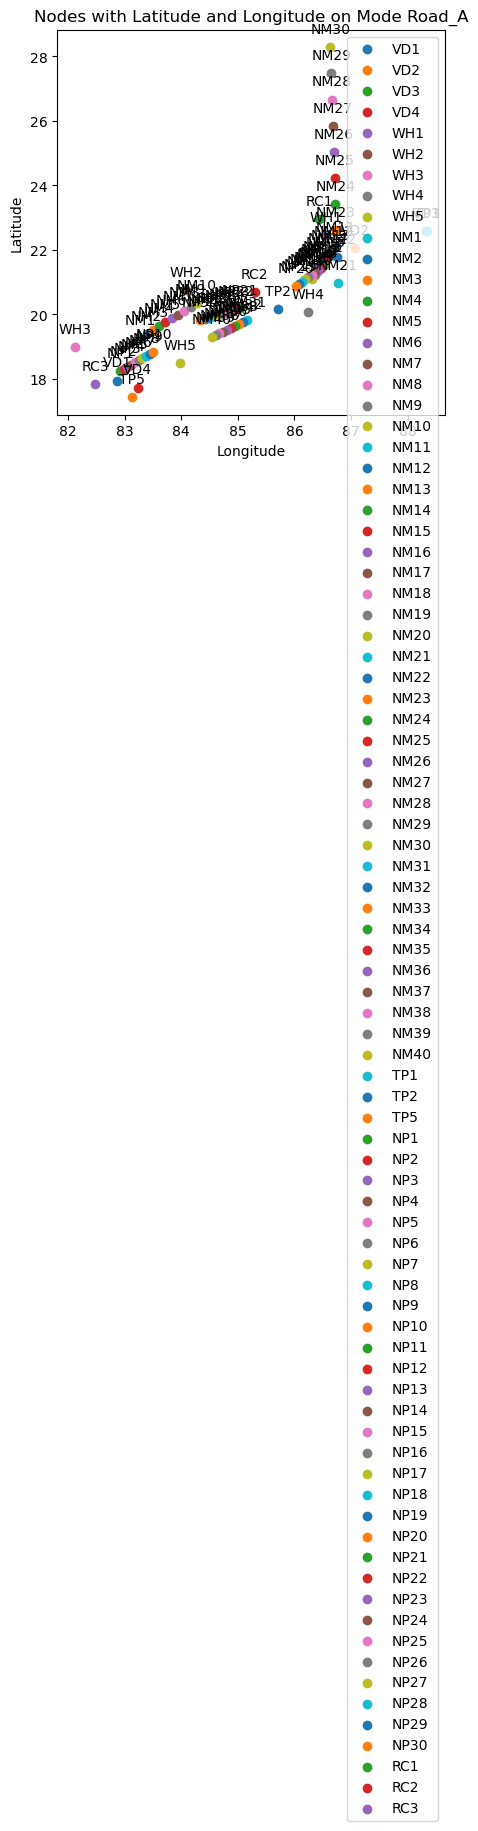

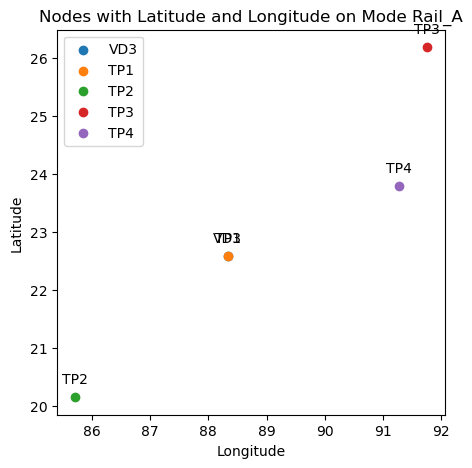

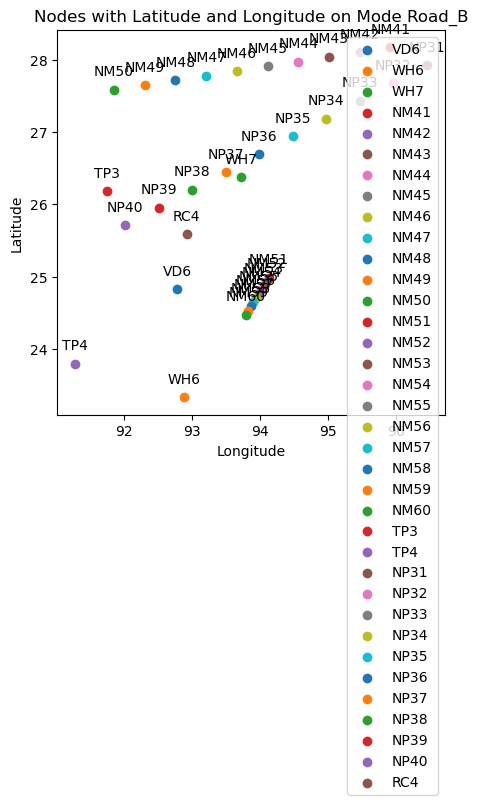

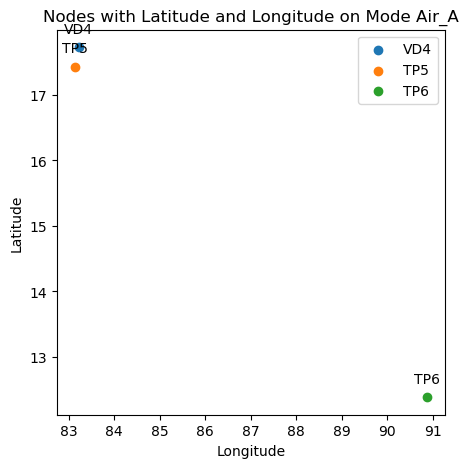

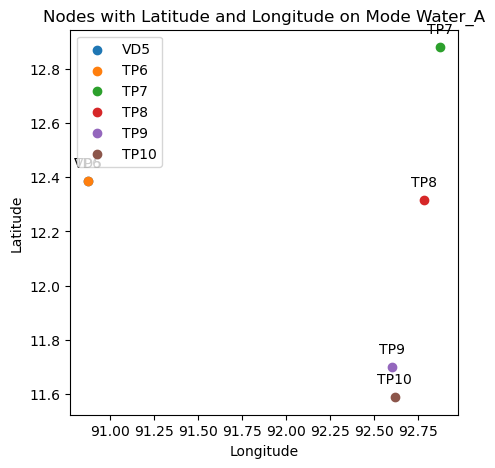

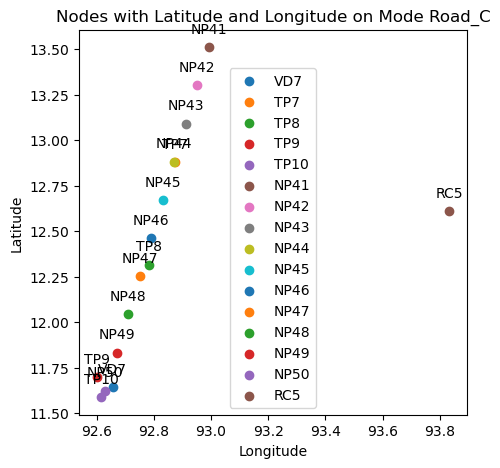

{('VD1', 'Road_A'): 1,
 ('VD2', 'Road_A'): 1,
 ('VD3', 'Road_A'): 1,
 ('VD4', 'Road_A'): 1,
 ('VD5', 'Road_A'): 0,
 ('VD6', 'Road_A'): 0,
 ('VD7', 'Road_A'): 0,
 ('VD1', 'Rail_A'): 0,
 ('VD2', 'Rail_A'): 0,
 ('VD3', 'Rail_A'): 1,
 ('VD4', 'Rail_A'): 0,
 ('VD5', 'Rail_A'): 0,
 ('VD6', 'Rail_A'): 0,
 ('VD7', 'Rail_A'): 0,
 ('VD1', 'Road_B'): 0,
 ('VD2', 'Road_B'): 0,
 ('VD3', 'Road_B'): 0,
 ('VD4', 'Road_B'): 0,
 ('VD5', 'Road_B'): 0,
 ('VD6', 'Road_B'): 1,
 ('VD7', 'Road_B'): 0,
 ('VD1', 'Air_A'): 0,
 ('VD2', 'Air_A'): 0,
 ('VD3', 'Air_A'): 0,
 ('VD4', 'Air_A'): 1,
 ('VD5', 'Air_A'): 0,
 ('VD6', 'Air_A'): 0,
 ('VD7', 'Air_A'): 0,
 ('VD1', 'Water_A'): 0,
 ('VD2', 'Water_A'): 0,
 ('VD3', 'Water_A'): 0,
 ('VD4', 'Water_A'): 0,
 ('VD5', 'Water_A'): 1,
 ('VD6', 'Water_A'): 0,
 ('VD7', 'Water_A'): 0,
 ('VD1', 'Road_C'): 0,
 ('VD2', 'Road_C'): 0,
 ('VD3', 'Road_C'): 0,
 ('VD4', 'Road_C'): 0,
 ('VD5', 'Road_C'): 0,
 ('VD6', 'Road_C'): 0,
 ('VD7', 'Road_C'): 1}

In [24]:
check_if_any_VT_hosted_at_VD_plys_on_this_mode = {}
# This part of the Code needs to be updated such that the VDs' also have Transportation Segment-wise Distance Matrices

for a_mode in csv_2_multimodal_compatibility:

    # Set figure size
    plt.figure(figsize=(5, 5))
    
    # Plot points using latitude and longitude data
    for node, longitude in All_Longitudes.items():
        if node in VD:
            check_if_any_VT_hosted_at_VD_plys_on_this_mode[(node,a_mode)]=0
            for each_vehicle_type in vT[node]:        
                if csv_2_multimodal_compatibility[a_mode][each_vehicle_type]:
                    check_if_any_VT_hosted_at_VD_plys_on_this_mode[(node,a_mode)] += 1
                    break
            if check_if_any_VT_hosted_at_VD_plys_on_this_mode[(node,a_mode)]:
                plt.scatter(longitude, All_Latitudes[node], label=node)
        
        elif csv_2_multimodal_compatibility[a_mode][node]:
            latitude = All_Latitudes[node]
            plt.scatter(longitude, latitude, label=node)

    
    # Add labels to the points
    for node, longitude in All_Longitudes.items():
        if node in VD:
            if check_if_any_VT_hosted_at_VD_plys_on_this_mode[(node,a_mode)]:
                plt.annotate(node, (longitude, All_Latitudes[node]), textcoords="offset points", xytext=(0,10), ha='center')
        elif csv_2_multimodal_compatibility[a_mode][node]:
            latitude = All_Latitudes[node]
            plt.annotate(node, (longitude, latitude), textcoords="offset points", xytext=(0,10), ha='center')

    # Add legend
    plt.legend()

    # Add labels and title
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Nodes with Latitude and Longitude on Mode '+a_mode)

    # Save the plot as PNG and PDF
    plt.savefig(default_location_of_CSV+"Points mapped on "+a_mode+" Mode.png", format="png")
    plt.savefig(default_location_of_CSV+"Points mapped on "+a_mode+" Mode.pdf", format="pdf")
    plt.show()
    

check_if_any_VT_hosted_at_VD_plys_on_this_mode

In [25]:
# Define your function
def returns_accessibilityOFvehicleType_TO_Vertex(vertex_in_graph, mode_on_which_the_vehicle_type_travels):
    if vertex_in_graph in VD:
        if vehicle_type in vT[vertex_in_graph]:
            return 1
        else:
            return 0    
    else:
        return csv_2_multimodal_compatibility[mode_on_which_the_vehicle_type_travels][vertex_in_graph]

C:\Users\G Sen\AppData\Local\Temp\ipykernel_17488\4105711447.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Start_Node_Modal_Check'] = filtered_df['start_point_id'].apply(lambda x: returns_accessibilityOFvehicleType_TO_Vertex(x, the_mode_on_which_this_vehicle_type_travels))
C:\Users\G Sen\AppData\Local\Temp\ipykernel_17488\4105711447.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['End_Node_Modal_Check'] = filtered_df['end_point_id'].apply(lambda x: returns_accessibilityO

Difference along x-axis: 0
Difference along y-axis: 0


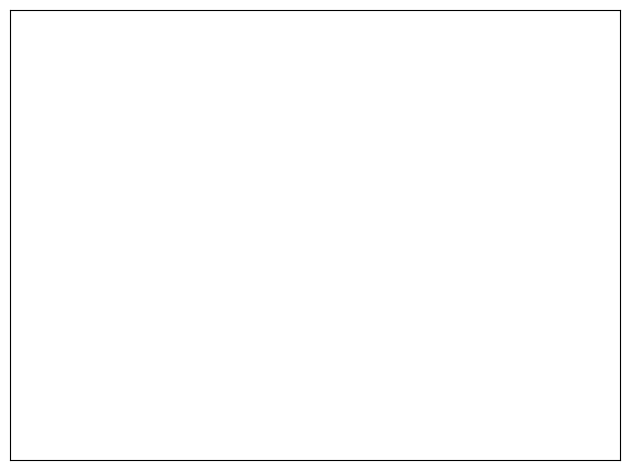

C:\Users\G Sen\AppData\Local\Temp\ipykernel_17488\4105711447.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Start_Node_Modal_Check'] = filtered_df['start_point_id'].apply(lambda x: returns_accessibilityOFvehicleType_TO_Vertex(x, the_mode_on_which_this_vehicle_type_travels))
C:\Users\G Sen\AppData\Local\Temp\ipykernel_17488\4105711447.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['End_Node_Modal_Check'] = filtered_df['end_point_id'].apply(lambda x: returns_accessibilityO

Difference along x-axis: 0
Difference along y-axis: 0


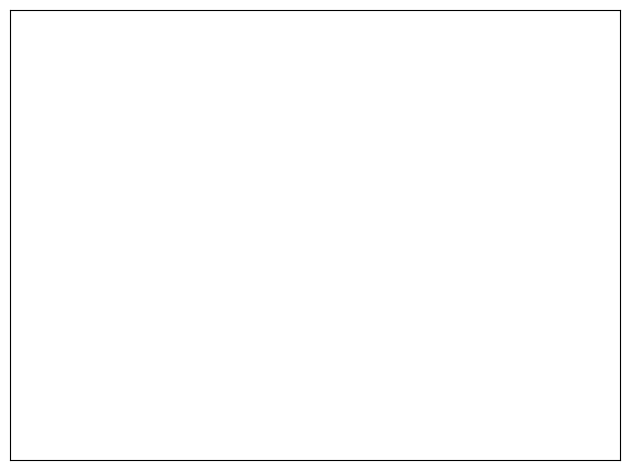

C:\Users\G Sen\AppData\Local\Temp\ipykernel_17488\4105711447.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Start_Node_Modal_Check'] = filtered_df['start_point_id'].apply(lambda x: returns_accessibilityOFvehicleType_TO_Vertex(x, the_mode_on_which_this_vehicle_type_travels))
C:\Users\G Sen\AppData\Local\Temp\ipykernel_17488\4105711447.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['End_Node_Modal_Check'] = filtered_df['end_point_id'].apply(lambda x: returns_accessibilityO

Difference along x-axis: 0
Difference along y-axis: 0


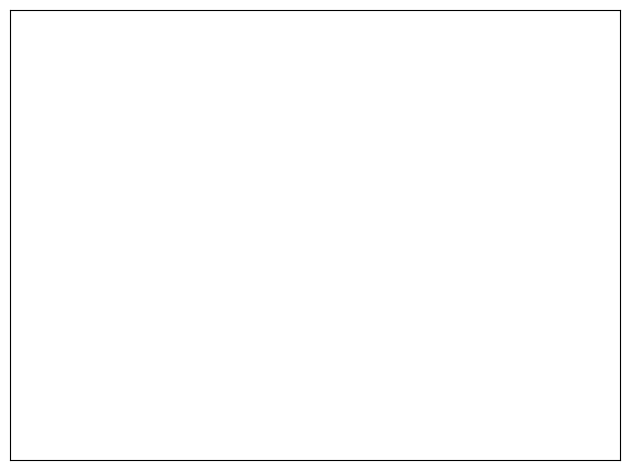

C:\Users\G Sen\AppData\Local\Temp\ipykernel_17488\4105711447.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Start_Node_Modal_Check'] = filtered_df['start_point_id'].apply(lambda x: returns_accessibilityOFvehicleType_TO_Vertex(x, the_mode_on_which_this_vehicle_type_travels))
C:\Users\G Sen\AppData\Local\Temp\ipykernel_17488\4105711447.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['End_Node_Modal_Check'] = filtered_df['end_point_id'].apply(lambda x: returns_accessibilityO

Difference along x-axis: 0
Difference along y-axis: 0


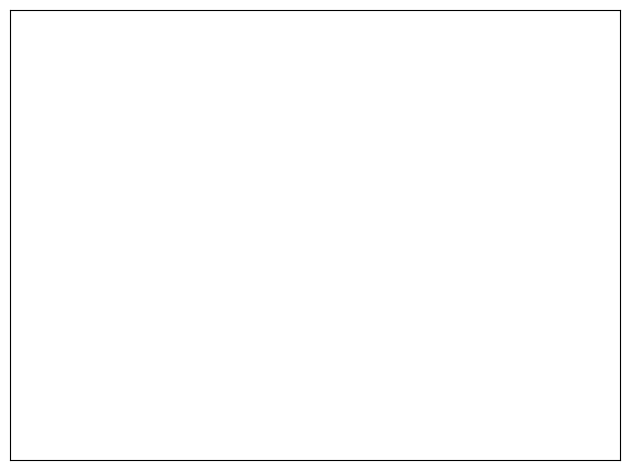

C:\Users\G Sen\AppData\Local\Temp\ipykernel_17488\4105711447.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Start_Node_Modal_Check'] = filtered_df['start_point_id'].apply(lambda x: returns_accessibilityOFvehicleType_TO_Vertex(x, the_mode_on_which_this_vehicle_type_travels))
C:\Users\G Sen\AppData\Local\Temp\ipykernel_17488\4105711447.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['End_Node_Modal_Check'] = filtered_df['end_point_id'].apply(lambda x: returns_accessibilityO

Difference along x-axis: 0
Difference along y-axis: 0


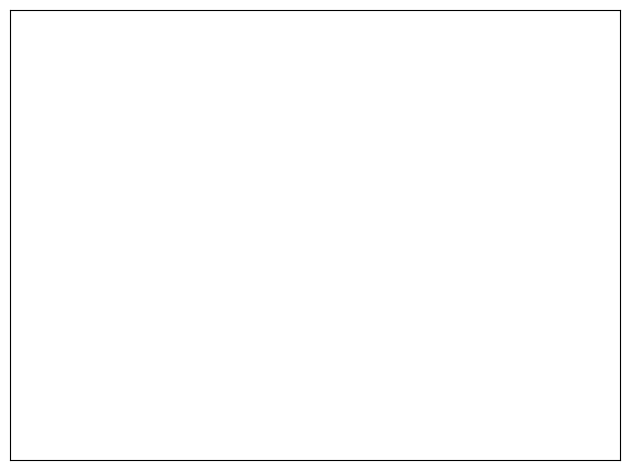

C:\Users\G Sen\AppData\Local\Temp\ipykernel_17488\4105711447.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Start_Node_Modal_Check'] = filtered_df['start_point_id'].apply(lambda x: returns_accessibilityOFvehicleType_TO_Vertex(x, the_mode_on_which_this_vehicle_type_travels))
C:\Users\G Sen\AppData\Local\Temp\ipykernel_17488\4105711447.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['End_Node_Modal_Check'] = filtered_df['end_point_id'].apply(lambda x: returns_accessibilityO

Difference along x-axis: 0
Difference along y-axis: 0


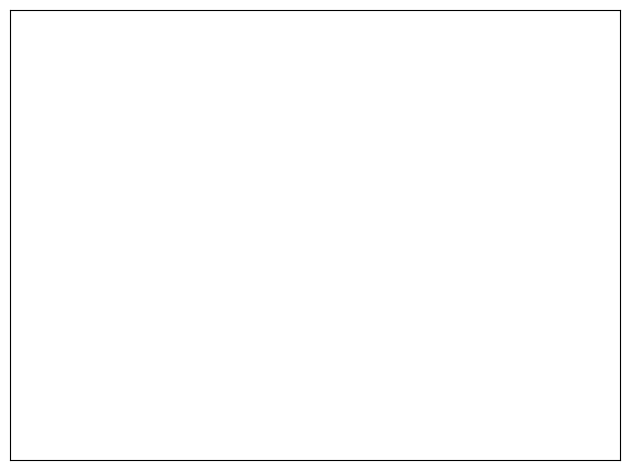

C:\Users\G Sen\AppData\Local\Temp\ipykernel_17488\4105711447.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Start_Node_Modal_Check'] = filtered_df['start_point_id'].apply(lambda x: returns_accessibilityOFvehicleType_TO_Vertex(x, the_mode_on_which_this_vehicle_type_travels))
C:\Users\G Sen\AppData\Local\Temp\ipykernel_17488\4105711447.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['End_Node_Modal_Check'] = filtered_df['end_point_id'].apply(lambda x: returns_accessibilityO

Difference along x-axis: 0
Difference along y-axis: 0


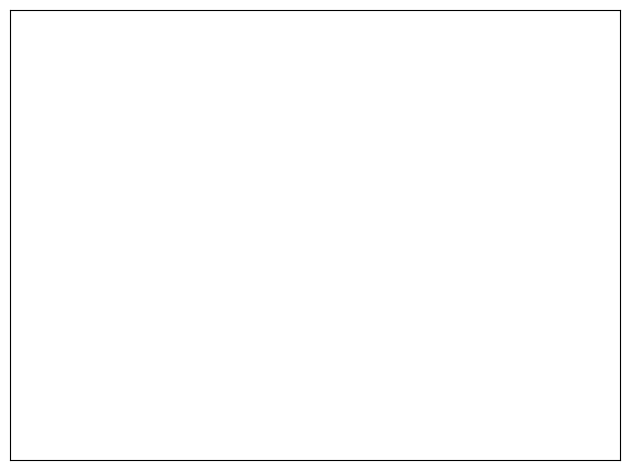

C:\Users\G Sen\AppData\Local\Temp\ipykernel_17488\4105711447.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Start_Node_Modal_Check'] = filtered_df['start_point_id'].apply(lambda x: returns_accessibilityOFvehicleType_TO_Vertex(x, the_mode_on_which_this_vehicle_type_travels))
C:\Users\G Sen\AppData\Local\Temp\ipykernel_17488\4105711447.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['End_Node_Modal_Check'] = filtered_df['end_point_id'].apply(lambda x: returns_accessibilityO

Difference along x-axis: 0
Difference along y-axis: 0


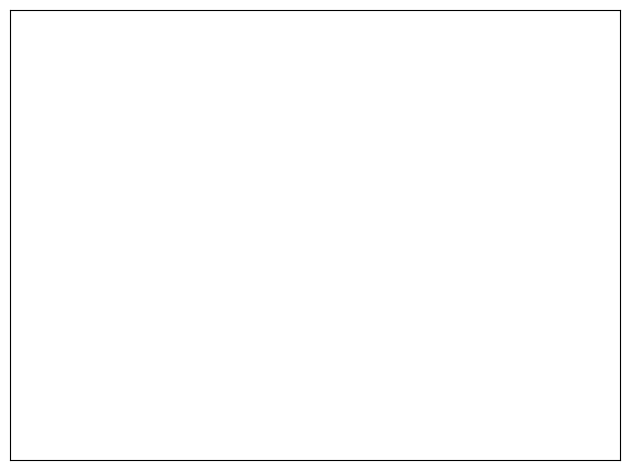

C:\Users\G Sen\AppData\Local\Temp\ipykernel_17488\4105711447.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Start_Node_Modal_Check'] = filtered_df['start_point_id'].apply(lambda x: returns_accessibilityOFvehicleType_TO_Vertex(x, the_mode_on_which_this_vehicle_type_travels))
C:\Users\G Sen\AppData\Local\Temp\ipykernel_17488\4105711447.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['End_Node_Modal_Check'] = filtered_df['end_point_id'].apply(lambda x: returns_accessibilityO

Difference along x-axis: 0
Difference along y-axis: 0


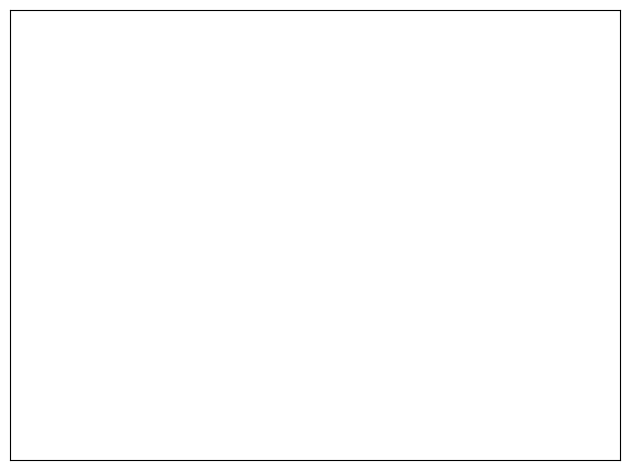

C:\Users\G Sen\AppData\Local\Temp\ipykernel_17488\4105711447.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Start_Node_Modal_Check'] = filtered_df['start_point_id'].apply(lambda x: returns_accessibilityOFvehicleType_TO_Vertex(x, the_mode_on_which_this_vehicle_type_travels))
C:\Users\G Sen\AppData\Local\Temp\ipykernel_17488\4105711447.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['End_Node_Modal_Check'] = filtered_df['end_point_id'].apply(lambda x: returns_accessibilityO

Difference along x-axis: 0
Difference along y-axis: 0


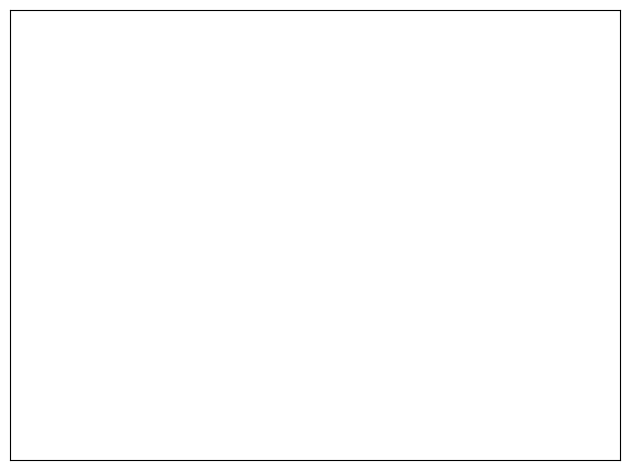

C:\Users\G Sen\AppData\Local\Temp\ipykernel_17488\4105711447.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Start_Node_Modal_Check'] = filtered_df['start_point_id'].apply(lambda x: returns_accessibilityOFvehicleType_TO_Vertex(x, the_mode_on_which_this_vehicle_type_travels))
C:\Users\G Sen\AppData\Local\Temp\ipykernel_17488\4105711447.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['End_Node_Modal_Check'] = filtered_df['end_point_id'].apply(lambda x: returns_accessibilityO

Difference along x-axis: 0
Difference along y-axis: 0


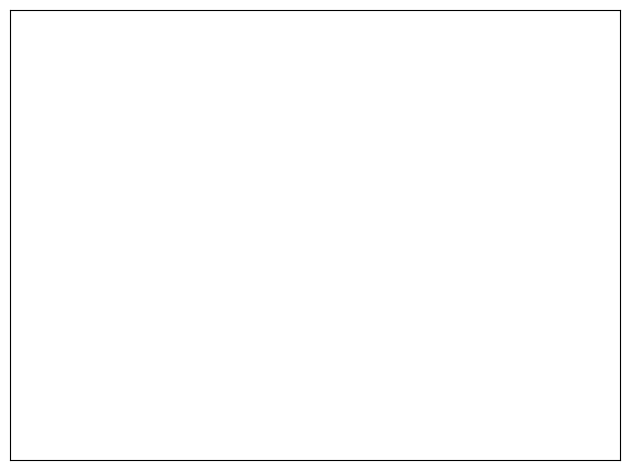

26089


In [26]:
C={}
csv_Travel_Times={}

# Each Vehicle Type is associated with a single Modal Network Segment
for vehicle_type in Vehicles_Specifications_VehicleType_arr:
    
    csv_Travel_Times[vehicle_type] = pd.read_csv(default_location_of_CSV+'Travel_Times_for_'+vehicle_type+'.csv')
    #print(csv_Travel_Times[vehicle_type])
    
    
    the_mode_on_which_this_vehicle_type_travels = None
    for a_mode in csv_2_multimodal_compatibility:
        if csv_2_multimodal_compatibility[a_mode][vehicle_type]:
            the_mode_on_which_this_vehicle_type_travels = a_mode
            break
    
    
    df = csv_Travel_Times[vehicle_type]

    # Filter DataFrame to include only rows with NaN values in the 'travel_time' column
    filtered_df = df[df['travel_time'].isna()]
    
    # Apply the function to each node creating new columns storing the results in two new columns
    filtered_df['Start_Node_Modal_Check'] = filtered_df['start_point_id'].apply(lambda x: returns_accessibilityOFvehicleType_TO_Vertex(x, the_mode_on_which_this_vehicle_type_travels))
    filtered_df['End_Node_Modal_Check'] = filtered_df['end_point_id'].apply(lambda x: returns_accessibilityOFvehicleType_TO_Vertex(x, the_mode_on_which_this_vehicle_type_travels))

    # Perform the AND operation suggesting that the rows having 1 for this operation will have the edges considered as otherwise they are acually not possible to exist
    filtered_df['And Operation'] = filtered_df['Start_Node_Modal_Check'] * filtered_df['End_Node_Modal_Check']  # Example: Multiplication of values of the two columns
    
    # Filter the DataFrame based on a value of 1 in the AND column
    filtered_df = filtered_df.loc[filtered_df['And Operation'] == 1]
    
    # Drop three columns from the filtered DataFrame
    filtered_df = filtered_df.drop(['Start_Node_Modal_Check', 'End_Node_Modal_Check', 'And Operation'], axis=1)
    #print(filtered_df)

    

    # Create a directed graph with only edges containing NaN values
    G = nx.from_pandas_edgelist(filtered_df, 'start_point_id', 'end_point_id', create_using=nx.DiGraph)

    # All Longitude and Latitude data
    #all_latitudes = {'VD1': 2, 'VD2': 22, 'VD3': 40, 'VD4': 0, 'WH1': 1.5, 'WH2': -0.5, 'NM1': 31, 'NM2': 39, 'NM3': 39}
    #all_longitudes = {'VD1': 0.75, 'VD2': 37, 'VD3': 45, 'VD4': 0, 'WH1': 1.25, 'WH2': 0.625, 'NM1': 41, 'NM2': 40, 'NM3': 38}

    # Remove nodes from the graph if latitude and longitude data are not available
    missing_nodes = [node for node in G.nodes() if node not in All_Latitudes or node not in All_Longitudes]
    G.remove_nodes_from(missing_nodes)
    
    
    
    # Create a position dictionary from latitude and longitude
    pos = {node: (All_Longitudes[node], All_Latitudes[node]) for node in G.nodes()}
    
    # Create a new position array for the labels above the nodes
    # pos_labels = {node: (x+0.5, y + 0.1) for node, (x, y) in pos.items()}
    # This absolute shift creates a problem as some graphs are very big and the node labels overlap in those cases (necessitating a bigger shift)
    
    # Calculate the maximum and minimum values of x and y coordinates separately
    x_values = [pos[node][0] for node in G.nodes()]
    y_values = [pos[node][1] for node in G.nodes()]
    if x_values:
        x_max = max(x_values)
        x_min = min(x_values)
    else:
        x_max = 1
        x_min = 1
    if y_values:
        y_max = max(y_values)
        y_min = min(y_values)
    else:
        y_max = 1
        y_min = 1
    # Calculate the differences
    x_difference = x_max - x_min
    y_difference = y_max - y_min
    print("Difference along x-axis:", x_difference)
    print("Difference along y-axis:", y_difference)

    
    # Set the relative offsets for the labels based on the average distance
    label_offset_x = 0.07 * x_difference
    label_offset_y = 0.07 * y_difference
    # Create a new position array for the labels above the nodes with relative offsets
    pos_labels = {node: (x + label_offset_x, y + label_offset_y) for node, (x, y) in pos.items()}
    
    
    
    # Plot nodes with a single shape
    nx.draw_networkx_nodes(G, pos=pos, node_color='black', node_shape='.')

    # Plot edges with a single color and width
    nx.draw_networkx_edges(G, pos=pos, edge_color='red', width=2)
    
    # Plot node labels with adjusted positions
    nx.draw_networkx_labels(G, pos=pos_labels)
    
    # Adjust spacing between nodes to mitigate label overlap
    plt.tight_layout()
    
    # Save the plot as PNG and PDF
    plt.savefig(default_location_of_CSV + "Network with NaN edges, if any, for Vehicle Type "+str(vehicle_type)+".png", format="png")
    plt.savefig(default_location_of_CSV + "Network with NaN edges, if any, for Vehicle Type "+str(vehicle_type)+".pdf", format="pdf")
    plt.show() # Blank picture/dataframe would indicate that there is no NAN value,
    # with the vertices which are possible to be visited (after considering the modal restrictions)
    
    
    
    csv_Travel_Times[vehicle_type].dropna(inplace=True) # To remove rows which return NaN values
    
    # The below code (not perfect yet and may need slight changes if it is made to run) is commented as it is not viosually
    # informative to see all connecions; rather it is better to see the disconnections when there could have been an edge
    # more details may be found here: # https://chat.openai.com/share/34c40b8e-2567-44d4-8e18-6779dbd85f9d
    


    
    
#     # Parse Excel data
#     df = csv_Travel_Times[vehicle_type]

#     # Create a directed graph
#     G = nx.from_pandas_edgelist(df, 'start_point_id', 'end_point_id', ['travel_time'], create_using=nx.DiGraph)

#     # All Longitude and Latitude data
#     #all_latitudes = {'VD1': 2, 'VD2': 22, 'VD3': 40, 'VD4': 0, 'WH1': 1.5, 'WH2': -0.5, 'NM1': 31, 'NM2': 39, 'NM3': 39}
#     #all_longitudes = {'VD1': 0.75, 'VD2': 37, 'VD3': 45, 'VD4': 0, 'WH1': 1.25, 'WH2': 0.625, 'NM1': 41, 'NM2': 40, 'NM3': 38}

#     # Remove nodes from the graph if latitude and longitude data are not available
#     missing_nodes = [node for node in G.nodes() if node not in All_Latitudes or node not in All_Longitudes]
#     G.remove_nodes_from(missing_nodes)

#     # Create a position dictionary from latitude and longitude
#     pos = {node: (All_Longitudes[node], All_Latitudes[node]) for node in G.nodes()}

#     # Plot nodes with a single shape
#     nx.draw_networkx_nodes(G, pos=pos, node_color='black', node_shape='.')

#     # Plot edges with varying colors and widths based on travel_time using Matplotlib
#     min_travel_time = min(df['travel_time'])
#     max_travel_time = max(df['travel_time'])
#     cmap = LinearSegmentedColormap.from_list('custom_cmap', ['red', 'green', 'blue'])  # Custom colormap from red to green to blue
#     for u, v, d in G.edges(data=True):
#         travel_time = d['travel_time']
#         norm_travel_time = (travel_time - min_travel_time) / (max_travel_time - min_travel_time)  # Normalize travel time between 0 and 1
#         edge_color = cmap(norm_travel_time)
#         edge_width = 2
#         nx.draw_networkx_edges(G, pos=pos, edgelist=[(u, v)], edge_color=edge_color, width=edge_width)

#     # Print edge values
#     edge_labels = {(row['start_point_id'], row['end_point_id']): '{:.1f}'.format(row['travel_time']) for index, row in df.iterrows()}
#     nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)

#     # Create a new position array for the labels above the nodes
#     pos_labels = {node: (x, y + 0.05) for node, (x, y) in pos.items()}

#     # Plot node labels with adjusted positions
#     nx.draw_networkx_labels(G, pos=pos_labels)

#     # Adjust spacing between nodes to mitigate label overlap
#     plt.tight_layout()

#     # Save the plot as PNG and PDF
#     plt.savefig(default_location_of_CSV + "network_with_labels_for_"+vehicle_type+".png", format="png")
#     plt.savefig(default_location_of_CSV + "network_with_labels_for_"+vehicle_type+".pdf", format="pdf")
#     plt.show()


#     # Save the plot as PNG and PDF
#     plt.savefig(default_location_of_CSV + "Edge Network.png", format="png")
#     plt.savefig(default_location_of_CSV + "Edge Network.pdf", format="pdf")
#     plt.show()
    
    
    
    for num, row in csv_Travel_Times[vehicle_type].iterrows():
        #print(row['start_point_id'])
        #print(row['end_point_id'])
        #print(row['travel_time'])
        C[row['start_point_id'],row['end_point_id'],vehicle_type] = row['travel_time']
        
print(len(C))

## New Added Visualization for Modal Segment Identification

### Above is the Code to develop the connection visualization of the DISCONNECTED edges within the same modal segment

In [27]:
M = 1E10

U={}
CV={}
for pickup_cargos in PU:
    CV[pickup_cargos]=[]
    for vehicle_types in Vehicles_Specifications_VehicleType_arr:
        #print(pickup_cargos , vehicle_types, VehicleCompatibility_LoadingUnloadingTime_CargoPickUpTime_dict[pickup_cargos][vehicle_types])
        if VehicleCompatibility_LoadingUnloadingTime_CargoPickUpTime_dict[pickup_cargos][vehicle_types] > 0:
            #print(pickup_cargos , vehicle_types, VehicleCompatibility_LoadingUnloadingTime_CargoPickUpTime_dict[pickup_cargos][vehicle_types])
            U[vehicle_types,pickup_cargos]=VehicleCompatibility_LoadingUnloadingTime_CargoPickUpTime_dict[pickup_cargos][vehicle_types]
            CV[pickup_cargos].append(vehicle_types)
for delivery_cargos in DY:
    CV[delivery_cargos]=[]
    for vehicle_types in Vehicles_Specifications_VehicleType_arr:
        #print(delivery_cargos, vehicle_types, VehicleCompatibility_LoadingUnloadingTime_CargoDeliveryTime_dict[delivery_cargos][vehicle_types])
        if VehicleCompatibility_LoadingUnloadingTime_CargoDeliveryTime_dict[delivery_cargos][vehicle_types] > 0:
            #print(delivery_cargos, vehicle_types, VehicleCompatibility_LoadingUnloadingTime_CargoDeliveryTime_dict[delivery_cargos][vehicle_types])
            U[vehicle_types,delivery_cargos]=VehicleCompatibility_LoadingUnloadingTime_CargoDeliveryTime_dict[delivery_cargos][vehicle_types]
            CV[delivery_cargos].append(vehicle_types)
print("Loading-Unloading Time U:", U)
print("CV (inverse of CC)",CV)

Loading-Unloading Time U: {('VT1', 'CC1P'): 0.01, ('VT2', 'CC1P'): 0.03, ('VT3', 'CC1P'): 0.02, ('VT4A', 'CC1P'): 0.01, ('VT4B', 'CC1P'): 0.01, ('VT4C', 'CC1P'): 0.01, ('VT5A', 'CC1P'): 0.02, ('VT5B', 'CC1P'): 0.02, ('VT5C', 'CC1P'): 0.02, ('VT6A', 'CC1P'): 0.02, ('VT6B', 'CC1P'): 0.02, ('VT1', 'CC2P'): 0.1, ('VT5A', 'CC2P'): 0.2, ('VT5B', 'CC2P'): 0.2, ('VT5C', 'CC2P'): 0.2, ('VT6A', 'CC2P'): 0.2, ('VT6B', 'CC2P'): 0.2, ('VT1', 'CC1D'): 0.03, ('VT2', 'CC1D'): 0.05, ('VT3', 'CC1D'): 0.06, ('VT5A', 'CC1D'): 0.02, ('VT5B', 'CC1D'): 0.02, ('VT5C', 'CC1D'): 0.02, ('VT6A', 'CC1D'): 0.03, ('VT6B', 'CC1D'): 0.03, ('VT1', 'CC2D'): 0.01, ('VT2', 'CC2D'): 0.02, ('VT3', 'CC2D'): 0.02, ('VT4A', 'CC2D'): 0.1, ('VT4B', 'CC2D'): 0.1, ('VT4C', 'CC2D'): 0.1, ('VT5A', 'CC2D'): 0.01, ('VT5B', 'CC2D'): 0.01, ('VT5C', 'CC2D'): 0.01, ('VT6A', 'CC2D'): 0.01, ('VT6B', 'CC2D'): 0.01, ('VT1', 'CC3D'): 0.01, ('VT2', 'CC3D'): 0.01, ('VT3', 'CC3D'): 0.01, ('VT1', 'CC4D'): 0.01, ('VT3', 'CC4D'): 0.02, ('VT4A', 'CC4

In [28]:
E={}
for vehicle_types in Vehicles_Specifications_VehicleType_arr:
    #print(Vehicles_Specifications_VolumeCapacity_dict[vehicle_types])
    E[vehicle_types]=Vehicles_Specifications_VolumeCapacity_dict[vehicle_types]
for pickup_cargos in PU:
    E[pickup_cargos]=Cargo_PickUp_UnitVolume_dict[pickup_cargos]
for delivery_cargos in DY:
    E[delivery_cargos]=Cargo_Delivery_UnitVolume_dict[delivery_cargos]
#print(E)

#print()

F={}
for vehicle_types in Vehicles_Specifications_VehicleType_arr:
    F[vehicle_types]=Vehicles_Specifications_WeightCapacity_dict[vehicle_types]
for pickup_cargos in PU:
    F[pickup_cargos]=Cargo_PickUp_UnitWeight_dict[pickup_cargos]
for delivery_cargos in DY:
    F[delivery_cargos]=Cargo_Delivery_UnitWeight_dict[delivery_cargos]
#print(F)

In [29]:
OT=[]

#print(Vehicles_Specifications_OpenTour_dict)
for vehicle_types in Vehicles_Specifications_VehicleType_arr:
    if Vehicles_Specifications_OpenTour_dict[vehicle_types] == "No":
        #print(vehicle_types," : ",Vehicles_Specifications_OpenTour_dict[vehicle_types])
        OT.append(vehicle_types)
    elif Vehicles_Specifications_OpenTour_dict[vehicle_types] != "Yes":
        raise Exception('Only "Yes" and "No" is allowed when user inputs the open-tour requirements. \n Check all entries in \n File:"0 Vehicles" \t Sheet:"Specifications" \t Column:"Need for return to the starting Depot"')


print(OT)

['VT1', 'VT2', 'VT5A', 'VT5B', 'VT5C', 'VT6A', 'VT6B']


# PSR - GIP starts here:
# Preferential Selection of Routes : Generation, Insertion and Perturbation

In [30]:
start_time=time.time()

# PreProcessing 1 :-

## Null Nodes (Nodes which have nothing to pickup or deliver) are rejected while creating the set unsatisfied_nodes

In [31]:
total_necessary_Pickup = {}
total_necessary_Delivery = {}
total_available_Delivery = {}
total_available_Pickup = {}
for pickup_cargo in PU:
    total_necessary_Pickup[pickup_cargo] = 0
    total_available_Pickup[pickup_cargo] = 0
for delivery_cargo in DY:
    total_necessary_Delivery[delivery_cargo] = 0
    total_available_Delivery[delivery_cargo] = 0


Un_Satisfied_Simultaneous_Nodes={}
for simultaneous_node in NM:
    Un_Satisfied_Simultaneous_Nodes[simultaneous_node]={}
    for pickup_cargo in PU:
        Un_Satisfied_Simultaneous_Nodes[simultaneous_node][pickup_cargo]=LocationPickupDelivery_SimultaneousNodes_PickUpCargoAwaiting_dict[pickup_cargo][simultaneous_node]
    for delivery_cargo in DY:
        Un_Satisfied_Simultaneous_Nodes[simultaneous_node][delivery_cargo]=LocationPickupDelivery_SimultaneousNodes_DeliveryCargoRequired_dict[delivery_cargo][simultaneous_node]
print(Un_Satisfied_Simultaneous_Nodes)


Un_Satisfied_Split_Nodes={}
for split_node in NP:
    Un_Satisfied_Split_Nodes[split_node]={}
    for pickup_cargo in PU:
        Un_Satisfied_Split_Nodes[split_node][pickup_cargo]=LocationPickupDelivery_SplitNodes_PickUpCargoAwaiting_dict[pickup_cargo][split_node]
    for delivery_cargo in DY:
        Un_Satisfied_Split_Nodes[split_node][delivery_cargo]=LocationPickupDelivery_SplitNodes_DeliveryCargoRequired_dict[delivery_cargo][split_node]
print(Un_Satisfied_Split_Nodes)


# Initialize a dynamic set to store unsatisfied nodes
unsatisfied_nodes = set()

# Add unsatisfied simultaneous nodes to the set
for simultaneous_node in NM:
    for pickup_cargo in PU:
        if Un_Satisfied_Simultaneous_Nodes[simultaneous_node][pickup_cargo] > 0:
            unsatisfied_nodes.add(simultaneous_node)
            total_necessary_Pickup[pickup_cargo] += Un_Satisfied_Simultaneous_Nodes[simultaneous_node][pickup_cargo]
    for delivery_cargo in DY:
        if Un_Satisfied_Simultaneous_Nodes[simultaneous_node][delivery_cargo] > 0:
            unsatisfied_nodes.add(simultaneous_node)
            total_necessary_Delivery[delivery_cargo] += Un_Satisfied_Simultaneous_Nodes[simultaneous_node][delivery_cargo]

# Add unsatisfied split nodes to the set
for split_node in NP:
    for pickup_cargo in PU:
        if Un_Satisfied_Split_Nodes[split_node][pickup_cargo] > 0:
            unsatisfied_nodes.add(split_node)
            total_necessary_Pickup[pickup_cargo] += Un_Satisfied_Split_Nodes[split_node][pickup_cargo]
    for delivery_cargo in DY:
        if Un_Satisfied_Split_Nodes[split_node][delivery_cargo] > 0:
            unsatisfied_nodes.add(split_node)
            total_necessary_Delivery[delivery_cargo] += Un_Satisfied_Split_Nodes[split_node][delivery_cargo]

# Print or use the unsatisfied_nodes set as needed
print("Unsatisfied Nodes:", unsatisfied_nodes)

{'NM1': {'CC1P': 6, 'CC2P': 4, 'CC1D': 7, 'CC2D': 10, 'CC3D': 2, 'CC4D': 4}, 'NM2': {'CC1P': 0, 'CC2P': 4, 'CC1D': 4, 'CC2D': 0, 'CC3D': 9, 'CC4D': 7}, 'NM3': {'CC1P': 1, 'CC2P': 1, 'CC1D': 9, 'CC2D': 6, 'CC3D': 3, 'CC4D': 0}, 'NM4': {'CC1P': 3, 'CC2P': 0, 'CC1D': 1, 'CC2D': 9, 'CC3D': 7, 'CC4D': 7}, 'NM5': {'CC1P': 8, 'CC2P': 10, 'CC1D': 7, 'CC2D': 10, 'CC3D': 1, 'CC4D': 0}, 'NM6': {'CC1P': 3, 'CC2P': 0, 'CC1D': 0, 'CC2D': 10, 'CC3D': 4, 'CC4D': 10}, 'NM7': {'CC1P': 0, 'CC2P': 6, 'CC1D': 9, 'CC2D': 10, 'CC3D': 7, 'CC4D': 0}, 'NM8': {'CC1P': 0, 'CC2P': 0, 'CC1D': 1, 'CC2D': 0, 'CC3D': 6, 'CC4D': 9}, 'NM9': {'CC1P': 7, 'CC2P': 7, 'CC1D': 9, 'CC2D': 7, 'CC3D': 3, 'CC4D': 0}, 'NM10': {'CC1P': 4, 'CC2P': 4, 'CC1D': 9, 'CC2D': 0, 'CC3D': 0, 'CC4D': 10}, 'NM11': {'CC1P': 3, 'CC2P': 4, 'CC1D': 9, 'CC2D': 5, 'CC3D': 8, 'CC4D': 0}, 'NM12': {'CC1P': 0, 'CC2P': 6, 'CC1D': 6, 'CC2D': 0, 'CC3D': 9, 'CC4D': 9}, 'NM13': {'CC1P': 0, 'CC2P': 0, 'CC1D': 8, 'CC2D': 9, 'CC3D': 0, 'CC4D': 6}, 'NM14': {'CC1

# PreProcessing 2 :-
## The initial available cargo feasibility of the problem is checked by calculating the sum of all Warehouse availabilities to ensure they are greater than the demand at all Nodes, and similarly the sum of all pickup quantities are lesser than the cumulative Relief Centres capabilities
### This however does not ensure that the problem is absolutely feasible as there may be many incompatibilities causing infeasibility which are hard to check directly

In [32]:
static_Warehouse_status={}
for warehouse in W:
    static_Warehouse_status[warehouse]={}
    for delivery_cargo in DY:
        static_Warehouse_status[warehouse][delivery_cargo]=LocationPickupDelivery_Warehouses_DeliveryCargoAvailable_dict[delivery_cargo][warehouse]
        total_available_Delivery[delivery_cargo] += static_Warehouse_status[warehouse][delivery_cargo]
print(static_Warehouse_status)

static_ReliefCentre_status={}
for relief_centre in RC:
    static_ReliefCentre_status[relief_centre]={}
    for pickup_cargo in PU:
        static_ReliefCentre_status[relief_centre][pickup_cargo]=LocationPickupDelivery_ReliefCentres_PickUpCargoSpaceAvailable_dict[pickup_cargo][relief_centre]
        total_available_Pickup[pickup_cargo] += static_ReliefCentre_status[relief_centre][pickup_cargo]
print(static_ReliefCentre_status)


# Checking if problem is infeasible due to lack of capacities available
# If infeasibility is found, then the Heuristic will try to allocate some amount of resources as applicable,
# and some Nodes will never be full satisfied.
for pickup_cargo in PU:
    if total_necessary_Pickup[pickup_cargo]>total_available_Pickup[pickup_cargo]:
        print("Problem MAY NOT be infeasibile due to lack of resource ",pickup_cargo)
for delivery_cargo in DY:
    if total_necessary_Delivery[delivery_cargo]>total_available_Delivery[delivery_cargo]:
        print("Problem MAY NOT be infeasibile due to lack of resource ",delivery_cargo)

{'WH1': {'CC1D': 100, 'CC2D': 100, 'CC3D': 60, 'CC4D': 80}, 'WH2': {'CC1D': 100, 'CC2D': 90, 'CC3D': 70, 'CC4D': 80}, 'WH3': {'CC1D': 100, 'CC2D': 80, 'CC3D': 80, 'CC4D': 80}, 'WH4': {'CC1D': 100, 'CC2D': 70, 'CC3D': 90, 'CC4D': 80}, 'WH5': {'CC1D': 100, 'CC2D': 60, 'CC3D': 100, 'CC4D': 80}, 'WH6': {'CC1D': 50, 'CC2D': 60, 'CC3D': 50, 'CC4D': 20}, 'WH7': {'CC1D': 50, 'CC2D': 60, 'CC3D': 50, 'CC4D': 20}}
{'RC1': {'CC1P': 100, 'CC2P': 100}, 'RC2': {'CC1P': 100, 'CC2P': 100}, 'RC3': {'CC1P': 100, 'CC2P': 100}, 'RC4': {'CC1P': 100, 'CC2P': 100}, 'RC5': {'CC1P': 50, 'CC2P': 50}}


## Finding Vehicle Types which can ply on the specific Modes of Transport

In [111]:
mode_key_value_setofVehicleTypes={}

for modal_column_heading in csv_2_multimodal_compatibility:
    mode_key_value_setofVehicleTypes[modal_column_heading]=[]
    for vehicle_type in Vehicles_Specifications_VehicleType_arr:
        if csv_2_multimodal_compatibility[modal_column_heading][vehicle_type]:            
            mode_key_value_setofVehicleTypes[modal_column_heading].append(vehicle_type)

print("\n mode_key_value_setofVehicleTypes: ", mode_key_value_setofVehicleTypes)


 mode_key_value_setofVehicleTypes:  {'Road_A': ['VT4A', 'VT5A', 'VT6A'], 'Rail_A': ['VT1'], 'Road_B': ['VT4B', 'VT5B', 'VT6B'], 'Air_A': ['VT2'], 'Water_A': ['VT3'], 'Road_C': ['VT4C', 'VT5C']}


## Finding TP Names which can ply on the specific Modes of Transport

In [112]:
mode_key_value_setofTPNames={}

for modal_column_heading in csv_2_multimodal_compatibility:
    mode_key_value_setofTPNames[modal_column_heading]=[]
    for transhipment_ports in TP:
        if csv_2_multimodal_compatibility[modal_column_heading][transhipment_ports]:
            mode_key_value_setofTPNames[modal_column_heading].append(transhipment_ports)

print("mode_key_value_setofTPNames: ", mode_key_value_setofTPNames)

mode_key_value_setofTPNames:  {'Road_A': ['TP1', 'TP2', 'TP5'], 'Rail_A': ['TP1', 'TP2', 'TP3', 'TP4'], 'Road_B': ['TP3', 'TP4'], 'Air_A': ['TP5', 'TP6'], 'Water_A': ['TP6', 'TP7', 'TP8', 'TP9', 'TP10'], 'Road_C': ['TP7', 'TP8', 'TP9', 'TP10']}


# Creating the Decision Trees
## In this Heuristic, we use a Decision Tree approach to create the preferences for generating the routes

In [34]:
# # Static Information of Decision Tree STRUCTURE for NP:
static_Decision_Tree_info_for_NP = {}
# key1: NP_Name
# key2: (Vehicle_Type_Name, [List_of_the_VDs_connectable])
# key3: Vertices (Example: W's, RC's and TP's)
# Key4: Cargo Types which are compatible to be carried by the Vehicle Type; AND if the key3 vertex is a TP, then the CargoType must also be allowed to be Transhipped through the TP


print("\n static_Decision_Tree_info_for_NP")

for a_node in unsatisfied_nodes:
    if a_node in NP:
        static_Decision_Tree_info_for_NP[a_node]={}

        list_of_vehicle_types = []
        for a_Mode in csv_2_multimodal_compatibility:
            if csv_2_multimodal_compatibility[a_Mode][a_node]: #if this node is accessible by this Mode:
                list_of_vehicle_types.extend(mode_key_value_setofVehicleTypes[a_Mode])
        set_of_vehicle_types = set(list_of_vehicle_types)

        filtered_set_of_vehicle_types = set()
        for a_Vehicle_Type in set_of_vehicle_types:
            vehicle_depot_set = set()
            for vds in vehicle_types_at_VDs[a_Vehicle_Type]:
                # Iterates over all VD which has this vehicle type
                
                # Finds if the VD can be connected to the Node through this VT Time Matrix
                if (vds,a_node,a_Vehicle_Type) in C or (a_node,vds,a_Vehicle_Type) in C:
                    filtered_set_of_vehicle_types.add(a_Vehicle_Type)
                    vehicle_depot_set.add(vds)

            if vehicle_depot_set:
                static_Decision_Tree_info_for_NP[a_node][a_Vehicle_Type] = [{},vehicle_depot_set]





                for vertex in W+TP+RC:
                    # Check if this Vertex is on the same mode as this vehicle type
                    # and has a connection from the Considered Node to the Vertex (i.e. they are on the same Modal segment)

                    set_of_modes_accessible_by_VehicleType = set()
                    set_of_modes_accessible_to_Vertex = set()

                    for a_Mode in csv_2_multimodal_compatibility:
                    # for mode in Allowable_Modes:
                        if csv_2_multimodal_compatibility[a_Mode][a_Vehicle_Type]:
                            set_of_modes_accessible_by_VehicleType.add(a_Mode)
                        if csv_2_multimodal_compatibility[a_Mode][vertex]:
                            set_of_modes_accessible_to_Vertex.add(a_Mode)


                    if set_of_modes_accessible_to_Vertex & set_of_modes_accessible_by_VehicleType:
                        # Check if this Vertex is on the same mode as this vehicle type: TRUE

                        if (vertex, a_node, a_Vehicle_Type) in C or (a_node, vertex, a_Vehicle_Type) in C:
                            # Has connection from the Considered Node to the Vertex (i.e. they are on the same Modal segment): YES


                            static_Decision_Tree_info_for_NP[a_node][a_Vehicle_Type][0][vertex]={}
                            
                            
                            if vertex in W:
                                for cargo_Type in DY:
                                    if cargo_Type in CC[a_Vehicle_Type]:
                                        static_Decision_Tree_info_for_NP[a_node][a_Vehicle_Type][0][vertex][cargo_Type] = None
                                        
                            if vertex in RC:
                                for cargo_Type in PU:
                                    if cargo_Type in CC[a_Vehicle_Type]:
                                        static_Decision_Tree_info_for_NP[a_node][a_Vehicle_Type][0][vertex][cargo_Type] = None
                                    
                            if vertex in TP:
                                for cargo_Type in PU+DY:
                                    if cargo_Type in CC[a_Vehicle_Type] and cargo_Type in CP[vertex]:
                                        static_Decision_Tree_info_for_NP[a_node][a_Vehicle_Type][0][vertex][cargo_Type] = None
                                    
        
        
        print("NP Node Name:\t",a_node)
        for veh_type_feasible in static_Decision_Tree_info_for_NP[a_node]:
            print(static_Decision_Tree_info_for_NP[a_node][veh_type_feasible])
        #print(a_node, " : ", static_Decision_Tree_info_for_NP[a_node])


 static_Decision_Tree_info_for_NP
NP Node Name:	 NP29
[{'WH1': {'CC1D': None, 'CC2D': None, 'CC4D': None}, 'WH2': {'CC1D': None, 'CC2D': None, 'CC4D': None}, 'WH3': {'CC1D': None, 'CC2D': None, 'CC4D': None}, 'WH4': {'CC1D': None, 'CC2D': None, 'CC4D': None}, 'WH5': {'CC1D': None, 'CC2D': None, 'CC4D': None}, 'TP1': {'CC1P': None, 'CC2P': None, 'CC1D': None, 'CC2D': None, 'CC4D': None}, 'TP2': {'CC1P': None, 'CC2P': None, 'CC1D': None, 'CC2D': None, 'CC4D': None}, 'TP5': {'CC1P': None, 'CC2P': None, 'CC1D': None, 'CC2D': None, 'CC4D': None}, 'RC1': {'CC1P': None, 'CC2P': None}, 'RC2': {'CC1P': None, 'CC2P': None}, 'RC3': {'CC1P': None, 'CC2P': None}}, {'VD2', 'VD1', 'VD4', 'VD3'}]
[{'WH1': {'CC2D': None, 'CC4D': None}, 'WH2': {'CC2D': None, 'CC4D': None}, 'WH3': {'CC2D': None, 'CC4D': None}, 'WH4': {'CC2D': None, 'CC4D': None}, 'WH5': {'CC2D': None, 'CC4D': None}, 'TP1': {'CC1P': None, 'CC2D': None, 'CC4D': None}, 'TP2': {'CC1P': None, 'CC2D': None, 'CC4D': None}, 'TP5': {'CC1P': None

In [35]:
# # Static Information of Decision Tree STRUCTURE for TP:
static_Decision_Tree_info_for_TP = {}
# key1: TP_Name
# key2: (Vehicle_Type_Name, [List_of_the_VDs_connectable])
# key3: Vertices (Example: W's, RC's and TP's)
# Key4: Cargo Types which are compatible to be carried by the Vehicle Type; AND if the key3 vertex is a TP, then the CargoType must also be allowed to be Transhipped through the TP


print("\n static_Decision_Tree_info_for_TP")

for a_node in TP:
    static_Decision_Tree_info_for_TP[a_node]={}

    list_of_vehicle_types = []
    for a_Mode in csv_2_multimodal_compatibility:
        if csv_2_multimodal_compatibility[a_Mode][a_node]: #if this node is accessible by this Mode:
            list_of_vehicle_types.extend(mode_key_value_setofVehicleTypes[a_Mode])
    set_of_vehicle_types = set(list_of_vehicle_types)

    
    for a_Vehicle_Type in set_of_vehicle_types:
        vehicle_depot_set = set()
        for vds in vehicle_types_at_VDs[a_Vehicle_Type]:
            # Iterates over all VD which has this vehicle type

            # Finds if the VD can be connected to the Node through this VT Time Matrix
            if (vds,a_node,a_Vehicle_Type) in C or (a_node,vds,a_Vehicle_Type) in C:
                vehicle_depot_set.add(vds)

        if vehicle_depot_set:
            static_Decision_Tree_info_for_TP[a_node][a_Vehicle_Type] = [{},vehicle_depot_set]
            
            
            for vertex in set(W+TP+RC)-{a_node}:
                # Check if this Vertex is on the same mode as this vehicle type
                # and has a connection from the Considered Node to the Vertex (i.e. they are on the same Modal segment)

                set_of_modes_accessible_by_VehicleType = set()
                set_of_modes_accessible_to_Vertex = set()

                for a_Mode in csv_2_multimodal_compatibility:
                # for mode in Allowable_Modes:
                    if csv_2_multimodal_compatibility[a_Mode][a_Vehicle_Type]:
                        set_of_modes_accessible_by_VehicleType.add(a_Mode)
                    if csv_2_multimodal_compatibility[a_Mode][vertex]:
                        set_of_modes_accessible_to_Vertex.add(a_Mode)


                if set_of_modes_accessible_to_Vertex & set_of_modes_accessible_by_VehicleType:
                    # Check if this Vertex is on the same mode as this vehicle type: TRUE

                    if (vertex, a_node, a_Vehicle_Type) in C or (a_node, vertex, a_Vehicle_Type) in C:
                        # Has connection from the Considered Node to the Vertex (i.e. they are on the same Modal segment): YES


                        static_Decision_Tree_info_for_TP[a_node][a_Vehicle_Type][0][vertex]={}


                        if vertex in W:
                            for cargo_Type in DY:                   # Compatibility with the original TP_Name
                                if cargo_Type in CC[a_Vehicle_Type] and cargo_Type in CP[a_node]:
                                    static_Decision_Tree_info_for_TP[a_node][a_Vehicle_Type][0][vertex][cargo_Type] = None

                        if vertex in RC:
                            for cargo_Type in PU:                   # Compatibility with the original TP_Name
                                if cargo_Type in CC[a_Vehicle_Type] and cargo_Type in CP[a_node]:
                                    static_Decision_Tree_info_for_TP[a_node][a_Vehicle_Type][0][vertex][cargo_Type] = None

                        if vertex in TP:
                            for cargo_Type in PU+DY:                                             # Compatibility with the original TP_Name
                                if cargo_Type in CC[a_Vehicle_Type] and cargo_Type in CP[vertex] and cargo_Type in CP[a_node]:
                                    static_Decision_Tree_info_for_TP[a_node][a_Vehicle_Type][0][vertex][cargo_Type] = None

    print("TP Node Name:\t",a_node)
    for veh_type_feasible in static_Decision_Tree_info_for_TP[a_node]:
        print(static_Decision_Tree_info_for_TP[a_node][veh_type_feasible])
    #print(a_node, " : ", static_Decision_Tree_info_for_TP[a_node])


 static_Decision_Tree_info_for_TP
TP Node Name:	 TP1
[{'TP4': {'CC1P': None, 'CC2P': None, 'CC1D': None, 'CC2D': None, 'CC3D': None, 'CC4D': None}, 'TP2': {'CC1P': None, 'CC2P': None, 'CC1D': None, 'CC2D': None, 'CC3D': None, 'CC4D': None}, 'TP3': {'CC1P': None, 'CC2P': None, 'CC1D': None, 'CC2D': None, 'CC3D': None, 'CC4D': None}}, {'VD3'}]
[{'RC3': {'CC1P': None, 'CC2P': None}, 'WH1': {'CC1D': None, 'CC2D': None, 'CC4D': None}, 'TP2': {'CC1P': None, 'CC2P': None, 'CC1D': None, 'CC2D': None, 'CC4D': None}, 'WH2': {'CC1D': None, 'CC2D': None, 'CC4D': None}, 'RC1': {'CC1P': None, 'CC2P': None}, 'WH3': {'CC1D': None, 'CC2D': None, 'CC4D': None}, 'RC2': {'CC1P': None, 'CC2P': None}, 'WH4': {'CC1D': None, 'CC2D': None, 'CC4D': None}, 'TP5': {'CC1P': None, 'CC2P': None, 'CC1D': None, 'CC2D': None, 'CC4D': None}, 'WH5': {'CC1D': None, 'CC2D': None, 'CC4D': None}}, {'VD2', 'VD1', 'VD4', 'VD3'}]
[{'RC3': {'CC1P': None}, 'WH1': {'CC2D': None, 'CC4D': None}, 'TP2': {'CC1P': None, 'CC2D': None, 

In [36]:
def can_carry_entire_Simultaneous_Load(a_vehicle_type,a_simultaneous_node):
    
    Volume_sum=0
    Weight_sum=0
    for cargo_Type in PU+DY:
        if Q[(cargo_Type,a_simultaneous_node)]:
            if cargo_Type not in CC[a_vehicle_type]:
                return False
            
            Volume_sum += Q[(cargo_Type,a_simultaneous_node)]*E[cargo_Type]
            Weight_sum += Q[(cargo_Type,a_simultaneous_node)]*F[cargo_Type]
    
    
    if E[a_vehicle_type]>=Volume_sum and F[a_vehicle_type]>=Weight_sum:
        return True
    else:
        return False



#can_carry_entire_Simultaneous_Load("VT2","NM5")
# Checks below relevant for the new dataset
#can_carry_entire_Simultaneous_Load("VT4","NM5")
#can_carry_entire_Simultaneous_Load("VT3","NM5")

In [37]:
# # Static Information of Decision Tree STRUCTURE for NM:
static_Decision_Tree_info_for_NM = {}
# key1: Node_Name
# key2: (Vehicle_Type_Name, [List_of_the_VDs_connectable])
# key3: Vertices (Example: W's and RC's)
    
# the dynamic final value is value4: Status Code


print("static_Decision_Tree_info_for_NM \n")

for a_node in unsatisfied_nodes:
    if a_node in NM:
        static_Decision_Tree_info_for_NM[a_node]={}

        list_of_vehicle_types = []
        for a_Mode in csv_2_multimodal_compatibility:
            if csv_2_multimodal_compatibility[a_Mode][a_node]: #if this node is accessible by this Mode:
                list_of_vehicle_types.extend(mode_key_value_setofVehicleTypes[a_Mode])
        set_of_vehicle_types = set(list_of_vehicle_types)

        #filtered_set_of_vehicle_types = set()
        for a_Vehicle_Type in set_of_vehicle_types:
            vehicle_depot_set = set()
            for vds in vehicle_types_at_VDs[a_Vehicle_Type]:
                # Iterates over all VD which has this vehicle type
                
                # Finds if the VD can be connected to the Node through this VT Time Matrix
                if (vds,a_node,a_Vehicle_Type) in C or (a_node,vds,a_Vehicle_Type) in C:
                    #filtered_set_of_vehicle_types.add(a_Vehicle_Type)
                    vehicle_depot_set.add(vds)

            if vehicle_depot_set and can_carry_entire_Simultaneous_Load(a_Vehicle_Type,a_node):
            #if vehicle_depot_set:
                static_Decision_Tree_info_for_NM[a_node][a_Vehicle_Type] = [{},vehicle_depot_set]





                for vertex in W+TP+RC:
                    # Check if this Vertex is on the same mode as this vehicle type
                    # and has a connection from the Considered Node to the Vertex (i.e. they are on the same Modal segment)

                    set_of_modes_accessible_by_VehicleType = set()
                    set_of_modes_accessible_to_Vertex = set()

                    for a_Mode in csv_2_multimodal_compatibility:
                    # for mode in Allowable_Modes:
                        if csv_2_multimodal_compatibility[a_Mode][a_Vehicle_Type]:
                            set_of_modes_accessible_by_VehicleType.add(a_Mode)
                        if csv_2_multimodal_compatibility[a_Mode][vertex]:
                            set_of_modes_accessible_to_Vertex.add(a_Mode)


                    if set_of_modes_accessible_to_Vertex & set_of_modes_accessible_by_VehicleType:
                        # Check if this Vertex is on the same mode as this vehicle type: TRUE
                        # (i.e. there is some intersection of the travel modes between the vertex and vehicle type)

                        if (vertex, a_node, a_Vehicle_Type) in C or (a_node, vertex, a_Vehicle_Type) in C:
                            # Has connection from the Considered Node to the Vertex (i.e. they are on the same Modal segment): YES


                            static_Decision_Tree_info_for_NM[a_node][a_Vehicle_Type][0][vertex]={}
                            
                           
                        
                        
                            if vertex in W:
                                for cargo_Type in DY:
                                    if cargo_Type in CC[a_Vehicle_Type]:
                                        static_Decision_Tree_info_for_NM[a_node][a_Vehicle_Type][0][vertex][cargo_Type] = None
                                        
                            if vertex in RC:
                                for cargo_Type in PU:
                                    if cargo_Type in CC[a_Vehicle_Type]:
                                        static_Decision_Tree_info_for_NM[a_node][a_Vehicle_Type][0][vertex][cargo_Type] = None
                                    
                            if vertex in TP:
                                for cargo_Type in PU+DY:
                                    if cargo_Type in CC[a_Vehicle_Type] and cargo_Type in CP[vertex]:
                                        static_Decision_Tree_info_for_NM[a_node][a_Vehicle_Type][0][vertex][cargo_Type] = None
                                    
                                                
        

        print("NM Node Name:\t",a_node)
        for veh_type_feasible in static_Decision_Tree_info_for_NM[a_node]:
            print(static_Decision_Tree_info_for_NM[a_node][veh_type_feasible])
        #print(a_node, " : ", static_Decision_Tree_info_for_NM[a_node])

static_Decision_Tree_info_for_NM 

NM Node Name:	 NM52
NM Node Name:	 NM50
[{'WH6': {'CC1D': None, 'CC2D': None, 'CC4D': None}, 'WH7': {'CC1D': None, 'CC2D': None, 'CC4D': None}, 'TP3': {'CC1P': None, 'CC2P': None, 'CC1D': None, 'CC2D': None, 'CC4D': None}, 'TP4': {'CC1P': None, 'CC2P': None, 'CC1D': None, 'CC2D': None, 'CC4D': None}, 'RC4': {'CC1P': None, 'CC2P': None}}, {'VD6'}]
NM Node Name:	 NM59
NM Node Name:	 NM25
NM Node Name:	 NM58
[{'WH6': {'CC1D': None, 'CC2D': None, 'CC4D': None}, 'WH7': {'CC1D': None, 'CC2D': None, 'CC4D': None}, 'TP3': {'CC1P': None, 'CC2P': None, 'CC1D': None, 'CC2D': None, 'CC4D': None}, 'TP4': {'CC1P': None, 'CC2P': None, 'CC1D': None, 'CC2D': None, 'CC4D': None}, 'RC4': {'CC1P': None, 'CC2P': None}}, {'VD6'}]
[{'WH6': {'CC1D': None, 'CC2D': None, 'CC4D': None}, 'WH7': {'CC1D': None, 'CC2D': None, 'CC4D': None}, 'TP3': {'CC1P': None, 'CC2P': None, 'CC1D': None, 'CC2D': None, 'CC4D': None}, 'TP4': {'CC1P': None, 'CC2P': None, 'CC1D': None, 'CC2D': None, 

## Till before this, we have all original datasets

## Henceforth, we have many dynamic datasets which will be relevant for a single Main Iteration

### Subsequently, no. of iterations are increased, with each iteration allowing different strategy of Pipeline Passes. A few more good solution retention logics can be thought of...

### Also used KPIs/HyperParameters will change with iterations...

# HyperParameters are developed as per the Decision Tree Structure

### For the hyper-parameters, we can also add a "last used Main Iteration Number" as the 5th element

In [38]:
Normal_OR_Uniform_hypers_MULTIPLIERS_for_NP = random.choice(["Normal", "Uniform", "Unit", "Uniform", "Normal"])
Normal_OR_Uniform_hypers_EXPONENTS_for_NP = random.choice(["Normal", "Uniform", "Unit", "Uniform", "Normal"])
Normal_OR_Uniform_hypers_MULTITRIPS_for_NP = random.choice(["Normal", "Uniform", "Unit", "Uniform", "Normal"])


hyper_for_Score_MULTIPLIER_for_NP = copy.deepcopy(static_Decision_Tree_info_for_NP)
hyper_for_Score_EXPONENT_for_NP = copy.deepcopy(static_Decision_Tree_info_for_NP)
hyper_for_multiTrips_for_NP = {}


# Initializing Starting Values:

for a_node in hyper_for_Score_MULTIPLIER_for_NP:
    hyper_for_multiTrips_for_NP[a_node] = {}
    for vehicle_type in hyper_for_Score_MULTIPLIER_for_NP[a_node]:
        hyper_for_multiTrips_for_NP[a_node][vehicle_type] = {}
        for vertex in hyper_for_Score_MULTIPLIER_for_NP[a_node][vehicle_type][0]:
            
            
            if Normal_OR_Uniform_hypers_MULTITRIPS_for_NP == "Uniform":
                mul_T1 = random.random()
                mul_T2 = random.random()
                mul_T3 = abs(random.uniform(mul_T1, mul_T2)) # Lower Bound, or Upper Bound can be in any order within the uniform function ...
                hyper_for_multiTrips_for_NP[a_node][vehicle_type][vertex] = [mul_T3,mul_T1,mul_T2,0,-1] # (Value as used in the current Iteration, Lower Bound / Mean, Upper Bound / Sigma, Usage Counter, Last Used Iteration Number)
            elif Normal_OR_Uniform_hypers_MULTITRIPS_for_NP == "Normal":
                mul_T1 = random.random()
                mul_T2 = random.random()
                mul_T3 = abs(random.normalvariate(mul_T1, mul_T2))
                hyper_for_multiTrips_for_NP[a_node][vehicle_type][vertex] = [mul_T3,mul_T1,mul_T2,0,-1] # (Value as used in the current Iteration, Lower Bound / Mean, Upper Bound / Sigma, Usage Counter, Last Used Iteration Number)
            elif Normal_OR_Uniform_hypers_MULTITRIPS_for_NP == "Unit":
                hyper_for_multiTrips_for_NP[a_node][vehicle_type][vertex] = [1,1,1,0,-1] # (Value as used in the current Iteration, Lower Bound / Mean, Upper Bound / Sigma, Usage Counter, Last Used Iteration Number)
            
            
            for cargo_type in hyper_for_Score_MULTIPLIER_for_NP[a_node][vehicle_type][0][vertex]:
                
                if Normal_OR_Uniform_hypers_MULTIPLIERS_for_NP == "Normal":
                    mu = random.random()
                    sigma = random.random()
                    start_val = random.normalvariate(mu, sigma)
                    hyper_for_Score_MULTIPLIER_for_NP[a_node][vehicle_type][0][vertex][cargo_type] = [start_val,mu,sigma,0,-1]
                elif Normal_OR_Uniform_hypers_MULTIPLIERS_for_NP == "Uniform":
                    lb = random.random()
                    ub = random.random()
                    start_val = random.uniform(lb, ub)
                    hyper_for_Score_MULTIPLIER_for_NP[a_node][vehicle_type][0][vertex][cargo_type] = [start_val,lb,ub,0,-1]
                elif Normal_OR_Uniform_hypers_MULTIPLIERS_for_NP == "Unit":
                    hyper_for_Score_MULTIPLIER_for_NP[a_node][vehicle_type][0][vertex][cargo_type] = [1,1,1,0,-1]
                
                # After 77% of the iterations, the Normal/Uniform may be interchanged...
                
                if Normal_OR_Uniform_hypers_EXPONENTS_for_NP == "Normal":
                    mu = random.random()
                    sigma = random.random()
                    start_val = random.normalvariate(mu, sigma)
                    hyper_for_Score_EXPONENT_for_NP[a_node][vehicle_type][0][vertex][cargo_type] = [start_val,mu,sigma,0,-1]
                elif Normal_OR_Uniform_hypers_EXPONENTS_for_NP == "Uniform":
                    lb = random.random()
                    ub = random.random()
                    start_val = random.uniform(lb, ub)
                    hyper_for_Score_EXPONENT_for_NP[a_node][vehicle_type][0][vertex][cargo_type] = [start_val,lb,ub,0,-1]
                elif Normal_OR_Uniform_hypers_EXPONENTS_for_NP == "Unit":
                    hyper_for_Score_EXPONENT_for_NP[a_node][vehicle_type][0][vertex][cargo_type] = [1,1,1,0,-1]
                
                
#hyper_for_Score_MULTIPLIER_for_NP
#hyper_for_Score_EXPONENT_for_NP

In [39]:
Normal_OR_Uniform_hypers_MULTIPLIERS_for_TP = random.choice(["Normal", "Uniform", "Unit", "Uniform", "Normal"])
Normal_OR_Uniform_hypers_EXPONENTS_for_TP = random.choice(["Normal", "Uniform", "Unit", "Uniform", "Normal"])
# Normal_OR_Uniform_hypers_MULTIPLIERS_for_TP = "Unit"
# Normal_OR_Uniform_hypers_EXPONENTS_for_TP = "Unit"
hyper_how_much_to_reduce_deeper_degree_scores = random.choice([0.75, 6*random.random()-2, 1 , 9*random.random()-1 , 1.25]) # used within function 4C; here actually we allow increment as well as the span is -1 to +8 ## Earlier it was working fine for the constant value of 1 only


# Hyper is as per Structure
hyper_for_Score_MULTIPLIER_for_TP = copy.deepcopy(static_Decision_Tree_info_for_TP)
hyper_for_Score_EXPONENT_for_TP = copy.deepcopy(static_Decision_Tree_info_for_TP)
#hyper_for_multiTrips_for_TP = {}


# Initializing Starting Values:

for a_node in hyper_for_Score_MULTIPLIER_for_TP:
    #hyper_for_multiTrips_for_TP[a_node] = {}
    for vehicle_type in hyper_for_Score_MULTIPLIER_for_TP[a_node]:
        #hyper_for_multiTrips_for_TP[a_node][vehicle_type] = {}
        for vertex in hyper_for_Score_MULTIPLIER_for_TP[a_node][vehicle_type][0]:
            
            for cargo_type in hyper_for_Score_MULTIPLIER_for_TP[a_node][vehicle_type][0][vertex]:
                
                if Normal_OR_Uniform_hypers_MULTIPLIERS_for_TP == "Normal":
                    mu = random.random()
                    sigma = random.random()
                    start_val = random.normalvariate(mu, sigma)
                    hyper_for_Score_MULTIPLIER_for_TP[a_node][vehicle_type][0][vertex][cargo_type] = [start_val,mu,sigma,0,-1] # (Current Iteration Value, Lower Bound / Mean, Upper Bound / Sigma, Usage Counter, Last Used Iteration Number)
                elif Normal_OR_Uniform_hypers_MULTIPLIERS_for_TP == "Uniform":
                    lb = random.random()
                    ub = random.random()
                    start_val = random.uniform(lb, ub)
                    hyper_for_Score_MULTIPLIER_for_TP[a_node][vehicle_type][0][vertex][cargo_type] = [start_val,lb,ub,0,-1] # (Current Iteration Value, Lower Bound / Mean, Upper Bound / Sigma, Usage Counter, Last Used Iteration Number)
                elif Normal_OR_Uniform_hypers_MULTIPLIERS_for_TP == "Unit":
                    hyper_for_Score_MULTIPLIER_for_TP[a_node][vehicle_type][0][vertex][cargo_type] = [1,1,1,0,-1] # (Current Iteration Value, Lower Bound / Mean, Upper Bound / Sigma, Usage Counter, Last Used Iteration Number)
                    
                # After 77% of the iterations, the Normal/Uniform may be interchanged...
                
                if Normal_OR_Uniform_hypers_EXPONENTS_for_TP == "Normal":
                    mu = random.random()
                    sigma = random.random()
                    start_val = random.normalvariate(mu, sigma)
                    hyper_for_Score_EXPONENT_for_TP[a_node][vehicle_type][0][vertex][cargo_type] = [start_val,mu,sigma,0,-1] # (Current Iteration Value, Lower Bound / Mean, Upper Bound / Sigma, Usage Counter, Last Used Iteration Number)
                elif Normal_OR_Uniform_hypers_EXPONENTS_for_TP == "Uniform":
                    lb = random.random()
                    ub = random.random()
                    start_val = random.uniform(lb, ub)
                    hyper_for_Score_EXPONENT_for_TP[a_node][vehicle_type][0][vertex][cargo_type] = [start_val,lb,ub,0,-1] # (Current Iteration Value, Lower Bound / Mean, Upper Bound / Sigma, Usage Counter, Last Used Iteration Number)
                elif Normal_OR_Uniform_hypers_EXPONENTS_for_TP == "Unit":
                    hyper_for_Score_EXPONENT_for_TP[a_node][vehicle_type][0][vertex][cargo_type] = [1,1,1,0,-1] # (Current Iteration Value, Lower Bound / Mean, Upper Bound / Sigma, Usage Counter, Last Used Iteration Number)
                    
                                 
# hyper_for_Score_MULTIPLIER_for_TP
# hyper_for_Score_EXPONENT_for_TP

In [40]:
Normal_OR_Uniform_hypers_MULTIPLIERS_for_NM = random.choice(["Normal", "Uniform", "Unit", "Uniform", "Normal"])
Normal_OR_Uniform_hypers_EXPONENTS_for_NM = random.choice(["Normal", "Uniform", "Unit", "Uniform", "Normal"])


# Hyper is as per Structure
hyper_for_Score_MULTIPLIER_for_NM = copy.deepcopy(static_Decision_Tree_info_for_NM)
hyper_for_Score_EXPONENT_for_NM = copy.deepcopy(static_Decision_Tree_info_for_NM)
# Score Accumulator would be another DYNAMIC copy of this NM Decision Tree Structure



# Initializing Starting Values:

for a_node in hyper_for_Score_MULTIPLIER_for_NM:
    
    for vehicle_type in hyper_for_Score_MULTIPLIER_for_NM[a_node]:
        
        for vertex in hyper_for_Score_MULTIPLIER_for_NM[a_node][vehicle_type][0]:
            
            for cargo_type in hyper_for_Score_MULTIPLIER_for_NM[a_node][vehicle_type][0][vertex]:
                
                if Normal_OR_Uniform_hypers_MULTIPLIERS_for_NM == "Normal":
                    mu = random.random()
                    sigma = random.random()
                    start_val = random.normalvariate(mu, sigma)
                    hyper_for_Score_MULTIPLIER_for_NM[a_node][vehicle_type][0][vertex][cargo_type] = [start_val,mu,sigma,0,-1] # (Current Iteration Value, Lower Bound / Mean, Upper Bound / Sigma, Usage Counter, Last Used Iteration Number)
                elif Normal_OR_Uniform_hypers_MULTIPLIERS_for_NM == "Uniform":
                    lb = random.random()
                    ub = random.random()
                    start_val = random.uniform(lb, ub)
                    hyper_for_Score_MULTIPLIER_for_NM[a_node][vehicle_type][0][vertex][cargo_type] = [start_val,lb,ub,0,-1] # (Current Iteration Value, Lower Bound / Mean, Upper Bound / Sigma, Usage Counter, Last Used Iteration Number)
                elif Normal_OR_Uniform_hypers_MULTIPLIERS_for_NM == "Unit":
                    hyper_for_Score_MULTIPLIER_for_NM[a_node][vehicle_type][0][vertex][cargo_type] = [1,1,1,0,-1] # (Current Iteration Value, Lower Bound / Mean, Upper Bound / Sigma, Usage Counter, Last Used Iteration Number)
                
                # After 77% of the iterations, the Normal/Uniform may be interchanged...
                
                
                if Normal_OR_Uniform_hypers_EXPONENTS_for_NM == "Normal":
                    mu = random.random()
                    sigma = random.random()
                    start_val = random.normalvariate(mu, sigma)
                    hyper_for_Score_EXPONENT_for_NM[a_node][vehicle_type][0][vertex][cargo_type] = [start_val,mu,sigma,0,-1] # (Current Iteration Value, Lower Bound / Mean, Upper Bound / Sigma, Usage Counter, Last Used Iteration Number)
                elif Normal_OR_Uniform_hypers_EXPONENTS_for_NM == "Uniform":
                    lb = random.random()
                    ub = random.random()
                    start_val = random.uniform(lb, ub)
                    hyper_for_Score_EXPONENT_for_NM[a_node][vehicle_type][0][vertex][cargo_type] = [start_val,lb,ub,0,-1] # (Current Iteration Value, Lower Bound / Mean, Upper Bound / Sigma, Usage Counter, Last Used Iteration Number)
                elif Normal_OR_Uniform_hypers_EXPONENTS_for_NM == "Unit":
                    hyper_for_Score_EXPONENT_for_NM[a_node][vehicle_type][0][vertex][cargo_type] = [1,1,1,0,-1] # (Current Iteration Value, Lower Bound / Mean, Upper Bound / Sigma, Usage Counter, Last Used Iteration Number)


#hyper_for_Score_MULTIPLIER_for_NM
#hyper_for_Score_EXPONENT_for_NM

In [41]:
# String HyperParameters

hyper_for_TP_tie = random.choice(["Max", "Min", "Weighted"])

# Toggle Hyper Parameters

### These Hyper-parameters will be toggled after their unique prime number of iterations (so that any periodicity may be taken care of...)

###### Current Toggle Parameters Count: c = 12; This we have 2^c combos

### We and run over this value (2^c) a few times as Main Iterations to find which combination is performing the best.
### Subsequently, we will use this combination of the best Toggle Hyper-Parameters for the last portion of our Heuristic Run

In [42]:
# True False Hypers for toggling

global_Transhipment_Fathom = False # This hyper-parameter is changed depending on in-feasible MAIN Iterations
# Full Fathom will basically consider all TPs eventually (it may not populate all Ws and RCs within the TP decision tree, in case they have been considered before somehow)


Full_Demand_passed_for_transhipment_EnhancedVariability = False # This will be made true to further deepen the Transhipment Port usage during probing possible resource centres
# This allows creation of the preferential Association considering the entire demand to be satisfied through transhipment and does not cosndier the reduction (in the transhipment demand) due to other available Nodes in the same degree
# This enhanced variability may be necessary when the problem is tough and solution space have less resources due to which multiple associations would be necessary


# We can also have two other Hyper parameters for deciding whether exponents or Multipliers will be used (both or none at all) for scoring


Is_Denominator_considered_during_Scoring = True # If False, all denominators during score computations are essentially 1


Distance_Time_consideration_during_Scoring = True # During any Score Calculation from comparecodes 
Travel_Time_consideration_during_Scoring_for_TPs = True # Applicable only for TPs scorings; will the distance from the source be considered ?


degree_affects_MULTIPLIER = True # During Score calculation from TP CompareCodes
degree_affects_EXPONENT = True # During Score calculation from TP CompareCodes



complete_splitting_of_SplitNodes_SREs = True # This can be changed after every few Main Iterations



Trip_Setting_for_Tranship_entire_amt_VS_tranship_CompareCoded_amt_only_for_SplitNodes = False # If True, trips will always remain 0, and the outer loop (while amount:) will be ejected from after a single iteration...



chain_like_satisfaction_of_each_generated_SRE_immediately = True # If False, the results may malfunction for tough problems, which have deep transhipment loop like structures (Loops: i.e. if they refer to similar Warehouses or Relief Centres at the end of deep transhipment stages)
chain_like_satisfaction_within_function4C_itself = True # Both chain_like_satisfaction_of_each_generated_SRE_immediately and chain_like_satisfaction_within_function4C_itself if True, should give the best results


hyper_Toggle_allocate_first_based_on_Causality_Dict = True # If True, the SREs are inserted first from the Causality Dict; It is predicted that if this is False, the random insertion of SREs may increase the Waiting Times in many cases
# Remember to also Test for FALSE of hyper_Toggle_allocate_first_based_on_Causality_Dict


hyper_to_Shuffle_Route_Allocation_Logics = True # Shuffles the Route Store if this hyperParameter is True, during every new SRE allocation


hyper_to_reduce_the_no_of_logics_if_Allocation_is_in_Shuffle_Mode = hyper_to_Shuffle_Route_Allocation_Logics # True means reduction in the no. of Logics is going to happen

# I believe a feasible problem will have some solution found even with big subsets of Nodes are being passed (and almost definitely when single Nodes is passed) through the Pipeline, if both global_Transhipment_Fathom, and, Full_Demand_passed_for_transhipment_EnhancedVariability are set TRUE

# Slider Hyper Parameters

In [43]:
# HyperParameters which can slide over a given scale...
if random.random() > 0.5:
    Slider_Hyper_for_MAX_MIN_Transhipment = random.random()
else:
    Slider_Hyper_for_MAX_MIN_Transhipment = random.randint(0,1)

if random.random() > 0.5:
    Slider_Hyper_for_MAX_MIN_Transhipment_Degree_for_NM = random.random()
else:
    Slider_Hyper_for_MAX_MIN_Transhipment_Degree_for_NM = random.randint(0,1)

if random.random() > 0.5:
    Slider_Hyper_for_MAX_MIN_Transhipment_Degree_for_NP = random.random()
else:
    Slider_Hyper_for_MAX_MIN_Transhipment_Degree_for_NP = random.randint(0,1)

# Function to update HyperParameters after each Main Iteration of this PSR-GIP Heuristic

In [44]:
def fun_to_REFRESH_HyperParameters_per_Main_Iteration():
    
    global hyper_for_Score_MULTIPLIER_for_NP
    global hyper_for_Score_EXPONENT_for_NP
    global hyper_for_multiTrips_for_NP
    
    for a_node in hyper_for_Score_MULTIPLIER_for_NP:
        for vehicle_type in hyper_for_Score_MULTIPLIER_for_NP[a_node]:
            for vertex in hyper_for_Score_MULTIPLIER_for_NP[a_node][vehicle_type][0]:
                if hyper_for_multiTrips_for_NP[a_node][vehicle_type][vertex][-1] == main_Iteration:
                    if Normal_OR_Uniform_hypers_MULTITRIPS_for_NP == "Uniform":
                        hyper_for_multiTrips_for_NP[a_node][vehicle_type][vertex][0] = abs(random.uniform(hyper_for_multiTrips_for_NP[a_node][vehicle_type][vertex][1],
                                                                                                          hyper_for_multiTrips_for_NP[a_node][vehicle_type][vertex][2]))
                    elif Normal_OR_Uniform_hypers_MULTITRIPS_for_NP == "Normal":
                        hyper_for_multiTrips_for_NP[a_node][vehicle_type][vertex][0] = abs(random.normalvariate(hyper_for_multiTrips_for_NP[a_node][vehicle_type][vertex][1],
                                                                                                                hyper_for_multiTrips_for_NP[a_node][vehicle_type][vertex][2]))
                    # elif Normal_OR_Uniform_hypers_MULTITRIPS_for_NP == "Unit"; the value stays the same as 1
                for cargo_type in hyper_for_Score_MULTIPLIER_for_NP[a_node][vehicle_type][0][vertex]:
                    if hyper_for_Score_MULTIPLIER_for_NP[a_node][vehicle_type][0][vertex][cargo_type][-1] == main_Iteration:
                        if Normal_OR_Uniform_hypers_MULTIPLIERS_for_NP == "Normal":
                            hyper_for_Score_MULTIPLIER_for_NP[a_node][vehicle_type][0][vertex][cargo_type][0] = random.normalvariate(hyper_for_Score_MULTIPLIER_for_NP[a_node][vehicle_type][0][vertex][cargo_type][1],
                                                                                                                                     hyper_for_Score_MULTIPLIER_for_NP[a_node][vehicle_type][0][vertex][cargo_type][2])
                        elif Normal_OR_Uniform_hypers_MULTIPLIERS_for_NP == "Uniform":
                            hyper_for_Score_MULTIPLIER_for_NP[a_node][vehicle_type][0][vertex][cargo_type][0] = random.uniform(hyper_for_Score_MULTIPLIER_for_NP[a_node][vehicle_type][0][vertex][cargo_type][1],
                                                                                                                               hyper_for_Score_MULTIPLIER_for_NP[a_node][vehicle_type][0][vertex][cargo_type][2])
                        # elif Normal_OR_Uniform_hypers_MULTIPLIERS_for_NP == "Unit"; the value stays as 1.
                    if hyper_for_Score_EXPONENT_for_NP[a_node][vehicle_type][0][vertex][cargo_type][-1] == main_Iteration:
                        if Normal_OR_Uniform_hypers_EXPONENTS_for_NP == "Normal":
                            hyper_for_Score_EXPONENT_for_NP[a_node][vehicle_type][0][vertex][cargo_type][0] = random.normalvariate(hyper_for_Score_EXPONENT_for_NP[a_node][vehicle_type][0][vertex][cargo_type][1],
                                                                                                                                   hyper_for_Score_EXPONENT_for_NP[a_node][vehicle_type][0][vertex][cargo_type][2])
                        elif Normal_OR_Uniform_hypers_EXPONENTS_for_NP == "Uniform":
                            hyper_for_Score_EXPONENT_for_NP[a_node][vehicle_type][0][vertex][cargo_type][0] = random.uniform(hyper_for_Score_EXPONENT_for_NP[a_node][vehicle_type][0][vertex][cargo_type][1],
                                                                                                                             hyper_for_Score_EXPONENT_for_NP[a_node][vehicle_type][0][vertex][cargo_type][2])
                        # elif Normal_OR_Uniform_hypers_EXPONENTS_for_NP == "Unit"; the value stays the same as 1.
    
    
    
    global hyper_for_Score_MULTIPLIER_for_TP
    global hyper_for_Score_EXPONENT_for_TP
    
    for a_node in hyper_for_Score_MULTIPLIER_for_TP:
        for vehicle_type in hyper_for_Score_MULTIPLIER_for_TP[a_node]:
            for vertex in hyper_for_Score_MULTIPLIER_for_TP[a_node][vehicle_type][0]:
                for cargo_type in hyper_for_Score_MULTIPLIER_for_TP[a_node][vehicle_type][0][vertex]:
                    if hyper_for_Score_MULTIPLIER_for_TP[a_node][vehicle_type][0][vertex][cargo_type][-1] == main_Iteration:
                        if Normal_OR_Uniform_hypers_MULTIPLIERS_for_TP == "Normal":
                            hyper_for_Score_MULTIPLIER_for_TP[a_node][vehicle_type][0][vertex][cargo_type][0] = random.normalvariate(hyper_for_Score_MULTIPLIER_for_TP[a_node][vehicle_type][0][vertex][cargo_type][1],
                                                                                                                                     hyper_for_Score_MULTIPLIER_for_TP[a_node][vehicle_type][0][vertex][cargo_type][2])
                        elif Normal_OR_Uniform_hypers_MULTIPLIERS_for_TP == "Uniform":
                            hyper_for_Score_MULTIPLIER_for_TP[a_node][vehicle_type][0][vertex][cargo_type][0] = random.uniform(hyper_for_Score_MULTIPLIER_for_TP[a_node][vehicle_type][0][vertex][cargo_type][1],
                                                                                                                               hyper_for_Score_MULTIPLIER_for_TP[a_node][vehicle_type][0][vertex][cargo_type][2])
                        # if Normal_OR_Uniform_hypers_MULTIPLIERS_for_TP == "Unit", it will remain as 1...
                    if hyper_for_Score_EXPONENT_for_TP[a_node][vehicle_type][0][vertex][cargo_type][-1] == main_Iteration:
                        if Normal_OR_Uniform_hypers_EXPONENTS_for_TP == "Normal":
                            hyper_for_Score_EXPONENT_for_TP[a_node][vehicle_type][0][vertex][cargo_type][0] = random.normalvariate(hyper_for_Score_EXPONENT_for_TP[a_node][vehicle_type][0][vertex][cargo_type][1],
                                                                                                                                   hyper_for_Score_EXPONENT_for_TP[a_node][vehicle_type][0][vertex][cargo_type][2])
                        elif Normal_OR_Uniform_hypers_EXPONENTS_for_TP == "Uniform":
                            hyper_for_Score_EXPONENT_for_TP[a_node][vehicle_type][0][vertex][cargo_type][0] = random.uniform(hyper_for_Score_EXPONENT_for_TP[a_node][vehicle_type][0][vertex][cargo_type][1],
                                                                                                                             hyper_for_Score_EXPONENT_for_TP[a_node][vehicle_type][0][vertex][cargo_type][2])
                        # if Normal_OR_Uniform_hypers_EXPONENTS_for_TP == "Unit", it will remain as 1...
    
    
    
    global hyper_for_Score_MULTIPLIER_for_NM
    global hyper_for_Score_EXPONENT_for_NM
    
    for a_node in hyper_for_Score_MULTIPLIER_for_NM:
        for vehicle_type in hyper_for_Score_MULTIPLIER_for_NM[a_node]:
            for vertex in hyper_for_Score_MULTIPLIER_for_NM[a_node][vehicle_type][0]:
                for cargo_type in hyper_for_Score_MULTIPLIER_for_NM[a_node][vehicle_type][0][vertex]:
                    # We update only if this Hyper Parameter was used in the Last Iteration
                    if hyper_for_Score_MULTIPLIER_for_NM[a_node][vehicle_type][0][vertex][cargo_type][-1] == main_Iteration:
                        if Normal_OR_Uniform_hypers_MULTIPLIERS_for_NM == "Normal":
                            hyper_for_Score_MULTIPLIER_for_NM[a_node][vehicle_type][0][vertex][cargo_type][0] = random.normalvariate(hyper_for_Score_MULTIPLIER_for_NM[a_node][vehicle_type][0][vertex][cargo_type][1],
                                                                                                                                     hyper_for_Score_MULTIPLIER_for_NM[a_node][vehicle_type][0][vertex][cargo_type][2])
                        elif Normal_OR_Uniform_hypers_MULTIPLIERS_for_NM == "Uniform":
                            hyper_for_Score_MULTIPLIER_for_NM[a_node][vehicle_type][0][vertex][cargo_type][0] = random.uniform(hyper_for_Score_MULTIPLIER_for_NM[a_node][vehicle_type][0][vertex][cargo_type][1],
                                                                                                                               hyper_for_Score_MULTIPLIER_for_NM[a_node][vehicle_type][0][vertex][cargo_type][2])
                        # if Normal_OR_Uniform_hypers_MULTIPLIERS_for_NM == "Unit", it will remain as 1...
                    if hyper_for_Score_EXPONENT_for_NM[a_node][vehicle_type][0][vertex][cargo_type][-1] == main_Iteration:
                        if Normal_OR_Uniform_hypers_EXPONENTS_for_NM == "Normal":
                            hyper_for_Score_EXPONENT_for_NM[a_node][vehicle_type][0][vertex][cargo_type][0] = random.normalvariate(hyper_for_Score_EXPONENT_for_NM[a_node][vehicle_type][0][vertex][cargo_type][1],
                                                                                                                                   hyper_for_Score_EXPONENT_for_NM[a_node][vehicle_type][0][vertex][cargo_type][2])
                        elif Normal_OR_Uniform_hypers_EXPONENTS_for_NM == "Uniform":
                            hyper_for_Score_EXPONENT_for_NM[a_node][vehicle_type][0][vertex][cargo_type][0] = random.uniform(hyper_for_Score_EXPONENT_for_NM[a_node][vehicle_type][0][vertex][cargo_type][1],
                                                                                                                             hyper_for_Score_EXPONENT_for_NM[a_node][vehicle_type][0][vertex][cargo_type][2])
                        # if Normal_OR_Uniform_hypers_EXPONENTS_for_NM == "Unit", it will remain as 1...
    
    
    
    # The above Normal/Uniform/Unit is fixed for each Heuristic run; but could also be interchanged when considering future research areas...
    
    
    
    
    
    
    
    # String HyperParameters
    global hyper_for_TP_tie
    hyper_for_TP_tie = random.choice(["Max", "Min", "Weighted"])
    
    
    
    # True False Toggle Hypers
    
    global global_Transhipment_Fathom
    global Full_Demand_passed_for_transhipment_EnhancedVariability
    global Is_Denominator_considered_during_Scoring
    global Distance_Time_consideration_during_Scoring
    global Travel_Time_consideration_during_Scoring_for_TPs
    global degree_affects_MULTIPLIER
    global degree_affects_EXPONENT
    global complete_splitting_of_SplitNodes_SREs
    global Trip_Setting_for_Tranship_entire_amt_VS_tranship_CompareCoded_amt_only_for_SplitNodes
    global chain_like_satisfaction_of_each_generated_SRE_immediately
    global chain_like_satisfaction_within_function4C_itself
    global hyper_Toggle_allocate_first_based_on_Causality_Dict
    global hyper_to_Shuffle_Route_Allocation_Logics
    global hyper_to_reduce_the_no_of_logics_if_Allocation_is_in_Shuffle_Mode # THIS IS A DEPENDANT HYPERPARAMETER
    
    global_Transhipment_Fathom = random.choice([True,False,False,False])
    Full_Demand_passed_for_transhipment_EnhancedVariability = random.choice([True,False,False,False])
    Is_Denominator_considered_during_Scoring = random.choice([True,True,False])
    Distance_Time_consideration_during_Scoring = random.choice([True,True,True,False])
    Travel_Time_consideration_during_Scoring_for_TPs = random.choice([True,True,True,False])
    degree_affects_MULTIPLIER = random.choice([True,True,False])
    degree_affects_EXPONENT = random.choice([True,True,False])
    complete_splitting_of_SplitNodes_SREs = random.choice([True,True,False])
    Trip_Setting_for_Tranship_entire_amt_VS_tranship_CompareCoded_amt_only_for_SplitNodes = random.choice([True,False,False,False,False])
    chain_like_satisfaction_of_each_generated_SRE_immediately = random.choice([True,True,True,True,False])
    chain_like_satisfaction_within_function4C_itself = random.choice([True,True,True,True,False])
    hyper_Toggle_allocate_first_based_on_Causality_Dict = random.choice([True,True,True,True,False])
    hyper_to_Shuffle_Route_Allocation_Logics = random.choice([True,True,True,False])
    hyper_to_reduce_the_no_of_logics_if_Allocation_is_in_Shuffle_Mode = hyper_to_Shuffle_Route_Allocation_Logics
    
    
    
    
    # HyperParameters which can slide over a given scale...
    
    global Slider_Hyper_for_MAX_MIN_Transhipment
    global Slider_Hyper_for_MAX_MIN_Transhipment_Degree_for_NM
    global Slider_Hyper_for_MAX_MIN_Transhipment_Degree_for_NP
        
    if random.random() > 0.5:
        Slider_Hyper_for_MAX_MIN_Transhipment = random.random()
    else:
        Slider_Hyper_for_MAX_MIN_Transhipment = random.randint(0,1)
    if random.random() > 0.5:
        Slider_Hyper_for_MAX_MIN_Transhipment_Degree_for_NM = random.random()
    else:
        Slider_Hyper_for_MAX_MIN_Transhipment_Degree_for_NM = random.randint(0,1)
    if random.random() > 0.5:
        Slider_Hyper_for_MAX_MIN_Transhipment_Degree_for_NP = random.random()
    else:
        Slider_Hyper_for_MAX_MIN_Transhipment_Degree_for_NP = random.randint(0,1)


## Lets name the functions by numbers to identify their sequentiality (for the pipeline functions):

### For other function, we use small names...

## <font color='purple'> compareCodeCalculator: </font>
    1. Function to recieve a node and a Vertex (W or RC) information to return the CompareCode based on current Global RequirementCode, StatusCode and HyperParameters.
    2. This also takes the Vehicle Type which is being considered for the travel, and checks the compatible cargos only


In [45]:
def compareCodeCalculator(a_node, Vehicle_Type, W_or_RC):
    
    if W_or_RC in TP:
        logging.info("FATAL ERROR!!! CheckPoint 1")
    
    
    Compare_CODE = {}
    score_Numerator = 0
    score_Denominator = 0
    
    
    
    if a_node in NP:
        for cargo_Type in static_Decision_Tree_info_for_NP[a_node][Vehicle_Type][0][W_or_RC]:
            #print(cargo_Type)
            Compare_CODE[cargo_Type] = min(Q_dynamic[(cargo_Type,W_or_RC)] , Q_dynamic[(cargo_Type,a_node)])
            
            
            if Compare_CODE[cargo_Type]: # i.e. compare code > 0
                
                f = Compare_CODE[cargo_Type] / Q_dynamic[(cargo_Type,a_node)] #Min.Available / Demand
                
                #print(score_Numerator," :Current+: ",hyper_for_Score_MULTIPLIER_for_NP[a_node][Vehicle_Type][0][W_or_RC_or_TP][cargo_Type][0] ," * ",f, " ^ ", hyper_for_Score_EXPONENT_for_NP[a_node][Vehicle_Type][0][W_or_RC_or_TP][cargo_Type][0])
                score_Numerator += hyper_for_Score_MULTIPLIER_for_NP[a_node][Vehicle_Type][0][W_or_RC][cargo_Type][0] * (f**hyper_for_Score_EXPONENT_for_NP[a_node][Vehicle_Type][0][W_or_RC][cargo_Type][0])
                #print("If 0 ^ something Negative, the Numerator can be Infinity...")

            score_Denominator += hyper_for_Score_MULTIPLIER_for_NP[a_node][Vehicle_Type][0][W_or_RC][cargo_Type][0]
            
            # Incrementing this HyperParameter's usage
            hyper_for_Score_MULTIPLIER_for_NP[a_node][Vehicle_Type][0][W_or_RC][cargo_Type][3] += 1
            hyper_for_Score_EXPONENT_for_NP[a_node][Vehicle_Type][0][W_or_RC][cargo_Type][3] += 1
            hyper_for_Score_MULTIPLIER_for_NP[a_node][Vehicle_Type][0][W_or_RC][cargo_Type][4] = main_Iteration
            hyper_for_Score_EXPONENT_for_NP[a_node][Vehicle_Type][0][W_or_RC][cargo_Type][4] = main_Iteration
            # Updating the Main Iteration when they were last used
            
            
        
    elif a_node in TP:
        print("This is not Happening")
        for cargo_Type in static_Decision_Tree_info_for_TP[a_node][Vehicle_Type][0][W_or_RC_or_TP]:
            #print(cargo_Type)
            
            f = min(Q_dynamic[(cargo_Type,W_or_RC_or_TP)] , Q_dynamic[(cargo_Type,a_node)]) # This may change depending on the way TP's are named and 
            # See how to include degrees within this CompareCode calculation
            
            Compare_CODE[cargo_Type] = f
            score_Numerator += hyper_for_Score_MULTIPLIER_for_TP[a_node][Vehicle_Type][0][W_or_RC_or_TP][cargo_Type][0] * (f**hyper_for_Score_EXPONENT_for_TP[a_node][Vehicle_Type][0][W_or_RC_or_TP][cargo_Type][0])
            score_Denominator += hyper_for_Score_MULTIPLIER_for_TP[a_node][Vehicle_Type][0][W_or_RC_or_TP][cargo_Type][0]
            # Incrementing this HyperParameter's usage
            hyper_for_Score_MULTIPLIER_for_TP[a_node][Vehicle_Type][0][W_or_RC_or_TP][cargo_Type][3] += 1
            hyper_for_Score_MULTIPLIER_for_TP[a_node][Vehicle_Type][0][W_or_RC_or_TP][cargo_Type][4] = main_Iteration
            hyper_for_Score_EXPONENT_for_TP[a_node][Vehicle_Type][0][W_or_RC_or_TP][cargo_Type][3] += 1
            hyper_for_Score_EXPONENT_for_TP[a_node][Vehicle_Type][0][W_or_RC_or_TP][cargo_Type][4] = main_Iteration
            # Updating the Main Iteration when they were last used
        
    
    elif a_node in NM:
        for cargo_Type in static_Decision_Tree_info_for_NM[a_node][Vehicle_Type][0][W_or_RC]:
            #print(cargo_Type)
            Compare_CODE[cargo_Type] = min(Q_dynamic[(cargo_Type,W_or_RC)] , Q_dynamic[(cargo_Type,a_node)])
            
            if Compare_CODE[cargo_Type]:
                f = Compare_CODE[cargo_Type] / Q_dynamic[(cargo_Type,a_node)] #Min.Available / Demand
            
                score_Numerator += hyper_for_Score_MULTIPLIER_for_NM[a_node][Vehicle_Type][0][W_or_RC][cargo_Type][0] * (f**hyper_for_Score_EXPONENT_for_NM[a_node][Vehicle_Type][0][W_or_RC][cargo_Type][0])
            
            score_Denominator += hyper_for_Score_MULTIPLIER_for_NM[a_node][Vehicle_Type][0][W_or_RC][cargo_Type][0]
            # Incrementing this HyperParameter's usage
            hyper_for_Score_MULTIPLIER_for_NM[a_node][Vehicle_Type][0][W_or_RC][cargo_Type][3] += 1
            hyper_for_Score_EXPONENT_for_NM[a_node][Vehicle_Type][0][W_or_RC][cargo_Type][3] += 1
            hyper_for_Score_MULTIPLIER_for_NM[a_node][Vehicle_Type][0][W_or_RC][cargo_Type][4] = main_Iteration
            hyper_for_Score_EXPONENT_for_NM[a_node][Vehicle_Type][0][W_or_RC][cargo_Type][4] = main_Iteration
            # Updating the Main Iteration when they were last used
    
    
    #print("Score_Numerator", score_Numerator)
    #print("Score_Denominator", score_Denominator)
    
    
    
    if not Is_Denominator_considered_during_Scoring:
        score_Denominator = 1

    
    if Distance_Time_consideration_during_Scoring and C[(W_or_RC, a_node, Vehicle_Type)]!=0:
        score = score_Numerator / (score_Denominator * C[(W_or_RC, a_node, Vehicle_Type)])
    else:
        logging.info( "Denominator Distance was encountered as 0: between Node "+str(a_node)+" and "+str(W_or_RC) )
        score = score_Numerator / score_Denominator
        
        
    #print("Compare_CODE: ",Compare_CODE)
    #print("Score weighted with distance: ", score)
    return Compare_CODE, score


#compareCodeCalculator("NM1", "VT3", "WH1")
#compareCodeCalculator("NP1", "VT4", "WH1")
#compareCodeCalculator("NP2", "VT2", "WH4")
#compareCodeCalculator("NM8", "VT3", "WH4")

# To stop this recursive function from getting called infinitely, we maintain a list of Transhipment Ports visited by the specific Vehicle Type as a Tabu List, used during one Tree fathoming direction towards a leaf
## (so there may be multiple copies of this getting generated depending on the leaf towards which the search is propagating)

In [ ]:
# Here we develop a function which can identify the Multi-Modal Transportation Segment (MMTS) used based on the passed functional arguments of "Vehicle Type" and "TP Name"
def fun_2identify_MMTS(Vehicle_Type, Vertex_Name):
    Vehicle_Type_accessibleModes = set()
    Vertex_Name_accessibleModes = set()
    for mode_namess in csv_2_multimodal_compatibility:
        if csv_2_multimodal_compatibility[mode_namess][Vehicle_Type]:
            Vehicle_Type_accessibleModes.add(mode_namess)
    for mode_names in csv_2_multimodal_compatibility:
        if csv_2_multimodal_compatibility[mode_names][Vertex_Name]:
            Vertex_Name_accessibleModes.add(mode_names)
    return Vehicle_Type_accessibleModes.intersection(Vertex_Name_accessibleModes) # This is a set of MMTS




"""# This function accepts an array of MMTS and returns the list of all Vehicles which can access any of these MMTS
def fun_2return_all_Vehicles_in_all_MMTS(set_of_MMTS):
    vehicle_type_list = []
    for a_MMTS in set_of_MMTS:
        vehicle_type_list.extend( mode_key_value_setofVehicleTypes[a_MMTS] )
    return vehicle_type_list"""
# For most cases the above and below functions will be identical but it is better to use the below function (to fully consider for vehicles which are able to access more than one consequetive MMTS)
# The below function accepts a list of MMTS and finds those Vehicle Types which can access some or all of those MMTS in the passed list (in the functional argument) but these vehicle must not be able to access any other MMTS which is not in the list
# If there are vehicle types which can access more MMTS than in the list, then those vehicel types are not considered during the return statement)
def fun_2return_all_Vehicles_in_all_MMTS(array_of_MMTS):
    vehicle_type_list = []
    
    for vehiclE_typE in Vehicles_Specifications_VehicleType_arr:
        does_this_VT_have_access_to_external_MMTS = False

        for a_mode in csv_2_multimodal_compatibility:    
            if a_mode not in array_of_MMTS:
                if csv_2_multimodal_compatibility[a_mode][vehiclE_typE]:
                    does_this_VT_have_access_to_external_MMTS = True
                    break
        
        if not does_this_VT_have_access_to_external_MMTS:
            vehicle_type_list.append(vehiclE_typE)
            
    return vehicle_type_list
# This function ensures that a vehicle type which has access to a mode outside the passed array_of_MMTS is not returned




# This function accepts a set of MMTS and returns the list of all TPs which are on any of those MMTS
def fun_2return_all_TPs_in_all_MMTS(set_of_MMTS):
    TP_name_list = []
    for a_MMTS in set_of_MMTS:
        TP_name_list.extend( mode_key_value_setofTPNames[a_MMTS] )
    return TP_name_list

In [46]:


# The final leaf nodes of pipelineVar_DecisionTree_for_TP_CompareCODING_DEGREE_MaxAvlwill (see Variable definition in the Pipeline-Variable-Def cell) contain (amount of TP as returned by the below function, and the degree as returned by the Transhipment_of_Single_CargoType function)
# These values are updated as::
# If the value is more than the previous, the higher value is updated within the decision tree
# For this higher value the appropriate degree is also updated;
# Examples: (23,1) can be updated to (98,2);
# also (98,2) can also be updated to (106,3); but (98,2) may not be updated to (58,3) as this case should not arise during the preference calculation;
# nor may (98,2) be updated to (58,1) as it is a lower value in the amount; for the same values, lower degree will be retained
# i.e. Updates will be done for the status only if the current amount becomes more than that; subsequently the degree will be changed for the respective current amount...
# This also stores all the upper bounds of the possible Transhipment amounts (This dictionary may be used only for the third pass during SRE generation when it may be necessay to use higher bounds of subsequent Transhipment from TPs)

# For all Ws and TPs the 3 things in the Tuple are (CompareCode, Degree, MaximumAvailability)
# For TPs, the tuple has 2 extra things. The entire Tuple looks like: [CompareCode, Degree, MaximumAvailability, [An array detailing W's or RC's in the down-stream direction] , AlreadyCommitted_amount_in_this_down-stream_direction]
# We change the Tuple into an array (only for TPs) so that the AlreadyCommitted_amount_in_this_down-stream_direction can be altered as necessary



# This function will generate Status Code for TPs; this function will remain the exact same for Simultaneous or Split nodes (since TPs are always split)

# previously_considered_Ws_and_RCs is an array with KEY=W_or_RC and VALUE=(A,B,C); the elements A,B,C are Degree, Mininimum_Satisfaction_Value, Maximum_Satisfaction_Value



global global_kol # Added on July 18th
global_kol = 0 # Added on July 18th
def Transhipment_of_Single_CargoType(previously_considered_Ws_and_RCs, # i.e. considered till and including the previous degree, from which the transhipment requirement was generated
                                     vehicle_type_which_sent_this_requirement,
                                     CargoType_KEY_VALUE_minimum_quantity_that_must_be_transhipped, #Considering it is checked previously before this function call, that this TP allows transhipment of the concerned CargoType
                                     TP_Name,
                                     #List_of_TPs_already_considered,
                                     degree_of_Transhipment=1,
                                     Tabu_List_of_TP_VehicleType_visited = [],
                                     list_of_PreviouslyIncoming_MMTS = []
                                    ):


    # global dynamic_Ws_and_RCs_considered # Added on July 18th
    # global dynamic_Ws_RCs_and_TPs_considered # Added on July 18th

    # print( dynamic_Ws_and_RCs_considered ) # Added on July 18th
    # print( dynamic_Ws_RCs_and_TPs_considered ) # Added on July 18th
    
    # # Added on July 18th
    # global global_kol
    # global_kol += 1
    
    # print("previously_considered_Ws_and_RCs: ", previously_considered_Ws_and_RCs)
    # print("vehicle_type_which_sent_this_requirement: ", vehicle_type_which_sent_this_requirement)
    # #print("CargoType_KEY_VALUE_minimum_quantity_that_must_be_transhipped: ", CargoType_KEY_VALUE_minimum_quantity_that_must_be_transhipped)
    # print("TP_Name: ", TP_Name)
    # print("Tabu_List_of_TP_VehicleType_visited: ", Tabu_List_of_TP_VehicleType_visited)
    # if global_kol%10 == 0:
    #     input("\n This function called 10 times. AWAITING ENTER: ")
    # print("\n")
    # # print("TP Satisfaction Function called with previous vertices used as: ", previously_considered_Ws_and_RCs)
    # # Added on July 18th


    # We obtain all Vehicles in this MMTS are don't consider them for this functional search...
    # We don't need to remember previous MMTS encountered as it is not necessary. This is because the same Vehicle Type may be used in some different MMTS to complete a same deep transhipment chain.
    # Thus we initially generate a list of Tabu_Vehicle_Types
    incoming_MMTS = fun_2identify_MMTS(vehicle_type_which_sent_this_requirement, TP_Name) # This set can take more than 1 value only if there are vehicles which ply on two MMTS consequetively through a single TP (i.e. bi-modal vehicle like flying cars, floating buses, etc.)
    list_of_PreviouslyIncoming_MMTS.extend(incoming_MMTS)

    Tabu_Vehicle_Types = fun_2return_all_Vehicles_in_all_MMTS( list_of_PreviouslyIncoming_MMTS )
    
    TPs_in_incoming_MMTS = fun_2return_all_TPs_in_all_MMTS(list_of_PreviouslyIncoming_MMTS)
    
    for an_Vehicle_Name in Tabu_Vehicle_Types:
        for an_TP_name in TPs_in_incoming_MMTS:
            Tabu_List_of_TP_VehicleType_visited.append( (an_TP_name,an_Vehicle_Name) )


    
    # Get the Cargo_Type key from CargoType_KEY_VALUE_minimum_quantity_that_must_be_transhipped (assuming this has exactly one key)
    key_Cargo_Type = next(iter(CargoType_KEY_VALUE_minimum_quantity_that_must_be_transhipped))


    dynamic_Ws_and_RCs_considered = copy.deepcopy(previously_considered_Ws_and_RCs)
    # This maintains the Ws and RCs considered till the previous Transhipment Degree;
    # This is different from the UNIQUE_VERTEX_DICT which stores already considered Ws and RCs in this degree of transhipment and further higher
    unique_vertex_dict = {} # Helps to count the resources which have not been counted before; to finally compare if subsequent transhipment will be necessary
    # Has the same KEY:VALUE structure as previously_considered_Ws_and_RCs
    
    
    
    # The below Functional_decision_tree_info_for_TP is for this specific function call
    Functional_decision_tree_info_for_TP={} # last leaf values indicate the amount of the specific cargo type requested, that may be avaliable to be accessed through the dictionary key structure; ALSO if the the LeafNode is a TP, the Degree is also stored
    
    cargo_type_satisfaction_counter = 0 # increments the resource accessed values only for the unique vertices
    
    
    
    for vehicle_Type in static_Decision_Tree_info_for_TP[TP_Name]:
        #if vehicle_Type != vehicle_type_which_sent_this_requirement:
        if vehicle_Type not in Tabu_Vehicle_Types:
            ###print(vehicle_Type)
            Functional_decision_tree_info_for_TP[vehicle_Type] = {}
            for vertex in static_Decision_Tree_info_for_TP[TP_Name][vehicle_Type][0]:
                if vertex not in dynamic_Ws_and_RCs_considered:
                            
                    # Initially we consider all vertices apart from any Transhipment Ports (i.e. we dont increase the degree of Transhipment)
                    # The degree of transhipment is only increased if the cumulative of all transhipments till now has been insufficient
                    if vertex not in TP:
                        
                        if key_Cargo_Type in static_Decision_Tree_info_for_TP[TP_Name][vehicle_Type][0][vertex]: # Check if the key from dict1 is present in dict2; i.e. if the vertices are of the same cargo type (Ws for DY, or RCs for PU); while also considers vehicle compatibility inherently fitted within the feasible structure creation
                            
                            # This leaf of the Decision Tree Structure was never reached before to satisfy the original Node (information not available to this function),
                            # which requested the specific cargo_type on the vehicle_type which are avalable in the function definition
                            # Therefore now we continue to obtain all resources of the specific type from here to see if it matches our requirement
                        
                            
                            Functional_decision_tree_info_for_TP[vehicle_Type][vertex] = min(Q_dynamic[(key_Cargo_Type,vertex)] , CargoType_KEY_VALUE_minimum_quantity_that_must_be_transhipped[key_Cargo_Type])
                            
                            if pipelineVar_DecisionTree_for_TP_CompareCODING_DEGREE_MaxAvl[TP_Name][vehicle_Type][0][vertex][key_Cargo_Type]==None:
                                pipelineVar_DecisionTree_for_TP_CompareCODING_DEGREE_MaxAvl[TP_Name][vehicle_Type][0][vertex][key_Cargo_Type] = (Functional_decision_tree_info_for_TP[vehicle_Type][vertex], # Compare Code
                                                                                                                                                 0, # Degree
                                                                                                                                                 "Refer to Q_dynamic" # Maximum Availability, # This is for the Q_dynamic Reference Q_dynamic[(key_Cargo_Type,vertex)]
                                                                                                                                                )
                                
                            elif pipelineVar_DecisionTree_for_TP_CompareCODING_DEGREE_MaxAvl[TP_Name][vehicle_Type][0][vertex][key_Cargo_Type][0] < Functional_decision_tree_info_for_TP[vehicle_Type][vertex]:
                                pipelineVar_DecisionTree_for_TP_CompareCODING_DEGREE_MaxAvl[TP_Name][vehicle_Type][0][vertex][key_Cargo_Type] = (Functional_decision_tree_info_for_TP[vehicle_Type][vertex], # Compare Code
                                                                                                                                                 0, # Degree
                                                                                                                                                 "Refer to Q_dynamic" # Maximum Availability, # This is for the Q_dynamic Reference Q_dynamic[(key_Cargo_Type,vertex)]
                                                                                                                                                )
                            
                            
                            # When we are passing many Nodes through the pipeline (i.e. a Node subset is large in size), other Nodes could use up the resources which were considered hereinabove.
                            # So in that case, the Node would shift its requirement to the Transhipment Port, but it may not be able to satisfy itself completely incase it requires a higher degree of transhipment and the resources are not all present in its modal segment.
                            # If it is able to find all resources from its modal segment, it is not an issue, but for multiple (higher degree of) transhipments, the end transhipment port will suffer, as it will not be able to relieve its demand fully.
                            # In this case, we must stop the SRE creation and restart from the Route Generator Set, giving priority of SRE generation for all Nodes requiring Transhipment: OR best is FATHOM the Transhipment TREE itself
                            # If even this does not solve the problem, we reject the current pipeline flow; as only a single Node must be passed through the pipeline to find a feasible solution...
                            
                            # In unique_vertex_arr, we only track Ws and RCs (no TPs are stored within this)
                            if vertex not in unique_vertex_dict: # Here we dont need to consider both cargo type and the Vehicle combo together; as this entire function is for a single cargo type; unlike in fun2A where we need this (Vehicle,CargoType) combo to keep track of which resources have been reached previously
                                cargo_type_satisfaction_counter += Functional_decision_tree_info_for_TP[vehicle_Type][vertex]
                                #cargoType_MAXsatisfPOSSIBL_counter2 += Q_dynamic[(key_Cargo_Type,vertex)]
                                unique_vertex_dict[vertex] = (degree_of_Transhipment,
                                                              Functional_decision_tree_info_for_TP[vehicle_Type][vertex],
                                                              Q_dynamic[(key_Cargo_Type,vertex)])
                            
                                
                            
                            
    # print("unique_vertex_dict : ", unique_vertex_dict)
    # print("dynamic_Ws_and_RCs_considered : ",dynamic_Ws_and_RCs_considered)
    dynamic_Ws_and_RCs_considered.update(unique_vertex_dict) # since this is essentially the end of this degree, we append all unique vertices considered for this transhipment degree
    ###print("dynamic_Ws_and_RCs_considered: ", dynamic_Ws_and_RCs_considered)
    if cargo_type_satisfaction_counter >= CargoType_KEY_VALUE_minimum_quantity_that_must_be_transhipped[key_Cargo_Type] and not global_Transhipment_Fathom:
        ###print("Return Part 1")
        return copy.deepcopy(dynamic_Ws_and_RCs_considered), copy.deepcopy(dynamic_Ws_and_RCs_considered) # UPDATED with the new current considered Ws and RCs
        # This is being returned because the Fathomed condition is FALSE
        # Therefore when Fathomed condition is on, the return is only when there is no more deeper Transhipments to be performed
        
    else:
        
        ###print("Not Returning Part 1")
        dynamic_Ws_RCs_and_TPs_considered = copy.deepcopy(dynamic_Ws_and_RCs_considered)
        
        unique_vertex_dict_TP_aggregated={} # Key is the TP Name and Value is a tuple of 3 elements storing (Counter 1, Degree, Counter 2) upgrading to the best values of these throughout the process
        aggregate_average_counter = {}
        unique_vertex_dict_RCs_and_Ws_only={}
        
        excess_Cargo_Requirement_to_be_sent_for_next_transhipment_degrees = CargoType_KEY_VALUE_minimum_quantity_that_must_be_transhipped[key_Cargo_Type] - cargo_type_satisfaction_counter # Transhipment through the next higher degree
        
        
        
        for vehicle_Type in static_Decision_Tree_info_for_TP[TP_Name]:
            #if vehicle_Type != vehicle_type_which_sent_this_requirement:
            if vehicle_Type not in Tabu_Vehicle_Types:
                for vertex_TP in static_Decision_Tree_info_for_TP[TP_Name][vehicle_Type][0]:
                    
                    # if vertex_TP not in dynamic_Ws_and_RCs_considered and vertex_TP in TP:
                    # The above if statement may be instead used when manually calling this function with some previous information of TPs which have already been considered previosuly such that they must not be accessed anymore
                    if vertex_TP in TP: # This if statement is enough
                        
                        if (vertex_TP,vehicle_Type) in Tabu_List_of_TP_VehicleType_visited:
                            continue
                        else:
                            updating_TabuList = copy.deepcopy(Tabu_List_of_TP_VehicleType_visited)# Updated during each subsequent function call, (therefore unique for every branching in the D. Tree)
                            updating_TabuList.append((vertex_TP,vehicle_Type))
                        
                        #print("MID dynamic_Ws_and_RCs_considered: ", dynamic_Ws_and_RCs_considered)
                        if key_Cargo_Type in static_Decision_Tree_info_for_TP[TP_Name][vehicle_Type][0][vertex_TP]: # Check if the key from dict1 is present in dict2; i.e. if transhipment of this cargo is possible; ; also considers vehicle compatibility (inherent) within the feasible structure of the problem
                            
                            
                            #print(dynamic_Ws_and_RCs_considered)
                            #print(vehicle_Type)
                            #print(key_Cargo_Type," : ",excess_Cargo_Requirement_to_be_sent_for_next_transhipment_degrees)
                            #print(vertex_TP)
                            #print(degree_of_Transhipment+1)
                            
                            
                            # This leaf of the Decision Tree Structure was never reached before to satisfy the original Node (information not available to this function),
                            # which requested the specific cargo_type on the vehicle_type which are available in the function definition
                            # Therefore now we continue to obtain all resources of the specific type from here to see if it matches our requirement
                            
                            TP_Specific_Ws_RCs_and_TPs_considered, TP_Specific_Ws_and_RCs_only = Transhipment_of_Single_CargoType(dynamic_Ws_and_RCs_considered, # This is already updated till the degree before subsequent transhipment is being considered
                                                                                                                                  vehicle_Type,
                                                                                                                                  {key_Cargo_Type : excess_Cargo_Requirement_to_be_sent_for_next_transhipment_degrees},
                                                                                                                                  vertex_TP,
                                                                                                                                  degree_of_Transhipment+1,
                                                                                                                                  updating_TabuList,
                                                                                                                                  copy.deepcopy(list_of_PreviouslyIncoming_MMTS)
                                                                                                                                 )
                            new_updates = {}
                            counter_1_summ = 0
                            counter_2_summ = 0
                            
                            MIN_degree_of_Transhipment = 100000
                            MAX_degree_of_Transhipment = degree_of_Transhipment # Used to find the maximum degree among all Transhipments and return the same; If its value stays -1, that would mean that no transhipment was possible from this TP (due to many reasons including may be that the vertices this TP has access to were already considered, etc.)
                            
                            for a_key in TP_Specific_Ws_and_RCs_only:
                                if a_key not in dynamic_Ws_and_RCs_considered:
                                    new_updates[a_key] = TP_Specific_Ws_and_RCs_only[a_key]
                                    
                                    
                                    MAX_degree_of_Transhipment = max(MAX_degree_of_Transhipment, TP_Specific_Ws_and_RCs_only[a_key][0])
                                    MIN_degree_of_Transhipment = min(MIN_degree_of_Transhipment, TP_Specific_Ws_and_RCs_only[a_key][0])
                                    
                                    
                                    counter_1_summ += TP_Specific_Ws_and_RCs_only[a_key][1] # Compare Code like
                                    counter_2_summ += TP_Specific_Ws_and_RCs_only[a_key][2] # Status Code like
                            
                            
                            CONCLUDED_degree_of_Transhipment = Slider_Hyper_for_MAX_MIN_Transhipment*(MAX_degree_of_Transhipment-MIN_degree_of_Transhipment) + MIN_degree_of_Transhipment
                            # We can also use a weighted degree of Transhipment here
                            
                            
                            # The variability in the amount is not necessary to be more; instead the options of this required transhipment should be many; and this is also maintained through deeper transhipments
                            Functional_decision_tree_info_for_TP[vehicle_Type][vertex_TP] = min(excess_Cargo_Requirement_to_be_sent_for_next_transhipment_degrees, counter_1_summ)
                            # The variability will actually matter when the actual resource allocation sequence reduced many of the options and it would therefore help to satisfy more as necessary
                            # Therefore, we could maintain a separate DYNAMIC DECISION TREE for the increased status code (this will not store the minimum as is being calculated above)


                            
                            Downstream_information = {} # A dictionary detailing W's or RC's in the down-stream direction
                            # This Degree-wise compareCODE containing information of the actual W's or RC's leveraged for the deeper Transhipment could be something like:->    { 1:{"W1":30,"W3":40}, 2:{"W4":45,"W2":35} }
                            for elemento_key, elemento_value in new_updates.items(): # Downstream_information is basically a restructuring of new_updates
                                relative_degree = elemento_value[0] - degree_of_Transhipment
                                if relative_degree not in Downstream_information:
                                    Downstream_information[relative_degree] = {}
                                Downstream_information[relative_degree][elemento_key] = elemento_value[1]
                                
                            

                            
                            if pipelineVar_DecisionTree_for_TP_CompareCODING_DEGREE_MaxAvl[TP_Name][vehicle_Type][0][vertex_TP][key_Cargo_Type] == None:
                                pipelineVar_DecisionTree_for_TP_CompareCODING_DEGREE_MaxAvl[TP_Name][vehicle_Type][0][vertex_TP][key_Cargo_Type] = [Functional_decision_tree_info_for_TP[vehicle_Type][vertex_TP], # CompareCode
                                                                                                                                                    CONCLUDED_degree_of_Transhipment-degree_of_Transhipment, # Degree
                                                                                                                                                    counter_2_summ, # MaximumAvailability, # This is the upper bound for this resource transhipment at this TP (through this vehicle type)
                                                                                                                                                    copy.deepcopy(Downstream_information),
                                                                                                                                                    0 # AlreadyCommitted_amount_in_this_down-stream_direction
                                                                                                                                                   ]
                            else:
                                for elemento_keya, elemento_valeu in pipelineVar_DecisionTree_for_TP_CompareCODING_DEGREE_MaxAvl[TP_Name][vehicle_Type][0][vertex_TP][key_Cargo_Type][3].items():
                                    if elemento_keya not in Downstream_information:
                                        Downstream_information[elemento_keya] = copy.deepcopy(elemento_valeu)
                                        continue # The entire degree internal dictionary was not present
                                    for internal_elementos in elemento_valeu:
                                        if internal_elementos not in Downstream_information[elemento_keya]:
                                            Downstream_information[elemento_keya][internal_elementos] = elemento_valeu[internal_elementos]
                                            continue # The exact Vertex was not present anywhere (a vertex can be only within one degree)
                                        # If the computer is here, it means that we will need to choose the maximum between the existing values... (as both are present)
                                        Downstream_information[elemento_keya][internal_elementos] = max(elemento_valeu[internal_elementos], Downstream_information[elemento_keya][internal_elementos])
                                
                                
                                new_Compare_CODE = max(pipelineVar_DecisionTree_for_TP_CompareCODING_DEGREE_MaxAvl[TP_Name][vehicle_Type][0][vertex_TP][key_Cargo_Type][0], Functional_decision_tree_info_for_TP[vehicle_Type][vertex_TP])

                                # This can be Max, Min or Weighted from the Downstream information; This will only be calculated if this case arises, i.e. a TP is being considered twice for this same subproblem branch of vehicle type ...
                                if hyper_for_TP_tie == "Max":
                                    new_DEGREE = min(pipelineVar_DecisionTree_for_TP_CompareCODING_DEGREE_MaxAvl[TP_Name][vehicle_Type][0][vertex_TP][key_Cargo_Type][1], CONCLUDED_degree_of_Transhipment-degree_of_Transhipment)
                                elif hyper_for_TP_tie == "Min":
                                    new_DEGREE = max(pipelineVar_DecisionTree_for_TP_CompareCODING_DEGREE_MaxAvl[TP_Name][vehicle_Type][0][vertex_TP][key_Cargo_Type][1], CONCLUDED_degree_of_Transhipment-degree_of_Transhipment)
                                elif hyper_for_TP_tie == "Weighted":
                                    counter_total_amount = 0
                                    new_DEGREE = 0
                                    for deg_no in Downstream_information:
                                        for vertex_name, aount_sat_from_vert in Downstream_information[deg_no].items():
                                            new_DEGREE += deg_no*aount_sat_from_vert
                                            counter_total_amount += aount_sat_from_vert
                                    if counter_total_amount:
                                        new_DEGREE /= counter_total_amount
                                
                                new_Maximum_Availability = max(pipelineVar_DecisionTree_for_TP_CompareCODING_DEGREE_MaxAvl[TP_Name][vehicle_Type][0][vertex_TP][key_Cargo_Type][2], counter_2_summ)
                                
                                pipelineVar_DecisionTree_for_TP_CompareCODING_DEGREE_MaxAvl[TP_Name][vehicle_Type][0][vertex_TP][key_Cargo_Type] = [new_Compare_CODE,
                                                                                                                                                    new_DEGREE,
                                                                                                                                                    new_Maximum_Availability,
                                                                                                                                                    copy.deepcopy(Downstream_information),
                                                                                                                                                    0
                                                                                                                                                   ]
                            
                            
                            
                            if vertex_TP not in unique_vertex_dict_TP_aggregated:
                                unique_vertex_dict_TP_aggregated[vertex_TP] = (CONCLUDED_degree_of_Transhipment, Functional_decision_tree_info_for_TP[vehicle_Type][vertex_TP], counter_2_summ)
                                aggregate_average_counter[vertex_TP] = 1
                            elif unique_vertex_dict_TP_aggregated[vertex_TP] == (CONCLUDED_degree_of_Transhipment, Functional_decision_tree_info_for_TP[vehicle_Type][vertex_TP], counter_2_summ):
                                aggregate_average_counter[vertex_TP] += 1
                            elif unique_vertex_dict_TP_aggregated[vertex_TP] != (CONCLUDED_degree_of_Transhipment, Functional_decision_tree_info_for_TP[vehicle_Type][vertex_TP], counter_2_summ):
                                zzzz = aggregate_average_counter[vertex_TP]
                                aaaa = (zzzz*unique_vertex_dict_TP_aggregated[vertex_TP][0] + CONCLUDED_degree_of_Transhipment) / (zzzz+1)
                                bbbb = (zzzz*unique_vertex_dict_TP_aggregated[vertex_TP][1] + Functional_decision_tree_info_for_TP[vehicle_Type][vertex_TP]) / (zzzz+1)
                                cccc = (zzzz*unique_vertex_dict_TP_aggregated[vertex_TP][2] + counter_2_summ) / (zzzz+1)
                                unique_vertex_dict_TP_aggregated[vertex_TP] = (aaaa , bbbb , cccc)
                                aggregate_average_counter[vertex_TP] += 1
                                
                            
                            
                                #(Functional_decision_tree_info_for_TP[vehicle_Type][vertex_TP], cargoCounter2_MAXsatPOSSBL)                                
                            #print(STOP:POSSIBLE ERROR)
                            # Another possible option is to send all the details of the higher degrees of W's and RC's which can be used (as per the funding return); instead of combining them for a TP
                            
                            # To use the new_updates, we can use the following:
                            unique_vertex_dict_RCs_and_Ws_only.update(new_updates)


        
        
                                
                            
                            
        dynamic_Ws_and_RCs_considered.update(unique_vertex_dict_RCs_and_Ws_only)
        dynamic_Ws_RCs_and_TPs_considered.update(unique_vertex_dict_TP_aggregated)
        
        ###print("dynamic_Ws_and_RCs_considered: ", dynamic_Ws_and_RCs_considered)
        ###print("Return Part II")
        #return MAX_degree_of_Transhipment, cargo_type_satisfaction_counter, cargoType_MAXsatisfPOSSIBL_counter2, dynamic_Ws_and_RCs_considered
        
        return dynamic_Ws_RCs_and_TPs_considered , dynamic_Ws_and_RCs_considered
        # This is essentially the end of this function as now all TPs also have been considered
        
        

# Simple Function Check

#Transhipment_of_Single_CargoType({'WH1': (0, 0, 0)}, "VT1", {"C1D":150}, "TP1")

# Transhipment_of_Single_CargoType({'WH2': (0,0,0), 'WH1': (0,0,0)}, "VT1", {"CC1D":15}, "TP1", 85) #Successfully Run

# Not Running Stages
# Transhipment_of_Single_CargoType({'WH2': (0,0,0)}, "VT3", {"CC1D":15}, "TP1") # Stage 1 # SUCCESS
# # Transhipment_of_Single_CargoType({'WH2': (0,0,0), 'WH1': (0,0,0)}, "VT1", {"CC1D":15}, "TP2") # Stage 1.1 (recursion)


# # Transhipment_of_Single_CargoType({'WH2': (0,0,0), 'WH1': (0,0,0)}, "VT2", {"CC1D":15}, "TP3") # Stage 1.1.1 (recursion)

# # Transhipment_of_Single_CargoType({'WH2': (0,0,0), 'WH1': (0,0,0)}, "VT1", {"CC1D":15}, "TP1") # Stage 1.1.1.1 (recursion) # Success

#Transhipment_of_Single_CargoType({'WH2': (0,0,0), 'WH1': (0,0,0)}, "VT1", {"CC1D":15}, "TP2") # Stage 1.1.1.1 (recursion) # Success

# Transhipment_of_Single_CargoType({}, "VT2", {"CC1D":15}, "TP3")
# Transhipment_of_Single_CargoType({}, "VT2", {"CC1D":15}, "TP1")






# # Function Check July 18th 2024
# Transhipment_of_Single_CargoType({},                               # previously_considered_Ws_and_RCs
#                                  "VT5C",                            # vehicle_type_which_sent_this_requirement
#                                  {"CC2D" : 3},                      # CargoType_KEY_VALUE_minimum_quantity_that_must_be_transhipped
#                                  "TP7"                             # TP_Name
#                                 )






# def Transhipment_of_Single_CargoType(previously_considered_Ws_and_RCs, # i.e. considered till and including the previous degree, from which the transhipment requirement was generated
#                                      vehicle_type_which_sent_this_requirement,
#                                      CargoType_KEY_VALUE_minimum_quantity_that_must_be_transhipped, #Considering it is checked previously before this function call, that this TP allows transhipment of the concerned CargoType
#                                      TP_Name,
#                                      #List_of_TPs_already_considered,
#                                      degree_of_Transhipment=1,
#                                      Tabu_List_of_TP_VehicleType_visited = []):

In [47]:
def preference_score_of_NM_with_TP_CompareCODE_based_on_Degree(Compare_CODE, Transhipment_CODE, Degree_CODE, source_NODE, VehicleType, TP_Name):
    # The Transhipment Code sent here may be containing more keys than the Compare Code, but thats fine and handled within this function absoluteley normally
        
    ScoreNumerator = 0
    ScoreDenominator = 0
    
    for cargo_Type in Compare_CODE:
        
        f = Compare_CODE[cargo_Type] / Transhipment_CODE[cargo_Type]
        
        if f: # If there is atleast some CargoCODE satisfied from within the TranshipmentCODE, then f is positive and the corresponding Degree will also be non-zero; this both checks are done together and we dont need a separate check to see if the Degree is greater than 0
            if degree_affects_MULTIPLIER:
                mul = hyper_for_Score_MULTIPLIER_for_NM[source_NODE][VehicleType][0][TP_Name][cargo_Type][0] / Degree_CODE[cargo_Type]
            else:
                mul = hyper_for_Score_MULTIPLIER_for_NM[source_NODE][VehicleType][0][TP_Name][cargo_Type][0]
            if degree_affects_EXPONENT:
                exponen = hyper_for_Score_EXPONENT_for_NM[source_NODE][VehicleType][0][TP_Name][cargo_Type][0] * Degree_CODE[cargo_Type]
            else:
                exponen = hyper_for_Score_EXPONENT_for_NM[source_NODE][VehicleType][0][TP_Name][cargo_Type][0]
            
            ScoreNumerator += mul*(f**exponen) # Numerator is only added is f (and automatically the degree) is greater than zero
        ScoreDenominator += hyper_for_Score_MULTIPLIER_for_NM[source_NODE][VehicleType][0][TP_Name][cargo_Type][0] # The denominator Multipliers are not affected by the Degree, and are directly assigned
        # Incrementing this HyperParameter's usage
        hyper_for_Score_MULTIPLIER_for_NM[source_NODE][VehicleType][0][TP_Name][cargo_Type][3] += 1
        hyper_for_Score_EXPONENT_for_NM[source_NODE][VehicleType][0][TP_Name][cargo_Type][3] += 1
        hyper_for_Score_MULTIPLIER_for_NM[source_NODE][VehicleType][0][TP_Name][cargo_Type][4] = main_Iteration
        hyper_for_Score_EXPONENT_for_NM[source_NODE][VehicleType][0][TP_Name][cargo_Type][4] = main_Iteration
        # Updating the Main Iteration when they were last used
            
        
    
    if not Is_Denominator_considered_during_Scoring:
        ScoreDenominator = 1
    
    
    if Distance_Time_consideration_during_Scoring and C[(TP_Name, source_NODE, VehicleType)]!=0:
        score = ScoreNumerator / (ScoreDenominator * C[(TP_Name, source_NODE, VehicleType)])
    else:
        logging.info( "Denominator Distance was encountered as 0: between Node "+str(source_NODE)+" and "+str(TP_Name) )
        score = ScoreNumerator / ScoreDenominator # Denominator must be non-zero as atleast 1 cargo_Type must be in the Transhipment_CODE
    
    return score

In [48]:
def preference_score_of_NP_with_TP_CompareCODE_based_on_Degree(Compare_CODE, Transhipment_CODE, Degree_CODE, source_NODE, VehicleType, TP_Name):
    # The Transhipment Code sent here may be containing more keys than the Compare Code
        
    ScoreNumerator = 0
    ScoreDenominator = 0
    
    for cargo_Type in Compare_CODE:
        
        f = Compare_CODE[cargo_Type] / Transhipment_CODE[cargo_Type]
        
        if f: # If there is atleast some CargoCODE satisfied from within the TranshipmentCODE, then f is positive and the corresponding Degree will also be non-zero; this both checks are done together and we dont need a separate check to see if the Degree is greater than 0
            if degree_affects_MULTIPLIER:
                mul = hyper_for_Score_MULTIPLIER_for_NP[source_NODE][VehicleType][0][TP_Name][cargo_Type][0] / Degree_CODE[cargo_Type]
            else:
                mul = hyper_for_Score_MULTIPLIER_for_NP[source_NODE][VehicleType][0][TP_Name][cargo_Type][0]
            if degree_affects_EXPONENT:
                exponen = hyper_for_Score_EXPONENT_for_NP[source_NODE][VehicleType][0][TP_Name][cargo_Type][0] * Degree_CODE[cargo_Type]
            else:
                exponen = hyper_for_Score_EXPONENT_for_NP[source_NODE][VehicleType][0][TP_Name][cargo_Type][0]
            
            ScoreNumerator += mul*(f**exponen) # Numerator is only added is f (and automatically the degree) is greater than zero
        ScoreDenominator += hyper_for_Score_MULTIPLIER_for_NP[source_NODE][VehicleType][0][TP_Name][cargo_Type][0] # The denominator Multipliers are not affected by the Degree, and are directly assigned
        
        # Incrementing this HyperParameter's usage
        hyper_for_Score_MULTIPLIER_for_NP[source_NODE][VehicleType][0][TP_Name][cargo_Type][3] += 1
        hyper_for_Score_EXPONENT_for_NP[source_NODE][VehicleType][0][TP_Name][cargo_Type][3] += 1
        hyper_for_Score_MULTIPLIER_for_NP[source_NODE][VehicleType][0][TP_Name][cargo_Type][4] = main_Iteration
        hyper_for_Score_EXPONENT_for_NP[source_NODE][VehicleType][0][TP_Name][cargo_Type][4] = main_Iteration
        # Updating the Main Iteration when they were last used
    
    
    if not Is_Denominator_considered_during_Scoring:
        ScoreDenominator = 1
    

    
    if Distance_Time_consideration_during_Scoring and C[(TP_Name, source_NODE, VehicleType)]!=0:
        score = ScoreNumerator / (ScoreDenominator * C[(TP_Name, source_NODE, VehicleType)])
    else:
        logging.info( "Denominator Distance was encountered as 0: between Node "+str(source_NODE)+" and "+str(TP_Name) )
        score = ScoreNumerator / ScoreDenominator # Denominator must be non-zero as atleast 1 cargo_Type must be in the Transhipment_CODE
    
    return score

## <font color='maroon'> fun2A: Function to recieve a Split Node and satisfy it as necessary (with or without Transhipment), i.e. this is capturing the CompareCODEs and checking if transhipment is necessary </font>

In [49]:
def fun2A(a_node):
    
    requirement_CODE = {}
    transhipment_CODE={}
    for cargo_Type in DY+PU:
        requirement_CODE[cargo_Type] = Q_dynamic[(cargo_Type, a_node)]
        if requirement_CODE[cargo_Type]:
            transhipment_CODE[cargo_Type] = requirement_CODE[cargo_Type]
    
    already_considered_VertexCargo_combination = set()
    
    
    for vehicle_type in static_Decision_Tree_info_for_NP[a_node]:
        for vertices in static_Decision_Tree_info_for_NP[a_node][vehicle_type][0]:
            if vertices in TP:
                continue
                # Not considering TP now
            
            
            dynamic_Decision_Tree_info_for_NP[(a_node,vehicle_type,vertices)] = compareCodeCalculator(a_node, vehicle_type, vertices)
            
            
            
            for cargo_Type in dynamic_Decision_Tree_info_for_NP[(a_node,vehicle_type,vertices)][0]:
                if (vertices, cargo_Type) in already_considered_VertexCargo_combination:
                    continue # Checking if this has been substracted from the Requirement Code already
                
                already_considered_VertexCargo_combination.add(((vertices, cargo_Type))) # Keeping a track of the last leaves which have the requisite cargo types (also considers the vehicle compatibility with the cargo type automatically from the structure)
                requirement_CODE[cargo_Type] -= dynamic_Decision_Tree_info_for_NP[(a_node,vehicle_type,vertices)][0][cargo_Type]
                
    
    
    
    for cargo_Type in DY+PU:
        if requirement_CODE[cargo_Type] > 0:
            Mandatory_Transhipment_Requirement_Generated[(a_node, cargo_Type)] = transhipment_CODE[cargo_Type] # These will be satisfied as a priority during SRE creation
            #                                                                    This is still the Previous Transhipment Code assigned as the Initial Requirement Code
    #print("Initial Requirement Code",transhipment_CODE)
    if not Full_Demand_passed_for_transhipment_EnhancedVariability:
        transhipment_CODE={}
        for cargo_Type in DY+PU:
            if requirement_CODE[cargo_Type] > 0:
                transhipment_CODE[cargo_Type] = requirement_CODE[cargo_Type]
    #print("Final Transhipment Code",transhipment_CODE)
    
    
    
    
    if transhipment_CODE:
        #print("I should not be here")
        
        Restructured_VertexCargo_combo = {}
        for aCargoType in transhipment_CODE:
            Restructured_VertexCargo_combo[aCargoType]={}
            for element1,element2 in already_considered_VertexCargo_combination:
                if element2==aCargoType:
                    Restructured_VertexCargo_combo[aCargoType][element1] = (0,0,0) # Value as (A,B,C) ## Search (A,B,C) to go to the reference within this Notebook
                    # The zeros indicate that this was considered in this initial degree of 0, and the resources here of this type has been fully utilized, therefore for the remainder amount,
                    # i.e. to satisfy the transhipment code, the max resource satisfiability and available now at this vertex is 0.
        
        
        for vehicle_type in static_Decision_Tree_info_for_NP[a_node]:
            for vertices in static_Decision_Tree_info_for_NP[a_node][vehicle_type][0]:
                if vertices not in TP:
                    continue # Only considering TP now
                    
                
                dict_0 = {} # developing the compare_code like dict for this TP        ##Similar to the 1st element returned from the function compareCodeCalculator
                score_from_dict_0 = 0 # developing the Score (using dict_0 and dict_1) ##Similar to the 2nd element returned from the function compareCodeCalculator
                dict_1 = {} # Dictionary storing the maximum of the Degree returned from each function call                                                ##This will be the 3rd element
                dict_2 = {} # Dictionary to store the available resource of this type till this degree (without double counting any vertex's availability) ##This will be the 4th element
                # These 3rd and 4th elements, i.e. dict_1 and dict_2, are only present in the dynamic_Decision_Tree_info_for_NP when the leaf vertices are TPs
                dict_3 = {} # This new element is for storing those Ws and RCs which will be needed for deeper Transhipments
                
                
                
                for cargoType in static_Decision_Tree_info_for_NP[a_node][vehicle_type][0][vertices]:
                    if cargoType in transhipment_CODE: # Previously we assign only positive transhipment cargoType requirements within the Transhipment Code
                        
                        
                        
#                         print("\n")
#                         print("Source Node: ",a_node)
#                         print("Vehicle Type: ",vehicle_type)
#                         print("Vertex: ",vertices)
#                         print("CargoType: ",cargoType)
#                         print("Transhipment amount: ",transhipment_CODE[cargoType])
#                         print("Restructured_VertexCargo_combo: ",Restructured_VertexCargo_combo[cargoType])
                        Updated_Shipment_possible_Ws_RCs_and_TPs, Updated_Shipment_possible_Ws_and_RCs_only = Transhipment_of_Single_CargoType(Restructured_VertexCargo_combo[cargoType],
                                                                                                                                               vehicle_type,
                                                                                                                                               {cargoType : transhipment_CODE[cargoType]},
                                                                                                                                               vertices)
                        
#                         print("Caught Successfully !!! \n")
                        #logging.info("LOG")
#                         print(Updated_Shipment_possible_Ws_and_RCs_only)
                        
                        
                        
                        # Initial Value Assignments required
                        dict_1[cargoType] = None # Degree
                        dict_0[cargoType] = 0 # Min (for CompareCode)
                        dict_2[cargoType] = {} # Max (for StatusCode) ## This will become a dictionary referring to the specific Ws_and_RCs to refer to during SRE generation
                        dict_3[cargoType] = {} # Stores the Degree-wise Ws or RCs which needed to be accessed for this satisfaction
                        
                        Dict_1_MIN = 100000
                        Dict_1_MAX = 0
                        
                        for i_element in Updated_Shipment_possible_Ws_RCs_and_TPs:
                            
                            Degree_MIN_calcu = min(Dict_1_MIN, Updated_Shipment_possible_Ws_RCs_and_TPs[i_element][0]) # Degree
                            Degree_MAX_calcu = max(Dict_1_MAX, Updated_Shipment_possible_Ws_RCs_and_TPs[i_element][0]) # Degree
                            
                            
                            dict_0[cargoType] += Updated_Shipment_possible_Ws_RCs_and_TPs[i_element][1] # Min (for CompareCode)
                            #dict_2[cargoType] = Updated_Shipment_possible_Ws_RCs_and_TPs[i_element][2] # Max (for StatusCode)
                            if Updated_Shipment_possible_Ws_RCs_and_TPs[i_element][2] > 0:
                                if i_element in TP:
                                    dict_2[cargoType][i_element] = "Refer to T_dynamic" # This will help assess the actual current Status Code accurately (and precisely depending on the number of Nodes being passed as subset in the pipeline!?)
                                else:
                                    dict_2[cargoType][i_element] = "Refer to Q_dynamic"
                                
                        dict_0[cargoType] = min(dict_0[cargoType], transhipment_CODE[cargoType]) # CompareCODE Assigned finally here, calculated for the specific cargoType
                        # This above line is required since we are adding the minimum of this cargotype from all unique nodes.
                        # This additions is necessary when demand accumulation is to be done from different points...
                        dict_1[cargoType] = Slider_Hyper_for_MAX_MIN_Transhipment_Degree_for_NP*(Degree_MAX_calcu-Degree_MIN_calcu) + Degree_MIN_calcu
                        
                        
                        # For populating dict_3, I will need to filter out only the new outputs which was not necessary due to the nature of the other dict_0, dict_1 and dict_2 population logic just above
                        # Thus, below we have some comparison with Restructured_VertexCargo_combo[cargoType], so that existing W's are not reconsidered in dict_3
                        for new_element in Updated_Shipment_possible_Ws_and_RCs_only:
                            if new_element not in Restructured_VertexCargo_combo[cargoType]:

                                desired_degree = Updated_Shipment_possible_Ws_and_RCs_only[new_element][0]
                                if desired_degree not in dict_3[cargoType]:
                                    dict_3[cargoType][desired_degree] = {}
                                dict_3[cargoType][desired_degree][new_element] = Updated_Shipment_possible_Ws_and_RCs_only[new_element][1] # Populating the ComparedCode value
                                
                        
                        
                #print(dict_0,"\n",transhipment_CODE,"\n",dict_1,"\n",a_node,"\n",vehicle_type,"\n",vertices)
                
                dynamic_Decision_Tree_info_for_NP[(a_node,vehicle_type,vertices)] = (copy.deepcopy(dict_0),
                                                                                     preference_score_of_NP_with_TP_CompareCODE_based_on_Degree(dict_0,transhipment_CODE,dict_1,a_node,vehicle_type,vertices),
                                                                                     copy.deepcopy(dict_1),
                                                                                     copy.deepcopy(dict_2),
                                                                                     copy.deepcopy(dict_3))



    #print("UPDATE: 'dynamic_Decision_Tree_info_for_NP' at the end of fun2A call:: \n",dynamic_Decision_Tree_info_for_NP)

## <font color='maroon'> fun2B: Function to recieve a Simultaneous Node and satisfy it as necessary (with or without Transhipment); summing up compare-code scores for feasible vehicles-types trees which are later used to develop the actual SRE </font>

In [50]:
generator_set_for_Simultaneous = set()

def fun2B(a_node, with_Transhipment=False):
    
    if with_Transhipment:
        #logging.info("Transhipment is TRUE for "+str(a_node))
        print("Transhipment is TRUE for ",a_node)
    
    
    if Full_Demand_passed_for_transhipment_EnhancedVariability and not with_Transhipment:
        return fun2B(a_node, with_Transhipment=True)
    
    
    requirement_CODE = {}
    transhipment_CODE={}
    total_weight_of_DY = 0
    total_weight_of_PU = 0
    total_volume_of_DY = 0
    total_volume_of_PU = 0
    for cargo_Type in DY+PU:
        requirement_CODE[cargo_Type] = Q_dynamic[(cargo_Type, a_node)]
        
        total_weight_of_DY += F[cargo_Type]*requirement_CODE[cargo_Type]
        total_weight_of_PU += F[cargo_Type]*requirement_CODE[cargo_Type]
        total_volume_of_DY += E[cargo_Type]*requirement_CODE[cargo_Type]
        total_volume_of_PU += E[cargo_Type]*requirement_CODE[cargo_Type]
        
        if requirement_CODE[cargo_Type]:
            transhipment_CODE[cargo_Type] = requirement_CODE[cargo_Type]
    
    
    #is_Transhipment_necessary
    # Maintain 2 dicts internally, one with TP and one without and depending on what we find during vT iterations we store them accordingly...
    temp_dict_without_or_with_TPs = {}    
    
    
    
#     dynamic_Decision_Tree_info_for_NM[(A,B,"All")] = ("All",ScoreSum)
    
    
#     dynamic_NM_VehT_SubTree_for_sequential_satis[("Name of the NM Node", "Vehicle Type Name")] = {"Node1":(CC,Score), "Node2":(CC,Score), }
#     # The key will only be present if this vehicle is feasible in capacity and its internal connected nodes are feasible with resources
    
    
#     #best is we keep them both together
#     dynamic_Decision_Tree_info_for_NM[(A,B,"All")] = (   {"Node1":(CC,Score), "Node2":(CC,Score), }   ,ScoreSum)
    
    
#     # Now what if some nodes inside are TP
#     # Then how will the CC look like?
#     #I think it will be returned from that Transhipment function and only those TPs can be having 4 elements in the internal (CC,Score,Degrees,Status-Codes)
    
    
#     #Done



    
    for a_vT in static_Decision_Tree_info_for_NM[a_node]:
        
        if total_volume_of_DY > E[a_vT] or total_volume_of_PU > E[a_vT] or total_weight_of_DY > F[a_vT] or total_weight_of_PU > F[a_vT]:
            continue # Vehicle is small and bigger capacity vehicle is required
        
        temp_ScoreSum = 0
        temp_Compare_CODEScore_dict_for_vertices = {}
        temp_requirement_CODE = copy.deepcopy(requirement_CODE)
        temp_transhipment_CODE = copy.deepcopy(transhipment_CODE)
        list_of_TPs_to_be_considered = []
        already_considered_Vertices = {}
        
        for a_vertex in static_Decision_Tree_info_for_NM[a_node][a_vT][0]:
            if a_vertex in TP:
                if with_Transhipment:
                    list_of_TPs_to_be_considered.append(a_vertex)
                continue # This pass does not include Transhipment Ports
            
            already_considered_Vertices[a_vertex] = (0,0,0)
            
            temp_Compare_CODEScore_dict_for_vertices[a_vertex] = compareCodeCalculator(a_node, a_vT, a_vertex)
            temp_ScoreSum += temp_Compare_CODEScore_dict_for_vertices[a_vertex][1]
            
            
            for a_cargo_Typ in static_Decision_Tree_info_for_NM[a_node][a_vT][0][a_vertex]:
                
                #temp_requirement_CODE[a_cargo_Typ] -= Q_dynamic[(a_cargo_Typ, a_vertex)] # Use either this line or the below line
                temp_requirement_CODE[a_cargo_Typ] -= temp_Compare_CODEScore_dict_for_vertices[a_vertex][0][a_cargo_Typ] # Use either this line or the above line
            
            
            
            
            
        if not with_Transhipment:
            
            does_this_vT_subTree_have_full_resource_satisfaction_capa = True
            #dynamic_Decision_Tree_info_for_NM[(A,B,"All")] = (   {"Node1":(CC,Score), "Node2":(CC,Score), }   ,ScoreSum)
            #                                   KEY_1               KEY_2
            # The KEY_1 will be present only if this vehicle is feasible in capacity, and, if all KEY_2 (the internal vertices) can provide the feasible resources requested
            for cargo_TYP in temp_requirement_CODE:
                if temp_requirement_CODE[cargo_TYP] > 0: # If any value is greater than 0, that means it would not be fully satisfied by only non-TP vertices
                    does_this_vT_subTree_have_full_resource_satisfaction_capa = False
                    break
            if does_this_vT_subTree_have_full_resource_satisfaction_capa:
                #dynamic_Decision_Tree_info_for_NM[(a_node,a_vT)] = ( copy.deepcopy(temp_Compare_CODEScore_dict_for_vertices) , temp_ScoreSum )
                temp_dict_without_or_with_TPs[(a_node,a_vT)] = ( copy.deepcopy(temp_Compare_CODEScore_dict_for_vertices) , temp_ScoreSum )
            
            continue

        
            
        
        if with_Transhipment and not Full_Demand_passed_for_transhipment_EnhancedVariability: # Updating the temp_transhipment_CODE
            temp_transhipment_CODE = {}
            for cargo_typ in temp_requirement_CODE:
                if temp_requirement_CODE[cargo_typ]>0:
                    temp_transhipment_CODE[cargo_typ] = temp_requirement_CODE[cargo_typ] # Although this is mandatory transhipment, this is not easy to satisfy with priority during SRE creation; thus this is satisfied normally
                    # Therefore we may satisfy Simultaneous Nodes before the SRE creation of Split Nodes
        
        
        
        for a_TP in list_of_TPs_to_be_considered: # Only active when with_Transhipment is passed as True in the function definition
                
            dict_0 = {} # developing the compare_code like dict for this TP        ##Similar to the 1st element returned from the function compareCodeCalculator
            score_from_dict_0 = 0 # developing the Score (using dict_0 and dict_1) ##Similar to the 2nd element returned from the function compareCodeCalculator
            dict_1 = {} # Dictionary storing the maximum of the Degree returned from each function call                                                ##This will be the 3rd element
            dict_2 = {} # Dictionary to store the available resource of this type till this degree (without double counting any vertex's availability) ##This will be the 4th element
            # The 3rd and 4th elements, i.e. dict_1 and dict_2, are only present in the dynamic_Decision_Tree_info_for_NM when the leaf vertices are TPs
            dict_3 = {} # This new element is for storing those Ws and RCs which will be needed for deeper Transhipments
            
            
            for a_cargo_Typ in static_Decision_Tree_info_for_NM[a_node][a_vT][0][a_TP]:
                
                if a_cargo_Typ in temp_transhipment_CODE:
                    
                    catch_the_Transhipment_Possible_contains_Ws_RCs_and_TPs, catch_the_Transhipment_Possible_contains_Ws_and_RCs_only = Transhipment_of_Single_CargoType(copy.deepcopy(already_considered_Vertices),
                                                                                                                                                                         a_vT,
                                                                                                                                                                         {a_cargo_Typ : temp_transhipment_CODE[a_cargo_Typ]},
                                                                                                                                                                         a_TP)
                    
                    # Initial Value Assignments required
                    dict_1[a_cargo_Typ] = None # Degree
                    dict_0[a_cargo_Typ] = 0 # Min (for CompareCode)
                    dict_2[a_cargo_Typ] = {} # Max (for StatusCode) ## This will become a dictionary referring to the specific Ws_and_RCs to refer to during SRE generation
                    dict_3[a_cargo_Typ] = {} # Stores the Degree-wise Ws or RCs which needed to be accessed for this satisfaction
                    

                    Dict_1_MIN = 100000
                    Dict_1_MAX = 0
                    
                    for i_element in catch_the_Transhipment_Possible_contains_Ws_RCs_and_TPs:
                        
                        Degree_MIN_calcu = min(Dict_1_MIN, catch_the_Transhipment_Possible_contains_Ws_RCs_and_TPs[i_element][0]) # Degree
                        Degree_MAX_calcu = max(Dict_1_MAX, catch_the_Transhipment_Possible_contains_Ws_RCs_and_TPs[i_element][0]) # Degree
                        
                        
                        dict_0[a_cargo_Typ] += catch_the_Transhipment_Possible_contains_Ws_RCs_and_TPs[i_element][1] # A min. estimate for CompareCode
                        if catch_the_Transhipment_Possible_contains_Ws_RCs_and_TPs[i_element][2] > 0:
                            if i_element in TP:
                                dict_2[a_cargo_Typ][i_element] = "Refer to T_dynamic"
                            else:
                                dict_2[a_cargo_Typ][i_element] = "Refer to Q_dynamic"

                    
                    
                    #logging.info("SANTANU CHECKPOINT CHECKing")
                    
                    dict_0[a_cargo_Typ] = min(dict_0[a_cargo_Typ], temp_transhipment_CODE[a_cargo_Typ]) # CompareCODE Assigned finally here, calculated for the specific cargoType
                    dict_1[a_cargo_Typ] = Slider_Hyper_for_MAX_MIN_Transhipment_Degree_for_NM*(Degree_MAX_calcu - Degree_MIN_calcu) + Degree_MIN_calcu
                    
                    temp_requirement_CODE[a_cargo_Typ] -= dict_0[a_cargo_Typ]




                    # For populating dict_3, I will need to filter out only the new outputs which was not necessary due to the nature of the other dict_0, dict_1 and dict_2 population logic just above
                    # Thus, below we have some comparison with Restructured_VertexCargo_combo[cargoType], so that existing W's are not reconsidered in dict_3
                    for new_element in catch_the_Transhipment_Possible_contains_Ws_and_RCs_only:
                        if new_element not in already_considered_Vertices:

                            desired_degree = catch_the_Transhipment_Possible_contains_Ws_and_RCs_only[new_element][0]
                            if desired_degree not in dict_3[a_cargo_Typ]:
                                dict_3[a_cargo_Typ][desired_degree] = {}
                            dict_3[a_cargo_Typ][desired_degree][new_element] = catch_the_Transhipment_Possible_contains_Ws_and_RCs_only[new_element][1] # Populating the ComparedCode value



            
            
            
            temp_Compare_CODEScore_dict_for_vertices[a_TP] = (copy.deepcopy(dict_0),
                                                              preference_score_of_NM_with_TP_CompareCODE_based_on_Degree(dict_0,temp_transhipment_CODE,dict_1,a_node,a_vT,a_TP),
                                                              copy.deepcopy(dict_1),
                                                              copy.deepcopy(dict_2),
                                                              copy.deepcopy(dict_3))
                                                             
            temp_ScoreSum += temp_Compare_CODEScore_dict_for_vertices[a_TP][1]
            
                                            

            
        
        

        # If Transhipment is ON, then we do the feasibility check also considering the Transhipment Port Compare Codes
        does_this_vT_subTree_have_full_resource_satisfaction_capa = True
        
        for cargo_TYP in temp_requirement_CODE:
            if temp_requirement_CODE[cargo_TYP] > 0: # If any value is greater than 0, that means it would not be fully satisfied by any means
                does_this_vT_subTree_have_full_resource_satisfaction_capa = False
                break
        
        if does_this_vT_subTree_have_full_resource_satisfaction_capa: # Due to this, sometimes no branch may be created. Therefore we will need to consider this case while updating the "unsatisfiable_portion_within_ENTIRE_problem" in fun_4E
            #dynamic_Decision_Tree_info_for_NM[(a_node,a_vT)] = ( copy.deepcopy(temp_Compare_CODEScore_dict_for_vertices) , temp_ScoreSum )
            temp_dict_without_or_with_TPs[(a_node,a_vT)] = ( copy.deepcopy(temp_Compare_CODEScore_dict_for_vertices) , temp_ScoreSum )
            # Now temp_dict_without_or_with_TPs will have TPs from here onwards
        
            
            
            
            
    
    if (not with_Transhipment) and (not temp_dict_without_or_with_TPs): # i.e. if this temp_dict_without_or_with_TPs is empty, 
        return fun2B(a_node, with_Transhipment=True)
    
    
    dynamic_Decision_Tree_info_for_NM.update(copy.deepcopy(temp_dict_without_or_with_TPs))

    #print("UPDATE: 'dynamic_Decision_Tree_info_for_NM' at the end of fun2B call:: \n",dynamic_Decision_Tree_info_for_NM)

In [51]:
# This satisfies the Mandatory Transhipment for NPs
def fun_4A():
    
    #fun_4A_error_replicator = open("fun_4A_error_replicator.txt", "w") # Stores the state of variables to replicate a specific error for this function
    
    
    global TP_NEW_NAME_COUNTER
    global Mandatory_Transhipment_Requirement_Generated
    
    print("Starting inside fun 4A with the current Mandatory_Transhipment_Requirement_Generated as:", Mandatory_Transhipment_Requirement_Generated)
    
    # MultiTrip Hypers developed
    # Going for mandatory Transhipments first, creating new names (dummy TPs for each unique SRE usage) of those used
    for each_request in Mandatory_Transhipment_Requirement_Generated: # The Mandatory_Transhipment_Requirement_Generated will be fully satisfied in this loop (maybe with multiple trips)
        the_node = each_request[0]
        the_cargo = each_request[1]
        the_amount = Mandatory_Transhipment_Requirement_Generated[each_request]
        
        
        filtered_dict_for_Transhipments_only = {key: value for key, value in dynamic_Decision_Tree_info_for_NP.items() if key[0]==the_node and key[2] in TP}

        while the_amount:
            print("The Node: ", the_node," requires: ",the_amount," units of CargoType: ",the_cargo)
            
            reserve_amount_for_checking_satisfiability = the_amount
            
            for descending_choices in filtered_dict_for_Transhipments_only:
                
                #print(descending_choices)
                
                # Initially the satisfaction will be based on Compare Code, at the end, the leftovers will be satisfied using status code
                vehicle_infor = descending_choices[1]
                #  Check if this was compatible in the structure                            and Check the Compare Code if the TP can provide some amount of the requested load
                if the_cargo in filtered_dict_for_Transhipments_only[descending_choices][0] and filtered_dict_for_Transhipments_only[descending_choices][0][the_cargo]:
                    
                    
                    # # This estimate suggests that for satisfying one Node (each_request[0]), this estimate is the maximum allowed.
                    # just_some_estimate = filtered_dict_for_Transhipments_only[descending_choices][0][the_cargo]
                    # # Another variation of just_some_estimate calculation
                    just_some_estimate = 0
                    for temp_digre in filtered_dict_for_Transhipments_only[descending_choices][4][the_cargo]:
                        for W_RC_vertices in filtered_dict_for_Transhipments_only[descending_choices][4][the_cargo][temp_digre]:
                            just_some_estimate += Q_dynamic[(the_cargo, W_RC_vertices)]
                    # # This estimate will be refreshed back when trying to satisfy another Node
                    
                    if (the_cargo, descending_choices[2]) in pipeline_Commitment_Storage_for_TPs:
                        just_some_estimate -= pipeline_Commitment_Storage_for_TPs[(the_cargo, descending_choices[2])] # This estimate is now accurate for the current situation...
                    if just_some_estimate == 0:
                        continue # To the next descending_choice...
                    
                    
                    
                    trip = 0 # The first trip will always be there
                    
                    # Incrementing the HyperParameter's usage
                    hyper_for_multiTrips_for_NP[the_node][vehicle_infor][descending_choices[2]][3] += 1
                    hyper_for_multiTrips_for_NP[the_node][vehicle_infor][descending_choices[2]][4] = main_Iteration
                    # Updating the Main Iteration when they were last used
                    
                    while exp(-hyper_for_multiTrips_for_NP[the_node][vehicle_infor][descending_choices[2]][0]*trip)>=random.random():

                        TP_new_Name = descending_choices[2] +"_"+ str(TP_NEW_NAME_COUNTER)
                        TP_NEW_NAME_COUNTER += 0.5
                        
                        
                        print("just_some_estimate: ", just_some_estimate)
                        #the_amount_satisfiable = min(E[vehicle_infor]/E[the_cargo] , F[vehicle_infor]/F[the_cargo])
                        #the_amount_satisfiable = min(floor(the_amount_satisfiable), the_amount)
                        # Making Heuristic similar to formulation where integer requirement is not considered
                        the_amount_satisfiable = min(just_some_estimate, E[vehicle_infor]/E[the_cargo], F[vehicle_infor]/F[the_cargo], the_amount) # For this trip
                        
                        
                        if (the_cargo, descending_choices[2]) not in pipeline_Commitment_Storage_for_TPs:
                            pipeline_Commitment_Storage_for_TPs[(the_cargo, descending_choices[2])] = 0
                        pipeline_Commitment_Storage_for_TPs[(the_cargo, descending_choices[2])] += the_amount_satisfiable
                        


                        # Create an SRE with the VEHICULAR Load_CODEs / Cargo_CODEs
                        if the_cargo in DY:
                            the_SRE_1 = {TP_new_Name : {the_cargo:the_amount_satisfiable}}
                            the_SRE_2 = {the_node : {the_cargo:-the_amount_satisfiable}}
                            the_SRE_3 = {}
                        elif the_cargo in PU:
                            the_SRE_1 = {}
                            the_SRE_2 = {the_node : {the_cargo:the_amount_satisfiable}}
                            the_SRE_3 = {TP_new_Name: {the_cargo:-the_amount_satisfiable}}
                        else:
                            logging.info("FATAL ERROR !!! CheckPoint 2")
                        route_tuple = (the_SRE_1,the_SRE_2,the_SRE_3)
                        vd_choices = static_Decision_Tree_info_for_NP[the_node][vehicle_infor][1] # VD choices is a set
                        
                        
                        
                        #print(route_tuple)
                        #print(vd_choices)
                        global_SRE_POOL[vehicle_infor].append((route_tuple,vd_choices))
                        #print("Append Tracker for global_SRE_POOL: Inside fun_4A(): Appended: ", (route_tuple,vd_choices))
                        pipeline_SRE_POOL[vehicle_infor].append((route_tuple,vd_choices))
                        pipeline_SRE_Pool_elements_positional_mapping_to_global_SRE_Pool[vehicle_infor].append(len(global_SRE_POOL[vehicle_infor])-1)
                        
                        
                        
                        # After every SRE Creation, Update: Q_DYNAMIC, and in this case, assign the new TP_NAME with its demand in a new pipeline dict
                        pipeline_new_named_TP_demand_satisfier[(the_cargo,TP_new_Name)] = the_amount_satisfiable
                        Q_dynamic[(the_cargo,the_node)] -= the_amount_satisfiable # Finally some demand (the_amount_satisfiable) was shifted from "the_node" to a TP (TP_new_Name)
                        
                        
                        Global_SRE_reference_TUPLE = (vehicle_infor , len(global_SRE_POOL[vehicle_infor])-1) # This is the new reference tuple used instead of the Route tuple in the Causality Dict    # References poisitions start from Zero
                        # Updating the Causality DIct, with SRE references to the Global SRE Pool:
                        if the_cargo in DY:
                            global_Var_of_CAUSALITY_DICT[TP_new_Name]=[[],[Global_SRE_reference_TUPLE]]
                            pipeline_Var_of_CAUSALITY_DICT[TP_new_Name]=[[],[Global_SRE_reference_TUPLE]]
                        elif the_cargo in PU:
                            global_Var_of_CAUSALITY_DICT[TP_new_Name]=[[Global_SRE_reference_TUPLE],[]]
                            pipeline_Var_of_CAUSALITY_DICT[TP_new_Name]=[[Global_SRE_reference_TUPLE],[]]
                        else:
                            logging.info("FATAL ERROR !!! CheckPoint 3")
                        
                        
                        
                        the_amount -= the_amount_satisfiable
                        just_some_estimate -= the_amount_satisfiable
                        
                        
                        if chain_like_satisfaction_of_each_generated_SRE_immediately:
                            fun_4C()
                        
                        
                        if min(the_amount, just_some_estimate):
                            if not Trip_Setting_for_Tranship_entire_amt_VS_tranship_CompareCoded_amt_only_for_SplitNodes:
                                trip += 1
                            #logging.info("Trip Increment when satisfying the node "+str(the_node)+" with the cargo "+str(the_cargo)+", using mandatory transhipment")
                        else:
                            break # breaks off if the amount is itself 0, OR, if the just_some_estimate is 0
                    
                    
                    if not min(the_amount, just_some_estimate):
                        break
                        
            
            # This would mean that there was no reduction in the amount which must be transhipped; no new SREs were created
            if reserve_amount_for_checking_satisfiability == the_amount: # Actually this should never happen as during every new pass, new transhipment can get assigned; the only time this will be used is when Transhipment is necessary but there is no Transhipment Port...
                
                # Check if some amount of the same key is already previously unsatisfiable
                if (the_cargo,the_node) in unsatisfiable_portion_within_ENTIRE_problem:
                    unsatisfiable_portion_within_ENTIRE_problem[(the_cargo,the_node)] += the_amount
                else:
                    unsatisfiable_portion_within_ENTIRE_problem[(the_cargo,the_node)] = the_amount
                    
                
                # Reduce the unsatisfiable amount from the Q_dynamic (as the rest of the amount may be satisfied normally)
                Q_dynamic[(the_cargo,the_node)] -= the_amount
                
                
                # For the loop to break: Set amount to Zero, or directly use break
                #the_amount = 0 # Set amount to Zero
                break # Proceeds to the next each_request

            
            if Trip_Setting_for_Tranship_entire_amt_VS_tranship_CompareCoded_amt_only_for_SplitNodes:
                break # If the Trip setting is ON, then the outer loop of While AMOUNT happens only once and internally, the number of trips allowed is essentially infinity (as we skip the e^-at approach for multitripping
 
    Mandatory_Transhipment_Requirement_Generated = {} # This is now emptied as everything has been taken care of...
    
    
#     print("global_SRE_POOL at the end of fun_4A: ")
#     print(global_SRE_POOL)
    print("EXITing function 4A")

In [52]:
# Satisfies Split Nodes, and Transhipment necessity is to be transferred to the Mandatory Transhipment for Split Nodes which needs to be called again
def fun_4D(subset_of_Unsatisfied_Nodes):
    print("\n Starting fun 4D with the set of unsatisfied Nodes as: ", subset_of_Unsatisfied_Nodes)
    Unsatisfied_Split_Nodes = subset_of_Unsatisfied_Nodes.intersection(NP)
    
    while Unsatisfied_Split_Nodes:
        send_all_remaining_to_mandatory_transhipment = True
        
        # Iterating over multiple passes for the multiple trips... for NP
        for decreasing_scored_associations in dynamic_Decision_Tree_info_for_NP:
            
            if decreasing_scored_associations[0] in Unsatisfied_Split_Nodes and decreasing_scored_associations[2] in W+RC:
                
                trip = 0 # The first trip
                
                # Incrementing the HyperParameter's usage
                hyper_for_multiTrips_for_NP[decreasing_scored_associations[0]][decreasing_scored_associations[1]][decreasing_scored_associations[2]][3] += 1
                hyper_for_multiTrips_for_NP[decreasing_scored_associations[0]][decreasing_scored_associations[1]][decreasing_scored_associations[2]][4] = main_Iteration
                # Updating the Main Iteration when they were last used
                
                while exp(-hyper_for_multiTrips_for_NP[decreasing_scored_associations[0]][decreasing_scored_associations[1]][decreasing_scored_associations[2]][0]*trip)>=random.random():
                    vertex_LoadCODE = {}
                    node_LoadCODE = {}
                    
                    ### Should_there_be_a_next_Trip?
                    does_Vertex_have_satisfiable_Resources_among_any_positive_requirements = False
                    
                    
                    # Initial Vehicle Capacities
                    available_vehicle_volume = E[decreasing_scored_associations[1]] # Initial Volume reset before every trip
                    available_vehicle_weight = F[decreasing_scored_associations[1]] # Initial Weight reset before every trip
                    
                    
                    
                    
                    
                    
                    for cargos_Comparable in dynamic_Decision_Tree_info_for_NP[decreasing_scored_associations][0]: # Iterating over the Compare Code keys...
                        if Q_dynamic[(cargos_Comparable, decreasing_scored_associations[0])]: # Node must have non-zero requirement of this type of resource
                            if Q_dynamic[(cargos_Comparable, decreasing_scored_associations[2])]: # Vertex must have non-zero availability of this type of resource
                                
                                # The computer is here because the Vertex has something which the Node requires
                                
                                amount_of_this_cargo_that_can_be_satisfied = min(available_vehicle_volume/E[cargos_Comparable],
                                                                                 available_vehicle_weight/F[cargos_Comparable],
                                                                                 Q_dynamic[(cargos_Comparable, decreasing_scored_associations[0])], # Non-zero requirement
                                                                                 Q_dynamic[(cargos_Comparable, decreasing_scored_associations[2])] # Availability of resources at the Vertex (W or RC)
                                                                                ) # For this trip
    
                                
                                Q_dynamic[(cargos_Comparable, decreasing_scored_associations[0])] -= amount_of_this_cargo_that_can_be_satisfied
                                Q_dynamic[(cargos_Comparable, decreasing_scored_associations[2])] -= amount_of_this_cargo_that_can_be_satisfied

                                
                                if Q_dynamic[(cargos_Comparable, decreasing_scored_associations[0])] and Q_dynamic[(cargos_Comparable, decreasing_scored_associations[2])]:
                                    # Node must have non-zero requirement of this type of resource        # Vertex must have non-zero availability of this type of resource
                                    does_Vertex_have_satisfiable_Resources_among_any_positive_requirements = True

                                
                                
                                available_vehicle_volume -= amount_of_this_cargo_that_can_be_satisfied*E[cargos_Comparable]
                                available_vehicle_weight -= amount_of_this_cargo_that_can_be_satisfied*F[cargos_Comparable]
                                
    
                                if cargos_Comparable in DY:
                                    vertex_LoadCODE[cargos_Comparable] = amount_of_this_cargo_that_can_be_satisfied
                                    node_LoadCODE[cargos_Comparable] = -amount_of_this_cargo_that_can_be_satisfied
                                elif cargos_Comparable in PU:
                                    node_LoadCODE[cargos_Comparable] = amount_of_this_cargo_that_can_be_satisfied
                                    vertex_LoadCODE[cargos_Comparable] = -amount_of_this_cargo_that_can_be_satisfied
                                else:
                                    logging.info("FATAL ERROR !!! CheckPoint 25")
                                    
    
                                if available_vehicle_volume == 0 or available_vehicle_weight == 0:
                                    break # Since no more cargo-load can be associated with this SRE
                    
                    
#                     print("global_SRE_POOL inside fun_4D at Kolkata 2: ")
#                     print(global_SRE_POOL)
                    
                    
                    if vertex_LoadCODE: # or node_LoadCODE automatically
                        # SRE is generated for every Trip:
                        if decreasing_scored_associations[2] in W:
                            SRE_1 = { decreasing_scored_associations[2]:vertex_LoadCODE }
                            SRE_3 = {}
                        elif decreasing_scored_associations[2] in RC:
                            SRE_1 = {}
                            SRE_3 = { decreasing_scored_associations[2]:vertex_LoadCODE }
                        SRE_2 = { decreasing_scored_associations[0]:node_LoadCODE }
                        
                        route_tuple = (SRE_1, SRE_2, SRE_3)
                        vd_choices = static_Decision_Tree_info_for_NP[decreasing_scored_associations[0]][decreasing_scored_associations[1]][1] # VD choices is a set
                        global_SRE_POOL[decreasing_scored_associations[1]].append((route_tuple,vd_choices))
                        #print("Append Tracker for global_SRE_POOL: Inside fun_4D(): Appended: ", (route_tuple,vd_choices))
                        pipeline_SRE_POOL[decreasing_scored_associations[1]].append((route_tuple,vd_choices))
                        pipeline_SRE_Pool_elements_positional_mapping_to_global_SRE_Pool[decreasing_scored_associations[1]].append(len(global_SRE_POOL[decreasing_scored_associations[1]])-1)

                        send_all_remaining_to_mandatory_transhipment = False # Since there has been a route creation, we will wait out this iteration over the dynamic_Decision_Tree_info_for_NP

                    
                    
                    
                    if does_Vertex_have_satisfiable_Resources_among_any_positive_requirements:
                        trip += 1
                        continue
                    else:
                        break

                    
#                     print("global_SRE_POOL inside fun_4D at Kolkata 1: ")
#                     print(global_SRE_POOL)

                
                is_node_fully_satisfied = True
                for cargo_type in DY+PU:
                    if Q_dynamic[(cargo_type, decreasing_scored_associations[0])]: # Any positive unsatisfied value left ...
                        is_node_fully_satisfied = False
                if is_node_fully_satisfied:
                    Unsatisfied_Split_Nodes.remove(decreasing_scored_associations[0])



            
            if not Unsatisfied_Split_Nodes: # The set of satisfaction has become empty ...
                break

        

        if send_all_remaining_to_mandatory_transhipment:
            break

    
    
    
#     print("global_SRE_POOL at the end of fun_4D: ")
#     print(global_SRE_POOL)
    
    
    
    
    for a_Node_NP in Unsatisfied_Split_Nodes:
        for cargo_type in DY+PU:
            if Q_dynamic[(cargo_type,a_Node_NP)]: # Any positive unsatisfied value left ...
                Mandatory_Transhipment_Requirement_Generated[(a_Node_NP, cargo_type)] = Q_dynamic[(cargo_type,a_Node_NP)]
    Unsatisfied_Split_Nodes = set()
    
    
    print("EXITing function 4D")

In [53]:
# In case some Simultaneous Nodes was not able to be satisfied, we partially satisfy them during a retry, using the first occuring LeafSet of Vertices (just because this has the most score)
# We report these partial-unsatisfied separately, hoping to find better solutions in later Main Iterations
# We could have also tried to convert them as Split Nodes to solve them, but this is left to the user to change the Node category and perform another Heuristic run, if necessary ...


# Satisfies the remaining Simultaneous Nodes partially (may generate dummy TPs)
def fun_4E(subset_of_Unsatisfied_Nodes):
    # We now satisfy a Simultaneous Node at the first go (irrespective of Transhipment requirement), and then remove the Node from the UnSatisfied Nodes
    # Any Node being satisfied within this function is expected to be partially satisfied
    
    print("STARTing function 4E with the remaining set of Simultaneous Nodes to be partially satisfied here: ", subset_of_Unsatisfied_Nodes)
    global TP_NEW_NAME_COUNTER


    if not subset_of_Unsatisfied_Nodes:
        return # We can return if the subset of unsatisfied nodes is empty
    
    
    for a_key in dynamic_Decision_Tree_info_for_NM: # a_key consists of (NM,vT)
        if a_key[0] in subset_of_Unsatisfied_Nodes: # This Simultaneous Node is still left to be satisfied (and cannot be satisfied completely ...

            
            logging.info("Partial Satisfaction: "+str(a_key))
            #print(dynamic_Decision_Tree_info_for_NM[a_key])

            try_vT_sorted_Decision_Tree_for_NM = copy.deepcopy(dynamic_Decision_Tree_info_for_NM[a_key][0]) # This is a dictionary (the LeafSet)
            try_vT_sorted_Decision_Tree_for_NM = dict(sorted(try_vT_sorted_Decision_Tree_for_NM.items(), key=lambda item: item[1][1], reverse=True)) # This is the dictionary sorted (Sorted LeafSet)
            
            
            requirement_Code_backup = {}
            for all_Load_Types in DY+PU:
                if Q_dynamic[(all_Load_Types, a_key[0])]:
                    requirement_Code_backup[all_Load_Types] = Q_dynamic[(all_Load_Types, a_key[0])] # Requirement Code populated
            
            
            
            vehicle_LOAD_CODE = {} # This will be in the SRE 2 (as this is partial satisfaction, it will need to be computed)
            
            
            # Create the initial SRE structure
            the_SRE_1 = {}
            the_SRE_2 = {}
            the_SRE_3 = {}

            
            
            # Satisfy this Node: First with all Nodes without Transhipment, then if Transhipment is available, use TPs
            for a_Vertex in try_vT_sorted_Decision_Tree_for_NM:
                if a_Vertex in TP:
                    continue

                Load_CODE_at_vertex = {}

                for a_Cargo in try_vT_sorted_Decision_Tree_for_NM[a_Vertex][0]:

                    #if a_Cargo in requirement_Code_backup and requirement_Code_backup[a_Cargo] and try_vT_sorted_Decision_Tree_for_NM[a_Vertex][0][a_Cargo]:
                    if a_Cargo in requirement_Code_backup and requirement_Code_backup[a_Cargo]:
                        # Checks if a_Cargo is necessary in the requirement_Code as well as the requirement is non-zero...

                        satisfiable_amt = min(Q_dynamic[(a_Cargo,a_Vertex)], requirement_Code_backup[a_Cargo])
                        if not satisfiable_amt: # Checks if the availability is non-zero
                            continue # Continues if it is zero

                        requirement_Code_backup[a_Cargo] -= satisfiable_amt
                        
                        if a_Cargo in DY:
                            if a_Cargo in vehicle_LOAD_CODE:
                                vehicle_LOAD_CODE[a_Cargo] -= satisfiable_amt
                            else:
                                vehicle_LOAD_CODE[a_Cargo] = -satisfiable_amt
                        elif a_Cargo in PU:
                            if a_Cargo in vehicle_LOAD_CODE:
                                vehicle_LOAD_CODE[a_Cargo] += satisfiable_amt
                            else:
                                vehicle_LOAD_CODE[a_Cargo] = satisfiable_amt
                        else:
                            logging.info("FATAL ERROR !!! CheckPoint 10")
                        
                        Q_dynamic[(a_Cargo,a_Vertex)] -= satisfiable_amt
                        Q_dynamic[(a_Cargo,a_key[0])] -= satisfiable_amt

                        if a_Vertex in W:
                            Load_CODE_at_vertex[a_Cargo] = satisfiable_amt
                        elif a_Vertex in RC:
                            Load_CODE_at_vertex[a_Cargo] = -satisfiable_amt
                        else:
                            logging.info("FATAL ERROR !!! CheckPoint 11")


                if Load_CODE_at_vertex: # i.e., There is some resource help provided by this vertex while visiting
                    if a_Vertex in W:
                        the_SRE_1[a_Vertex] = copy.deepcopy(Load_CODE_at_vertex)
                    elif a_Vertex in RC:
                        the_SRE_3[a_Vertex] = copy.deepcopy(Load_CODE_at_vertex)
                    else:
                        logging.info("FATAL ERROR !!! CheckPoint 12")




            # If Transhipment Ports are available, they will be necessary and thus we don't check for transhipments requirement as it is by default "Yes" in this function
            for a_Vertex in try_vT_sorted_Decision_Tree_for_NM:
                if a_Vertex not in TP:
                    continue
                # Now this Node will be satisfied with Transhipments only


                PU_Load_CODE_at_vertex = {}
                DY_Load_CODE_at_vertex = {}
                current_length_of_the_Vehicles_ROUTE = None
                
                

                for a_Cargo in try_vT_sorted_Decision_Tree_for_NM[a_Vertex][0]:

                    if a_Cargo in requirement_Code_backup and requirement_Code_backup[a_Cargo]:
                        # Checks if a_Cargo is necessary in the requirement_Code as well as the requirement is non-zero...

                        # This time we don't go with the Compare Code as a minimum threshold estimate, nor the below approach:
                        # satisfiable_amt = requirement_Code_backup[a_Cargo] # Due to this, full satisfaction might be possible ultimately... 
                        # Further, unrestricting the subsequent transhipment could be the only chance that any unsatisfied Simultaneous Node may be satisfied in 4E (if the subsequent transhipment was off)
                        # requirement_Code_backup[a_Cargo] = 0 # The earlier strategy was bad as all the extra transhipment was sent to a single TP

                        
                        # This time we have the actual value of the amount of Transhipment possible of that Cargo Type using a TP, and
                        # Thus we allow other TPs to satisfy some more of the requirement code untill we send the finally remaining into the UNSATISFIABLE DICT

                        existing__commitment = 0
                        if (a_Cargo, a_Vertex) in pipeline_Commitment_Storage_for_TPs:
                            existing__commitment = pipeline_Commitment_Storage_for_TPs[(a_Cargo,a_Vertex)]
                        satisfiable_amt = min(fun_returns_current_amount_of_resource_commitment_possible_based_on_passed_downStream_infor(copy.deepcopy(try_vT_sorted_Decision_Tree_for_NM[a_Vertex][0]), a_Cargo) - existing__commitment,
                                              requirement_Code_backup[a_Cargo]) # In Simultaneous Nodes, he Vehicle must be already able to carry ALL the required cargo (PickUp + Delivery) as per the structure...
                        requirement_Code_backup[a_Cargo] -= satisfiable_amt


                        if (a_Cargo, a_Vertex) not in pipeline_Commitment_Storage_for_TPs:
                            pipeline_Commitment_Storage_for_TPs[(a_Cargo,a_Vertex)] = 0
                        pipeline_Commitment_Storage_for_TPs[(a_Cargo,a_Vertex)] += satisfiable_amt

                        
                        
                        # Updating Vehicle's LOAD_CODE
                        if a_Cargo in DY:
                            if a_Cargo in vehicle_LOAD_CODE:
                                vehicle_LOAD_CODE[a_Cargo] -= satisfiable_amt
                            else:
                                vehicle_LOAD_CODE[a_Cargo] = -satisfiable_amt
                        elif a_Cargo in PU:
                            if a_Cargo in vehicle_LOAD_CODE:
                                vehicle_LOAD_CODE[a_Cargo] += satisfiable_amt
                            else:
                                vehicle_LOAD_CODE[a_Cargo] = satisfiable_amt
                        else:
                            logging.info("FATAL ERROR !!! CheckPoint 13")
                            
                            
                        
                        
                        

                        # We don't decrease the TP CompareCODE value...
                        Q_dynamic[(a_Cargo,a_key[0])] -= satisfiable_amt


                        if a_Cargo in PU:
                            if not PU_Load_CODE_at_vertex:
                                PU_TP_new_Name = a_Vertex +"_"+ str(TP_NEW_NAME_COUNTER)
                                TP_NEW_NAME_COUNTER += 0.5
                                ## Indicating that the PU_TP_new_Name has not been created already for some previous PU CargoType 
                                ## Therefore Need to Create the PU_TP_new_Name

                            PU_Load_CODE_at_vertex[a_Cargo] = -satisfiable_amt

                            # The new TP needs to be sent into the appropriate dict for future satisfaction
                            pipeline_new_named_TP_demand_satisfier[(a_Cargo,PU_TP_new_Name)] = satisfiable_amt # No sign is required
                            # Assigns the new TP_NAME with its demand in a new pipeline dict


                        elif a_Cargo in DY:
                            if not DY_Load_CODE_at_vertex:
                                DY_TP_new_Name = a_Vertex +"_"+ str(TP_NEW_NAME_COUNTER)
                                TP_NEW_NAME_COUNTER += 0.5
                                ## Indicating that the DY_TP_new_Name has not been created already for some previous DY CargoType
                                ## Therefore Need to Create the DY_TP_new_Name

                            DY_Load_CODE_at_vertex[a_Cargo] = satisfiable_amt

                            # The new TP needs to be sent into the appropriate dict for future satisfaction
                            pipeline_new_named_TP_demand_satisfier[(a_Cargo,DY_TP_new_Name)] = satisfiable_amt  # No sign is required
                            # Assigns the new TP_NAME with its demand in a new pipeline dict



                        
                        
                        if chain_like_satisfaction_of_each_generated_SRE_immediately:
                            if current_length_of_the_Vehicles_ROUTE is None:
                                constant_of_the_array_position_for_global_SRE_POOL = len(global_SRE_POOL[a_key[1]]) # This is the new reference tuple used instead of the Route tuple in the Causality Dict   # References poisitions start from Zero
                                constant_of_the_array_position_for_pipeline_SRE_POOL = len(pipeline_SRE_POOL[a_key[1]])
                            Global_SRE_reference_TUPLE = (a_key[1] , constant_of_the_array_position_for_global_SRE_POOL) # This is the new reference tuple used instead of the Route tuple in the Causality Dict   # References poisitions start from Zero


                            if DY_Load_CODE_at_vertex: # i.e., There is some DY resource help provided by this TP_vertex
                                the_SRE_1[DY_TP_new_Name] = copy.deepcopy(DY_Load_CODE_at_vertex)
                                # Updating the Causality Dict, with SRE references to the Global SRE Pool:
                                global_Var_of_CAUSALITY_DICT[DY_TP_new_Name]=[[],[Global_SRE_reference_TUPLE]]
                                pipeline_Var_of_CAUSALITY_DICT[DY_TP_new_Name]=[[],[Global_SRE_reference_TUPLE]]
            
                            if PU_Load_CODE_at_vertex: # i.e., There is some PU resource help provided by this TP_vertex
                                the_SRE_3[PU_TP_new_Name] = copy.deepcopy(PU_Load_CODE_at_vertex)
                                # Updating the Causality Dict, with SRE references to the Global SRE Pool:
                                global_Var_of_CAUSALITY_DICT[PU_TP_new_Name]=[[Global_SRE_reference_TUPLE],[]]
                                pipeline_Var_of_CAUSALITY_DICT[PU_TP_new_Name]=[[Global_SRE_reference_TUPLE],[]]


                            
                            
                            the_SRE_2 = { a_key[0] : copy.deepcopy(vehicle_LOAD_CODE) }


                            
                            
                            # SRE allocation to global and pipeline variables:
                            route_tuple = (the_SRE_1,the_SRE_2,the_SRE_3)
                            vd_choices = static_Decision_Tree_info_for_NM[a_key[0]][a_key[1]][1] # VD choices is a set

                            if current_length_of_the_Vehicles_ROUTE is None:
                                global_SRE_POOL[a_key[1]].append((route_tuple,vd_choices))
#                                 print("Append Tracker for global_SRE_POOL: Inside fun_4E(): Appended: ", (route_tuple,vd_choices))
                                pipeline_SRE_POOL[a_key[1]].append((route_tuple,vd_choices))
                                pipeline_SRE_Pool_elements_positional_mapping_to_global_SRE_Pool[a_key[1]].append(len(global_SRE_POOL[a_key[1]])-1)
                                current_length_of_the_Vehicles_ROUTE = "Not None"
                            else:
#                                 print("Overwrite Tracker for global_SRE_POOL: Inside fun_4E():\n",
#                                       global_SRE_POOL[a_key[1]][constant_of_the_array_position_for_global_SRE_POOL],
#                                       "\n overwritten by: \n",
#                                       (route_tuple,vd_choices))
                                global_SRE_POOL[a_key[1]][constant_of_the_array_position_for_global_SRE_POOL] = (route_tuple,vd_choices)
                                pipeline_SRE_POOL[a_key[1]][constant_of_the_array_position_for_pipeline_SRE_POOL] = (route_tuple,vd_choices)
                                pipeline_SRE_Pool_elements_positional_mapping_to_global_SRE_Pool[a_key[1]].append(constant_of_the_array_position_for_global_SRE_POOL)
                                
                
                            
                            fun_4C()


                

                
                
                if not chain_like_satisfaction_of_each_generated_SRE_immediately:
                    # Causality Dict needs to be filled (by 2 transhipments if there are two TP_new_Names...)
                    Global_SRE_reference_TUPLE = (a_key[1] , len(global_SRE_POOL[a_key[1]])) # This is the new reference tuple used instead of the Route tuple in the Causality Dict   # References poisitions start from Zero
    
                    if DY_Load_CODE_at_vertex: # i.e., There is some DY resource help provided by this TP_vertex
                        the_SRE_1[DY_TP_new_Name] = copy.deepcopy(DY_Load_CODE_at_vertex)
    
                        # Updating the Causality Dict, with SRE references to the Global SRE Pool:
                        global_Var_of_CAUSALITY_DICT[DY_TP_new_Name]=[[],[Global_SRE_reference_TUPLE]]
                        pipeline_Var_of_CAUSALITY_DICT[DY_TP_new_Name]=[[],[Global_SRE_reference_TUPLE]]
    
                    if PU_Load_CODE_at_vertex: # i.e., There is some PU resource help provided by this TP_vertex
                        the_SRE_3[PU_TP_new_Name] = copy.deepcopy(PU_Load_CODE_at_vertex)
    
                        # Updating the Causality Dict, with SRE references to the Global SRE Pool:
                        global_Var_of_CAUSALITY_DICT[PU_TP_new_Name]=[[Global_SRE_reference_TUPLE],[]]
                        pipeline_Var_of_CAUSALITY_DICT[PU_TP_new_Name]=[[Global_SRE_reference_TUPLE],[]]

            
            
            
            
            
            
            
            if not chain_like_satisfaction_of_each_generated_SRE_immediately:
                the_SRE_2 = { a_key[0] : copy.deepcopy(vehicle_LOAD_CODE) }
                
    
                # SRE allocation to global and pipeline variables:
                route_tuple = (the_SRE_1,the_SRE_2,the_SRE_3)
                vd_choices = static_Decision_Tree_info_for_NM[a_key[0]][a_key[1]][1] # VD choices is a set
                global_SRE_POOL[a_key[1]].append((route_tuple,vd_choices))
                #print("Append Tracker for global_SRE_POOL: Inside fun_4E(): Appended: ", (route_tuple,vd_choices))
                pipeline_SRE_POOL[a_key[1]].append((route_tuple,vd_choices))
                pipeline_SRE_Pool_elements_positional_mapping_to_global_SRE_Pool[a_key[1]].append(len(global_SRE_POOL[a_key[1]])-1)
                




            
            # Remove it from subset_of_Unsatisfied_Nodes
            subset_of_Unsatisfied_Nodes.remove(a_key[0]) # This Node is no-more left to be satisfied...
            
            
            
            
            
            # Any remainder amounts are put in the Global unsatisfiable portion; (this portion of the code is used if there is no compatible TP to transfer all requirements)
            for remaining_CargoType in requirement_Code_backup:
                if requirement_Code_backup[remaining_CargoType]: # If the remaining amount is non-zero, it is assigned within the unsatisfiable_portion_within_ENTIRE_problem    
                    if (remaining_CargoType,a_key[0]) in unsatisfiable_portion_within_ENTIRE_problem:
                        unsatisfiable_portion_within_ENTIRE_problem[(remaining_CargoType,a_key[0])] += requirement_Code_backup[remaining_CargoType]
                    else:
                        unsatisfiable_portion_within_ENTIRE_problem[(remaining_CargoType,a_key[0])] = requirement_Code_backup[remaining_CargoType]
            
            
            
            
            if not subset_of_Unsatisfied_Nodes:
                break # We can break if the subset of unsatisfied nodes is empty, as the subset being passed from the function 4 contains only NMs








    if subset_of_Unsatisfied_Nodes: # This also takes into account the case when the Decision Tree is empty...
        for NM_things in subset_of_Unsatisfied_Nodes.intersection(NM):
            for cargo_Typo in PU+DY:
                if Q_dynamic[(cargo_Typo, NM_things)]:
                    if (cargo_Typo, NM_things) not in unsatisfiable_portion_within_ENTIRE_problem:
                        unsatisfiable_portion_within_ENTIRE_problem[(cargo_Typo, NM_things)] = 0
                    unsatisfiable_portion_within_ENTIRE_problem[(cargo_Typo, NM_things)] += Q_dynamic[(cargo_Typo, NM_things)]
                    Q_dynamic[(cargo_Typo, NM_things)] = 0


                    
    print("EXITing function 4E")
    
# If there is any left over Simultaneous Nodes, then we should turn on the Full_Fathom and Full_Demand_transfer_to_TPs

#fun_4E({'NM2'})

In [54]:
def fun_returns_current_amount_of_resource_commitment_possible_based_on_passed_downStream_infor(dict_with_degrees_as_keys_and_keys_are_dicts_of_Ws_or_RCs, cargo_type):
    resource_counter = 0

    for degree_counter, inner_dict in dict_with_degrees_as_keys_and_keys_are_dicts_of_Ws_or_RCs.items():
        for verices in inner_dict:
            resource_counter += Q_dynamic[(cargo_type, verices)]
    
    return resource_counter

# Whenever this function is called, we can update the MaximumAvailability in pipelineVar_DecisionTree_for_TP_CompareCODING_DEGREE_MaxAvl
# Or we can just choose to not update as every time we update, we will obviously need to recompute...

# Protocol to populate all resource commitments in pipeline_Commitment_Storage_for_TPs:

1) Whenever any TP_new_name is created, that means there is a new commitment. Therefore we store this new commitment (increasing any previous amount). The storing happens in pipeline_Commitment_Storage_for_TPs.
2) Whenever a RC or W is selected to satisfy some requirement, the Q_dynamic will need to get updated. However, we need to consider that this amount might have been stored multiple times as commitments at different stages in a deep transhipment chain (or lesser amounts of this entire amount had been stored in various chain-lets). Therefore, whenever Q_dynamic gets updated, we will need to uncommit those commitments. Thus we use the function <font color='yellow'> fun_crawl_back_from_Roote_End_REadjusting_committed_resources  </font> to decrease the satisfaction done by Q_dynamic, whenever Q_dynamic is updated. This satisfaction amount is progressively decreased by progressing through the Causality_Dict such that the entire chain of resource flow commitments are decreased (ie. readjusted, meaning that since the commitment is now actually fulfilled by a W or RC, the commitments need to be reverted back).



In [55]:
# The inputs should be the Final route SRE and the Cargo_Type and amount which needs to be adjusted
# this function is called every time after a SRE is developed AND subsequently when the Q_dynamic adjusted
def fun_crawl_back_from_Roote_End_REadjusting_committed_resources( TranshipmentPort_dummy_name, LoadType_name, Amount_to_be_Reduced): # Direction of Crawl is different for PickUp or Delivery (i.e. when Relief Centres are used vs when Warehouses are used)

    TP_original_name = TranshipmentPort_dummy_name.split('_', 1)[0]

    #logging.info("Existing Commitments: ",pipeline_Commitment_Storage_for_TPs)
    pipeline_Commitment_Storage_for_TPs[(LoadType_name, TP_original_name)] -= Amount_to_be_Reduced
    #logging.info("Readjusted Commitment: ",pipeline_Commitment_Storage_for_TPs)

    if LoadType_name in DY:
        #for SRE_ids in global_Var_of_CAUSALITY_DICT[TranshipmentPort_dummy_name][1]:
        for SRE_ids in pipeline_Var_of_CAUSALITY_DICT[TranshipmentPort_dummy_name][1]:
            actual_SRE = global_SRE_POOL[SRE_ids[0]][SRE_ids[1]][0] # actual_SRE is a tuple
            SRE_middle_node = next(iter(actual_SRE[1]))
            if SRE_middle_node in N:
                continue # as the Zenith node is reached, we may break or continue...
            else: # Node must be a Transhipment Port disguised as a dummy
                TP_original_doe = SRE_middle_node.split('_', 1)[0] # TP original name
                if TP_original_doe not in TP:
                    logging.info("FATAL ERROR !!! CheckPoint 22")
                fun_crawl_back_from_Roote_End_REadjusting_committed_resources(SRE_middle_node, LoadType_name, Amount_to_be_Reduced)
    elif LoadType_name in PU:
        #for SRE_ids in global_Var_of_CAUSALITY_DICT[TranshipmentPort_dummy_name][0]:
        for SRE_ids in pipeline_Var_of_CAUSALITY_DICT[TranshipmentPort_dummy_name][0]:
            actual_SRE = global_SRE_POOL[SRE_ids[0]][SRE_ids[1]][0] # actual_SRE is a tuple
            SRE_middle_node = next(iter(actual_SRE[1]))
            if SRE_middle_node in N:
                continue # as the Zenith node is reached, we may break or continue...
            else: # Node must be a Transhipment Port disguised as a dummy
                TP_original_doe = SRE_middle_node.split('_', 1)[0] # TP original name
                if TP_original_doe not in TP:
                    logging.info("FATAL ERROR !!! CheckPoint 23")
                fun_crawl_back_from_Roote_End_REadjusting_committed_resources(SRE_middle_node, LoadType_name, Amount_to_be_Reduced)
    else:
        logging.info("FATAL ERROR !!! CheckPoint 24")

## A very important infinite loop prevention condition is the logic of progression towards lower degrees; imagine degrees as potentials and dedicate a paragraph on this similarity in your paper

In [56]:
# This can be called anytime and satisfies dummy Transhipments as Split Nodes

def fun_4C( functional_TP_demand_satisfier = None ):
    # Here we satisfy the named dummy TPs (as well as any newly generated dummy TPs during this satisfaction, indicating cascaded Transhipment of deeper degrees)
    
    #print("STARTing function 4C to satisfy the TP demanads of (None means the default pipeline TP demand satisfier): ", functional_TP_demand_satisfier)
    
    
    global TP_NEW_NAME_COUNTER
    
    overwrite_pipeline_new_named_TP_demand_satisfier = False
    if functional_TP_demand_satisfier == None:
        global pipeline_new_named_TP_demand_satisfier
        functional_TP_demand_satisfier = copy.deepcopy(pipeline_new_named_TP_demand_satisfier)
        overwrite_pipeline_new_named_TP_demand_satisfier = True

    
    
    #print("STARTing function 4C to satisfy the functional_TP_demand_satisfier: ", functional_TP_demand_satisfier)
    #print("fun 4C: printing global_SRE_POOL at the beginning: ",global_SRE_POOL)
    
    
    
    
    while functional_TP_demand_satisfier:
        # Choose a random key-value pair from the dictionary
        random_key, amt = random.choice(list(functional_TP_demand_satisfier.items()))
        
        Cargo_Name = random_key[0]
        dummy_TP_Name = random_key[1]
        original_TP_Name = dummy_TP_Name.split('_', 1)[0]
        


        # We should not consider those Vehicle Types which generated the Transhipment demand in the first place
        if Cargo_Name in DY:
            #tabu_veh_info = global_Var_of_CAUSALITY_DICT[dummy_TP_Name][1][0][0] # This information is from Maintain Right
            tabu_veh_info = pipeline_Var_of_CAUSALITY_DICT[dummy_TP_Name][1][0][0] # This information is from Maintain Right
        else: # Cargo_Name must be in PU:
            #tabu_veh_info = global_Var_of_CAUSALITY_DICT[dummy_TP_Name][0][0][0] # This information is from Maintain Left
            tabu_veh_info = pipeline_Var_of_CAUSALITY_DICT[dummy_TP_Name][0][0][0] # This information is from Maintain Left

        
        
        deep_Transhipment = False # It means when satisfying these dummy TPs with new TPs...
        unrestricted_Amount_of_DEEP_Transhipment = False # Should be changed to a toggling Hyper? Possibly NO
        
        remaining_amt_counter = amt
        original_amt_backup = amt
        
        
        while amt:
            # This loop creates a score for a single trip from among all Nodes, and generates the highest score as the single chosen trip
            # Then it is rescored using fresh current values untill the "amt" is null
            
            is_all_amt_ZERO = True
            
            # Now we iterate through this branch of the TP Structure tree to develop small-cargo-specific-scores for preferential satisfaction of the demand
            small_cargo_specific_scores = {}
            
            for vehicle_typ in pipelineVar_DecisionTree_for_TP_CompareCODING_DEGREE_MaxAvl[original_TP_Name]:

                #logging.info("Comparing vehicle type "+str(vehicle_typ)+" with Tabu Vehicle "+str(tabu_veh_info)+" when trying to satisfy load type "+str(Cargo_Name)+" at "+str(dummy_TP_Name))
                if vehicle_typ == tabu_veh_info: # We should not consider those Vehicle Types which generated the Transhipment demand in the first place
                    continue # This prevents going into an infinite loop
                #logging.info("SUCCESS: The Global Causality Dict for this dummy TP named "+str(dummy_TP_Name)+" is: "+str(global_Var_of_CAUSALITY_DICT[dummy_TP_Name]))
                
                
                
                
                for nodes in pipelineVar_DecisionTree_for_TP_CompareCODING_DEGREE_MaxAvl[original_TP_Name][vehicle_typ][0]: # Nodes here refer to the vertices W's and RC's
                    if not deep_Transhipment and nodes in TP:
                        continue # First we only consider W's and RC's at this level...
                    for cargo_typ in pipelineVar_DecisionTree_for_TP_CompareCODING_DEGREE_MaxAvl[original_TP_Name][vehicle_typ][0][nodes]:
                        if Cargo_Name==cargo_typ:

                            amt_satisfiable = 0
                            
                            if nodes not in TP and pipelineVar_DecisionTree_for_TP_CompareCODING_DEGREE_MaxAvl[original_TP_Name][vehicle_typ][0][nodes][cargo_typ][2]=="Refer to Q_dynamic":
                                #amt_satisfiable = min(E[vehicle_typ]/E[cargo_typ] , F[vehicle_typ]/F[cargo_typ])
                                #amt_satisfiable = min(floor(amt_satisfiable), amt, Q_dynamic[(cargo_typ,nodes)])
                                # Making Heuristic similar to formulation where integer requirement is not considered
                                amt_satisfiable = min(amt, E[vehicle_typ]/E[cargo_typ] , F[vehicle_typ]/F[cargo_typ], Q_dynamic[(cargo_typ,nodes)]) # for this trip
                            elif nodes in TP and pipelineVar_DecisionTree_for_TP_CompareCODING_DEGREE_MaxAvl[original_TP_Name][vehicle_typ][0][nodes][cargo_typ] is not None:
                                if unrestricted_Amount_of_DEEP_Transhipment:
                                    amt_satisfiable = min(amt, E[vehicle_typ]/E[cargo_typ] , F[vehicle_typ]/F[cargo_typ])
                                else:
                                    latest_accurate_estimate = fun_returns_current_amount_of_resource_commitment_possible_based_on_passed_downStream_infor(pipelineVar_DecisionTree_for_TP_CompareCODING_DEGREE_MaxAvl[original_TP_Name][vehicle_typ][0][nodes][cargo_typ][3], Cargo_Name)
                                    pipelineVar_DecisionTree_for_TP_CompareCODING_DEGREE_MaxAvl[original_TP_Name][vehicle_typ][0][nodes][cargo_typ][2] = latest_accurate_estimate
                                    # This latest_accurate_estimate is essentially a replacement to the pipelineVar_DecisionTree_for_TP_CompareCODING_DEGREE_MaxAvl[original_TP_Name][vehicle_typ][0][nodes][cargo_typ][2]
                                    
                                    if (cargo_typ,nodes) in pipeline_Commitment_Storage_for_TPs:
                                        existing_commitment_value = pipeline_Commitment_Storage_for_TPs[(cargo_typ,nodes)]
                                    else:
                                        existing_commitment_value = 0
                                    amt_satisfiable = min(amt, E[vehicle_typ]/E[cargo_typ] , F[vehicle_typ]/F[cargo_typ],
                                                          latest_accurate_estimate - existing_commitment_value)
                                    # We use the Estimated possible TP Transhipment amount   -   already committed amount in this direction of resource flow
                            
                            else:
                                logging.info("FATAL ERROR !!! CheckPoint 18: Full Fathom Necessary   ### Comment: This must be a tough problem with limited feasible region") # This means that the value is still the default "None", and this should have been overwritten within the Transhipment function
                                break # Just Continuing will save the code    ### Basically this should mean the requirement for Full_Fathom...
                            
                            
                            remaining_amt_counter = amt - amt_satisfiable
                            
                            c_c_c = hyper_for_Score_EXPONENT_for_TP[original_TP_Name][vehicle_typ][0][nodes][cargo_typ][0]
                            m_m_m = hyper_for_Score_MULTIPLIER_for_TP[original_TP_Name][vehicle_typ][0][nodes][cargo_typ][0]
                            # Incrementing this HyperParameter's usage
                            hyper_for_Score_MULTIPLIER_for_TP[original_TP_Name][vehicle_typ][0][nodes][cargo_typ][3] += 1
                            hyper_for_Score_MULTIPLIER_for_TP[original_TP_Name][vehicle_typ][0][nodes][cargo_typ][4] = main_Iteration
                            hyper_for_Score_EXPONENT_for_TP[original_TP_Name][vehicle_typ][0][nodes][cargo_typ][3] += 1
                            hyper_for_Score_EXPONENT_for_TP[original_TP_Name][vehicle_typ][0][nodes][cargo_typ][4] = main_Iteration
                            # Remember: This could be a Future Work where depending on the latest used Hypers, the new Hypers could be determined...
                            # Updating the Main Iteration when they were last used
                            
                            
                            
                            '''Scoring related decisions: START'''
                            
                            fraction_ratio = amt_satisfiable / amt
                            #fraction_ration = remaining_amt_counter / original_amt_backup # Please never use this, goes against logic and common sense
                            #fraction_ration = amt_satisfiable / original_amt_backup
                            
                            ''' Remember to Test these (using manual toggles for the same test instance)...'''
                            
                            score = m_m_m*(fraction_ratio**c_c_c) # The standard Non-Linear Expression we were using for the others is continued here as well...
                            #score = m_m_m*fraction_ratio + c_c_c
                            d_d_d = m_m_m-c_c_c
                            if m_m_m == c_c_c:
                                d_d_d = 1
                            #score = d_d_d*fraction_ratio + c_c_c # Linear Expression
                            #score = fraction_ratio
                            
                            # # We can include another scoring approach here which takes into account the actual distance, For this the Decision Tree which was returning degrees will now also have to return distances or better vehicle-specific times...!
                            if Travel_Time_consideration_during_Scoring_for_TPs:
                                TravelTime_for_weights = C[(original_TP_Name,nodes,vehicle_typ)]
                                score /= TravelTime_for_weights
                            '''Scoring related decisions END'''
                            
                            if nodes in TP: # Consider degrees as a must to progress the demand satisfaction towards lesser degrees...
                                degree = pipelineVar_DecisionTree_for_TP_CompareCODING_DEGREE_MaxAvl[original_TP_Name][vehicle_typ][0][nodes][cargo_typ][1]
                                score -= hyper_how_much_to_reduce_deeper_degree_scores * degree # Here some Hyper Parameter could be involved which could be multiplied with the degree (the new hyper could take values ranging from 0 to 10): Eg: score -= new_hyper*degree
                                #score /= 1000*(degree+1) #Remember to use only above or below options as this division was resulting in infinite loops
                                #score = -degree
                            
                            #print("This is the amt: ", amt," this is the amount_satisfiable: ",amt_satisfiable)
                            #print("This is the score: ", score)
                            
                            if isnan(score):
                                logging.info("NaN Score: "+str(score))
                                #logging.info("Multiplier: "+str(hyper_for_Score_MULTIPLIER_for_TP[original_TP_Name][vehicle_typ][0][nodes][cargo_typ][0]))
                                #logging.info("Fraction: "+str(remaining_amt_counter/original_amt_backup))
                                #logging.info("Exponent: "+str(hyper_for_Score_EXPONENT_for_TP[original_TP_Name][vehicle_typ][0][nodes][cargo_typ][0]))
                                #logging.info("Degree: "+str(degree))
                                #print(Stop) # Remember to remove this exception at the end, and test with this line uncommented
                            
                                
                            small_cargo_specific_scores[(vehicle_typ, nodes)] = (score,amt_satisfiable)

                            if amt_satisfiable:
                                is_all_amt_ZERO = False
                            break
                                
                
            
                
            if is_all_amt_ZERO:
                if not deep_Transhipment:
                    deep_Transhipment = True
                    #logging.info("DEEP Transhipment: To satisfy "+str(amt)+" units of Cargo Type "+str(Cargo_Name)+" at "+str(dummy_TP_Name))
                    print("DEEP Transhipment: To satisfy ",amt," units of Cargo Type ",Cargo_Name," at ",dummy_TP_Name)
                    continue
                elif not unrestricted_Amount_of_DEEP_Transhipment:
                    unrestricted_Amount_of_DEEP_Transhipment = True
                    #logging.info("Unrestricted Amount of DEEP Transhipment has been turned ON")
                    print("Unrestricted Amount of DEEP Transhipment has been turned ON")
                    continue
                else:
                    if (Cargo_Name,dummy_TP_Name) in unsatisfiable_portion_within_ENTIRE_problem:
                        unsatisfiable_portion_within_ENTIRE_problem[(Cargo_Name,dummy_TP_Name)] += amt
                    else:
                        unsatisfiable_portion_within_ENTIRE_problem[(Cargo_Name,dummy_TP_Name)] = amt
                    # Node and CODE that cannot be satisfied; if this is continuously non-empty for a few main iterations, then full_Fathom and Full_Demand_Pass should be turning ON
                    
                    # A very good algorithm would backtrack this TP assignment or see before which TP assignment would be best suitable... 
                    # Unformtunately I leave it to the next Main Iteration as a random search...
                    # To continue in this main iteration this demand is therefore removed:
                    amt=0
                    # After this we may need a READJUSTMENT in the Decision Tree, but will this ever happen that such a ReAdjustment here will be necessary? REMEMBER
                    break 
                
                
            
            
            
            # Arrange the preferences in descending order of the Scores
            # Only the top preference will be coverted into a single real trip till we reiterate the scoring for refreshed amounts
            sorted_cargo_specific_scores = dict(sorted(small_cargo_specific_scores.items(), key=lambda item: item[1][0], reverse=True))
            #print("Printing the sorted_cargo_specific_scores: ", sorted_cargo_specific_scores)
            
            for elemen in sorted_cargo_specific_scores:
                if not sorted_cargo_specific_scores[elemen][1]: # Taking care of the case when score is high for 0 satisfiability (which actually cannot be as then the amount_satisfiable fraction with amount will also be 0...)
                    continue # Because there is some non-zero-amount present somewhere which can satisfy this (atleast partially)
                
                # logging.info("Printing the lucky score: "+str(sorted_cargo_specific_scores[elemen][0]))
                # logging.info("")
                # logging.info("All Scores: "+str(sorted_cargo_specific_scores))
                # logging.info("")
                
                best_vehicle_typ = elemen[0]
                max_amt_satisfiable = sorted_cargo_specific_scores[elemen][1]
                
                best_node = elemen[1]
                if best_node in TP: # We need a new name for this TP for deeper transhipment
                    best_node = best_node +"_"+ str(TP_NEW_NAME_COUNTER)
                    TP_NEW_NAME_COUNTER += 0.5
                    
                    
                    
                
                
                # Create an SRE with the VEHICULAR Load_CODEs / Cargo_CODEs
                if Cargo_Name in DY:
                    the_SRE_1 = {best_node : {Cargo_Name: max_amt_satisfiable}}
                    the_SRE_2 = {dummy_TP_Name : {Cargo_Name: -max_amt_satisfiable}}
                    the_SRE_3 = {}
                elif Cargo_Name in PU:
                    the_SRE_1 = {}
                    the_SRE_2 = {dummy_TP_Name : {Cargo_Name: max_amt_satisfiable}}
                    the_SRE_3 = {best_node: {Cargo_Name: -max_amt_satisfiable}}
                else:
                    logging.info("FATAL ERROR !!! CheckPoint 19")
                
                
                
                route_tuple = (the_SRE_1,the_SRE_2,the_SRE_3)
                vd_choices = static_Decision_Tree_info_for_TP[original_TP_Name][best_vehicle_typ][1]
                
                Global_SRE_reference_TUPLE = ( best_vehicle_typ , len(global_SRE_POOL[best_vehicle_typ]) )
                global_SRE_POOL[best_vehicle_typ].append((route_tuple,vd_choices))
                #print("Append Tracker for global_SRE_POOL: Inside fun_4C(): Appended: ", (route_tuple,vd_choices))
#                 print("fun 4C: Global SRE Pool updated: ",global_SRE_POOL)
                pipeline_SRE_POOL[best_vehicle_typ].append((route_tuple,vd_choices))
                pipeline_SRE_Pool_elements_positional_mapping_to_global_SRE_Pool[best_vehicle_typ].append(len(global_SRE_POOL[best_vehicle_typ])-1)
                
                
                
                
                
                
                # Updating the Causality Dict, with SRE sets:
                if Cargo_Name in DY:
                    global_Var_of_CAUSALITY_DICT[dummy_TP_Name][0].append(Global_SRE_reference_TUPLE)
                    pipeline_Var_of_CAUSALITY_DICT[dummy_TP_Name][0].append(Global_SRE_reference_TUPLE)
                elif Cargo_Name in PU:
                    global_Var_of_CAUSALITY_DICT[dummy_TP_Name][1].append(Global_SRE_reference_TUPLE)
                    pipeline_Var_of_CAUSALITY_DICT[dummy_TP_Name][1].append(Global_SRE_reference_TUPLE)
                else:
                    logging.info("FATAL ERROR !!! CheckPoint 21")
                
                
                
                
                
                
                                
                if elemen[1] not in TP:
                    # After every SRE Creation, Update: Q_DYNAMIC
                    Q_dynamic[(Cargo_Name,best_node)] -= max_amt_satisfiable # Finally some shifted demand (to dummy TP) was satisfied using an actual W or RC
                    
                    # Re-Adjust the Commitment in the Decision Tree
                    fun_crawl_back_from_Roote_End_REadjusting_committed_resources(dummy_TP_Name , Cargo_Name , max_amt_satisfiable)
                    # This readjustment was not done before to allow the Causality Dict to first get fully updated with the current generated routes
                    
                else:
                    
                    # Adjust the Commitment in the Decision Tree
                    if (Cargo_Name, elemen[1]) in pipeline_Commitment_Storage_for_TPs:
                        pipeline_Commitment_Storage_for_TPs[(Cargo_Name,elemen[1])] += max_amt_satisfiable
                    else:
                        pipeline_Commitment_Storage_for_TPs[(Cargo_Name,elemen[1])] = max_amt_satisfiable
                    
                    
                    # Introducing new elements in the Causality DICT, for this case of deeper transhipment
                    if Cargo_Name in DY:
                        global_Var_of_CAUSALITY_DICT[best_node]=[[],[Global_SRE_reference_TUPLE]]
                        pipeline_Var_of_CAUSALITY_DICT[best_node]=[[],[Global_SRE_reference_TUPLE]]
                    elif Cargo_Name in PU:
                        global_Var_of_CAUSALITY_DICT[best_node]=[[Global_SRE_reference_TUPLE],[]]
                        pipeline_Var_of_CAUSALITY_DICT[best_node]=[[Global_SRE_reference_TUPLE],[]]
                    else:
                        logging.info("FATAL ERROR !!! CheckPoint 20")
                    #Integrated into the Causality Dict
                    
                    
                    
                    
                    # An infinite recursion loop should never ocur here as, those TPs that have obtained informtaion about the possible satisfiability are the ones which should have notNone values as the Transhipments deepen
                    if chain_like_satisfaction_within_function4C_itself:
                        fun_4C( {(Cargo_Name,best_node) : max_amt_satisfiable} )
                    else:
                        # Insert this new deep demand in the functional_TP_demand_satisfier
                        functional_TP_demand_satisfier[(Cargo_Name,best_node)] = max_amt_satisfiable
                    
                    

                
                amt -= max_amt_satisfiable
                break # Only 1 trip before the next re-scoring happens
        
        
        
        
        # amt should be zero here
        # Remove the element with the now zero amount
        del functional_TP_demand_satisfier[random_key]

    
    if overwrite_pipeline_new_named_TP_demand_satisfier:
        pipeline_new_named_TP_demand_satisfier = copy.deepcopy(functional_TP_demand_satisfier) # This should be an empty dictionary now...
        
    print("EXITing function 4C")

In [57]:
# Satisfies the Simultaneous Nodes (may generate dummy TPs)
def fun_4B(subset_of_Unsatisfied_Nodes):
    # If any Simultaneous Node can be satisfied at the first go (even if with some Transhipment Node visit), we go for it and then remove the Node from the UnSatisfied Nodes
    
    print("STARTing function 4B to satisfy the Simultaneous Nodes of: ", subset_of_Unsatisfied_Nodes)
    
    global TP_NEW_NAME_COUNTER
    
    
    for a_key in dynamic_Decision_Tree_info_for_NM: # a_key consists of (NM,vT)
        if a_key[0] in subset_of_Unsatisfied_Nodes: # The Simultaneous Node is still left to be satisfied

            
            #logging.info("Fun_4B satisfying: "+str(a_key))
            print("Fun_4B satisfying: ",a_key)
            #print(dynamic_Decision_Tree_info_for_NM[a_key])
            

            try_vT_sorted_Decision_Tree_for_NM = copy.deepcopy(dynamic_Decision_Tree_info_for_NM[a_key][0]) # This is a dictionary (the LeafSet)
            try_vT_sorted_Decision_Tree_for_NM = dict(sorted(try_vT_sorted_Decision_Tree_for_NM.items(), key=lambda item: item[1][1], reverse=True)) # This is the dictionary sorted (Sorted LeafSet)
            
            # If this leaf is able to satisfy the Node, then we will satisfy it; thus first we check if it is satisfiable
            
            # Check if this LeafSet of vertices on a Vehicle Type can satisfy the Simultaneous Node;
            # Otherwise continue to the next highest scored leaf (which may be for a different NM_Node and Vehicle_Type combo)
            requirement_Code = {}
            for all_Load_Types in DY+PU:
                if Q_dynamic[(all_Load_Types, a_key[0])]:
                    requirement_Code[all_Load_Types] = Q_dynamic[(all_Load_Types, a_key[0])] # Requirement Code populated
            requirement_Code_backup = copy.deepcopy(requirement_Code)
            
            
            some_TPs_encountered = set()
            for a_Vertex in try_vT_sorted_Decision_Tree_for_NM:
                if a_Vertex in TP:
                    some_TPs_encountered.add(a_Vertex)
                    continue
                for a_Cargo in try_vT_sorted_Decision_Tree_for_NM[a_Vertex][0]:
                    if a_Cargo in requirement_Code:
                        requirement_Code[a_Cargo] -= min(Q_dynamic[(a_Cargo,a_Vertex)], requirement_Code[a_Cargo]) # for this trip   ## Vehicle Capacities have already been taken care of; # As well as cargo_Compatibilities with TP and VT are always taken care of during the structure development
            
            
            is_Transhipment_check_necessary = False
            for a_load_Typ in requirement_Code:
                if requirement_Code[a_load_Typ]: # If any requirement code is greater than 0,
                    # This means that we should also check the Transhipment ports, if they can satisfy the demand...
                    # After that we should move on..?!
                    is_Transhipment_check_necessary = True
                    break
            
            
            
            if is_Transhipment_check_necessary:
                current_coverage_of_deeper_Ws_and_RCs = {}
                for typical_TP in some_TPs_encountered:
                    current_coverage_of_deeper_Ws_and_RCs[typical_TP] = {}
                    for a_CargoTyp in try_vT_sorted_Decision_Tree_for_NM[typical_TP][0]: # Previously Estimated Compare Code...
                        #requirement_Code[a_CargoTyp] -= min(try_vT_sorted_Decision_Tree_for_NM[typical_TP][0][a_CargoTyp], requirement_Code[a_CargoTyp]) # Minimum of required and previously estimated Compare Code
                        
                        # Now we can have a better estimate of the actual possible resource allocation through all possible deeper transhipments...
                        current_coverage_of_deeper_Ws_and_RCs[typical_TP][a_CargoTyp] = set() # Stores those Ws and RCs from which resources may be leveraged using deeper transhipments ## We need a SET here to prevent any double counting
                        
                        for key_degree in try_vT_sorted_Decision_Tree_for_NM[typical_TP][4][a_CargoTyp]:
                            for W_RC_vertices in try_vT_sorted_Decision_Tree_for_NM[typical_TP][4][a_CargoTyp][key_degree]:
                                current_coverage_of_deeper_Ws_and_RCs[typical_TP][a_CargoTyp].add(W_RC_vertices)
                                #current_Q_dynamic_counter_for_considered_Ws_and_RCs += Q_dynamic[(a_CargoTyp,W_RC_vertices)}

                
                
                #print("current_coverage_of_deeper_Ws_and_RCs :", current_coverage_of_deeper_Ws_and_RCs)

                
                set_cargo_specific_for_TPs_in_BRANCH = {}
                current_Q_dynamic_counter_for_considered_Ws_and_RCs = {}
                for TP_thng in current_coverage_of_deeper_Ws_and_RCs:
                    for Cargo_thng in current_coverage_of_deeper_Ws_and_RCs[TP_thng]:
                        if Cargo_thng not in set_cargo_specific_for_TPs_in_BRANCH:
                            set_cargo_specific_for_TPs_in_BRANCH[Cargo_thng] = set()
                        if Cargo_thng not in current_Q_dynamic_counter_for_considered_Ws_and_RCs:
                            current_Q_dynamic_counter_for_considered_Ws_and_RCs[Cargo_thng] = 0
                        if (Cargo_thng, TP_thng) in pipeline_Commitment_Storage_for_TPs:
                            current_Q_dynamic_counter_for_considered_Ws_and_RCs[Cargo_thng] -= pipeline_Commitment_Storage_for_TPs[(Cargo_thng, TP_thng)] # Already Commited Resources are aggregated
                        set_cargo_specific_for_TPs_in_BRANCH[Cargo_thng] = set_cargo_specific_for_TPs_in_BRANCH[Cargo_thng] | current_coverage_of_deeper_Ws_and_RCs[TP_thng][Cargo_thng] # Set Union
                
                for CARGO_THING in set_cargo_specific_for_TPs_in_BRANCH:
                    for Vertex_thing in set_cargo_specific_for_TPs_in_BRANCH[CARGO_THING]:
                        current_Q_dynamic_counter_for_considered_Ws_and_RCs[CARGO_THING] += Q_dynamic[(CARGO_THING, Vertex_thing)]

                
                
                #print("current_Q_dynamic_counter_for_considered_Ws_and_RCs :", current_Q_dynamic_counter_for_considered_Ws_and_RCs)
                #print("requirement_Code: ", requirement_Code)
                


                for CARGOs_THINGs in requirement_Code:
                    if requirement_Code[CARGOs_THINGs]>0:
                        if CARGOs_THINGs not in current_Q_dynamic_counter_for_considered_Ws_and_RCs:
                            current_Q_dynamic_counter_for_considered_Ws_and_RCs[CARGOs_THINGs] = 0
                        requirement_Code[CARGOs_THINGs] -= min(current_Q_dynamic_counter_for_considered_Ws_and_RCs[CARGOs_THINGs], requirement_Code[CARGOs_THINGs]) # Minimum of required and current estimated deeper Status Codes
                        

            
            
            is_Simultaneous_Satisfaction_possible = True
            for a_load_Typ in requirement_Code:
                if requirement_Code[a_load_Typ]: # Checking if the requirement code is greater than 0; even after Transhipments (if considered Transhipment Ports), and all degree 0 vertices in that Vertex LeafSet
                    is_Simultaneous_Satisfaction_possible = False
                    #retry_Simultaneous_Node_satisfaction.add(a_key[0]) # add this to the set for later checks
                    break 
                    
            #print("Is simultaneous satisfaction possible?: ", is_Simultaneous_Satisfaction_possible)
            #print("This is the requirement code: ", requirement_Code)


            
            if is_Simultaneous_Satisfaction_possible: # If this BRANCH is able to satisfy the Node simultaneously (maybe with Transhipments) then we proceed with it...
                
                # Create the initial SRE structure
                the_SRE_1 = {}
                
                vehicle_LOAD_CODE = {}
                for each_Cargo in requirement_Code_backup:
                    if each_Cargo in DY:
                        vehicle_LOAD_CODE[each_Cargo] = -requirement_Code_backup[each_Cargo]
                    elif each_Cargo in PU:
                        vehicle_LOAD_CODE[each_Cargo] = requirement_Code_backup[each_Cargo]
                    else:
                        logging.info("FATAL ERROR !!! CheckPoint 7")
                the_SRE_2 = { a_key[0] : copy.deepcopy(vehicle_LOAD_CODE) }
                
                the_SRE_3 = {}
                
                
                # Satisfy this Node, first with all Nodes without Transhipment, then if Transhipment was necessary, use TPs
                for a_Vertex in try_vT_sorted_Decision_Tree_for_NM:
                    if a_Vertex in TP:
                        continue
                    
                    Load_CODE_at_vertex = {}
                    
                    for a_Cargo in try_vT_sorted_Decision_Tree_for_NM[a_Vertex][0]:
                        
                        #if a_Cargo in requirement_Code_backup and requirement_Code_backup[a_Cargo] and try_vT_sorted_Decision_Tree_for_NM[a_Vertex][0][a_Cargo]:
                        if a_Cargo in requirement_Code_backup and requirement_Code_backup[a_Cargo]:
                            # Checks if a_Cargo is necessary in the requirement_Code as well as the requirement is non-zero...

                            satisfiable_amt = min(Q_dynamic[(a_Cargo,a_Vertex)], requirement_Code_backup[a_Cargo])
                            if not satisfiable_amt: # Checks if the availability is non-zero
                                continue # Continues if it is zero

                            requirement_Code_backup[a_Cargo] -= satisfiable_amt

                            Q_dynamic[(a_Cargo,a_Vertex)] -= satisfiable_amt
                            Q_dynamic[(a_Cargo,a_key[0])] -= satisfiable_amt
                            
                            if a_Vertex in W:
                                Load_CODE_at_vertex[a_Cargo] = satisfiable_amt
                            elif a_Vertex in RC:
                                Load_CODE_at_vertex[a_Cargo] = -satisfiable_amt
                            else:
                                logging.info("FATAL ERROR !!! CheckPoint 8")
                    
                    if Load_CODE_at_vertex: # i.e., There is some resource help provided by this vertex while visiting
                        if a_Vertex in W:
                            the_SRE_1[a_Vertex] = copy.deepcopy(Load_CODE_at_vertex)
                        elif a_Vertex in RC:
                            the_SRE_3[a_Vertex] = copy.deepcopy(Load_CODE_at_vertex)
                        else:
                            logging.info("FATAL ERROR !!! CheckPoint 9")
                            


                
                if is_Transhipment_check_necessary: # Since this was already calculated previously, we reuse the is_Transhipment_check_necessary
                    # Now this Node will be satisfied with Transhipments only

                    SRE_overwrite_if_True = False # False means that we need to append since this is the first time the SRE was generated and inserted
                    
                    for a_Vertex in try_vT_sorted_Decision_Tree_for_NM:
                        if a_Vertex not in TP:
                            continue
                        
                        PU_Load_CODE_at_vertex = {}
                        DY_Load_CODE_at_vertex = {}
                        
                        for a_Cargo in try_vT_sorted_Decision_Tree_for_NM[a_Vertex][0]:
                            
                            if a_Cargo in requirement_Code_backup and requirement_Code_backup[a_Cargo]:
                                # Checks if a_Cargo is necessary in the requirement_Code; as well as the requirement is non-zero...
                                
                                counter_for_satisfiable_amt_cal = 0
                                for digri__SET in try_vT_sorted_Decision_Tree_for_NM[a_Vertex][4][a_Cargo]:
                                    for vertices_keys_Ws_RCs in try_vT_sorted_Decision_Tree_for_NM[a_Vertex][4][a_Cargo][digri__SET]:
                                        counter_for_satisfiable_amt_cal += Q_dynamic[(a_Cargo, vertices_keys_Ws_RCs)]
                                #print("counter_for_satisfiable_amt_cal 2 : ", counter_for_satisfiable_amt_cal)
                                if (a_Cargo, a_Vertex) in pipeline_Commitment_Storage_for_TPs:
                                    counter_for_satisfiable_amt_cal -= pipeline_Commitment_Storage_for_TPs[(a_Cargo, a_Vertex)]
                                    #print("pipeline_Commitment_Storage_for_TPs[(a_Cargo, a_Vertex)] : ", pipeline_Commitment_Storage_for_TPs[(a_Cargo, a_Vertex)])

                                #print("counter_for_satisfiable_amt_cal 3 : ", counter_for_satisfiable_amt_cal)
                                #print("requirement_Code_backup[a_Cargo] : ", requirement_Code_backup[a_Cargo])
                                
                                # satisfiable_amt = min(try_vT_sorted_Decision_Tree_for_NM[a_Vertex][0][a_Cargo], requirement_Code_backup[a_Cargo])
                                satisfiable_amt = min(counter_for_satisfiable_amt_cal, requirement_Code_backup[a_Cargo])
                                
                                #print("satisfiable_amt : ", satisfiable_amt)
                                
                                if satisfiable_amt <= 0: # Checks if the availability is positive
                                    continue # Continues if it is not satisfiable

                                
                                requirement_Code_backup[a_Cargo] -= satisfiable_amt
                                # We don't decrease the TP CompareCODE value...
                                Q_dynamic[(a_Cargo,a_key[0])] -= satisfiable_amt
                                
                                if (a_Cargo,a_Vertex) not in pipeline_Commitment_Storage_for_TPs:
                                    pipeline_Commitment_Storage_for_TPs[(a_Cargo,a_Vertex)] = 0
                                pipeline_Commitment_Storage_for_TPs[(a_Cargo,a_Vertex)] += satisfiable_amt

                                
                                if a_Cargo in PU:
                                    if not PU_Load_CODE_at_vertex:
                                        PU_TP_new_Name = a_Vertex +"_"+ str(TP_NEW_NAME_COUNTER)
                                        TP_NEW_NAME_COUNTER += 0.5
                                        ## Indicating that the PU_TP_new_Name has not been created already for some previous PU CargoType 
                                        ## Therefore Need to Create the PU_TP_new_Name

                                    PU_Load_CODE_at_vertex[a_Cargo] = -satisfiable_amt
                                    # The new TP needs to be sent into the appropriate dict for future satisfaction (Actually this will be necessary to immmediately satisfy ; refer to the MORAL in the Big copy)
                                    pipeline_new_named_TP_demand_satisfier[(a_Cargo,PU_TP_new_Name)] = satisfiable_amt # Assigns the new TP_NAME with its demand in a new pipeline dict
                                
                                elif a_Cargo in DY:
                                    if not DY_Load_CODE_at_vertex:
                                        DY_TP_new_Name = a_Vertex +"_"+ str(TP_NEW_NAME_COUNTER)
                                        TP_NEW_NAME_COUNTER += 0.5
                                        ## Indicating that the DY_TP_new_Name has not been created already for some previous DY CargoType
                                        ## Therefore Need to Create the DY_TP_new_Name

                                    DY_Load_CODE_at_vertex[a_Cargo] = satisfiable_amt
                                    # The new TP needs to be sent into the appropriate dict for future satisfaction
                                    pipeline_new_named_TP_demand_satisfier[(a_Cargo,DY_TP_new_Name)] = satisfiable_amt # Assigns the new TP_NAME with its demand in a new pipeline dict
                                    
                        
                        
                        
                        # Causality Dict needs to be filled (by 2 transhipments if there are two TP_new_Names...)
                        if not SRE_overwrite_if_True:
                            constant_of_the_array_position_for_global_SRE_POOL = len(global_SRE_POOL[a_key[1]]) # This is the new reference tuple used instead of the Route tuple in the Causality Dict   # References positions start from Zero
                            constant_of_the_array_position_for_pipeline_SRE_POOL = len(pipeline_SRE_POOL[a_key[1]])
                        Global_SRE_reference_TUPLE = (a_key[1], constant_of_the_array_position_for_global_SRE_POOL)
                            

                        
                        if DY_Load_CODE_at_vertex: # i.e., There is some DY resource help provided by this TP_vertex
                            the_SRE_1[DY_TP_new_Name] = copy.deepcopy(DY_Load_CODE_at_vertex)
                            
                            # Updating the Causality DIct, with SRE references to the Global SRE Pool:
                            global_Var_of_CAUSALITY_DICT[DY_TP_new_Name]=[[],[Global_SRE_reference_TUPLE]]
                            pipeline_Var_of_CAUSALITY_DICT[DY_TP_new_Name]=[[],[Global_SRE_reference_TUPLE]]
                            
                        if PU_Load_CODE_at_vertex: # i.e., There is some PU resource help provided by this TP_vertex
                            the_SRE_3[PU_TP_new_Name] = copy.deepcopy(PU_Load_CODE_at_vertex)
                            
                            # Updating the Causality DIct, with SRE references to the Global SRE Pool:
                            global_Var_of_CAUSALITY_DICT[PU_TP_new_Name]=[[Global_SRE_reference_TUPLE],[]]
                            pipeline_Var_of_CAUSALITY_DICT[PU_TP_new_Name]=[[Global_SRE_reference_TUPLE],[]]

                        

                        route_tuple = (the_SRE_1,the_SRE_2,the_SRE_3)
                        vd_choices = static_Decision_Tree_info_for_NM[a_key[0]][a_key[1]][1] # VD choices is a set
                        if SRE_overwrite_if_True:
#                             print("Overwrite Tracker for global_SRE_POOL: Inside fun_4B(): \n",
#                                   global_SRE_POOL[a_key[1]][constant_of_the_array_position_for_global_SRE_POOL],
#                                   "\n overwritten by: \n",
#                                   (route_tuple,vd_choices))
                            global_SRE_POOL[a_key[1]][constant_of_the_array_position_for_global_SRE_POOL] = (route_tuple,vd_choices)
                            pipeline_SRE_POOL[a_key[1]][constant_of_the_array_position_for_pipeline_SRE_POOL] = (route_tuple,vd_choices)
                            pipeline_SRE_Pool_elements_positional_mapping_to_global_SRE_Pool[a_key[1]].append(constant_of_the_array_position_for_global_SRE_POOL)
                        else:
                            SRE_overwrite_if_True = True # Changed to True after first-time append, and will remain so...
                            global_SRE_POOL[a_key[1]].append((route_tuple,vd_choices))
                            #print("Append Tracker for global_SRE_POOL: Inside fun_4B(): Appended: ", (route_tuple,vd_choices))
                            pipeline_SRE_POOL[a_key[1]].append((route_tuple,vd_choices))
                            pipeline_SRE_Pool_elements_positional_mapping_to_global_SRE_Pool[a_key[1]].append(len(global_SRE_POOL[a_key[1]])-1)
#                         print("global_SRE_POOL before function 4C called: ",global_SRE_POOL)
                        
                        if chain_like_satisfaction_of_each_generated_SRE_immediately:
                            fun_4C() # For immediate satisfaction of generated Transhipment requirements, should be called after the SRE has been inserted in the Global SRE Pool
                            
                            
                
                else:                    
                    # SRE allocation to global and pipeline variables: This segment was necessary to be taken inside the above loop due to the necessity of internal fun_4C function calls
                    route_tuple = (the_SRE_1,the_SRE_2,the_SRE_3)
                    vd_choices = static_Decision_Tree_info_for_NM[a_key[0]][a_key[1]][1] # VD choices is a set
                    global_SRE_POOL[a_key[1]].append((route_tuple,vd_choices))
                    #print("Append Tracker for global_SRE_POOL: Inside fun_4B(): Appended: ", (route_tuple,vd_choices))
                    pipeline_SRE_POOL[a_key[1]].append((route_tuple,vd_choices))
                    pipeline_SRE_Pool_elements_positional_mapping_to_global_SRE_Pool[a_key[1]].append(len(global_SRE_POOL[a_key[1]])-1)
                    # No need to call function 4C as there was no allocation to Transhipment Ports
                
                
                
                # Remove it from subset_of_Unsatisfied_Nodes
                subset_of_Unsatisfied_Nodes.remove(a_key[0]) # This Node is no-more left to be satisfied...
                
            
            
            if not subset_of_Unsatisfied_Nodes:
                break # We can break if the subset of unsatisfied nodes is empty, as the subset being passed from the function 4 is filtered to contain only NMs

                                                              

    print("EXITing function 4B")

# fun_4B({'NM2'})

# <font color='maroon'> fun3: Smallest Route Element (SRE) Generator from Global Dataset of Preferences  </font>

In [58]:
def function_to_ONLY_print_and_compare_Global_and_Pipeline_SRE_POOLS(string_to_alert_after_function = ""):
    #print("Within fun3_SRE: ", string_to_alert_after_function)
    print("\n global_SRE_POOL")
    for vehicle_Type in global_SRE_POOL:
        #print(vehicle_Type," : ", len(global_SRE_POOL[vehicle_Type]))
        print("Vehicle Type:", vehicle_Type)
        for SRE_tuple_and_Depot_info in global_SRE_POOL[vehicle_Type]:
            print("VD info: ", SRE_tuple_and_Depot_info[1], " SRE Infor: ", SRE_tuple_and_Depot_info[0])
        #print("\n")
    print("Check the difference with pipeline_SRE_POOL...")
    for vehicle_Type in pipeline_SRE_POOL:
        #print(vehicle_Type," : ", len(pipeline_SRE_POOL[vehicle_Type]))
        print("Vehicle Type:", vehicle_Type)
        for SRE_tuple_and_Depot_info in pipeline_SRE_POOL[vehicle_Type]:
            print("VD info: ", SRE_tuple_and_Depot_info[1], " SRE Infor: ", SRE_tuple_and_Depot_info[0])
        #print("\n")
    print("pipeline_SRE_POOL \n")
    #print("EXITing function 3 SRE \n")





def fun3_SRE(subset_of_Unsatisfied_Nodes): # Currently for NPs (and NMs)
    
    print("STARTing function 3_SRE generator to satisfy: ", subset_of_Unsatisfied_Nodes)
    
    
    global dynamic_Decision_Tree_info_for_NP
    global dynamic_Decision_Tree_info_for_NM
    
    # We arrange the dynamic_Decision_Tree_info_for_NP in descending order
    dynamic_Decision_Tree_info_for_NP = dict(sorted(dynamic_Decision_Tree_info_for_NP.items(), key=lambda item: item[1][1], reverse=True))
    
    # We arrange the dynamic_Decision_Tree_info_for_NM in descending order
    dynamic_Decision_Tree_info_for_NM = dict(sorted(dynamic_Decision_Tree_info_for_NM.items(), key=lambda item: item[1][1], reverse=True))

    
    # Splitting NM and NP from within the subset_of_Unsatisfied_Nodes
    subset_of_Unsatisfied_Split_Nodes = subset_of_Unsatisfied_Nodes.intersection(NP)
    subset_of_Unsatisfied_Simultaneous_Nodes = subset_of_Unsatisfied_Nodes.intersection(NM)
    # There should not be any intersection between subset_of_Unsatisfied_Simultaneous_Nodes and subset_of_Unsatisfied_Split_Nodes
    
    
    
    
    
    # Function 4 A is the Mandatory Transhipment of Split Nodes
    # Fucntion 4 B is the Transhipment of Simultaneous Nodes (only those Nodes which can be fully satisfied are actually satisfied in this function)
    # Function 4 C is the function to satisfy all deeper transhipment requirements (can be called anytime and is suggested to call at the beginning and at the end)
    # Function 4 D satisfies all Split Nodes which should be fully satisfiable. It also generates new Transhipment requirements.
    # Function 4 E satisfies the partially satisfiable Simultaneous Nodes (If this function is used, then the problem may be infeasible; or this algorithm could not find a good solution, which may not be the case now...)
    
    fun_4C()
    #function_to_ONLY_print_and_compare_Global_and_Pipeline_SRE_POOLS("After fun 4C 1")
    
    
    
    
    # Either the Mandatory Transhipment (identified only for Split Nodes), OR, the Simultaneous Nodes may be satisfied first or second
    if random.random() > 0.5:
        fun_4A()
        fun_4B(subset_of_Unsatisfied_Simultaneous_Nodes)
    else:
        fun_4B(subset_of_Unsatisfied_Simultaneous_Nodes)
        fun_4A()
    #function_to_ONLY_print_and_compare_Global_and_Pipeline_SRE_POOLS("After fun 4AB 2")
    
    
    
    fun_4C()
    #function_to_ONLY_print_and_compare_Global_and_Pipeline_SRE_POOLS("After fun 4C 3")
    
    
    
    fun_4D(subset_of_Unsatisfied_Split_Nodes)
#     function_to_ONLY_print_and_compare_Global_and_Pipeline_SRE_POOLS("After fun 4D 4")
#     print("Q_dynamic after fun_4D")
#     for Q_dynamic_keys in Q_dynamic:
#         print(Q_dynamic_keys," : ",Q_dynamic[Q_dynamic_keys])
#     print("\n")
    
    
    
    
    fun_4A() # This calls the Mandatory TP satisfaction function ... 
    #function_to_ONLY_print_and_compare_Global_and_Pipeline_SRE_POOLS("After fun 4A 5")    
    fun_4C()
    #function_to_ONLY_print_and_compare_Global_and_Pipeline_SRE_POOLS("After fun 4C 6")
    
    
    
    fun_4E(subset_of_Unsatisfied_Simultaneous_Nodes)
    #function_to_ONLY_print_and_compare_Global_and_Pipeline_SRE_POOLS("After fun 4E 7")
    fun_4C()
    #function_to_ONLY_print_and_compare_Global_and_Pipeline_SRE_POOLS("After fun 4C 8")
    
    



    print("ENDING function 3_SRE generator after having satisfied: ", subset_of_Unsatisfied_Nodes)
    
    # Components from which the SRE is to be developed
    # 1. Mandatory Transhipment from Split Nodes (generates new-named TPs which are to be satisfied)
    # 2. Simultaneous Node Satisfaction (generates new-named TPs which are to be satisfied)
    # 3. Split Node satisfaction (generates new-named TPs which are to be satisfied)
    # 4. Satisfy all new-Named TPs
    # 5. Partially satisfy the remaining Simultaneous Nodes
    # 6. Partially satisfy the remaining Split Nodes
    # 7. Call the function in point 4 again....        
    
    
    # If something is left we can retry in the next main iteration with Full_Fathom and Full_Demand_passed_for_transhipment_EnhancedVariability set as TRUE

### 1. Creating the six types of arrays necessary for maintaining a route
### 2. Combining then to create 1 single Route_STORE that will have all the six types of arrays of a unique set of routes developed using a specific logic (each Route Store has separate logic of its development)
### 3. Creating 14 Combinations of these Route_STOREs which will progressively populate 14 routes separately using different logics

### 4. Selection of SRE is done first from the Causality Dict (in a causal manner itself), and then the remaining leftover SREs will be inserted ...

### 5. Further, a selected SRE is made to develop all possible permutations in the form of its extra_route_element which is ready to be integrated
### Some of the logics are detailed below: (final latest has many more)

|Sl. No.| Logic_Name | Allocation of selected SRE to a Route (VD and No.)     || Insertion of selected SRE from among its possible Extra_Route_Permutations     | Considers Waiting Time? |
|-|-|--------------|--|--------------|--|
|1|Rand_Rand_Wait| Random || Random |  |
|2|VerSim_Rand_Wait| Vertex Similarity score w.r.t. the chosen SRE || Random |  |
|3|Rand_minT| Random || The Extra_Route_Portion with the minimum Time is inserted | No |
|4|Rand_Match| Random || Matching | No |
|5|VerSim_minT| Vertex Similarity score w.r.t. the chosen SRE || The Extra_Route_Portion with the minimum Time is inserted | No |
|6|VerSim_Match| Vertex Similarity score w.r.t. the chosen SRE || Matching | No |
|7|Wait_Rand_minT| Random || The Extra_Route_Portion with the minimum Time is inserted | Yes |
|8|Wait_Rand_Match| Random || Matching | Yes |
|9|Wait_VerSim_minT| Vertex Similarity score w.r.t. the chosen SRE || The Extra_Route_Portion with the minimum Time is inserted | Yes |
|10|Wait_VerSim_Match| Vertex Similarity score w.r.t. the chosen SRE || Matching | Yes |
|11|Equi_minT| Equitable: All possible Allocations are considered |+| The Extra_Route_Portion with the minimum Time is inserted | No |
|12|Equi_Match| Equitable: All possible Allocations are considered |+| Matching | No |
|13|Wait_Equi_minT| Equitable: All possible Allocations are considered |+| The Extra_Route_Portion with the minimum Time is inserted | Yes |
|14|Wait_Equi_Match| Equitable: All possible Allocations are considered |+| Matching | Yes |

In [59]:
ORIGINAL_set_of_VEHICLE_ALLOCATION_choice_logics = {"Random", "VertexSimilarity1", "VertexSimilarity2", "VertexSimilarity3", "MinTime", "Min2Time", "All"} # Equitable is basically by considering all combinations, i.e. across all Vehicle IDs possible.
ORIGINAL_consider_MatchMaking_Logics = {False, (True,True,True), (True,False,True), (False,True,True), (False,False,True), (True,True,False), (True,False,False), (False,True,False), (False,False,False)} # The tuples contain (Breach_Consideration, LeftOverMobility, TP Matching) logics. If BreachConsideredation is True, then the reduced portion after Matching till before the breach will contain the LeftOver (which has its other logic). If LeftOverMobility is True, then it mean it can be inserted anywhere within two bounds, else when it is False the LeftOver will be inserted at the end of the bound (the end of the route or just before the breach, which ever is the case).
ORIGINAL_set_of_PERMUTATED_SRE_selection_logics = {"Random", "MinTime", "Min2Time", "All"} # Matching refers to the special case of Matching similar Nodes of a Main_ROUTE and the incoming SRE_Extra_Route_Portion; this takes into account all the SRE permutations considering the Match-making algorithm and the optimization criteria is choosing the Minimum Time
ORIGINAL_considering_Waiting_Time = {True, False}
    
    
def fun_to_choose_Allocation_Logic_combinations():
    
    global set_of_VEHICLE_ALLOCATION_choice_logics
    global consider_MatchMaking_Logics
    global set_of_PERMUTATED_SRE_selection_logics
    global considering_Waiting_Time
    
    
    if hyper_to_Shuffle_Route_Allocation_Logics: # reduction in the allocation logics is necessary as shuffling is ON
        
        # Convert the set to a list and use random.sample                                                               # Specify the number of elements you want to select
        set_of_VEHICLE_ALLOCATION_choice_logics = set( random.sample(list(ORIGINAL_set_of_VEHICLE_ALLOCATION_choice_logics), random.randint(round(len(ORIGINAL_set_of_VEHICLE_ALLOCATION_choice_logics)/2), len(ORIGINAL_set_of_VEHICLE_ALLOCATION_choice_logics))) )
        #set_of_VEHICLE_ALLOCATION_choice_logics.add() # No basic element here

        consider_MatchMaking_Logics = set( random.sample(list(ORIGINAL_consider_MatchMaking_Logics), random.randint(1, round(len(ORIGINAL_consider_MatchMaking_Logics)/3))) )
        consider_MatchMaking_Logics.add((False,False,True)) # These basic elements must be always present

        set_of_PERMUTATED_SRE_selection_logics = set( random.sample(list(ORIGINAL_set_of_PERMUTATED_SRE_selection_logics), random.randint(round(len(ORIGINAL_set_of_PERMUTATED_SRE_selection_logics)/2), len(ORIGINAL_set_of_PERMUTATED_SRE_selection_logics))) )
        
        considering_Waiting_Time = ORIGINAL_considering_Waiting_Time.copy()
        if ("All" in set_of_VEHICLE_ALLOCATION_choice_logics or "Min2Time" in set_of_VEHICLE_ALLOCATION_choice_logics or "Min2Time" in set_of_PERMUTATED_SRE_selection_logics or "All" in set_of_PERMUTATED_SRE_selection_logics):
            # The above if suggests that if there are multiple possibilities, only then can the False in Waiting Time Consideration be discarded; otherwise, if it is discarded, then no logic will actually happen as all of them will be discarded.
            if random.random()>0.666:
                considering_Waiting_Time.discard(False)
    
    else: # If there is no Shuffling, we are currently using all the logical Cases
        set_of_VEHICLE_ALLOCATION_choice_logics = copy.deepcopy(ORIGINAL_set_of_VEHICLE_ALLOCATION_choice_logics)
        consider_MatchMaking_Logics = copy.deepcopy(ORIGINAL_consider_MatchMaking_Logics)
        set_of_PERMUTATED_SRE_selection_logics = copy.deepcopy(ORIGINAL_set_of_PERMUTATED_SRE_selection_logics)
        considering_Waiting_Time = copy.deepcopy(ORIGINAL_considering_Waiting_Time)


In [60]:
Route6_of_each_Vehicle = {}

# route_1 = {}
# route_2 = {}
# route_3 = {}
# route_4 = {}
# route_5 = {}
# route_6 = {}
# These routes will be for each individual vehicle:
for one_vehicle_ID in Vehicle_ID:
    # There are 6 Global Route Elements as follows: refer to the Heuristic PPT
    Route6_of_each_Vehicle[one_vehicle_ID] = [
        [], # Each array element represents any of the route elements
        [], # Each array element represents any of the route elements
        [], # Each aray element is another array conaining Load_CODEs. For unmatched elements, there will be a single Load_CODE in the set, and for matched elements the number of Load_CODES are equal to the number of matchings ### I.E. in each case the number of Load_CODES is equal to one more than the corresponding value in the (matched) route_2
        [], # Similar to route_3 but each element contains an array of Status_CODEs (These are calculated every time there is a perturbation), the Status_CODEs are calculated just after the vehicles visit
        [], # Each array element is a tuple of 3 things: (Vertex Entering Time, Loading Unloading Time, Vertex Leaving Time)
        [] # Each array element is an array of SREs (for each of the Load_CODEs in route_3)
    ]
    # route_1[one_vehicle_ID] = [] # Each array element represents any of the route elements
    # route_2[one_vehicle_ID] = [] # Each array element represents any of the route elements
    # route_3[one_vehicle_ID] = [] # Each aray element is another array conaining Load_CODEs. For unmatched elements, there will be a single Load_CODE in the set, and for matched elements the number of Load_CODES are equal to the number of matchings ### I.E. in each case the number of Load_CODES is equal to one more than the corresponding value in the (matched) route_2
    # route_4[one_vehicle_ID] = [] # Similar to route_3 but each element contains an array of Status_CODEs (These are calculated every time there is a perturbation), the Status_CODEs are calculated just after the vehicles visit
    # route_5[one_vehicle_ID] = [] # Each array element is a tuple of 3 things: (Vertex Entering Time, Loading Unloading Time, Vertex Leaving Time)
    # route_6[one_vehicle_ID] = [] # Each array element is an array of SREs (for each of the Load_CODEs in route_3)



    
    
# This is the set of choices which are related to the logic of choosing the Main Route

# set_of_VEHICLE_ALLOCATION_choice_logics = {"Random", "VertexSimilarity1", "VertexSimilarity2", "VertexSimilarity3", "MinTime", "Min2Time", "All"} # Equitable is basically by considering all combinations, i.e. across all Vehicle IDs possible.
# consider_MatchMaking_Logics = {False, (True,True,True), (True,False,True), (False,True,True), (False,False,True), (True,True,False), (True,False,False), (False,True,False), (False,False,False)} # The tuples contain (Breach_Consideration, LeftOverMobility, TP Matching) logics. If BreachConsideredation is True, then the reduced portion after Matching till before the breach will contain the LeftOver (which has its other logic). If LeftOverMobility is True, then it mean it can be inserted anywhere within two bounds, else when it is False the LeftOver will be inserted at the end of the bound (the end of the route or just before the breach, which ever is the case).
# set_of_PERMUTATED_SRE_selection_logics = {"Random", "MinTime", "Min2Time", "All"} # Matching refers to the special case of Matching similar Nodes of a Main_ROUTE and the incoming SRE_Extra_Route_Portion; this takes into account all the SRE permutations considering the Match-making algorithm and the optimization criteria is choosing the Minimum Time
# considering_Waiting_Time = {True, False}

# set_of_VEHICLE_ALLOCATION_choice_logics = {"VertexSimilarity1", "MinTime", "All"}
# consider_MatchMaking_Logics = {(True,True)}
# set_of_PERMUTATED_SRE_selection_logics = {"MinTime", "All"}
# considering_Waiting_Time = {False, True}

# set_of_VEHICLE_ALLOCATION_choice_logics = {"Random", "VertexSimilarity1", "VertexSimilarity2", "VertexSimilarity3", "MinTime", "Min2Time", "All"} # Equitable is basically by considering all combinations, i.e. across all Vehicle IDs possible.
# consider_MatchMaking_Logics = {False, (False,False,True),} # The tuples contain (Breach_Consideration, LeftOverMobility) logics
# set_of_PERMUTATED_SRE_selection_logics = {"Random", "MinTime", "Min2Time", "All"} # Matching refers to the special case of Matching similar Nodes of a Main_ROUTE and the incoming SRE_Extra_Route_Portion; this takes into account all the SRE permutations considering the Match-making algorithm and the optimization criteria is choosing the Minimum Time
# considering_Waiting_Time = {True}


fun_to_choose_Allocation_Logic_combinations()




# Some Logic Combination constraints:
# For the case of considering_Waiting_Time, there should be a few combinations to choose from, we cannot have this as True when there is just a single combination.
# i.e. either of the choices are not "All", that means that there is only 1 combination. For 1 combination, considering_Waiting_Time will be False



# Something need to be thought of to make the 
# "MinTime_MinTime" and "Equitable_MinTime" different
# Remember


original_Route_Store = {}
for a_VEHICLE_ALLOCATION_logic in set_of_VEHICLE_ALLOCATION_choice_logics:
    for MatchMaking_Consideration in consider_MatchMaking_Logics:
        for a_PERMUTATED_SRE_logic in set_of_PERMUTATED_SRE_selection_logics:
            for WaitingTime_Consideration in considering_Waiting_Time:
                if not (a_VEHICLE_ALLOCATION_logic=="All" or a_VEHICLE_ALLOCATION_logic=="Min2Time" or a_PERMUTATED_SRE_logic=="Min2Time" or a_PERMUTATED_SRE_logic=="All"):
                    if WaitingTime_Consideration:
                        continue
                string_logic_append = str(a_VEHICLE_ALLOCATION_logic)+"_"+str(MatchMaking_Consideration)+"_"+str(a_PERMUTATED_SRE_logic)+"_"+str(WaitingTime_Consideration)
                #Route_Store[string_logic_append] = copy.deepcopy([route_1, route_2, route_3, route_4, route_5, route_6])
                original_Route_Store[string_logic_append] = Route6_of_each_Vehicle


# for keys in Route_Store:
#     print(keys)
print("There are ",len(original_Route_Store)," logics in the Route_Store")
#Route_Store['Random_False_Random_False']#[('VD1', 'VT4', 1)]

There are  72  logics in the Route_Store


In [61]:

a = {8:8,}
isinstance(a, dict)

True

In [62]:
def print_ONLY_entire_Route_Store():
    for key_logical in Route_Store:
        if key_logical in Tabu_List_of_Logics_for_WT_Calculation:
            continue
        
        print("\n ~~~~~~~~~~~~~ ~~~~~~~~~~~~~ ~~~~~~~~~~~~~ ",key_logical,"~~~~~~~~~~~~~ ~~~~~~~~~~~~~ ~~~~~~~~~~~~~ \n")
        
        for vehicle_names in Route_Store[key_logical]:
            #print("----------------------------------------------------------------------------------------------------------------------------")
            
            if len(Route_Store[key_logical][vehicle_names][1]):
                bold_string = "{}Vehicle ID: "+str(vehicle_names)+"{}"
                print(bold_string.format('\033[1m', '\033[0m'))
                
                
#             for route_1_to_6 in Route_Store[key_logical][vehicle_names]:
#                 print(route_1_to_6)
            
                print(Route_Store[key_logical][vehicle_names][0])
#                 print(Route_Store[key_logical][vehicle_names][1])
#                 print(Route_Store[key_logical][vehicle_names][2])
#                 print(Route_Store[key_logical][vehicle_names][3])
                print(Route_Store[key_logical][vehicle_names][4])
#                 print(Route_Store[key_logical][vehicle_names][5])

            print("----------------------------------------------------------------------------------------------------------------------------")

In [63]:
zeroCode_All_CargoTypes = {}
for loadtype in DY+PU:
    zeroCode_All_CargoTypes[loadtype]=0


def add_2_vehicular_Load_CODES(load_CODE_A, load_CODE_B):

#     print("add_2_vehicular_Load_CODES")
#     print("load_CODE_A: ",load_CODE_A)
#     print("load_CODE_B: ",load_CODE_B)
    
    summed_up_load_CODE = {}

    all_keys = set(load_CODE_A.keys()) | set(load_CODE_B.keys())
    for a_key in all_keys:
        summed_up_load_CODE[a_key] = 0
        
#         print("Inside the summation (just before): ",summed_up_load_CODE[a_key])
        
        if a_key in load_CODE_A:
            summed_up_load_CODE[a_key] += load_CODE_A[a_key]
#             print("LoadCode being added: ",load_CODE_A[a_key])
        if a_key in load_CODE_B:
            summed_up_load_CODE[a_key] += load_CODE_B[a_key]
#             print("LoadCode being added: ",load_CODE_B[a_key])
            
#         print("Outside the summation (just after): ",summed_up_load_CODE[a_key])
        
#         if summed_up_load_CODE[a_key] < 0:
#             logging.info("Most FATAL ERROR of ALL !!! CheckPoint 27, actually this represents a breach in the capcity")
    
#     print("summed_up_load_CODE: ",summed_up_load_CODE)
    return copy.deepcopy(summed_up_load_CODE)







# lCA = {"CC1D":10}
# lCB = {"CC1D":15, "CC2D":75}

# lCA = {'CC2D': 0, 'CC3D': 3, 'CC1D': 0, 'CC4D': -1, 'CC1P': 0, 'CC2P': 0}
# lCB = {'CC4D': 99.6}

# add_2_vehicular_Load_CODES(lCA, lCB)


# [{'CC3D': 3}, {'CC4D': 99.6}, {'CC4D': -99.6}, {'CC3D': -3}], 

# [{'CC2D': 0, 'CC3D': 3, 'CC1D': 0, 'CC4D': 0, 'CC1P': 0, 'CC2P': 0}, 
#  {'CC2D': 0, 'CC3D': 0, 'CC1D': 0, 'CC4D': 99.6, 'CC1P': 0, 'CC2P': 0}, 
#  {'CC2D': 0, 'CC3D': 0, 'CC1D': 0, 'CC4D': 0.0, 'CC1P': 0, 'CC2P': 0}, 
#  {'CC2D': 0, 'CC3D': 0, 'CC1D': 0, 'CC4D': 0, 'CC1P': 0, 'CC2P': 0}]

In [64]:
def capcity_feasibility_addCheck_StatusCode_and_LoadCode_for_that_single_Match_position(Vehicle_Type_Name, Status_Code_1, Load_Code_2=None):
    
    # If only StatusCode is present, i.e. LoadCode is None, then only that StatusCode is compared for infeasibility due to capacity breach
    if Load_Code_2:
        Status_Code_2 = add_2_vehicular_Load_CODES(Status_Code_1, Load_Code_2)
    else:
        Status_Code_2 = copy.deepcopy(Status_Code_1)
    
    weight_filled = 0
    volume_filled = 0
    for cargo_key in Status_Code_2:
        weight_filled += Status_Code_2[cargo_key]*F[cargo_key]
        volume_filled += Status_Code_2[cargo_key]*E[cargo_key]
    if volume_filled>E[Vehicle_Type_Name] or weight_filled>F[Vehicle_Type_Name]:
        return False # False means capacity breached, Matching cannot proceed
    else:
        return True # True means capacity is within limits (i.e. feasible) and Matching may proceed
    
# def StatusCode_passed_with_vehicle_info_tocheck_CapacityBreach(a_Status_Code_list_in_Route6, of_Vehicle_Type, start_position_to_search=0): # Returns the first position of any capacity breach (if Capacity breached), or returns None
#     for pas_numb in range(start_position_to_search, len(a_Status_Code_list_in_Route6)):
#         if capcity_feasibility_addCheck_StatusCode_and_LoadCode_for_that_single_Match_position(of_Vehicle_Type, a_Status_Code_list_in_Route6[pas_numb]): # Remember to check if deepcopy is necessary here
#             continue
#         else:
#             return pas_numb
#     return None

In [65]:
def update_StatusCodes_and_check_if_any_Capacity_infeasibility_exists(catch_Route6, check_start_position = 0):
    
#     print()
#     print("ENTERing the update_StatusCodes_and_check_if_any_Capacity_infeasibility_exists function; Route6 is: ", catch_Route6," ,with check_start_position as: ", check_start_position)
    
    vehicle_types_of_StatusCode = catch_Route6[5][0][0]
    
    if check_start_position == 0:
        dynamic_status_code = copy.deepcopy(zeroCode_All_CargoTypes) # Starting with the Default Status Code
#         print("0|_|0  zeroCode_All_CargoTypes: ", zeroCode_All_CargoTypes)
    else:
        dynamic_status_code = copy.deepcopy(catch_Route6[3][check_start_position-1]) # Obtaining the previous Status Code
    
    for enumeration_counter in range(check_start_position, len(catch_Route6[2])):
#         print("dynamic_status_code BEFORE ADDING: ", dynamic_status_code, " ; during enumeration_counter: ", enumeration_counter)
#         print("What is the LoadCode being added: ", catch_Route6[2][enumeration_counter])
        dynamic_status_code = add_2_vehicular_Load_CODES(copy.deepcopy(dynamic_status_code),copy.deepcopy(catch_Route6[2][enumeration_counter]))
#         print("dynamic_status_code AFTER ADDITION: ", dynamic_status_code, " ; during enumeration_counter: ", enumeration_counter)
        
        if capcity_feasibility_addCheck_StatusCode_and_LoadCode_for_that_single_Match_position(vehicle_types_of_StatusCode, dynamic_status_code):
            catch_Route6[3][enumeration_counter] = copy.deepcopy(dynamic_status_code)
        else:
#             print()
#             print("EXITing the update_StatusCodes_and_check_if_any_Capacity_infeasibility_exists function; Route6 is: ", catch_Route6," ,with capacity infeasibility at position: ", enumeration_counter)
#             print()
            return copy.deepcopy(catch_Route6), enumeration_counter
#     print()
#     print("EXITing the update_StatusCodes_and_check_if_any_Capacity_infeasibility_exists function; Route6 is: ", catch_Route6," ,with NO capacity infeasibility at position at all.")
#     print()



    return copy.deepcopy(catch_Route6), None # None refers to no infeasible Status Code

## <font color='crimson'> fun_to_Integrate_SRE_witithin_Route: This function also updates the Status Codes as it checks infeasibility  </font>

In [66]:
# So the Question is: In the same unique vehicle ID, can two SREs be Causally related? (Answer TLDR: NO)

# Answer: If they are in the same vehicle ID, they must be from the same Vehicle Depot (and obviously be of the same Vehicle Type)
# Therefore this is never possible as it will require going to a potential through a route which is definitely at a much higher degree of transhipment.
# Currently I understand that this will never happen
# In other words, the vehicle depots of Causally related SREs will need to be different.
# Remember to check this.


# Therefore for Matching, we only need to see if there is any capacity overload. If there is any capacity overload, we will have three options:
# 1. Revert back to the previous Matching (less than 1 number of Matching than the current overloaded consideration); and append the remaining at
# 1A. The end of the Route,
# 1B. or together somewhere in the portion of the route after the previous Match.
# 2. Option 3. Append the remaining SREeERP immediately after the Matching which caused the capacity overflow.
# 2.A. or we may also append the remaining SRE_ExRoutPortion somewhere between the Matching and the Capacity breach.



def fun_to_Integrate_SRE_witithin_Route(passed_SRE_ERPortion, passed_Route6, is_Matching_ON=(False,False,True)): # Matching is on by default since it seems to be the better approach. Later we may change these defaults based on real datasets
    # #                           The MatchMaking tuple contain (Breach_Consideration, LeftOverMobility, TP Matching) logics...
    
    #print("Inside: fun_to_Integrate_SRE_witithin_Route with Matching details as: ", is_Matching_ON)
    Original_Length_of_passed_SRE_ERPortion = len(passed_SRE_ERPortion[0])
    #print("Original Length of passed_SRE_ERPortion: ", Original_Length_of_passed_SRE_ERPortion)
    Original_Length_of_passed_Route6 = len(passed_Route6[0])
    #print("Original Length of passed_Route6: ", Original_Length_of_passed_Route6)
    
    #Original_Length_of_passed_SRE_ERPortion = len(passed_SRE_ERPortion[0])
    #print("Original passed_SRE_ERPortion: ", passed_SRE_ERPortion[0])
    #Original_Length_of_passed_Route6 = len(passed_Route6[0])
    #print("Original passed_Route6: ", passed_Route6[0])
    
    
    
    leftOver_SREeERPortion_starts_from = 0
    #print("Tracking leftOver_SREeERPortion_starts_from updates 1 : ", leftOver_SREeERPortion_starts_from)
    #print("SanBan 1: ", passed_Route6[3])
    
    if is_Matching_ON:
        
        bound_of_LEFTOVER_insertion = (0, len(passed_Route6[0]))
        
        # vehicle_type_name = passed_Route6[5][0][0]
        vehicle_type_name = passed_SRE_ERPortion[5][0][0]

        last_matchingInsertion_position = -1
        for sre_posit, a_SREeERP_element in enumerate(passed_SRE_ERPortion[0]):
            a_Match_Found = False
            
            for rout_pos_e_tion in range( last_matchingInsertion_position+1 ,len(passed_Route6[0]) ):
                
                
                if is_Matching_ON[2]:
                    the_matching_criteria = a_SREeERP_element.split('_', 1)[0] == passed_Route6[0][rout_pos_e_tion].split('_', 1)[0]
                else:
                    the_matching_criteria = a_SREeERP_element == passed_Route6[0][rout_pos_e_tion]
                
                
                if the_matching_criteria: # Match found, currently we use a normal matching methodology (and don't put the matched in one position)
                    if capcity_feasibility_addCheck_StatusCode_and_LoadCode_for_that_single_Match_position(vehicle_type_name,
                                                                                                           copy.deepcopy(passed_Route6[3][rout_pos_e_tion]),
                                                                                                           copy.deepcopy(passed_SRE_ERPortion[2][sre_posit])
                                                                                                          ): # True means no capacity breach was found at the matched position
                        
                        revert_back_matchingInsertion_position = last_matchingInsertion_position
                        revert_back_state = copy.deepcopy(passed_Route6)
                        # This recovery or revert back state is the last posituion where a match was found without any kind of breach...
                        
                        last_matchingInsertion_position = rout_pos_e_tion + 1
                        
                        # We insert the SREeERPortion one position after the match # Remember # Important
                        passed_Route6[0].insert(rout_pos_e_tion+1, copy.deepcopy(passed_SRE_ERPortion[0][sre_posit]))
                        passed_Route6[1].insert(rout_pos_e_tion+1, copy.deepcopy(passed_SRE_ERPortion[1][sre_posit]))
                        passed_Route6[2].insert(rout_pos_e_tion+1, copy.deepcopy(passed_SRE_ERPortion[2][sre_posit]))
                        passed_Route6[3].insert(rout_pos_e_tion+1, copy.deepcopy(passed_SRE_ERPortion[3][sre_posit])) # This status code being inserted is not updated...
                        passed_Route6[4].insert(rout_pos_e_tion+1, copy.deepcopy(passed_SRE_ERPortion[4][sre_posit]))
                        passed_Route6[5].insert(rout_pos_e_tion+1, copy.deepcopy(passed_SRE_ERPortion[5][sre_posit]))
                        
                        #print("update_StatusCodes_and_check_if_any_Capacity_infeasibility_exists called from Location KGP 1")
                        returned_Route6, breach_Location = update_StatusCodes_and_check_if_any_Capacity_infeasibility_exists(copy.deepcopy(passed_Route6), rout_pos_e_tion+1) # The Status Codes are updated from the insertion point
                        
                        
                        
                        
                        
                        #print("Details of Match Found: ")
                        #print("Match Element: ", a_SREeERP_element)
                        #print("Position in SREeERP: ", sre_posit)
                        #print("Position in Route6: ", rout_pos_e_tion)
                        #print("SanBan 2: ", passed_Route6[3])
                        
                        
                        a_Match_Found = True
                        break
            
            if a_Match_Found:
                if breach_Location == None: # The current Matching is successful throughout
                    passed_Route6 = copy.deepcopy(returned_Route6)
                    bound_of_LEFTOVER_insertion = (last_matchingInsertion_position+1, len(passed_Route6[0]))
                    
                    leftOver_SREeERPortion_starts_from = sre_posit+1
                    #print("Tracking leftOver_SREeERPortion_starts_from updates 1.5 : ", leftOver_SREeERPortion_starts_from)
                    #print("SanBan 3: ", passed_Route6[3])
                        
                else: # BreachFound
                    if is_Matching_ON[0]:
                        bound_of_LEFTOVER_insertion = (last_matchingInsertion_position+1, breach_Location)
                        passed_Route6 = copy.deepcopy(returned_Route6)
                        leftOver_SREeERPortion_starts_from = sre_posit+1
                        #print("Tracking leftOver_SREeERPortion_starts_from updates 2 : ", leftOver_SREeERPortion_starts_from)
                        #print("SanBan 4: ", passed_Route6[3])
                        break

                    else:
                        passed_Route6 = copy.deepcopy(revert_back_state)
                        bound_of_LEFTOVER_insertion = (revert_back_matchingInsertion_position+1, len(passed_Route6[0]))
                        leftOver_SREeERPortion_starts_from = sre_posit
                        #print("Tracking leftOver_SREeERPortion_starts_from updates 3 : ", leftOver_SREeERPortion_starts_from)
                        #print("SanBan 5: ", passed_Route6[3])
                        break
            else:
                break # Must break as if there is no match found, all the remaining portion of the SRE_ERPortion must be integrated in the bound_of_LEFTOVER_insertion
    

    # Insertion Position
    if is_Matching_ON==False:
        final_left_over_insertion_position = len(passed_Route6[0])
        for i in range(6):
            # Insertion of LeftOver                                                    # This is the LeftOver Portion
            passed_Route6[i] = passed_Route6[i][:final_left_over_insertion_position] + passed_SRE_ERPortion[i][leftOver_SREeERPortion_starts_from:] + passed_Route6[i][final_left_over_insertion_position:]
        print("Matching ON is False. Printing passed_Route6: \n",passed_Route6)
            
            
    elif is_Matching_ON[1]==False:
        final_left_over_insertion_position = bound_of_LEFTOVER_insertion[1]   
        
        to_be_checked_Route6 = {} # dummy route6
        for i in range(6):
            # Insertion of LeftOver                                                           # This is the LeftOver Portion
            to_be_checked_Route6[i] = passed_Route6[i][:final_left_over_insertion_position] + passed_SRE_ERPortion[i][leftOver_SREeERPortion_starts_from:] + passed_Route6[i][final_left_over_insertion_position:]
        
        # A further check is necessary before any actual update is done:
        #print("update_StatusCodes_and_check_if_any_Capacity_infeasibility_exists, called from Location KGP 1.5")
        returned_Checked_Route6, check_breach_Location = update_StatusCodes_and_check_if_any_Capacity_infeasibility_exists(copy.deepcopy(to_be_checked_Route6), final_left_over_insertion_position)
        if check_breach_Location == None:
            passed_Route6 = copy.deepcopy( returned_Checked_Route6 )
        else:
            # We need to revert back to the recovery which is the Route6 without any single breach
            passed_Route6 = copy.deepcopy(revert_back_state)
            last_matchingInsertion_position = revert_back_matchingInsertion_position
            leftOver_SREeERPortion_starts_from -=1
            final_left_over_insertion_position = len(passed_Route6[0]) # Since MOBILITY is False here
            
            to_be_checked_Route6 = {} # dummy route6
            for i in range(6):
                # Insertion of LeftOver                                                           # This is the LeftOver Portion
                to_be_checked_Route6[i] = passed_Route6[i][:final_left_over_insertion_position] + passed_SRE_ERPortion[i][leftOver_SREeERPortion_starts_from:] + passed_Route6[i][final_left_over_insertion_position:]
            # This time there should not be any infeasibility in the capacity... (the leftover insertion is in the last position of the reverted back Route6)
            returned_Checked_Route6, check_breach_Location = update_StatusCodes_and_check_if_any_Capacity_infeasibility_exists(copy.deepcopy(to_be_checked_Route6), final_left_over_insertion_position)
            if check_breach_Location != None:
                print("MAJOR UNKNOWN ERROR")
                print(STOP)
            else:
                passed_Route6 = copy.deepcopy( returned_Checked_Route6 )
        
            
    else: # is_Matching_ON[1]==True means there is Mobility...
        # Here we use a range since Insertion Mobility is ON, but we will need to check for the feasibility of these insertions as well
        
#         if bound_of_LEFTOVER_insertion[0] > bound_of_LEFTOVER_insertion[1]:
#             print("bound_of_LEFTOVER_insertion: ",bound_of_LEFTOVER_insertion)
#             print("SanBan 6: ", passed_Route6[3])
        
        random_choice_list = list(range(bound_of_LEFTOVER_insertion[0], bound_of_LEFTOVER_insertion[1]+1))
        a_suitable_insertion_position_FOUND = False
        while not a_suitable_insertion_position_FOUND:
            
            if len(random_choice_list) == 0:
                was_Computer_here_before = 0 # the_program_should_come_here_at_most_once
                if was_Computer_here_before:
                    logging.info("CheckPoint 33.3: ERROR Don't use (True , True) for the Matching")
                    print(OMG)
                    
                # This case is only possible if there had been any breach (and continuing with the breach was ON)...
                # We need to revert back to the recovery which is the Route6 without any single breach
                passed_Route6 = copy.deepcopy(revert_back_state)
                last_matchingInsertion_position = revert_back_matchingInsertion_position
                leftOver_SREeERPortion_starts_from -=1
                #bound_of_LEFTOVER_insertion = (last_matchingInsertion_position+1, breach_Location)
                bound_of_LEFTOVER_insertion = (last_matchingInsertion_position+1, len(passed_Route6[0]))
                random_choice_list = list(range(bound_of_LEFTOVER_insertion[0], bound_of_LEFTOVER_insertion[1]+1))
                
                was_Computer_here_before = 1
                
                
            #print("The random choice list is: ", random_choice_list)
            
            final_left_over_insertion_position = random.choice(random_choice_list)
            
            
            to_be_checked_Route6 = {} # dummy route6
            for i in range(6):
                # Insertion of LeftOver                                              # This is the LeftOver Portion
                to_be_checked_Route6[i] = passed_Route6[i][:final_left_over_insertion_position] + passed_SRE_ERPortion[i][leftOver_SREeERPortion_starts_from:] + passed_Route6[i][final_left_over_insertion_position:]
            
            # A further check is necessary before any actual update is done:
            #print("update_StatusCodes_and_check_if_any_Capacity_infeasibility_exists called from Location KGP 2")
            returned_Checked_Route6, check_breach_Location = update_StatusCodes_and_check_if_any_Capacity_infeasibility_exists(copy.deepcopy(to_be_checked_Route6), final_left_over_insertion_position)
            
            if check_breach_Location == None:
                
                #print("SanBan 6.5: Probing the insertion of the Left-Over:")
                #print("Portion of the SREeERP being inserted: ", passed_SRE_ERPortion[0][leftOver_SREeERPortion_starts_from:])
                #print("Current Route6: ", passed_Route6)
                #print("final_left_over_insertion_position: ",final_left_over_insertion_position)
                passed_Route6 = copy.deepcopy( returned_Checked_Route6 )
                #print("Updated Route6: ", passed_Route6)
                
                a_suitable_insertion_position_FOUND = True
                
            else:
                
                #print("SanBan 6.6: Breach Location found: ",check_breach_Location)
                
                #print("SREeERP: ", passed_SRE_ERPortion[0])
                #print("Starting insertion position of the SREeERP: ", leftOver_SREeERPortion_starts_from)
                
                #print("Current Route6: ", passed_Route6)
                #print("final_left_over_insertion_position: ",final_left_over_insertion_position)
                
                #print("Updated Route6: ", returned_Checked_Route6)
                random_choice_list.remove(final_left_over_insertion_position)
                
    
    
    
    
    # Checking the length of the final route 6 just before returning:
    #print("Final Length of passed_SRE_ERPortion: ", len(passed_SRE_ERPortion[0]))
    Final_Length_of_passed_Route6 = len(passed_Route6[0])
    #print("Final Length of passed_Route6: ", Final_Length_of_passed_Route6)
    if Original_Length_of_passed_SRE_ERPortion + Original_Length_of_passed_Route6 != Final_Length_of_passed_Route6:
        logging.info("CheckPoint 32: ERROR during SREeERP insertion, Route6 Length is Abnormal!")
        print(ErrorStop)
    
#     print("The updated CargoCodes of the Integrated Route6 is shown below:")
#     for load_code_elements in passed_Route6[2]:
#         print(load_code_elements)
#     # Print the final integrated Route before returning to check the non-zero elements of the Status Codes:
#     print("The updated StatusCode of the Integrated Route6 is shown below:")
#     for status_code_elements in passed_Route6[3]:
#         print(status_code_elements)
    
#     # A final FULL Status Code check and update is done:
#     print("update_StatusCodes_and_check_if_any_Capacity_infeasibility_exists called from Location KGP 3")
    returned_Route6, breach_Location = update_StatusCodes_and_check_if_any_Capacity_infeasibility_exists(copy.deepcopy(passed_Route6))
    if breach_Location != None:
        logging.info("CheckPoint 31.5: There is some problem during SRE Integration within Routes !!")
        print("breach_Location: ", breach_Location)
        print("This is the final returned returned_Route6's StatusCode list", returned_Route6[3])
        print(StopNow)
    
    
    return copy.deepcopy(passed_Route6)

In [67]:
# SReRPortion = (['W2', 'TP1', 'NM3'],
#              [0, 0, 0],
#              [{'CC1D': 1.2}, {'CC1D': 1.3}, {'CC1D': -2.5}],
#              [{'CC3D': 0, 'CC2P': 0, 'CC1P': 0, 'CC1D': 3.75, 'CC4D': 0, 'CC2D': 0},
#               {'CC3D': 0, 'CC4D': 0, 'CC1P': 0, 'CC1D': 5.0, 'CC2P': 0, 'CC2D': 0},
#               {'CC3D': 0, 'CC4D': 0, 'CC1P': 0, 'CC1D': 0.0, 'CC2P': 0, 'CC2D': 0}],
#              [(0, 3, None, 3),
#               (20, 3.1, None, 23.1),
#               (40, 6.1, 46.1)],
#              [('VT2', 30), ('VT2', 31), ('VT2', 32)])



# # sample_route6 = [[], [], [], [], [], []]
# sample_route6 = [['W2', 'TP1', 'NM3'],
#                  [0, 0, 0],
#                  [{'CC1D': 1.0}, {'CC1D': 1.1}, {'CC1D': -2.1}],
#                  [{'CC3D': 0, 'CC2P': 0, 'CC1P': 0, 'CC1D': 3.75, 'CC4D': 0, 'CC2D': 0},
#                   {'CC3D': 0, 'CC4D': 0, 'CC1P': 0, 'CC1D': 5.0, 'CC2P': 0, 'CC2D': 0},
#                   {'CC3D': 0, 'CC4D': 0, 'CC1P': 0, 'CC1D': 0.0, 'CC2P': 0, 'CC2D': 0}],
#                  [(0, 2.8, None, 2.8),
#                   (15, 2.9, None, 17.9),
#                   (30, 5.7, 35.7)],
#                  [('VT2', 33), ('VT2', 34), ('VT2', 35)]]



# fun_to_Integrate_SRE_witithin_Route(SReRPortion, sample_route6, is_Matching_ON=(True,False))

# #fun_to_Integrate_SRE_witithin_Route(SReRPortion, sample_route6, is_Matching_ON=False)

In [68]:
# When decision_SimilarityScoring_and_importance_on_MatchedLength == "VertexSimilarity1"; Hits will increase every time there is a similarity
# When decision_SimilarityScoring_and_importance_on_MatchedLength == "VertexSimilarity2"; Hits will be incremented depending upon the position as well, since some positions are not matchable if the hits are before in some sequence of the SRE
# When decision_SimilarityScoring_and_importance_on_MatchedLength == "VertexSimilarity3"; This is another scoring technique for the above conditioned hit_scores



def fun_to_compare_Route_Vertices_and_SRE_Vertices_for_Similarity_Score( Route_Vertices, SRE_vertices, decision_SimilarityScoring_and_importance_on_MatchedLength ): # Lists of each are passed (similar to the Element List of routes)
    # Logic:
    # Sum of hits of each element in the SRE vertices
    
    # Here we have a hyper that decides whether the hits will be limited so that if there is a match of the last element of the SRE with some element in the Route Vertex which is before any other hits, then this cannot be considered.
    # Essentially the hyper will help decide if this Similarity Score will be relevant to the case of Matchings and Integration (or simple Insertion)

    if decision_SimilarityScoring_and_importance_on_MatchedLength == "VertexSimilarity2" or decision_SimilarityScoring_and_importance_on_MatchedLength == "VertexSimilarity3":
        def extract_and_sort_lists(dictionary):
            lists = [sorted(values) for values in dictionary.values()]
            return lists
        
        def count_increasing_combinations(lists):
            #print(lists)
            if not lists:
                return 0
        
            n = len(lists)
            dp = [0] * len(lists[0])
            
            for j in range(len(lists[0])):
                dp[j] = 1
            
            i=0
            #print("This is n",n)
            for i in range(1, n):
                #print("This is i",i)
                new_dp = [0] * len(lists[i])
                for j in range(len(lists[i])):
                    for k in range(len(lists[i - 1])):
                        if lists[i - 1][k] < lists[i][j]:
                            new_dp[j] += dp[k]
                #print("This_is_sum_new_dp",sum(new_dp))
                if sum(new_dp): # More matching possibilities will increase the score
                    dp = new_dp
                else: # If the new_dp sum is zero, we break and return the current sum as the reduced matchings
                    i -= 1
                    break
            
            if i==0:
                return sum(dp)
            else:
                if decision_SimilarityScoring_and_importance_on_MatchedLength == "VertexSimilarity2":
                    return sum(dp) + 10000*(i+1) # this gives more importance on the Length
                elif decision_SimilarityScoring_and_importance_on_MatchedLength == "VertexSimilarity3":
                    return sum(dp) * (i+1) # The possibilities of Matchups is multiplied by the length of the matched portion
    
    
    
    if decision_SimilarityScoring_and_importance_on_MatchedLength == "VertexSimilarity2" or decision_SimilarityScoring_and_importance_on_MatchedLength == "VertexSimilarity3":
        matching_position_in_route = {}
        element_new_name_counter = 0.0
    else: # when the decision is of VertexSimilarity1
        hits = 0
    
    for sre_element in SRE_vertices:
        if decision_SimilarityScoring_and_importance_on_MatchedLength == "VertexSimilarity2" or decision_SimilarityScoring_and_importance_on_MatchedLength == "VertexSimilarity3":
            new_name_for_sre_element = sre_element + str("_") + str(element_new_name_counter)
            matching_position_in_route[new_name_for_sre_element] = []
            element_new_name_counter += 0.5
        for num_pos, route_element in enumerate(Route_Vertices):
            if sre_element == route_element:
                if decision_SimilarityScoring_and_importance_on_MatchedLength == "VertexSimilarity2" or decision_SimilarityScoring_and_importance_on_MatchedLength == "VertexSimilarity3":
                    matching_position_in_route[new_name_for_sre_element].append(num_pos)
                else: # when the decision is of VertexSimilarity1
                    hits += 1
    
    if decision_SimilarityScoring_and_importance_on_MatchedLength == "VertexSimilarity2" or decision_SimilarityScoring_and_importance_on_MatchedLength == "VertexSimilarity3":
        #print(matching_position_in_route)
        return count_increasing_combinations(extract_and_sort_lists(matching_position_in_route))
    else:
        return hits
        



#fun_to_compare_Route_Vertices_and_SRE_Vertices_for_Similarity_Score( ["WH2", "WH2","NM1","WH2","NM1", "WH2","NM1", "WH2"], ["WH2","NM1","WH2","WH2"] ) # Answer 9 and then 36

#fun_to_compare_Route_Vertices_and_SRE_Vertices_for_Similarity_Score( ["WH2", "WH2","NM1","WH2","NM1", "WH2","NM1", "WH2"], ["WH2","NM11","WH2","WH2"] ) # Answer 5 and then 5

#fun_to_compare_Route_Vertices_and_SRE_Vertices_for_Similarity_Score( ["WH2", "WH2","NM1","WH2","NM1", "WH2","NM1", "WH2"], ["WH2","NM1","WH12","WH2"] ) # Answer 9 and then 18


#fun_to_compare_Route_Vertices_and_SRE_Vertices_for_Similarity_Score( ["WH1","NM1","WH2","NM3", "NM1", "WH2","NM1"], ["WH1","WH2","NM1"] )  # Answer 3 and then 9

#fun_to_compare_Route_Vertices_and_SRE_Vertices_for_Similarity_Score( ["WH1","NM1","WH2","NM3", "NM1", "WH2","NM1"], ["WH2","WH2","NM1"] )  # Answer 1 and then 3

#fun_to_compare_Route_Vertices_and_SRE_Vertices_for_Similarity_Score( ["WH2","NM1","WH2","NM1", "WH2","NM1", "WH2"], ["WH2","NM1","WH2"] ) # Answer 10 and then 30


#fun_to_compare_Route_Vertices_and_SRE_Vertices_for_Similarity_Score( ["WH2","NM1","WH2","NM1", "WH2","NM1", "WH2"], ["WH2","NM1"] ) # Answer 6 and then 12
#fun_to_compare_Route_Vertices_and_SRE_Vertices_for_Similarity_Score( ["WH2","NM1","WH2","NM1", "WH2","NM1", "WH2"], ["WH21","NM1"] ) # Answer 0 and then 0

#fun_to_compare_Route_Vertices_and_SRE_Vertices_for_Similarity_Score( ["WH2","NM1","WH2","NM1", "WH2","NM1", "WH2"], ["WH2","NM11"] ) # Answer 4 and then 4
#fun_to_compare_Route_Vertices_and_SRE_Vertices_for_Similarity_Score( ["WH2","NM1","WH2","NM1", "WH2","NM1", "WH2"], ["WH21","NM11"] ) # Answer 0 and 0

#fun_to_compare_Route_Vertices_and_SRE_Vertices_for_Similarity_Score( ["WH2","NM1","WH2","NM1", "WH2","NM1", "WH2"], ["WH21"] ) # Answer 0 and 0
#fun_to_compare_Route_Vertices_and_SRE_Vertices_for_Similarity_Score( ["WH2","NM1","WH2","NM1", "WH2","NM1", "WH2"], ["WH2"] ) # Answer 4 and 4

#fun_to_compare_Route_Vertices_and_SRE_Vertices_for_Similarity_Score( ["WH2","NM1","WH2","NM1", "WH2","NM1", "WH2"], [] ) # Answer 0 and 0

In [69]:
def fun_for_vehicle_allocation(string_logic_append, a_VEHICLE_ALLOCATION_logic, Set_of_Vehicle_IDs, vertex_LIST_in_the_SRE = None ):
    
    retunArray_of_Allocated_vehicle_IDs = []
    
    if a_VEHICLE_ALLOCATION_logic == "Random":
        retunArray_of_Allocated_vehicle_IDs.append(random.choice(list(Set_of_Vehicle_IDs)))
        
    elif a_VEHICLE_ALLOCATION_logic == "VertexSimilarity1":
        score_collector = {}
        for the_vehicle_id in Set_of_Vehicle_IDs:
            route_Vertices = copy.deepcopy(Route_Store[string_logic_append][the_vehicle_id][0])
            score_collector[the_vehicle_id] = fun_to_compare_Route_Vertices_and_SRE_Vertices_for_Similarity_Score( route_Vertices, vertex_LIST_in_the_SRE , "VertexSimilarity1" )
        retunArray_of_Allocated_vehicle_IDs.append( max(score_collector, key=score_collector.get) )
        
    elif a_VEHICLE_ALLOCATION_logic == "VertexSimilarity2":
        score_collector = {}
        for the_vehicle_id in Set_of_Vehicle_IDs:
            route_Vertices = copy.deepcopy(Route_Store[string_logic_append][the_vehicle_id][0])
            score_collector[the_vehicle_id] = fun_to_compare_Route_Vertices_and_SRE_Vertices_for_Similarity_Score( route_Vertices, vertex_LIST_in_the_SRE , "VertexSimilarity2" )
        retunArray_of_Allocated_vehicle_IDs.append( max(score_collector, key=score_collector.get) )

    elif a_VEHICLE_ALLOCATION_logic == "VertexSimilarity3":
        score_collector = {}
        for the_vehicle_id in Set_of_Vehicle_IDs:
            route_Vertices = copy.deepcopy(Route_Store[string_logic_append][the_vehicle_id][0])
            score_collector[the_vehicle_id] = fun_to_compare_Route_Vertices_and_SRE_Vertices_for_Similarity_Score( route_Vertices, vertex_LIST_in_the_SRE , "VertexSimilarity3" )
        retunArray_of_Allocated_vehicle_IDs.append( max(score_collector, key=score_collector.get) )
        
    elif a_VEHICLE_ALLOCATION_logic == "MinTime":
        time_collector = {}
        for the_vehicle_id in Set_of_Vehicle_IDs:
            if Route_Store[string_logic_append][the_vehicle_id][4]: # Check if the time array is non-empty
                time_collector[the_vehicle_id] = Route_Store[string_logic_append][the_vehicle_id][4][-1][-1]
        if time_collector:
            retunArray_of_Allocated_vehicle_IDs.append(min(time_collector, key=time_collector.get))
        else: # If empty, assign any vehicle at random
            retunArray_of_Allocated_vehicle_IDs.append(random.choice(list(Set_of_Vehicle_IDs)))
        
    elif a_VEHICLE_ALLOCATION_logic == "Min2Time":
        time_collector = {}
        for the_vehicle_id in Set_of_Vehicle_IDs:
            if Route_Store[string_logic_append][the_vehicle_id][4]: # Check if the time array is non-empty
                time_collector[the_vehicle_id] = Route_Store[string_logic_append][the_vehicle_id][4][-1][-1]
        if time_collector:
            min_Time_vehicle = min(time_collector, key=time_collector.get)
            retunArray_of_Allocated_vehicle_IDs.append(min_Time_vehicle)
            del time_collector[min_Time_vehicle]
            if time_collector:
                secondMin_Time_key = min(time_collector, key=time_collector.get)
                retunArray_of_Allocated_vehicle_IDs.append(secondMin_Time_key)
        else:
            retunArray_of_Allocated_vehicle_IDs.append(random.choice(list(Set_of_Vehicle_IDs)))
        
    elif a_VEHICLE_ALLOCATION_logic == "All":
        for the_vehicle_id in Set_of_Vehicle_IDs:
            retunArray_of_Allocated_vehicle_IDs.append(the_vehicle_id)
    
    
    return copy.deepcopy(retunArray_of_Allocated_vehicle_IDs) # Set of Vehicle IDs

In [70]:
def calculated_LU_time_of_passed_CODE(a_Cargo_Code, vehicle_TYPE): # Loading Unloading Time calculation for the passed Code
    loadingUnloading_time = 0
    for each_type_of_cargo in a_Cargo_Code:
        loadingUnloading_time += abs(a_Cargo_Code[each_type_of_cargo])*U[(vehicle_TYPE,each_type_of_cargo)]
    return loadingUnloading_time


In [71]:
# This considers all the types of Loads Passed to it;
# The input of TP_new_name is the reference for: 1) WaitingTime_Calculator_Database_similar_toCausality_Dict, 2) Waiting_Time_Results as well as 3) global_Var_of_CAUSALITY_DICT
def Waiting_Time_Calculator_for_each_row_of_CausalityDict( TP_new_name , passed_WaitingTime_Calculator_Database_similar_toCausality_Dict, passed_Waiting_Time_Results ): 

    #logging.info("CheckPoint 28: Waiting_Time_Calculator_for_each_row_of_CausalityDict ENTRY")
#     print("\nWaiting Time Calculator ENTRY")
#     print("TP_new_name: ",TP_new_name)
#     print("passed_WaitingTime_Calculator_Database_similar_toCausality_Dict: ", passed_WaitingTime_Calculator_Database_similar_toCausality_Dict)
#     print("passed_Waiting_Time_Results: ", passed_Waiting_Time_Results)

    
    # When this is called, it will check that specific row from WaitingTime_Calculator_Database_similar_toCausality_Dict and put the results in Waiting_Time_Results, if the results can be computed
    # Else if data is still insufficcient, it does not do anything (no updates are done)

    the_concerned_row_for_WT_calculation = copy.deepcopy(passed_WaitingTime_Calculator_Database_similar_toCausality_Dict[TP_new_name])
    MaintainLeft_in_concerned_row = the_concerned_row_for_WT_calculation[0]
    MaintainRight_in_concerned_row = the_concerned_row_for_WT_calculation[1]

    # Check if all elements are non-negative
    for elements_Left_times in MaintainLeft_in_concerned_row:
        if elements_Left_times < 0:

            #logging.info("CheckPoint 29: Waiting_Time_Calculator_for_each_row_of_CausalityDict EXIT")
            #print("Waiting Time Calculator EXIT: False")
            return False # No update was done; returns True if sufficient information is available to calculate the waiting times
    # We dont check for Maintain Right since, we try to find some waiting and not all
    # Rather, we assign some arbitrary arrival times, if some arrival times in MaintainRight are not available...
    for posit_ion, elements_Right_times in enumerate(MaintainRight_in_concerned_row):
        if elements_Right_times < 0:        
            MaintainRight_in_concerned_row[posit_ion] = 0 # This approach, assumes that the vehicles which does not have the arrival times available (in the MaintainRight) are actually arriving earlier than the other vehicles; this is the worst case scenario and such a calculation will give the worst case waiting time of the other vehicles which have their arrival times known.
            #return False # No update was done; returns True if sufficient information is available to calculate the waiting times

    actual_Maintain_Right = copy.deepcopy(passed_WaitingTime_Calculator_Database_similar_toCausality_Dict[TP_new_name])[1]
            
            
    # If the program is here, it means that all data is available and the waiting times are now fully calculable
    Waiting_Time_Results = copy.deepcopy(passed_Waiting_Time_Results)
    
    if len(MaintainLeft_in_concerned_row) == 1:
        global_reference_the_SRE = global_Var_of_CAUSALITY_DICT[TP_new_name][0][0]
        the_SRE = global_SRE_POOL[global_reference_the_SRE[0]][global_reference_the_SRE[1]]
        for each_SRE_portion in the_SRE[0]:
            if TP_new_name in each_SRE_portion:
                SingleTon_LoadCode = copy.deepcopy(each_SRE_portion[TP_new_name]) # SingleTon actually refers to the single triangle
                break
        concerned_vehicle_Type = global_Var_of_CAUSALITY_DICT[TP_new_name][0][0][0]
        SingleTon_LU_Time = calculated_LU_time_of_passed_CODE(copy.deepcopy(SingleTon_LoadCode), concerned_vehicle_Type)
        SingleTon_start_Time = MaintainLeft_in_concerned_row[0] # Earliest possible start time since the vehicle arrives at this time.
        
        
#         print("SingleTon_start_Time: ", SingleTon_start_Time)
#         print("SingleTon_LU_Time: ", SingleTon_LU_Time)
        
        
        # Calculate the LU times for each element in the Maintain_Right (and also store the LoadCodes sequentially in an array)
        elements_LUTime_array_MR = []
        elements_LoadCode_dict_MR = []
        for element_pos in range(len(MaintainRight_in_concerned_row)):

            global_reference_thelement_sre = global_Var_of_CAUSALITY_DICT[TP_new_name][1][element_pos] 
            thelement_sre = global_SRE_POOL[global_reference_thelement_sre[0]][global_reference_thelement_sre[1]]
            concerned_vehicleType = global_Var_of_CAUSALITY_DICT[TP_new_name][1][element_pos][0]
            
            for each_SRE_portion in thelement_sre[0]: # three SRE postions are there
                if TP_new_name in each_SRE_portion:
                    elements_LoadCode_dict_MR.append(copy.deepcopy(each_SRE_portion[TP_new_name]))
                    break
            
            elements_LUTime_array_MR.append(calculated_LU_time_of_passed_CODE(copy.deepcopy(elements_LoadCode_dict_MR[-1]),concerned_vehicleType))

        
        # So now I have the arrival times, the LUtimes across all loads and the CargoCodes...
        # Now find the sequence of Transhipment: By finding the list of array positions that would sort the array in ascending order (here we sort by indices)
        # Sort the indices based on the values in MaintainRight_in_concerned_row
        sorted_indices = sorted(list(range(len(MaintainRight_in_concerned_row))), key=lambda i: MaintainRight_in_concerned_row[i])
        # The transhipments (traingale insertions from the right) will happen in this order
        
        for each_LoadType in SingleTon_LoadCode:
            amount_counter_for_this_load_type = 0
            SingleTon_amount_of_this_CargoType = abs(SingleTon_LoadCode[each_LoadType])
            
            for transhipment_sequence in sorted_indices:
                
                # This earliest start time possible is for the first Transhipment (as per the sorted indexes)
                earliest_startTime_possible_for_BigTriangle_portion = SingleTon_start_Time + amount_counter_for_this_load_type*(SingleTon_LU_Time/SingleTon_amount_of_this_CargoType)
                if each_LoadType not in elements_LoadCode_dict_MR[transhipment_sequence]:
                    continue
                amount_counter_for_this_load_type += abs(elements_LoadCode_dict_MR[transhipment_sequence][each_LoadType])
                LU_finishTime_for_SingleTon_portion = SingleTon_start_Time + amount_counter_for_this_load_type*(SingleTon_LU_Time/SingleTon_amount_of_this_CargoType)
                # BigTriangle and SingleTon is the same.
                
                
                
                
                
                span_of_this_portion_in_the_big_triangle = LU_finishTime_for_SingleTon_portion - earliest_startTime_possible_for_BigTriangle_portion # The big triangles were Blue in the first depiction in PPT
                span_of_the_smaller_triangle_to_be_inserted = elements_LUTime_array_MR[transhipment_sequence] # The smaller triangles were Orange in the first PPT

                
                
#                 print("earliest_startTime_possible_for_BigTriangle_portion: ", earliest_startTime_possible_for_BigTriangle_portion)
#                 print("LU_finishTime_for_SingleTon_portion: ", LU_finishTime_for_SingleTon_portion)
                
#                 print("span_of_this_portion_in_the_big_triangle: ", span_of_this_portion_in_the_big_triangle)
#                 print("span_of_the_smaller_triangle_to_be_inserted: ", span_of_the_smaller_triangle_to_be_inserted)
                
                
                
                
                arrival_time_of_the_CausallySubsequent_vehicle = MaintainRight_in_concerned_row[transhipment_sequence]
                # We will need to add some waiting time just after the below if else, if-this constraint is not satisfied

                
                if span_of_the_smaller_triangle_to_be_inserted >= span_of_this_portion_in_the_big_triangle: # no waiting time (essentially, if the arrival time is not interfering)
                    updated_start_time_of_smaller_triangle = earliest_startTime_possible_for_BigTriangle_portion
                else: # Waiting Time needs to be calculated
                    updated_start_time_of_smaller_triangle = LU_finishTime_for_SingleTon_portion-span_of_the_smaller_triangle_to_be_inserted
                
                
#                 print("updated_start_time_of_smaller_triangle: ",updated_start_time_of_smaller_triangle)
#                 print("arrival_time_of_the_CausallySubsequent_vehicle: ", arrival_time_of_the_CausallySubsequent_vehicle)
                
                
                if updated_start_time_of_smaller_triangle >= arrival_time_of_the_CausallySubsequent_vehicle:
                    waiting_time = updated_start_time_of_smaller_triangle - arrival_time_of_the_CausallySubsequent_vehicle
                else:
                    waiting_time = 0
                Waiting_Time_Results[TP_new_name][transhipment_sequence] = max( Waiting_Time_Results[TP_new_name][transhipment_sequence], waiting_time ) # The waiting time computation is the maximum across all Load Types
        
        
        #print("Waiting_Time_Results before -1: ",Waiting_Time_Results)
        # Reverting back the values to -1 for those cases where the Arrival Time was not know (and assumed to be 0 before in this function start)
        for posit_tion, each_MR_element in enumerate(actual_Maintain_Right):
            if each_MR_element < 0:
                Waiting_Time_Results[TP_new_name][posit_tion] = -1

        #logging.info("CheckPoint 29: Waiting_Time_Calculator_for_each_row_of_CausalityDict EXIT")
#         print("Waiting_Time_Results: ",Waiting_Time_Results)
#         print("Waiting Time Calculator EXIT 1")
        return copy.deepcopy(Waiting_Time_Results)
    
    
    elif len(MaintainRight_in_concerned_row) == 1: # This case is easier (but later found to be similarly tough)
        global_reference_the_SRE = global_Var_of_CAUSALITY_DICT[TP_new_name][1][0]
        the_SRE = global_SRE_POOL[global_reference_the_SRE[0]][global_reference_the_SRE[1]]
        for each_SRE_portion in the_SRE[0]:
            if TP_new_name in each_SRE_portion:
                SingleTon_LoadCode = copy.deepcopy(each_SRE_portion[TP_new_name])
                break
        concerned_vehicle_Type = global_Var_of_CAUSALITY_DICT[TP_new_name][1][0][0]
        SingleTon_LU_Time = calculated_LU_time_of_passed_CODE(copy.deepcopy(SingleTon_LoadCode), concerned_vehicle_Type)
        SingleTon_start_Time = MaintainRight_in_concerned_row[0]

        
        #  Calculate the LU times for each element in the Maintain_Left (and also store the LoadCodes sequentially in an array)
        elements_LUTime_array_ML = []
        elements_LoadCode_dict_ML = []
        for element_pos in range(len(MaintainLeft_in_concerned_row)):

            global_reference_thelement_sre = global_Var_of_CAUSALITY_DICT[TP_new_name][0][element_pos]
            thelement_sre = global_SRE_POOL[global_reference_thelement_sre[0]][global_reference_thelement_sre[1]]
            concerned_vehicleType = global_Var_of_CAUSALITY_DICT[TP_new_name][0][element_pos][0]
            
            for each_SRE_portion in thelement_sre[0]: # three SRE postions are there
                if TP_new_name in each_SRE_portion:
                    elements_LoadCode_dict_ML.append(copy.deepcopy(each_SRE_portion[TP_new_name]))
                    break
            
            elements_LUTime_array_ML.append(calculated_LU_time_of_passed_CODE(copy.deepcopy(elements_LoadCode_dict_ML[-1]),concerned_vehicleType))
            

        
        # So now I have the arrival times, the LUtimes across all loads and the CargoCodes (i.e. the small triangle)...
        # Now this is the sequence of unloading at the Transhipment Port (unlike the above where we considered the sequence of loading to be equal to the sequence in which the vehicles arrived, which may be sub-optimal at the rarest of cases)
        sorted_indices = sorted(list(range(len(MaintainLeft_in_concerned_row))), key=lambda i: MaintainLeft_in_concerned_row[i])
        # This sorting is just to ease the calculation of the Bigger Triangle touch_s (the calculation is from the lowermost portion, i.e. in the sequence of ascending order of the arrival times of the smaller triangles).
        # The smaller triangles in this case can immediately start unloading
        
        right_shift_time_of_BigTriangle = 0 # right shift Time of the BigTriangle is the waiting Time (of the SingleTon)
        # Big Triangle is the SingleTon; the right shifts are added up across the Loads as necessary.
        
        for each_LoadType in SingleTon_LoadCode:
            
            amount_counter_for_this_load_type = 0
            SingleTon_amount_of_this_CargoType = abs(SingleTon_LoadCode[each_LoadType])
            
            for transhipment_sequence in sorted_indices:
                smallerTriangle_StartTime = MaintainLeft_in_concerned_row[transhipment_sequence]
                if each_LoadType not in elements_LoadCode_dict_ML[transhipment_sequence]:
                    continue
                smallerTriangle_Amount = abs(elements_LoadCode_dict_ML[transhipment_sequence][each_LoadType])
                smallerTriangle_EndTime = smallerTriangle_StartTime + elements_LUTime_array_ML[transhipment_sequence]
                
                BigTriangle_Time0 = right_shift_time_of_BigTriangle + SingleTon_start_Time + amount_counter_for_this_load_type*(SingleTon_LU_Time/SingleTon_amount_of_this_CargoType)
                
                
                if BigTriangle_Time0 < smallerTriangle_StartTime:
                    right_shift_time_of_BigTriangle += smallerTriangle_StartTime - BigTriangle_Time0
                                
                amount_counter_for_this_load_type += smallerTriangle_Amount
                BigTriangle_Time1 = right_shift_time_of_BigTriangle + SingleTon_start_Time + amount_counter_for_this_load_type*(SingleTon_LU_Time/SingleTon_amount_of_this_CargoType)
                
                
                if BigTriangle_Time1 < smallerTriangle_EndTime:
                    right_shift_time_of_BigTriangle += smallerTriangle_EndTime - BigTriangle_Time1
        
        Waiting_Time_Results[TP_new_name][0] = right_shift_time_of_BigTriangle
        
        for posit_tion, each_MR_element in enumerate(actual_Maintain_Right):
            if each_MR_element < 0:
                Waiting_Time_Results[TP_new_name][posit_tion] = -1
        
        #logging.info("CheckPoint 29: Waiting_Time_Calculator_for_each_row_of_CausalityDict EXIT")
#         print("Waiting_Time_Results: ",Waiting_Time_Results)
#         print("Waiting Time Calculator EXIT 2")
        return copy.deepcopy(Waiting_Time_Results)

    else:
        print("STOP: Huge Error! We considered that Maintain Right (MR) and Maintain Left (ML) must, either of them, have only a single element; but this ERROR is due to a peculiar case that there are multiple elements in both MR and ML")
        return STOP

In [72]:
def fun_to_find_CascadedOperationalTimes_of_passed_RouteCluster(passed_RouteStore):
    max_vehicle_time = []
    for veh_id in passed_RouteStore:
        if passed_RouteStore[veh_id][4]:
            max_vehicle_time.append( passed_RouteStore[veh_id][4][-1][-1] )
    max_vehicle_time.sort(reverse=True)
    return copy.deepcopy(max_vehicle_time)


# This function is passed 2 RouteCluster CascadedTimes to compare if the first one os better than the second one...
def is_RouteCluster1_cascadedTime_betterThan_RouteCluster2(passed_vehicle_1_Times, passed_vehicle_2_Times):
    # Find the lengths of both lists
    len1 = len(passed_vehicle_1_Times)
    len2 = len(passed_vehicle_2_Times)

    # Check which list is shorter and extend it with zeros
    if len1 < len2:
        passed_vehicle_1_Times.extend([0] * (len2 - len1))
    elif len2 < len1:
        passed_vehicle_2_Times.extend([0] * (len1 - len2))

    #print("\npassed_vehicle_1_Times: ", passed_vehicle_1_Times)
    #print("passed_vehicle_2_Times: ", passed_vehicle_2_Times)
        
    for ij in range(len(passed_vehicle_2_Times)):
        
        if passed_vehicle_1_Times[ij] < passed_vehicle_2_Times[ij]:
            #print("Decision TRUE")
            return True
        elif passed_vehicle_1_Times[ij] > passed_vehicle_2_Times[ij]:
            #print("Decision FALSE")
            return False
    
    
    # We return false here as it means that both routes have equal cadcaded times...
    #print("Decision FALSE")
    return False




# This function is passed 2 RouteCluster Times to compare if the SUM of all Route Durations of the first RouteCluster is better than the second one
def is_RouteCluster1_SUMofALLrouteDuration_better(passed_RouteCluster_1_Times, passed_RouteCluster_2_Times):
    if sum(passed_RouteCluster_1_Times) < sum(passed_RouteCluster_2_Times):
        return True
    else:
        return False

In [73]:
def calculate_distance_between_points_on_VT(source_Name, destination_Name, vehicle_Type):
    if source_Name.split('_', 1)[0] in TP:
        source_accurate_name = source_Name.split('_', 1)[0]
    else:
        source_accurate_name = source_Name
        
    if destination_Name.split('_', 1)[0] in TP:
        destination_accurate_name = destination_Name.split('_', 1)[0]
    else:
        destination_accurate_name = destination_Name
    
    return C[(source_accurate_name , destination_accurate_name , vehicle_Type)]

In [74]:
def compute_time_of_a_single_vehicle_route( vehicle_name_tuple, passed_Route_6 ): # without Waiting Time Consideration
    dynamic_arrival_time = calculate_distance_between_points_on_VT(vehicle_name_tuple[0] , passed_Route_6[0][0] , vehicle_name_tuple[1])
    
    for vertex_position in range(len(passed_Route_6[0])):
        existing_time_tuple = passed_Route_6[4][vertex_position]
        if len(existing_time_tuple) == 3:
            updated_time_tuple = (dynamic_arrival_time, existing_time_tuple[1], dynamic_arrival_time+existing_time_tuple[1])
        else:
            if existing_time_tuple[2] == None:
                updated_time_tuple = (dynamic_arrival_time, existing_time_tuple[1], existing_time_tuple[2], dynamic_arrival_time+existing_time_tuple[1])
            else:
                updated_time_tuple = (dynamic_arrival_time, existing_time_tuple[1], existing_time_tuple[2], dynamic_arrival_time+existing_time_tuple[1]+existing_time_tuple[2])
        
        passed_Route_6[4][vertex_position] = updated_time_tuple
            
        if vertex_position < len(passed_Route_6[0])-1:
            dynamic_arrival_time = updated_time_tuple[-1] + calculate_distance_between_points_on_VT(passed_Route_6[0][vertex_position], passed_Route_6[0][vertex_position+1], vehicle_name_tuple[1]) # Here we are calculating the arrival time to the next vertex
        else:
            dynamic_arrival_time = None # As this vertex is the last in this series









    
    # # Now we will look into the passed Route6 times:
    # if time.time()-start_time > 10:
    #     print("This is inside the compute time of a single vehicle route:\n")
    #     print("Vehicle ID:", vehicle_name_tuple)
    #     route6s = passed_Route_6
    #     print("R1: Length: ",len(route6s[0])," # ",route6s[0])
    #     print("R2: Length: ",len(route6s[1])," # ",route6s[1])
    #     print("R3: Length: ",len(route6s[2])," # ",route6s[2])
    #     print("R4: Length: ",len(route6s[3])," # ",route6s[3])
    #     print("R5: Length: ",len(route6s[4])," # ",route6s[4])
    #     print("R6: Length: ",len(route6s[5])," # ",route6s[5])
    #     #print(STOP)


    

    
    return passed_Route_6



    
# pAassed_Route_6 = [
#     ['WH2', 'TP2_2.5', 'WH2', 'TP2_3.0', 'WH2', 'TP2_3.5', 'WH2', 'TP2_5.5', 'WH2', 'TP2_5.0', 'WH2', 'TP2_2.0', 'WH2', 'TP2_1.5', 'WH2', 'TP2_1.0'],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [{'CC2D': 3.0}, {'CC2D': -3.0}, {'CC2D': 3.0}, {'CC2D': -3.0}, {'CC2D': 1.0}, {'CC2D': -1.0}, {'CC1D': 3.75}, {'CC1D': -3.75}, {'CC2D': 2.0}, {'CC2D': -2.0}, {'CC2D': 3.0}, {'CC2D': -3.0}, {'CC1D': 0.25}, {'CC1D': -0.25}, {'CC1D': 3.75}, {'CC1D': -3.75}],
#     [{'CC1D': 0, 'CC2D': 3.0}, {'CC1D': 0, 'CC2D': 0.0}, {'CC1D': 0, 'CC2D': 3.0}, {'CC1D': 0, 'CC2D': 0.0}, {'CC1D': 0, 'CC2D': 1.0}, {'CC1D': 0, 'CC2D': 0.0}, {'CC1D': 3.75, 'CC2D': 0}, {'CC1D': 0.0, 'CC2D': 0}, {'CC1D': 0, 'CC2D': 2.0}, {'CC1D': 0, 'CC2D': 0.0}, {'CC1D': 0, 'CC2D': 3.0}, {'CC1D': 0, 'CC2D': 0.0}, {'CC1D': 0.25, 'CC2D': 0}, {'CC1D': 0.0, 'CC2D': 0}, {'CC1D': 3.75, 'CC2D': 0}, {'CC1D': 0.0, 'CC2D': 0}],
#     [(175, 1, 16), (24.41804456, 2, None, 24.71804456), (24.41804456, 3, 24.71804456), (24.41804456, 4, None, 24.71804456), (24.41804456, 5, 24.51804456), (24.41804456, 6, None, 24.51804456), (24.41804456, 7, 24.98054456), (24.41804456, 8, None, 24.98054456), (24.41804456, 9, 24.618044559999998), (24.41804456, 10, None, 24.618044559999998), (24.41804456, 11, 24.71804456), (24.41804456, 12, None, 24.71804456), (24.41804456, 13, 24.45554456), (24.41804456, 14, None, 24.45554456), (24.41804456, 15, 24.98054456), (24.41804456, 16, None, 24.98054456)],
#     [('VT4', 4), ('VT4', 4), ('VT4', 3), ('VT4', 3), ('VT4', 5), ('VT4', 5), ('VT4', 6), ('VT4', 6), ('VT4', 10), ('VT4', 10), ('VT4', 2), ('VT4', 2), ('VT4', 0), ('VT4', 0), ('VT4', 1), ('VT4', 1)]
# ]
# vehicle_name_tupleR = ('VD2', 'VT4', 1)
# compute_time_of_a_single_vehicle_route( vehicle_name_tupleR, pAassed_Route_6 )

In [75]:
# Route Store is the set of all Route6's for all vehicles...
def compute_time_and_WT_for_all_Vehicles_in_the_RouteStore( passed_Route_Store , string_loGGic_append = None): # Should be usable during Insertion or Perturbation alike...
    #logging.info("CheckPoint 30: compute_time_and_WT_for_all_Vehicles_in_the_RouteStore ENTRY")
    #print("CheckPoint 30: compute_time_and_WT_for_all_Vehicles_in_the_RouteStore ENTRY")
    originally_passed_Route_Store = copy.deepcopy(passed_Route_Store)
    
    
    global originalNegative1_WaitingTime_Calculator_Database_similar_toCausality_Dict
    global originalNegative1_Waiting_Time_Results
    clone_WaitingTime_Calculator_Database_similar_toCausality_Dict = copy.deepcopy(originalNegative1_WaitingTime_Calculator_Database_similar_toCausality_Dict)
    clone_Waiting_Time_Results = copy.deepcopy(originalNegative1_Waiting_Time_Results)
    
    all_times_calculated = False
    
    dynamic_Arrival_Times = {}
    dynamic_calculation_Position = {}
    
    
    while not all_times_calculated:
        
        Progress_Tracker_for_an_iteration = False # True means we assume that one iteration was able to change atleast one single vehicle's time; thereby progressing towards the full WT calculation
        
        for vehicle_Route6_key in passed_Route_Store:
            
            if vehicle_Route6_key not in dynamic_Arrival_Times:
                # If there is no route, then we need not calculate the starting route segment distance
                if len(passed_Route_Store[vehicle_Route6_key][0]):
                    dynamic_Arrival_Times[vehicle_Route6_key] = calculate_distance_between_points_on_VT(vehicle_Route6_key[0], passed_Route_Store[vehicle_Route6_key][0][0], vehicle_Route6_key[1]) # The first arrival time is the time to reach the first node from the Vehicle Depot
                else:
                    dynamic_Arrival_Times[vehicle_Route6_key] = 0
                dynamic_calculation_Position[vehicle_Route6_key] = 0
            
            for tuple_position in range(dynamic_calculation_Position[vehicle_Route6_key], len(passed_Route_Store[vehicle_Route6_key][1])):
                
                the_time_tuple = passed_Route_Store[vehicle_Route6_key][4][tuple_position]
                
                if len(the_time_tuple)==3:
                    new_time_tuple = (dynamic_Arrival_Times[vehicle_Route6_key],
                                      the_time_tuple[1],
                                      dynamic_Arrival_Times[vehicle_Route6_key]+the_time_tuple[1])
                    passed_Route_Store[vehicle_Route6_key][4][tuple_position] = new_time_tuple
                    
                    dynamic_calculation_Position[vehicle_Route6_key] = tuple_position+1
                    Progress_Tracker_for_an_iteration = True
                    
                    if dynamic_calculation_Position[vehicle_Route6_key] < len(passed_Route_Store[vehicle_Route6_key][1]): # The subsequent arrival times are calculated here...
                        dynamic_Arrival_Times[vehicle_Route6_key] = new_time_tuple[-1] + calculate_distance_between_points_on_VT(passed_Route_Store[vehicle_Route6_key][0][tuple_position],
                                                                                                                                 passed_Route_Store[vehicle_Route6_key][0][tuple_position+1],
                                                                                                                                 vehicle_Route6_key[1])
                    else:
                        dynamic_Arrival_Times[vehicle_Route6_key] = None
                    
                elif len(the_time_tuple)==4:
                    # Put this Arrival Time in the database, and, Check if the Waiting Time calculation is already done and the value is in the results:
                    this_vertex_newTPname = passed_Route_Store[vehicle_Route6_key][0][tuple_position]
                    maintain_LandR = global_Var_of_CAUSALITY_DICT[this_vertex_newTPname]
                    this_SRE_reference = passed_Route_Store[vehicle_Route6_key][5][tuple_position]
                    
                    if this_SRE_reference in maintain_LandR[0]: # This is in the Maintain Left; thus waiting time will be 0
                        # Update the arrival time in the Waiting Time Db
                        finding_index = maintain_LandR[0].index(this_SRE_reference)
                        clone_WaitingTime_Calculator_Database_similar_toCausality_Dict[this_vertex_newTPname][0][finding_index] = dynamic_Arrival_Times[vehicle_Route6_key]
                        
                        new_time_tuple = (dynamic_Arrival_Times[vehicle_Route6_key],
                                          the_time_tuple[1],
                                          0,
                                          dynamic_Arrival_Times[vehicle_Route6_key]+the_time_tuple[1])
                        passed_Route_Store[vehicle_Route6_key][4][tuple_position] = new_time_tuple
                        
                        
                        
                        dynamic_calculation_Position[vehicle_Route6_key] = tuple_position+1
                        Progress_Tracker_for_an_iteration = True
                        
                        if dynamic_calculation_Position[vehicle_Route6_key] < len(passed_Route_Store[vehicle_Route6_key][1]): # The subsequent arrival times are calculated here...
                            dynamic_Arrival_Times[vehicle_Route6_key] = new_time_tuple[-1] + calculate_distance_between_points_on_VT(passed_Route_Store[vehicle_Route6_key][0][tuple_position],
                                                                                                                                     passed_Route_Store[vehicle_Route6_key][0][tuple_position+1],
                                                                                                                                     vehicle_Route6_key[1])
                        else:
                            dynamic_Arrival_Times[vehicle_Route6_key] = None
                        
                        
                    
                    elif this_SRE_reference in maintain_LandR[1]: # This is in the Maintain Right; thus waiting time must be calculated
                        # Update the arrival time in the Waiting Time Db
                        finding_index = maintain_LandR[1].index(this_SRE_reference)
                        clone_WaitingTime_Calculator_Database_similar_toCausality_Dict[this_vertex_newTPname][1][finding_index] = dynamic_Arrival_Times[vehicle_Route6_key]
                        
                        
                        functional_return = Waiting_Time_Calculator_for_each_row_of_CausalityDict(this_vertex_newTPname,
                                                                                                  clone_WaitingTime_Calculator_Database_similar_toCausality_Dict,
                                                                                                  clone_Waiting_Time_Results)
                        if functional_return == False: # The waiting time calculation is not possible yet
                            break # Essentially pausing this vehicle calculation and moving over to the other vehicles...
                        else:
                            clone_Waiting_Time_Results = functional_return
                            calculated_waiting_time = clone_Waiting_Time_Results[this_vertex_newTPname][finding_index]
                            
                            new_time_tuple = (dynamic_Arrival_Times[vehicle_Route6_key],
                                              the_time_tuple[1],
                                              calculated_waiting_time,
                                              dynamic_Arrival_Times[vehicle_Route6_key] + the_time_tuple[1] + calculated_waiting_time)
                            
                            passed_Route_Store[vehicle_Route6_key][4][tuple_position] = new_time_tuple
                            
                            
                            
                            dynamic_calculation_Position[vehicle_Route6_key] = tuple_position+1
                            Progress_Tracker_for_an_iteration = True
                            
                            if dynamic_calculation_Position[vehicle_Route6_key] < len(passed_Route_Store[vehicle_Route6_key][1]): # The subsequent arrival times are calculated here...
                                dynamic_Arrival_Times[vehicle_Route6_key] = new_time_tuple[-1] + calculate_distance_between_points_on_VT(passed_Route_Store[vehicle_Route6_key][0][tuple_position],
                                                                                                                                         passed_Route_Store[vehicle_Route6_key][0][tuple_position+1],
                                                                                                                                         vehicle_Route6_key[1])
                            else:
                                dynamic_Arrival_Times[vehicle_Route6_key] = None
                    
                else:
                    print("Dangerous Error")
        
        
        
        if Progress_Tracker_for_an_iteration:
            all_times_calculated = True
            for vehicle_Route6_key in passed_Route_Store:
                if dynamic_calculation_Position[vehicle_Route6_key] != len(passed_Route_Store[vehicle_Route6_key][1]):
                    all_times_calculated = False
                    break
        else:
            
            # We develop a Tabu List of Logics to not move forward with them due to inability to compute the Waiting Times
            return None
            # If this return is None, this Logic is appended into the Tabu List for this Main Iteration...
            
            print("\n There has been no progress!")
            print("Why?\n") # This eases search
            print("The Logic is string_loGGic_append: ", string_loGGic_append,"\n")
            
                    
            # Also Print the Causality Dict and the Time Database:
            
            print("\n global_Var_of_CAUSALITY_DICT")
            for each_TP_NEW_name in global_Var_of_CAUSALITY_DICT:
                print(each_TP_NEW_name," : ", global_Var_of_CAUSALITY_DICT[each_TP_NEW_name] )
                
            print("\n pipeline_Var_of_CAUSALITY_DICT")
            for each_TP_NEW_name in pipeline_Var_of_CAUSALITY_DICT:
                print(each_TP_NEW_name," : ", pipeline_Var_of_CAUSALITY_DICT[each_TP_NEW_name] )
                
            print("\n clone_WaitingTime_Calculator_Database_similar_toCausality_Dict")
            for each_TP_NEW_name in clone_WaitingTime_Calculator_Database_similar_toCausality_Dict:
                print(each_TP_NEW_name," : ", clone_WaitingTime_Calculator_Database_similar_toCausality_Dict[each_TP_NEW_name] )
                
            print("\n Current clone_Waiting_Time_Results (only for the MainTain Right)")
            for each_TP_NEW_name in clone_Waiting_Time_Results:
                print(each_TP_NEW_name," : ", clone_Waiting_Time_Results[each_TP_NEW_name] )
            
            
            print("First the Original Route6 is printed and then the Final route6 is printed...")
            
            
            for vehicle_idKEY in passed_Route_Store:
                print("\n Vehicle ID: ", vehicle_idKEY)
                print("Route1 # ",len(originally_passed_Route_Store[vehicle_idKEY][0])," ArrayElements: ",originally_passed_Route_Store[vehicle_idKEY][0])
                print("Route1 # ",len(passed_Route_Store[vehicle_idKEY][0])," ArrayElements: ",passed_Route_Store[vehicle_idKEY][0])
                
                print("Route2 # ",len(originally_passed_Route_Store[vehicle_idKEY][1])," Is Matched: ",originally_passed_Route_Store[vehicle_idKEY][1])
                print("Route2 # ",len(passed_Route_Store[vehicle_idKEY][1])," Is Matched: ",passed_Route_Store[vehicle_idKEY][1])
                
                print("Route3 # ",len(originally_passed_Route_Store[vehicle_idKEY][2])," LoadCodes: ",originally_passed_Route_Store[vehicle_idKEY][2])
                print("Route3 # ",len(passed_Route_Store[vehicle_idKEY][2])," LoadCodes: ",passed_Route_Store[vehicle_idKEY][2])
                
                print("Route4 # ",len(originally_passed_Route_Store[vehicle_idKEY][3])," StatusCode: ",originally_passed_Route_Store[vehicle_idKEY][3])
                print("Route4 # ",len(passed_Route_Store[vehicle_idKEY][3])," StatusCode: ",passed_Route_Store[vehicle_idKEY][3])
                
                print("Route5 # ",len(originally_passed_Route_Store[vehicle_idKEY][4])," TimeTuples: ",originally_passed_Route_Store[vehicle_idKEY][4])
                print("Route5 # ",len(passed_Route_Store[vehicle_idKEY][4])," TimeTuples: ",passed_Route_Store[vehicle_idKEY][4])

                print("Route6 # ",len(originally_passed_Route_Store[vehicle_idKEY][5])," SRE_referen: ",originally_passed_Route_Store[vehicle_idKEY][5])
                print("Route6 # ",len(passed_Route_Store[vehicle_idKEY][5])," SRE_referen: ",passed_Route_Store[vehicle_idKEY][5])
            
            
            
            print("Printing the Route_Sore to find the error in this function or if it is actually due to some other error during route creation/integration \n")


            print(WHY)






    # # Now we will compare each Route6 Set in the Route Store with the Global list of best routes
    # if time.time()-start_time > 5:
    #     print("dynamic_Arrival_Times: ", dynamic_Arrival_Times)
    #     print("dynamic_calculation_Position: ", dynamic_calculation_Position)
    #     print("Error is in this function")
    #     print("This is inside the Waiting Time Computation Function and the time calculation seems to have an error:\n")
    #     for vid_keys, route6s in passed_Route_Store.items():
    #         print("Vehicle ID:", vid_keys)
    #         print("R1: Length: ",len(route6s[0])," # ",route6s[0])
    #         print("R2: Length: ",len(route6s[1])," # ",route6s[1])
    #         print("R3: Length: ",len(route6s[2])," # ",route6s[2])
    #         print("R4: Length: ",len(route6s[3])," # ",route6s[3])
    #         print("R5: Length: ",len(route6s[4])," # ",route6s[4])
    #         print("R6: Length: ",len(route6s[5])," # ",route6s[5])
    #     print(STOP)




    #logging.info("CheckPoint 31: compute_time_and_WT_for_all_Vehicles_in_the_RouteStore EXIT")
    
    #print(passed_Route_Store)
    #print("CheckPoint 31: compute_time_and_WT_for_all_Vehicles_in_the_RouteStore EXIT")
    
    return copy.deepcopy(passed_Route_Store)

In [76]:
# sample_Route_Store_for_1_logic = {
#     ("VD1","VT4",10) : [
#         ['WH2', 'TP2_2.5', 'WH2', 'TP2_3.0', 'WH2', 'TP2_3.5', 'WH2', 'TP2_5.5'],
#         [0, 0, 0, 0, 0, 0, 0, 0],
#         [{'CC2D': 3.0}, {'CC2D': -3.0}, {'CC2D': 3.0}, {'CC2D': -3.0}, {'CC2D': 1.0}, {'CC2D': -1.0}, {'CC1D': 3.75}, {'CC1D': -3.75}],
#         [{'CC1D': 0, 'CC2D': 3.0}, {'CC1D': 0, 'CC2D': 0.0}, {'CC1D': 0, 'CC2D': 3.0}, {'CC1D': 0, 'CC2D': 0.0}, {'CC1D': 0, 'CC2D': 1.0}, {'CC1D': 0, 'CC2D': 0.0}, {'CC1D': 3.75, 'CC2D': 0}, {'CC1D': 0.0, 'CC2D': 0}],
#         [(175, 1, 16), (24, 2, None, 71), (99, 3, 76), (24.4, 4, None, 24.76), (24.418, 5, 24.56), (24.4, 6, None, 26), (25, 7, 26), (56, 8, None, 44)],
#         [('VT4', 4), ('VT4', 4), ('VT4', 3), ('VT4', 3), ('VT4', 5), ('VT4', 5), ('VT4', 6), ('VT4', 6)]
#         ],
#     ("VD1","VT4",11) : [
#         ['WH2', 'TP2_2.5',],
#         [0, 0],
#         [{'CC2D': 3.0}, {'CC2D': -3.0}],
#         [{'CC1D': 0, 'CC2D': 3.0}, {'CC1D': 0, 'CC2D': 0.0}],
#         [(175, 1, 16), (24.41804456, 2, None, 24.71804456)],
#         [('VT4', 4), ('VT4', 4)]
#         ]
# }


# sample_Route_Store = compute_time_and_WT_for_all_Vehicles_in_the_RouteStore( sample_Route_Store )
# for vehicle_names, route_6 in sample_Route_Store.items():
    

# Functions to return an SRE's => Extra Route Portion COMBINATIONS (2 functions)

In [77]:
def finish_SRE_updation_of_Status_Code_and_Time(SRE_combo_route_1, SRE_combo_route_2, SRE_combo_route_3, SRE_combo_route_4, SRE_combo_route_5, SRE_combo_route_6, initial_Status_Code = copy.deepcopy(zeroCode_All_CargoTypes), initial_departure_time = 0, vertex_before_SRE = None, vehicle_Type_of_SRE = None): # Default value of the initial status code will be useful for SREs and when the vehicle starts from the depot...
    # Updating for status codes
    counter_Status_Code = copy.deepcopy(initial_Status_Code)
    
    for each_element in range(len(SRE_combo_route_1)):


        #print("Should be a code:",counter_Status_Code)
        #print("Should be a code:",SRE_combo_route_3[each_element])
        
        counter_Status_Code = add_2_vehicular_Load_CODES(counter_Status_Code, SRE_combo_route_3[each_element])
        SRE_combo_route_4[each_element] = copy.deepcopy(counter_Status_Code)


    TIME_counter = initial_departure_time
    if vehicle_Type_of_SRE and vertex_before_SRE:
        TIME_counter += C[(vertex_before_SRE, SRE_combo_route_1[0].split('_', 1)[0], vehicle_Type_of_SRE)]
        
    for each_element in range(len(SRE_combo_route_1)):
        entering_time = TIME_counter
        LU_time = SRE_combo_route_5[each_element][1] #This was fixed while creating the SRE ...
        
        #print(entering_time)
        #print(LU_time)
              
        outgoing_time = entering_time + LU_time
        
        original_vertex_Name = SRE_combo_route_1[each_element].split('_', 1)[0]
        if original_vertex_Name in TP: # We will need to consider Waiting Time as well in the Tuple
            SRE_combo_route_5[each_element] = (entering_time, LU_time, None, outgoing_time)
        else:
            SRE_combo_route_5[each_element] = (entering_time, LU_time, outgoing_time)

        if each_element+1 < len(SRE_combo_route_1):
            TIME_counter = outgoing_time + C[(SRE_combo_route_1[each_element].split('_', 1)[0], SRE_combo_route_1[each_element+1].split('_', 1)[0], vehicle_Type_of_SRE)]


    return SRE_combo_route_1, SRE_combo_route_2, SRE_combo_route_3, SRE_combo_route_4, SRE_combo_route_5, SRE_combo_route_6

In [78]:
def fun_to_develop_Extra_Route_Portion_combinations(position__of_SRE_within_global_SRE_POOL):
    
    SRE_and_VD_info = global_SRE_POOL[position__of_SRE_within_global_SRE_POOL[0]][position__of_SRE_within_global_SRE_POOL[1]]
    #print("Within fun_to_develop_Extra_Route_Portion_combinations to develop SReeRPs for the SRE (with VD info): ", SRE_and_VD_info)
    
    
    SRE_left_dict = SRE_and_VD_info[0][0]
    SRE_center_dict = SRE_and_VD_info[0][1]
    SRE_right_dict = SRE_and_VD_info[0][2]
    
    
    LU_time_of_this_SRE = {}
    for elements_SRE_left in SRE_left_dict:
        LU_time_of_this_SRE[elements_SRE_left] = calculated_LU_time_of_passed_CODE(SRE_left_dict[elements_SRE_left], position__of_SRE_within_global_SRE_POOL[0])
    for elements_SRE_cntre in SRE_center_dict:
        LU_time_of_this_SRE[elements_SRE_cntre] = calculated_LU_time_of_passed_CODE(SRE_center_dict[elements_SRE_cntre], position__of_SRE_within_global_SRE_POOL[0])
    for elements_SRE_right in SRE_right_dict:
        LU_time_of_this_SRE[elements_SRE_right] = calculated_LU_time_of_passed_CODE(SRE_right_dict[elements_SRE_right], position__of_SRE_within_global_SRE_POOL[0])

    


    permutations_of_SRE_Left = list(itertools.permutations(list(SRE_left_dict.keys())))
    permutations_of_SRE_Right = list(itertools.permutations(list(SRE_right_dict.keys())))
    

    SRE_route_combo_STORE = []
    for per_left in permutations_of_SRE_Left:
        for central_key in SRE_center_dict: # There should only be one central_key
            #print(SRE_center_dict)
            for per_right in permutations_of_SRE_Right:
                # Each time the computer reaches here, there is a new combination of the SRE specific "Extra_Route_Portion" generated
                
                SRE_combo_route_1 = []
                SRE_combo_route_2 = []
                SRE_combo_route_3 = []
                SRE_combo_route_4 = []
                SRE_combo_route_5 = []
                SRE_combo_route_6 = []

                # Now we develop this specific combination of the "Extra_Route_Portion"
                for elemens_in_SRE_left in per_left:
                    SRE_combo_route_1.append(elemens_in_SRE_left)
                    SRE_combo_route_2.append(0)
                    SRE_combo_route_3.append(SRE_left_dict[elemens_in_SRE_left])
                    SRE_combo_route_4.append(copy.deepcopy(zeroCode_All_CargoTypes)) # Initial Status Codes are initialized: Must be updated after this
                    SRE_combo_route_5.append((0,LU_time_of_this_SRE[elemens_in_SRE_left],0))
                    SRE_combo_route_6.append(position__of_SRE_within_global_SRE_POOL)
                
                
                # There should only be one central_key
                # So no loop is necessary
                SRE_combo_route_1.append(central_key)
                SRE_combo_route_2.append(0)
                SRE_combo_route_3.append(SRE_center_dict[central_key])
                SRE_combo_route_4.append(copy.deepcopy(zeroCode_All_CargoTypes))
                SRE_combo_route_5.append((0,LU_time_of_this_SRE[central_key],0))
                SRE_combo_route_6.append(position__of_SRE_within_global_SRE_POOL)
                
                
                for elemens_in_SRE_right in per_right:
                    SRE_combo_route_1.append(elemens_in_SRE_right)
                    SRE_combo_route_2.append(0)
                    SRE_combo_route_3.append(SRE_right_dict[elemens_in_SRE_right])
                    SRE_combo_route_4.append(copy.deepcopy(zeroCode_All_CargoTypes))
                    SRE_combo_route_5.append((0,LU_time_of_this_SRE[elemens_in_SRE_right],0))
                    SRE_combo_route_6.append(position__of_SRE_within_global_SRE_POOL)

                
                SRE_combo_route_1, SRE_combo_route_2, SRE_combo_route_3, SRE_combo_route_4, SRE_combo_route_5, SRE_combo_route_6 = finish_SRE_updation_of_Status_Code_and_Time(SRE_combo_route_1,
                                                                                                                                                                               SRE_combo_route_2,
                                                                                                                                                                               SRE_combo_route_3,
                                                                                                                                                                               SRE_combo_route_4,
                                                                                                                                                                               SRE_combo_route_5,
                                                                                                                                                                               SRE_combo_route_6,
                                                                                                                                                                               vehicle_Type_of_SRE = position__of_SRE_within_global_SRE_POOL[0] # This is the Vehicle Type which is being passed
                                                                                                                                                                              )
                
                SRE_route_combo_STORE.append((copy.deepcopy(SRE_combo_route_1),copy.deepcopy(SRE_combo_route_2),copy.deepcopy(SRE_combo_route_3),
                                              copy.deepcopy(SRE_combo_route_4),copy.deepcopy(SRE_combo_route_5),copy.deepcopy(SRE_combo_route_6)))
    
    return SRE_route_combo_STORE



#fun_to_develop_Extra_Route_Portion_combinations(('VT2',0))
# bort = fun_to_develop_Extra_Route_Portion_combinations(('VT4',0))
# for bor in bort:
#     print()
#     print(bor[0])
#     print(bor[1])
#     print(bor[2])
#     print(bor[3])
#     print(bor[4])
#     print(bor[5])

#fun_to_develop_Extra_Route_Portion_combinations(('VT3',12))
#fun_to_develop_Extra_Route_Portion_combinations(('VT2',3))
print(" Consider this function as correct as it was checked in the Train ")

 Consider this function as correct as it was checked in the Train 


## The above 2 functions are used to return an SRE's => Extra Route Portion PERMUTATIONS (SRE~ERPs)

In [79]:
def Allocation_Choices(position__of_SRE_within_global_SRE_POOL):

    #logging.info("CheckPoint 26: Function Name: Allocation_Choices: "+str(position__of_SRE_within_global_SRE_POOL))
    #print("CheckPoint 26: Function Name: Allocation_Choices: ", position__of_SRE_within_global_SRE_POOL)
    
    SRE_and_VD_info = global_SRE_POOL[position__of_SRE_within_global_SRE_POOL[0]][position__of_SRE_within_global_SRE_POOL[1]]
    #print("The SRE and VD infor is: ", SRE_and_VD_info)
    SRE__info = SRE_and_VD_info[0]
    VD__info = SRE_and_VD_info[1]
    Set_of_vehcle_IDs = {v_ID for v_ID in Vehicle_ID if v_ID[0] in VD__info and v_ID[1] == position__of_SRE_within_global_SRE_POOL[0]}

    
    SRE_Permutations_as_ERPCs = fun_to_develop_Extra_Route_Portion_combinations(position__of_SRE_within_global_SRE_POOL)


    for a_PERMUTATED_SRE_logic in set_of_PERMUTATED_SRE_selection_logics:

        # Since SRE Permutations is the same, we will not have a function for choosing from them as them they will be un-necessary called multiple times
        # Instead all the logics will be directly addressed here:
        
        
        if a_PERMUTATED_SRE_logic == "Random":
            Array_selected_SRE_Permute = [ copy.deepcopy(random.choice(SRE_Permutations_as_ERPCs)) ]
            
        elif a_PERMUTATED_SRE_logic == "MinTime":
            min_time_counter = 10E10
            for an_SRE_Permu in SRE_Permutations_as_ERPCs:
                if an_SRE_Permu[4][-1][-1] < min_time_counter:
                    min_time_counter = an_SRE_Permu[4][-1][-1]
                    Array_selected_SRE_Permute = [ copy.deepcopy(an_SRE_Permu) ]
            
        elif a_PERMUTATED_SRE_logic == "Min2Time":
            min_time_counter = 10E10
            min2_time_counter = 10E10
            min_SRE_Permute = None
            min2_SRE_Permute = None
            for an_SRE_Permu in SRE_Permutations_as_ERPCs:
                if an_SRE_Permu[4][-1][-1] < min_time_counter:
                    min_time_counter = an_SRE_Permu[4][-1][-1]
                    min_SRE_Permute = copy.deepcopy(an_SRE_Permu)
                elif an_SRE_Permu[4][-1][-1] < min2_time_counter:
                    min2_time_counter = an_SRE_Permu[4][-1][-1]
                    min2_SRE_Permute = copy.deepcopy(an_SRE_Permu)
            if min2_SRE_Permute: # I.e. if min2_SRE_Permute is not None
                Array_selected_SRE_Permute = [ copy.deepcopy(min_SRE_Permute), copy.deepcopy(min2_SRE_Permute) ]
            else:
                Array_selected_SRE_Permute = [ copy.deepcopy(min_SRE_Permute) ]
            
        elif a_PERMUTATED_SRE_logic == "All":
            Array_selected_SRE_Permute = copy.deepcopy(SRE_Permutations_as_ERPCs)
        
        # All Logics have been accounted for
#         print(Array_selected_SRE_Permute)
        
        
        for a_VEHICLE_ALLOCATION_logic in set_of_VEHICLE_ALLOCATION_choice_logics:
            for MatchMaking_Consideration in consider_MatchMaking_Logics:
                for WaitingTime_Consideration in considering_Waiting_Time:
                    if not (a_VEHICLE_ALLOCATION_logic=="All" or a_VEHICLE_ALLOCATION_logic=="Min2Time" or a_PERMUTATED_SRE_logic=="Min2Time" or a_PERMUTATED_SRE_logic=="All"):
                        if WaitingTime_Consideration:
                            continue
                            
                    string_logic_append = str(a_VEHICLE_ALLOCATION_logic)+"_"+str(MatchMaking_Consideration)+"_"+str(a_PERMUTATED_SRE_logic)+"_"+str(WaitingTime_Consideration)
                    if string_logic_append in Tabu_List_of_Logics_for_WT_Calculation:
                        continue # Route_Store Logics in the Tabu List will no longer be extended (they become redundant)
                    #print("This choice of string_logic_append is: ", string_logic_append)
                    

                    Array_of_Vehicle_IDs = []
                    # For the VEHICLE_ALLOCATION_choice, we call a separate function, also passing the logic accordingly
                    if a_VEHICLE_ALLOCATION_logic=="VertexSimilarity1" or a_VEHICLE_ALLOCATION_logic=="VertexSimilarity2" or a_VEHICLE_ALLOCATION_logic=="VertexSimilarity3":
                        Array_of_Vehicle_IDs = fun_for_vehicle_allocation(string_logic_append, a_VEHICLE_ALLOCATION_logic, Set_of_vehcle_IDs, copy.deepcopy(SRE_Permutations_as_ERPCs[0][0]))
                    else:
                        Array_of_Vehicle_IDs = fun_for_vehicle_allocation(string_logic_append, a_VEHICLE_ALLOCATION_logic, Set_of_vehcle_IDs)
                    
                    #print("And the possible Vehicle choices are: ", Array_of_Vehicle_IDs)
                    
                    # If the computer is here, it has two arrays, one with the Vehicle IDs and another with the SRE Permutations selected to be inserted in those vehicle IDs
                    
                    # Now Check if there are Multiple choices in either:
                    if len(Array_of_Vehicle_IDs)>1 or len(Array_selected_SRE_Permute)>1: # There are Multiple Choices
                        
                        chosen_best_integrationCombo_RouteStore = None
                        chosen_best_integration_CombinationTime = None
                        
                        for element_Array_of_Vehicle_IDs in Array_of_Vehicle_IDs:
                            for element_Array_selected_SRE_Permute in Array_selected_SRE_Permute:

                                # Create and Store a copy of the entire RouteStore so that the best RouteStore will be considered from here on, for this logic case
                                the_temporary_dummy_routeStore = copy.deepcopy(Route_Store[string_logic_append])
                                
                                a_temporary_dummy_route = fun_to_Integrate_SRE_witithin_Route(copy.deepcopy(element_Array_selected_SRE_Permute),
                                                                                              copy.deepcopy(Route_Store[string_logic_append][element_Array_of_Vehicle_IDs]),
                                                                                              MatchMaking_Consideration)
                                
                                if WaitingTime_Consideration == False: # We update the routeTime immediately
                                    a_temporary_dummy_route = copy.deepcopy( compute_time_of_a_single_vehicle_route(element_Array_of_Vehicle_IDs, a_temporary_dummy_route) )
                                
                                # Update the dummy route just generated:
                                the_temporary_dummy_routeStore[element_Array_of_Vehicle_IDs] = copy.deepcopy(a_temporary_dummy_route)
                                
                                # Here we have used the logic of whether Waiting Times need to be considered or ignored for now...
                                
                                if WaitingTime_Consideration != False: # We immediately find the times considering the Waitings...
                                    the_temporary_dummy_routeStore = compute_time_and_WT_for_all_Vehicles_in_the_RouteStore(the_temporary_dummy_routeStore, string_logic_append)
                                    if the_temporary_dummy_routeStore == None:
                                        continue # If the Waiting Time (WT) calculation is not possible...
                                    
                                
                                # Now we call another function which returns the CascadedTimes for this RouteStore
                                this_CombinationTimes = fun_to_find_CascadedOperationalTimes_of_passed_RouteCluster(the_temporary_dummy_routeStore)
                                if chosen_best_integrationCombo_RouteStore == None:
                                    chosen_best_integrationCombo_RouteStore = copy.deepcopy(the_temporary_dummy_routeStore)
                                    chosen_best_integration_CombinationTime = copy.deepcopy(this_CombinationTimes)
                                elif is_RouteCluster1_cascadedTime_betterThan_RouteCluster2( copy.deepcopy(this_CombinationTimes) , copy.deepcopy(chosen_best_integration_CombinationTime) ):
                                    chosen_best_integrationCombo_RouteStore = copy.deepcopy(the_temporary_dummy_routeStore)
                                    chosen_best_integration_CombinationTime = copy.deepcopy(this_CombinationTimes)
                                    

                        if chosen_best_integrationCombo_RouteStore == None: # We assume all Route Stores within this Logic were Causally infeasible and WTs were not possible to be calculated
                            Tabu_List_of_Logics_for_WT_Calculation.append(string_logic_append)
                            #print("Append Position : Santanu 1: ", string_logic_append)
                            continue
                        else:
                            Route_Store[string_logic_append] = copy.deepcopy(chosen_best_integrationCombo_RouteStore)
                        
                    else: # Directly Integrate the single possibility in the Main Route (instead of creating dummy routes and checking the minimum time among them)
                        
                        # Create and Store a copy of the entire RouteStore so that the best RouteStore will be considered from here on, for this logic case
                        the_temporary_dummy_routeStore = copy.deepcopy(Route_Store[string_logic_append])
                        
                        
                        a_temporary_dummy_route = fun_to_Integrate_SRE_witithin_Route(copy.deepcopy(Array_selected_SRE_Permute[0]),
                                                                                      copy.deepcopy(Route_Store[string_logic_append][Array_of_Vehicle_IDs[0]]),
                                                                                      MatchMaking_Consideration)
                        
                        if WaitingTime_Consideration == False: # We update the routeTime immediately
                            a_temporary_dummy_route = copy.deepcopy( compute_time_of_a_single_vehicle_route(Array_of_Vehicle_IDs[0], a_temporary_dummy_route) )

                        # Update the dummy route just generated:
                        the_temporary_dummy_routeStore[Array_of_Vehicle_IDs[0]] = copy.deepcopy(a_temporary_dummy_route)

                        # Here we have used the logic of whether Waiting Times need to be considered or ignored for now...

                        if WaitingTime_Consideration != False: # We immediately find the times considering the Waitings...
                            the_temporary_dummy_routeStore = compute_time_and_WT_for_all_Vehicles_in_the_RouteStore(the_temporary_dummy_routeStore, string_logic_append)
                            if the_temporary_dummy_routeStore == None:
                                Tabu_List_of_Logics_for_WT_Calculation.append(string_logic_append)
                                #print("Append Position : Santanu 2: ", string_logic_append)
                                continue
                        
                        Route_Store[string_logic_append] = copy.deepcopy(the_temporary_dummy_routeStore)
                        

In [80]:
def Choose_which_SRE_to_allocate_first_based_on_Causality_Dict():
    
    a_TP_dum = random.choice(list(pipeline_Var_of_CAUSALITY_DICT.keys()))
    chosen_dummy_TP_key_of_Causality_Dict = a_TP_dum
    
    
    if pipeline_Var_of_CAUSALITY_DICT[a_TP_dum][0]:
        zero_OR_one = 0  # i.e. chosen option is Maintain_Left
        Maintain_Left_OR_Right = random.choice(pipeline_Var_of_CAUSALITY_DICT[a_TP_dum][0])
    else: # All its Maintain_Left should be empty (empty means they have been already allocated; else we choose from its Maintain_Left
        zero_OR_one = 1  # i.e. chosen option is Maintain_Right
        Maintain_Left_OR_Right = random.choice(pipeline_Var_of_CAUSALITY_DICT[a_TP_dum][1])
    
    #print("Initial Maintain_Left_OR_Right: ", Maintain_Left_OR_Right, "and the zero_OR_one is: ", zero_OR_one)
    
    if zero_OR_one == 0: # i.e. chosen option is Maintain_Left, this should not be on any Maintain_Right anywhere in the pipeline_Var_of_CAUSALITY_DICT; else I will need to choose from the left of that Maintain_Right
        chosen_option_stays_same = False
        while not chosen_option_stays_same:
            chosen_option_stays_same = True
            for one_TP_dum in pipeline_Var_of_CAUSALITY_DICT:
                for maintain_Right in pipeline_Var_of_CAUSALITY_DICT[one_TP_dum][1]:
                    
                    #print("Printing from inside the function: ", Maintain_Left_OR_Right == maintain_Right)
                    
                    if (Maintain_Left_OR_Right == maintain_Right) and pipeline_Var_of_CAUSALITY_DICT[one_TP_dum][0]: # Also checking if the left of that new Maintain_Right is non-empty
                        
                        #print("Printing from INSIDE the function: ", Maintain_Left_OR_Right == maintain_Right)
                        
                        chosen_option_stays_same = False
                        Maintain_Left_OR_Right = random.choice(pipeline_Var_of_CAUSALITY_DICT[one_TP_dum][0])
                        # Maintain_Left_OR_Right = random.choice(pipeline_Var_of_CAUSALITY_DICT[one_TP_dum][zero_OR_one])
                        chosen_dummy_TP_key_of_Causality_Dict = one_TP_dum
                        break
                if not chosen_option_stays_same:
                    break

    
    pipeline_SRE_Pool_elements_positional_mapping_to_global_SRE_Pool[Maintain_Left_OR_Right[0]].remove(Maintain_Left_OR_Right[1])
    # Delete already chosen SRE from both pipeline variables:
    for TP_dumm in pipeline_Var_of_CAUSALITY_DICT:
        if Maintain_Left_OR_Right in pipeline_Var_of_CAUSALITY_DICT[TP_dumm][0]:
            pipeline_Var_of_CAUSALITY_DICT[TP_dumm][0].remove(Maintain_Left_OR_Right)
        if Maintain_Left_OR_Right in pipeline_Var_of_CAUSALITY_DICT[TP_dumm][1]:
            pipeline_Var_of_CAUSALITY_DICT[TP_dumm][1].remove(Maintain_Left_OR_Right)
    # Delete empty rows from the pipeline_Var_of_CAUSALITY_DICT:
    for TP_dumm in copy.deepcopy(pipeline_Var_of_CAUSALITY_DICT):
        if len(pipeline_Var_of_CAUSALITY_DICT[TP_dumm][0])==0 and len(pipeline_Var_of_CAUSALITY_DICT[TP_dumm][1])==0:
            del pipeline_Var_of_CAUSALITY_DICT[TP_dumm]
    
    
    # Finally we are able to obtain a Maintain_Left_OR_Right value which can be allocated ... 
    
    
    #print("FINAL: Chosen SRE within Choose_which_SRE_to_allocate_first_based_on_Causality_Dict as: ", (Maintain_Left_OR_Right, chosen_dummy_TP_key_of_Causality_Dict, zero_OR_one))
    
    return Maintain_Left_OR_Right, chosen_dummy_TP_key_of_Causality_Dict, zero_OR_one # The information about zero_OR_one will be useful to understand if Waiting Time needs to be calculated
            

# Also after everything when we delete the already inserted elements; we may need to do multiple deletions from different places in the pipeline_Var_of_CAUSALITY_DICT
#Choose_which_SRE_to_allocate_first_based_on_Causality_Dict()
#(('VT4',0), 'TP1_0.0', 1)





# pipeline_Var_of_CAUSALITY_DICT = {"TP1_0.0"  :  [[('VT2', 0)], [('VT3', 0)]],
#                                   "TP3_0.5"  :  [[('VT3', 1)], [('VT2', 0)]],
#                                   "TP3_7.5"  :  [[], [('VT89', 0)]]}
# Choose_which_SRE_to_allocate_first_based_on_Causality_Dict()

In [81]:
def fun_shuffle_Route_development_logic():
    print("Route Store is being shuffled ...")
    global Route_Store
    
    #print("Original Route Store: ")
    #print_ONLY_entire_Route_Store()
    
    # Step 1: Separate keys that are not in the Tabu List
    keys_to_shuffle = [key for key in Route_Store if key not in Tabu_List_of_Logics_for_WT_Calculation]
    
    # Step 2: Shuffle the keys
    random.shuffle(keys_to_shuffle)
    
    # Step 3: Reconstruct the Route Store:
    shuffled_Route_Store = {}
    remaining_keys = iter(keys_to_shuffle)
    
    for a_key in Route_Store:
        if a_key in Tabu_List_of_Logics_for_WT_Calculation:
            shuffled_Route_Store[a_key] = None # Route_Store[a_key]
        else:
            shuffled_Route_Store[next(remaining_keys)] = Route_Store[a_key]
    
    Route_Store = copy.deepcopy(shuffled_Route_Store)
    #print("Shuffled Route Store: ")
    #print_ONLY_entire_Route_Store()

In [82]:
def func_5_Allocation_Insertion_Integration():

    if hyper_Toggle_allocate_first_based_on_Causality_Dict:
        # Due to the Causality dict, we should have a priority of allocating the Maintain Lefts and later on put in the Maintain rights towards the end...
        while pipeline_Var_of_CAUSALITY_DICT:
            
            position_in_global_SRE_pool, causality_Dict_dummy_tp_name, will_Waiting_Time_need_to_be_calculated = Choose_which_SRE_to_allocate_first_based_on_Causality_Dict() # The selected SREs are now also deleted
            # This code can be further optimized by including a check of will_Waiting_Time_need_to_be_calculated... currently we don't do this
            
            print("SRE being allocated and integrated within all routes: ",position_in_global_SRE_pool," => Global SRE Pool reference")
            
            if hyper_to_Shuffle_Route_Allocation_Logics:
                fun_shuffle_Route_development_logic()
            Allocation_Choices(position_in_global_SRE_pool)

    
    # Next allocate the remaining unallocated SREs 
    for vt__s in pipeline_SRE_Pool_elements_positional_mapping_to_global_SRE_Pool:
        for numero_s in pipeline_SRE_Pool_elements_positional_mapping_to_global_SRE_Pool[vt__s]:
            
            print("SRE being allocated and integrated within all routes: ",( vt__s , numero_s )," => Global SRE Pool reference")
            if hyper_to_Shuffle_Route_Allocation_Logics:
                fun_shuffle_Route_development_logic()
            Allocation_Choices( ( vt__s , numero_s ) )
            
            # We are not deleting these already chosen SREs for this phase of the integration as all Pipeline Variables will be refreshed  # Remember

    # All Allocations, Insertions, and Integrations should now be complete.

# Function 6 of Perturbation

In [83]:
def fun_to_append_Final_VehDepots(passed_RouteCluster):
    # Now we append the final-return Vehicle Depots to only those vehicles that have closed tour requirements:
    
    for vid_keys, route6s in passed_RouteCluster.items():
        if vid_keys[1] not in OT:
            if len(route6s[0]): # Only append if the Vehicle is used
                route6s[0].append( vid_keys[0] )
                route6s[1].append( None )
                route6s[2].append( None )
                route6s[3].append( None )
                route6s[4].append( (route6s[4][-1][-1] + calculate_distance_between_points_on_VT(route6s[0][-2], route6s[0][-1], vid_keys[1]) ,) )
                route6s[5].append( None )
    
    #print("Final Vehicle Depots appended within the Route Cluster: ",passed_RouteCluster)
    # The VDs at the end of the (Closed) Routes have been appended
    # No return necessary as the passed Route Cluster is directly modified...

In [84]:
def fun_to_return_the_position_of_an_SRE_element_within_the_SRE(passed_SRE_reference_in_GlobalPool, perturbation_element):
    
    the_SRE_is = global_SRE_POOL[passed_SRE_reference_in_GlobalPool[0]][passed_SRE_reference_in_GlobalPool[1]]
    #print( the_SRE_is )
    if perturbation_element in the_SRE_is[0][0]:
        return 0
    elif perturbation_element in the_SRE_is[0][1]:
        return 1
    elif perturbation_element in the_SRE_is[0][2]:
        return 2
    else:
        print("The Element is not within this SRE !")
        return -1
    
    
#fun_to_return_the_position_of_an_SRE_element_within_the_SRE( ("VT2",0), "TP1_0.5")
#     VT1
# VD info:  {'VD1'}  SRE Infor:  ({'WH1': {'CC1D': 5}}, {'NP2': {'CC1D': -5}}, {})

In [85]:
def func_6_Perturbation(passed_num=1):
    
    for string_logical_nama, each_RouteCluster in Route_Store.items():
        if string_logical_nama not in Tabu_List_of_Logics_for_WT_Calculation:
            
            copy_of_each_RouteCluster_with_return_VDs = copy.deepcopy(each_RouteCluster)
            fun_to_append_Final_VehDepots(copy_of_each_RouteCluster_with_return_VDs) # after this append, we find the Cascaded Times
            ORIGINAL_CasdTimes = fun_to_find_CascadedOperationalTimes_of_passed_RouteCluster(copy_of_each_RouteCluster_with_return_VDs)
            
            
            for vID_key, routE6 in each_RouteCluster.items():
                #print("Perturbation start for Vehicle ID:", vID_key)
                
                max_number_of_perturbs_for_this_veh = len(routE6[1]) # The final return to the VD cannot be Perturbed; therefore we append the return VDs later
                # Therefore the max_number_of_perturbs_for_this_veh is actually multiples of the length now (the multiples are toggled in the below loop as 10)...
                
                # No Perturbations for Empty Route
                if not max_number_of_perturbs_for_this_veh:
                    continue
                
                
                # Perturbation Iterations Start (No. of Perturbations may be made equal to the Length of that Route)
                for nun_of_perturbs in range(passed_num*max_number_of_perturbs_for_this_veh):
                    
                    # We develop a toggling Parameter for each Perturbation Iteration which will tell the Lower and Upper Bounds to consider only the SRE Match itself or also the specific causality within the SRE Match...
                    SRE_simple_Match = random.choice([True, False, False, False, False]) # True would mean that the bounds of the Perturbations may be only within its own SRE bounds
                    
                    
                    # Randomly choose an element from the list of vertices
                    this_iteration_perturbation_position = random.randint(0, max_number_of_perturbs_for_this_veh-1)
                    the_SRE_elemnt = routE6[5][this_iteration_perturbation_position] # This is the SRE reference position of the Vertex selected for Perturbation
                    
                    
                    
                    
                    # Find the Lower Range of Perturbation possible for this Selected Vertex:
                    the_lower_bound = None
                    for lowe in range(this_iteration_perturbation_position-1,-1,-1):
                        if routE6[5][lowe] == the_SRE_elemnt:
                            if (not SRE_simple_Match) and (fun_to_return_the_position_of_an_SRE_element_within_the_SRE(the_SRE_elemnt, routE6[0][this_iteration_perturbation_position])
                                                           == fun_to_return_the_position_of_an_SRE_element_within_the_SRE(the_SRE_elemnt, routE6[0][lowe])):
                                continue

                            the_lower_bound = lowe+1
                            break
                    if the_lower_bound == None:
                        the_lower_bound = 0

                    # Find the Upper Range of Perturbation possible for this Selected Vertex:
                    the_upper_bound = None
                    for uppe in range(this_iteration_perturbation_position+1, max_number_of_perturbs_for_this_veh):
                        if routE6[5][uppe] == the_SRE_elemnt:
                            if (not SRE_simple_Match) and (fun_to_return_the_position_of_an_SRE_element_within_the_SRE(the_SRE_elemnt, routE6[0][this_iteration_perturbation_position])
                                                           == fun_to_return_the_position_of_an_SRE_element_within_the_SRE(the_SRE_elemnt, routE6[0][uppe])):
                                continue

                            the_upper_bound = uppe
                            break
                    if the_upper_bound == None:
                        the_upper_bound = max_number_of_perturbs_for_this_veh
                    
                    
                            
                        
                    
                    # Now that both the upper and lower bound have been identified, we choose a number from among them
                    if this_iteration_perturbation_position+2 <= the_upper_bound and the_lower_bound <= this_iteration_perturbation_position-1: # Both Possibilities
                        coin_toss_for_lower_or_upper = random.random() 
                    elif this_iteration_perturbation_position+2 <= the_upper_bound and the_lower_bound > this_iteration_perturbation_position-1: # Single Possibility 1
                        coin_toss_for_lower_or_upper = 1
                    elif this_iteration_perturbation_position+2 > the_upper_bound and the_lower_bound <= this_iteration_perturbation_position-1: # Single Possibility 2
                        coin_toss_for_lower_or_upper = 0
                    else: # No possibility to shift this vertex anywhere
                        continue
                    
                    if coin_toss_for_lower_or_upper > 0.5:
                        # We go for upper Perturb
                        the_new_perturbation_location = random.randint(this_iteration_perturbation_position+2 ,the_upper_bound)
                    else:
                        # We go for lower Perturb
                        the_new_perturbation_location = random.randint(the_lower_bound, this_iteration_perturbation_position-1)
                    
                    
                    # Now we place the Perturbation in the new Location and only after that do we delete the Original Perturbation element
                    dummy_RouteCluster = copy.deepcopy(each_RouteCluster)
                    for i in range(6):
                        dummy_RouteCluster[vID_key][i].insert( the_new_perturbation_location , copy.deepcopy(dummy_RouteCluster[vID_key][i][this_iteration_perturbation_position]) )
                        if i == 1:
                            dummy_RouteCluster[vID_key][1][the_new_perturbation_location] += 1 # Perturbation Counter: No. of Perturbations done on this Vertex
                        
                        # The deletion will depend on the position of the insertion; as it will need to shift if the position of insertion is before in the list
                        if this_iteration_perturbation_position < the_new_perturbation_location:
                            del dummy_RouteCluster[vID_key][i][this_iteration_perturbation_position]
                        elif this_iteration_perturbation_position > the_new_perturbation_location:
                            del dummy_RouteCluster[vID_key][i][this_iteration_perturbation_position+1] # Plus 1 is due to the insertion on the left, which increase the length of the entire route
                        else:
                            print(ImpossibleStop)
                    
                    
                    
                    breachCheck_start_position = min(the_new_perturbation_location, this_iteration_perturbation_position)
                    # Now for this single Perturbation, we need to also check if there is any capacity breach
                    dummy_RouteCluster[vID_key], breach_where = update_StatusCodes_and_check_if_any_Capacity_infeasibility_exists(copy.deepcopy(dummy_RouteCluster[vID_key]),
                                                                                                                                  breachCheck_start_position)
                    if breach_where!=None:
                        # Unsuccessful Perturbation due to Capacity Breach due to this Perturbation
                        continue # to the next perturbation
                    
                    
                    
                    
                    
                    
                    
                    # Now we check if the Calculation of Waiting Time will remain OKAY...
                    full_Route_Cluster_WTimed = compute_time_and_WT_for_all_Vehicles_in_the_RouteStore( copy.deepcopy(dummy_RouteCluster) )
            
                    if full_Route_Cluster_WTimed == None:
                        # This perturbation is unsuccessful due to infeasibility to calculate waiting times...
                        continue
                    else:
                        full_Route_Cluster_WTimed_withVDs = copy.deepcopy(full_Route_Cluster_WTimed)
                        fun_to_append_Final_VehDepots(full_Route_Cluster_WTimed_withVDs) # after this append, we find the Cascaded Times
                        NEW_CasdTimes = fun_to_find_CascadedOperationalTimes_of_passed_RouteCluster(full_Route_Cluster_WTimed_withVDs)
                        
                        if is_RouteCluster1_cascadedTime_betterThan_RouteCluster2(copy.deepcopy(NEW_CasdTimes), copy.deepcopy(ORIGINAL_CasdTimes)):
                            # Successful Perturbation with improvement seen...
                            Route_Store[string_logical_nama] = copy.deepcopy(full_Route_Cluster_WTimed) # Does not have return VDs ...
                        
    # No return Necessary as the original Route_Store is being perturbed  

### Additional Function to maintain another dictionary (global_store_of_bestRoutes_SUM_of_AllDurations) for storing the other type of Optimization results: Minimize the Sum of all Vehicles' Routes:

In [86]:
global_store_of_bestRoutes_SUM_of_AllDurations = [] # Defined only once per (the entire) Heuristic run ## Similarly defined as global_store_of_best_routes...


def maintain_best_routes_which_reduce_the_SUM_of_all_VehicleRoute_Durations():
    #global global_store_of_bestRoutes_SUM_of_AllDurations
    
    # Now we will compare each Route6 Set in the Route Store with the Global list of best routes
    for string_logical_namo, each_RouteCluster in Route_Store.items():
        if string_logical_namo not in Tabu_List_of_Logics_for_WT_Calculation:
            


            returned_CasdTimes = fun_to_find_CascadedOperationalTimes_of_passed_RouteCluster(each_RouteCluster)

            if len(global_store_of_bestRoutes_SUM_of_AllDurations) == 0:#
                array_2_append = [returned_CasdTimes, each_RouteCluster]
                global_store_of_bestRoutes_SUM_of_AllDurations.append( copy.deepcopy(array_2_append) )
                print("\n The FIRST Insertion for Sum_ALL_Duration Objective at Position 0 happenned")
                #fun_to_PRINT_global_store_of_bestRoutes_SUM_of_AllDurations()
            else:
                best_insertion_position = None
                for posi_best , best_Route_Clusters in enumerate(global_store_of_bestRoutes_SUM_of_AllDurations):
                    
                    if is_RouteCluster1_SUMofALLrouteDuration_better(copy.deepcopy(returned_CasdTimes), copy.deepcopy(best_Route_Clusters[0])):
                        best_insertion_position = posi_best
                        break
                if (best_insertion_position==None) and (len(global_store_of_bestRoutes_SUM_of_AllDurations)<Maximum_sizeof_global_store_of_best_routes):
                    best_insertion_position = len(global_store_of_bestRoutes_SUM_of_AllDurations)

                # Now insert this RouteCluster in the best insertion position (if any):
                if best_insertion_position!=None:
                    array_to_append = [returned_CasdTimes, each_RouteCluster]
                    print("\nInserting within Another SumAllDuration Objective at Position: ",best_insertion_position)
                    if best_insertion_position < len(global_store_of_bestRoutes_SUM_of_AllDurations):
                        print("Previous Entry in Position:", global_store_of_bestRoutes_SUM_of_AllDurations[best_insertion_position][0])
                    global_store_of_bestRoutes_SUM_of_AllDurations.insert( best_insertion_position, copy.deepcopy(array_to_append) )
                    print("New Entry in Position:", global_store_of_bestRoutes_SUM_of_AllDurations[best_insertion_position][0])
                    #fun_to_PRINT_global_store_of_bestRoutes_SUM_of_AllDurations()
            

            while len(global_store_of_bestRoutes_SUM_of_AllDurations) > Maximum_sizeof_global_store_of_best_routes:
                global_store_of_bestRoutes_SUM_of_AllDurations.pop()

## Maintain global_store_of_best_routes for storing the results of the MakeSpan Minimization Objective:

In [87]:
global_store_of_best_routes = [] #[[], [Cascaded_Time_array,Routes_Cluster], ..., []] ## This stores the Makespan Objective best routes found...

def update_best_routes_of_MakeSpan_Objective():
    
    # Now we will compare each Route6 Set in the Route Store with the Global list of best routes
    for string_logical_namo, each_RouteCluster in Route_Store.items():
        if string_logical_namo not in Tabu_List_of_Logics_for_WT_Calculation:

            returned_CasdTimes = fun_to_find_CascadedOperationalTimes_of_passed_RouteCluster(each_RouteCluster)

            if len(global_store_of_best_routes) == 0:#
                array_to_append = [returned_CasdTimes, each_RouteCluster]
                global_store_of_best_routes.append( copy.deepcopy(array_to_append) )
                print("\n The FIRST Insertion for Makespan Objective at Position 0 happenned")
                #fun_to_PRINT_global_store_of_best_routes()
            else:
                # Append in the accurate position. We therefore don't need to sort the global_store_of_best_routes
                best_insertion_position = None
                for posi_best , best_Route_Clusters in enumerate(global_store_of_best_routes):
                    #besty_time = fun_to_find_CascadedOperationalTimes_of_passed_RouteCluster(best_Route_Clusters[1])
                    if is_RouteCluster1_cascadedTime_betterThan_RouteCluster2(copy.deepcopy(returned_CasdTimes), copy.deepcopy(best_Route_Clusters[0])):
                        best_insertion_position = posi_best
                        break
                if (best_insertion_position==None) and (len(global_store_of_best_routes)<Maximum_sizeof_global_store_of_best_routes):
                    best_insertion_position = len(global_store_of_best_routes)

                # Now insert this RouteCluster in the best insertion position (if any):
                if best_insertion_position!=None:
                    array_2_append = [returned_CasdTimes, each_RouteCluster]
                    print("\nInserting within the Makespan Objective at Position: ",best_insertion_position)
                    if best_insertion_position < len(global_store_of_best_routes):
                        print("Previous Entry in Position:", global_store_of_best_routes[best_insertion_position][0])
                    global_store_of_best_routes.insert( best_insertion_position, copy.deepcopy(array_2_append) )
                    print("New Entry in Position:", global_store_of_best_routes[best_insertion_position][0])
                    #fun_to_PRINT_global_store_of_best_routes()
                    
            
            if string_logical_namo in histogram_of_SUCCESSFUL_logics:
                histogram_of_SUCCESSFUL_logics[string_logical_namo]+=1
            else:
                histogram_of_SUCCESSFUL_logics[string_logical_namo]=1

            while len(global_store_of_best_routes) > Maximum_sizeof_global_store_of_best_routes:
                global_store_of_best_routes.pop()

## <font color='maroon'> fun1: Function to recieve a random subset from the original unsatisfied nodes and start the pipeline of creating before-route Generators, Smallest Route Elements, Assignment of VT-specific-route to VD and Insertion within specific Vehicular route, followed by Perturbation (with Causality dict, violating which would require recalculation of Waiting times)  </font>

In [88]:
# This is the pipeline function
# Say the no. of Unsatisfied Nodes is 100
# The Logic of the Subset creation is:
# First 1 Node is passed through the pipeline,
# Then 2 Nodes per pass...
# Like this in one Main iteration, we have a single pass, 100 Nodes are passed at once here
# Then we decrease the value of this No. of Nodes per pass by 2
# So the value of the No. of Nodes per pass is: 98, 96, ...2,...
# If we encounter <1, then the value must be 1.
# Next during the increase, we increase by 3,
# So the value of the No. of Nodes per pass is: 4, 7, 10, 13,..., 100
# Then 96, 92, ..., 4, 1
# Then 6, 11, 16, 21, 26, ...96, 100, 94, 
# But it may stop before if the number of main iterations are less

# So, we have two hyper-parameters, to be maintained over different Main Iterations:
# 1) num_of_Nodes_per_pass_HYPER
# 2) jump_value_HYPER
# Both of the above will have a lower limit of 1 and an upper limit equal to the No. of Unsatisfied Nodes in the problem
# Therefore both will have their directional Hyperparameters, indicating their respective direction of movements
# 3) direction_HYPER_of_Num_of_Nodes_Per_Pass
# 4) direction_HYPER_of_Jump_Value
# Positive value of the direction means the value is increasing and negative values indicate decrement.


def fun1(passed_unsatisfied_nodes, num_of_Nodes_per_Pass):
    
    print("\n $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$ Pipeline Starts $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$")
    this_Pipeline_STARTTime_of_AllPasses = time.time()
    
    while passed_unsatisfied_nodes:
        
        # Creating the subset_of_unsatisfied_nodes
        subset_of_unsatisfied_nodes = set()
        for no_of_nodes_in_pass in range(num_of_Nodes_per_Pass):
            if passed_unsatisfied_nodes:
                random_chosen_NODE = random.choice(list(passed_unsatisfied_nodes))
                subset_of_unsatisfied_nodes.add(random_chosen_NODE)
                passed_unsatisfied_nodes.remove(random_chosen_NODE)
            else:
                break
                
        print("\n Starting new PASS: \n Printing the following throughout every pipeline ...\n")
        print("********************************************************************************************************************")
        print("Leftover Nodes to be selected in the next Pipeline: ", passed_unsatisfied_nodes)
        print("This Pipeline considers the Nodes: ", subset_of_unsatisfied_nodes)
        



        
        print("\n Preferences for these nodes are being generated using functions 2A and 2B...")
        # Creating the Pre-Route Generator Set
        for each_node in subset_of_unsatisfied_nodes:
            if each_node in NP:
                fun2A(each_node)
            elif each_node in NM:
                fun2B(each_node)
            else:
                print("Node Identification failed for ",each_node)


        
#         print("Q_dynamic after Decision Tree Preference generation")
#         for Q_dynamic_keys in Q_dynamic:
#             print(Q_dynamic_keys," : ",Q_dynamic[Q_dynamic_keys])
#         print("\n")
        
        #print("pipelineVar_DecisionTree_for_TP_CompareCODING_DEGREE_MaxAvl: ", pipelineVar_DecisionTree_for_TP_CompareCODING_DEGREE_MaxAvl,"\n")
        #print("Mandatory_Transhipment_Requirement_Generated (only for NPs isn't it?): ", Mandatory_Transhipment_Requirement_Generated,"\n")
        #print("dynamic_Decision_Tree_info_for_NP: ", dynamic_Decision_Tree_info_for_NP,"\n")
        #print("dynamic_Decision_Tree_info_for_NM: ", dynamic_Decision_Tree_info_for_NM,"\n")



        
        print("Now the SRE Generation function is called...\n")
        # Now call the SRE Generator which will generate the Smallest Route Elements from the Global Dataset...
        fun3_SRE(subset_of_unsatisfied_nodes)
        
        print("unsatisfiable_portion_within_ENTIRE_problem: ", unsatisfiable_portion_within_ENTIRE_problem,"\n")
        # If we have any unsatisfiable_portion_within_ENTIRE_problem; we need to develop new SREs for comparison
        # Therefore we don't continue this pipeline (or Main Iteration) and return to start the next Main Iteration with improved set of Hyper_Togglable_Parameters for full satisfaction of the problem
        if len(unsatisfiable_portion_within_ENTIRE_problem):
            print("There has been some unsatisfiable_portion_within_ENTIRE_problem !")
            print("There should not be any unsatisfiable_portion_within_ENTIRE_problem !")
            print("We are not considering partial fulfillment of the problem (especially as then it will be difficult to judge optimality wrt. these partial solutions).")
            return "Unsatisfiable Portion"

        
        
        #function_to_ONLY_print_and_compare_Global_and_Pipeline_SRE_POOLS("This is from the Pipeline after fun3_SRE and before AllocationInsertion_fun5")
        
#         print("Sorted dynamic_Decision_Tree_info_for_NP: ", dynamic_Decision_Tree_info_for_NP,"\n")
#         print("Sorted dynamic_Decision_Tree_info_for_NM: ", dynamic_Decision_Tree_info_for_NM,"\n")
#         print("pipeline_new_named_TP_demand_satisfier: ", pipeline_new_named_TP_demand_satisfier,"\n")
#         print("global_Var_of_CAUSALITY_DICT: ", global_Var_of_CAUSALITY_DICT,"\n")

#         print("global_SRE_POOL")
#         for vehicle_Type in global_SRE_POOL:
#             print(vehicle_Type," : ", len(global_SRE_POOL[vehicle_Type]))
#         #     print("Vehicle Type:", vehicle_Type)
#         #     for SRE_tuple_and_Depot_info in global_SRE_POOL[vehicle_Type]:
#         #         print("VD info: ", SRE_tuple_and_Depot_info[1], " SRE Infor: ", SRE_tuple_and_Depot_info[0])
#         #     print("\n")
#         print("Check the difference with pipeline_SRE_POOL...")
#         for vehicle_Type in pipeline_SRE_POOL:
#             print(vehicle_Type," : ", len(pipeline_SRE_POOL[vehicle_Type]))
#         #     print("Vehicle Type:", vehicle_Type)
#         #     for SRE_tuple_and_Depot_info in pipeline_SRE_POOL[vehicle_Type]:
#         #         print("VD info: ", SRE_tuple_and_Depot_info[1], " SRE Infor: ", SRE_tuple_and_Depot_info[0])
#         #     print("\n")
#         print("pipeline_SRE_POOL \n")
        
        print("There should be no negative quantities in pipeline_Commitment_Storage_for_TPs: ", pipeline_Commitment_Storage_for_TPs,"\n")
        print("pipelineVar_DecisionTree_for_TP_CompareCODING_DEGREE_MaxAvl: ", pipelineVar_DecisionTree_for_TP_CompareCODING_DEGREE_MaxAvl,"\n")
        print("Should be empty: Mandatory_Transhipment_Requirement_Generated: ", Mandatory_Transhipment_Requirement_Generated,"\n")
        
#         print("Q_dynamic after SREs generation")
#         for Q_dynamic_keys in Q_dynamic:
#             print(Q_dynamic_keys," : ",Q_dynamic[Q_dynamic_keys])
#         print("\n")
        
        
        print("pipeline_SRE_Pool_elements_positional_mapping_to_global_SRE_Pool before SRE Allocation/Integrations: ", pipeline_SRE_Pool_elements_positional_mapping_to_global_SRE_Pool,"\n")

        
        
        
        # We need to populate the originalNegative1 global variables here... (because, outside, they were being assigned on the empty global_Var_of_CAUSALITY_DICT
        for each_TP_index in global_Var_of_CAUSALITY_DICT:
            originalNegative1_WaitingTime_Calculator_Database_similar_toCausality_Dict[each_TP_index]=[[],[]]
            originalNegative1_Waiting_Time_Results[each_TP_index]=[]
            Maintain_L_and_R = global_Var_of_CAUSALITY_DICT[each_TP_index]
            for elements_in_Left in Maintain_L_and_R[0]:
                originalNegative1_WaitingTime_Calculator_Database_similar_toCausality_Dict[each_TP_index][0].append(-1)
            for elements_in_Right in Maintain_L_and_R[1]:
                originalNegative1_WaitingTime_Calculator_Database_similar_toCausality_Dict[each_TP_index][1].append(-1)
                originalNegative1_Waiting_Time_Results[each_TP_index].append(-1)
        # The above -1 insertion is actually a part of the Pipeline-Internal and not Pipeline end. If it would have been a part of the pipeline holistically, then these could be updated using the fun_to_REFRESH_PipelineVariables
        print("Now the SRE Allocation and Integration function is called...\n")
        func_5_Allocation_Insertion_Integration()
        
        
        print("pipeline_SRE_Pool_elements_positional_mapping_to_global_SRE_Pool: ", pipeline_SRE_Pool_elements_positional_mapping_to_global_SRE_Pool,"\n")
        
        fun_to_REFRESH_PipelineVariables()
        
        print("********************************************************************************************************************")
        # These are to be printed for checking if there is any error in the functions and this Heuristic...

        
    this_Pipeline_ENDTime_of_AllPasses = time.time()
    Pipeline_AfterAllPass_times.append(this_Pipeline_ENDTime_of_AllPasses - this_Pipeline_STARTTime_of_AllPasses)
    print("$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$ Pipeline ENDs : Time: ",round(this_Pipeline_ENDTime_of_AllPasses-this_Pipeline_STARTTime_of_AllPasses,2)," seconds $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$")
    
    
    
    #print("Route Store just after end of all Pipeline passes: \n")
    #print_ONLY_entire_Route_Store()
    print("\n Length of Route_Store: ", len(Route_Store),"\n")
    
    
    
    
    
    for stringed_logics in Route_Store:
        if stringed_logics not in Tabu_List_of_Logics_for_WT_Calculation:
            
#             for vehicle_ID_infs in Route_Store[stringed_logics]:
#                 if vehicle_ID_infs[1] in OT and len(Route_Store[stringed_logics][vehicle_ID_infs][0]): # Closed Trip requirements are actually stored in OT # Only appending the return VD in the non-empty routes...
#                     Route_Store[stringed_logics][vehicle_ID_infs][0].append(vehicle_ID_infs[0]) # We append the Vehicle Depot at the ends of this route
#                     Route_Store[stringed_logics][vehicle_ID_infs][1].append(0)
#                     Route_Store[stringed_logics][vehicle_ID_infs][2].append(copy.deepcopy(zeroCode_All_CargoTypes))
#                     #Route_Store[stringed_logics][vehicle_ID_infs][2].append({})
#                     #Route_Store[stringed_logics][vehicle_ID_infs][3].append({})
#                     Route_Store[stringed_logics][vehicle_ID_infs][3].append(copy.deepcopy(zeroCode_All_CargoTypes))
#                     Route_Store[stringed_logics][vehicle_ID_infs][4].append((None,0,None))
#                     Route_Store[stringed_logics][vehicle_ID_infs][5].append(None)
#             # Finally we update all Route Store entries with Waiting Time Consideration:
            
            final_RouteStor_Time_cal = compute_time_and_WT_for_all_Vehicles_in_the_RouteStore( copy.deepcopy(Route_Store[stringed_logics]) )
            
            if final_RouteStor_Time_cal == None: # I.e. the time calculation is not possible somehow due to the logic of the appends
                Tabu_List_of_Logics_for_WT_Calculation.append(stringed_logics)
                #print("Append Position : Santanu 3: ", stringed_logics)
                continue # We reduce this logic...
            
            #print("Function 1: In the loop to calculate Waiting Times! The Route Store logic is: ", stringed_logics)
            Route_Store[stringed_logics] = copy.deepcopy(final_RouteStor_Time_cal)
    print("Function 1: CheckPoint of the final WT calculations Passed")
    
    print("\n Length of Tabu_List_of_Logics_for_WT_Calculation: ", len(Tabu_List_of_Logics_for_WT_Calculation),"\n")
    
    # Tabu List is fully populated by now
    # We create a counter to find the WORST logics; ## WORST if they are within the Tabu List
    for worse_logic_name in Tabu_List_of_Logics_for_WT_Calculation:
        if worse_logic_name not in decisionCounter_WORSE_TABULogics:
            decisionCounter_WORSE_TABULogics[worse_logic_name] = 0
        decisionCounter_WORSE_TABULogics[worse_logic_name] += 1
        
    
    
    
    # Since the perturbation takes a very long time when the number of generated routes are many; we reduce the number of perturbation multipler based on the generated no. of logics...
    #print("Route Store just before the perturbation: \n")
    #print_ONLY_entire_Route_Store()
    diffe_in_len_div_10 = (len(Route_Store) - len(Tabu_List_of_Logics_for_WT_Calculation))/10
    #passing_num = round( 10 - diffe_in_len_div_10/4.6 , 0) # 4.6 is b/c: 414/9 # This was a linear expression
    passing_num_of_perturbation_length_multiplier = floor( 10*exp(-0.125*diffe_in_len_div_10) )+1 ## See this on Desmos: #\operatorname{floor}\left(\left(10e^{-0.125x}\right)+1\right)
    print("Perturbation (non-linear) Multiplier: ", passing_num_of_perturbation_length_multiplier)
    
    

    print("\n \t START Perturbation")
    Pertrubation_START_time = time.time()
    func_6_Perturbation(passing_num_of_perturbation_length_multiplier) ## We are doing the Perturbations on the final Route_Store (apart from the Tabu List Logics); considering the VD returns...
    Pertrubation_END_time = time.time()
    Perturbation_times.append(Pertrubation_END_time - Pertrubation_START_time)
    print("\n \t Perturbation ENDs: Time Taken: ",Pertrubation_END_time - Pertrubation_START_time," seconds")
    
    
    
    # Now that this PIPELINE is over, we append the final-return Vehicle Depots to only those vehicles that have closed tour requirements:
    for string_logical_namo, each_RouteCluster in Route_Store.items():
        if string_logical_namo not in Tabu_List_of_Logics_for_WT_Calculation:
            fun_to_append_Final_VehDepots(each_RouteCluster)
    # The VDs at the end of the (Closed) Routes have been appended
    
    
    
    
    update_best_routes_of_MakeSpan_Objective()
    maintain_best_routes_which_reduce_the_SUM_of_all_VehicleRoute_Durations()
    
    print("######################### Function 1 has completely ended and is returning ################################")
    return True

        
# # In the log for the Allocation choices: each SRE is being allocated 230 times (not considering redundant logics due to the Tabu List)

# Declaration of Pipeline Variables

In [89]:
# All variables containing "pipeline" in their name are pipeline variables

Mandatory_Transhipment_Requirement_Generated = {} # This is a Pipeline variable; and is only defined for Split Nodes

pipeline_Commitment_Storage_for_TPs = {} # Similar to Q_dynamic

pipeline_SRE_POOL = {}
pipeline_SRE_Pool_elements_positional_mapping_to_global_SRE_Pool = {}
for vehicle_types in Vehicles_Specifications_VehicleType_arr:
    pipeline_SRE_POOL[vehicle_types] = [] # pipeline Variable as during every pass the SRE pool is recalculated to be inserted into the Global Route Elements, This cannot be a set and need to be an array as two SREs may be identical
    pipeline_SRE_Pool_elements_positional_mapping_to_global_SRE_Pool[vehicle_types]=[]

pipeline_new_named_TP_demand_satisfier = {} # To be satisfied considering these new named TPs as split nodes

pipeline_Var_of_CAUSALITY_DICT = {}

pipelineVar_DecisionTree_for_TP_CompareCODING_DEGREE_MaxAvl = copy.deepcopy(static_Decision_Tree_info_for_TP) # This is a Pipeline Variable: Assigned once per pipeline run
# This pipeline_variable is regularly updated whenever there is the below TP function call and stores:
# The returned values for each cargo type; and the degree of TP ::
# So the final leaf nodes will contain (amount of TP as returned by the below function, and the degree as returned by the Transhipment_of_Single_CargoType function)

dynamic_Decision_Tree_info_for_NP = {}
# These could also be refreshed after the Main Iterations but since the Pipeline Problem is independent, we refreshed it after the pipeline passes (to help manage memory?)
dynamic_Decision_Tree_info_for_NM = {}




def fun_to_REFRESH_PipelineVariables():
    
    print("Refreshing PIPELINE Variables")
    
    global Mandatory_Transhipment_Requirement_Generated
    global pipeline_Commitment_Storage_for_TPs
    global pipeline_SRE_POOL
    global pipeline_SRE_Pool_elements_positional_mapping_to_global_SRE_Pool
    global pipeline_new_named_TP_demand_satisfier
    global pipeline_Var_of_CAUSALITY_DICT
    global pipelineVar_DecisionTree_for_TP_CompareCODING_DEGREE_MaxAvl
    global dynamic_Decision_Tree_info_for_NP
    global dynamic_Decision_Tree_info_for_NM
    
    
    Mandatory_Transhipment_Requirement_Generated = {}
    
    pipeline_Commitment_Storage_for_TPs = {}
    
    pipeline_SRE_POOL = {}
    pipeline_SRE_Pool_elements_positional_mapping_to_global_SRE_Pool = {}
    for vehicle_types in Vehicles_Specifications_VehicleType_arr:
        pipeline_SRE_POOL[vehicle_types] = []
        pipeline_SRE_Pool_elements_positional_mapping_to_global_SRE_Pool[vehicle_types]=[]
    
    pipeline_new_named_TP_demand_satisfier = {}
    
    pipeline_Var_of_CAUSALITY_DICT = {}
    
    pipelineVar_DecisionTree_for_TP_CompareCODING_DEGREE_MaxAvl = copy.deepcopy(static_Decision_Tree_info_for_TP)
    
    dynamic_Decision_Tree_info_for_NP = {}
    
    dynamic_Decision_Tree_info_for_NM = {}
    
    
# The different Pipeline Variables are in this Cell

# Declarations of the Main Iteration variables

In [90]:
# Starting Refresh of Variables which need to be flushed after each Main Iteration
TP_NEW_NAME_COUNTER = 0.0

global_SRE_POOL = {}
for vehicle_types in Vehicles_Specifications_VehicleType_arr:
    global_SRE_POOL[vehicle_types] = []
# An SRE or smallest route element consists of 3 elements within a tuple
# ELEMENT 1: This is a dictionary with each key acting as Warehouses (actual W's or dummy TPs) and the corresponding value being the Load_CODE
# ELEMENT 2: Node or a Dummy_TP as KEY with its value as the Load_CODE
# ELEMENT 3: This is a dictionary similar to the ELEMENT 1 with each key acting as Relief Centres (actual RC's or dummy TPs) and the corresponding value being the Load_CODE
# An element of the SRE Pool will be a tuple as (SRE,VD_Set)
# The VD_Set is the set of Vehicle Depots which is used during Vehicle assignment of this SRE

global_Var_of_CAUSALITY_DICT = {} # This will be maintained once for each MAIN Iteration; i.e. over many passes of the pipeline for different Node Sets
# Dictionary key is the unique TP_dummy_name; Dictionary value is an array containing 2 sets: the first set is MAINTAIN_LEFT and the second set is MAINTAIN_RIGHT; both sets contains appropriate SREs

unsatisfiable_portion_within_ENTIRE_problem = {} # Global Variable (per Main Iteration)   ## Syntax similar to Q_dynamic

Tabu_List_of_Logics_for_WT_Calculation = [] # This is not a Pipeline variable as it may be that some logic was redunded in a previous Pipeline-end during the ALlocation-Insertion and will also no longer be considered in the subsequent portion of that same Main Iteration.

Q_dynamic = copy.deepcopy(Q) # Copy of the original Datasets for Dynamic changes

Route_Store = copy.deepcopy(original_Route_Store)



def fun_to_REFRESH_Variables_per_Main_Iteration():    
    global TP_NEW_NAME_COUNTER
    global global_SRE_POOL
    global global_Var_of_CAUSALITY_DICT
    global unsatisfiable_portion_within_ENTIRE_problem
    global Tabu_List_of_Logics_for_WT_Calculation
    global Q_dynamic
    global Route_Store
    
    
    TP_NEW_NAME_COUNTER = round(random.random(),2) #0.0
    
    global_SRE_POOL = {}
    for vehicle_types in Vehicles_Specifications_VehicleType_arr:
        global_SRE_POOL[vehicle_types] = []
    
    global_Var_of_CAUSALITY_DICT = {}
    
    unsatisfiable_portion_within_ENTIRE_problem = {}
    
    Tabu_List_of_Logics_for_WT_Calculation = []
    
    Q_dynamic = copy.deepcopy(Q)
    
    Route_Store = {}
    for a_VEHICLE_ALLOCATION_logic in set_of_VEHICLE_ALLOCATION_choice_logics:
        for MatchMaking_Consideration in consider_MatchMaking_Logics:
            for a_PERMUTATED_SRE_logic in set_of_PERMUTATED_SRE_selection_logics:
                for WaitingTime_Consideration in considering_Waiting_Time:
                    if not (a_VEHICLE_ALLOCATION_logic=="All" or a_VEHICLE_ALLOCATION_logic=="Min2Time" or a_PERMUTATED_SRE_logic=="Min2Time" or a_PERMUTATED_SRE_logic=="All"):
                        if WaitingTime_Consideration:
                            continue
                    string_logic_append = str(a_VEHICLE_ALLOCATION_logic)+"_"+str(MatchMaking_Consideration)+"_"+str(a_PERMUTATED_SRE_logic)+"_"+str(WaitingTime_Consideration)
                    #Route_Store[string_logic_append] = copy.deepcopy([route_1, route_2, route_3, route_4, route_5, route_6])
                    Route_Store[string_logic_append] = copy.deepcopy(Route6_of_each_Vehicle)
    
    print("Main Iteration Variables have been refreshed")
    #print("The Route_Store is: ", Route_Store)
# All Global Variable Declarations herinabove are to be updated after each Main Iteration.

In [91]:
# import pandas as pd

# # Define the columns for the hyperparameters
# columns = ['Iteration', 'Hyperparam1', 'Hyperparam2', 'Hyperparam3', "Objective Function Value", "Makespan", "Time of this Iteration"]

# # Initialize an empty DataFrame
# df = pd.DataFrame(columns=columns)

# # Example hyperparameters
# hyperparam1 = 0.1
# hyperparam2 = 0.01
# hyperparam3 = 1.0

# # Example main loop
# for iteration in range(1, 101):
#     # Update hyperparameters (for demonstration purposes)
#     hyperparam1 += 0.1
#     hyperparam2 *= 1.01
#     hyperparam3 -= 0.01
    
#     # Create a dictionary with the current iteration's hyperparameters
#     row = {
#         'Iteration': iteration,
#         'Hyperparam1': hyperparam1,
#         'Hyperparam2': hyperparam2,
#         'Hyperparam3': hyperparam3
#     }
    
#     # Append the row to the DataFrame
#     df = df.append(row, ignore_index=True)

# # Export the DataFrame to an Excel file
# df.to_excel('hyperparameters.xlsx', index=False)


In [92]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np

# # Define the columns for the hyperparameters
# columns = ['Iteration', 'Hyperparam1', 'Hyperparam2', 'Hyperparam3']

# # Initialize an empty DataFrame
# df = pd.DataFrame(columns=columns)

# # Example hyperparameters
# hyperparam1 = 0.1
# hyperparam2 = 0.5
# hyperparam3 = 1.0

# # Example main loop
# for iteration in range(1, 11):
#     # Update hyperparameters (for demonstration purposes)
#     hyperparam1 += 0.1
#     hyperparam2 *= 1.01
#     hyperparam3 -= 0.1
    
#     # Create a dictionary with the current iteration's hyperparameters
#     row = {
#         'Iteration': iteration,
#         'Hyperparam1': hyperparam1,
#         'Hyperparam2': hyperparam2,
#         'Hyperparam3': hyperparam3
#     }
    
#     # Append the row to the DataFrame
#     df = df.append(row, ignore_index=True)

# # Function to create radar chart
# def create_radar_chart(df, iteration):
#     categories = list(df.columns[1:])
#     values = df[df['Iteration'] == iteration].iloc[0].values.tolist()[1:]
#     values += values[:1]  # Repeat the first value to close the circle

#     # Create radar chart
#     N = len(categories)
#     angles = [n / float(N) * 2 * np.pi for n in range(N)]
#     angles += angles[:1]

#     fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    
#     ax.set_theta_offset(np.pi / 2)
#     ax.set_theta_direction(-1)

#     plt.xticks(angles[:-1], categories)

#     ax.plot(angles, values, linewidth=1, linestyle='solid')
#     ax.fill(angles, values, 'b', alpha=0.1)

#     plt.title(f'Hyperparameters at Iteration {iteration}')
#     plt.show()

# # Example: Create radar chart for iteration 5
# create_radar_chart(df, 5)

# # Export the DataFrame to an Excel file
# df.to_excel('hyperparameters.xlsx', index=False)


In [93]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np

# # Define the columns for the hyperparameters
# columns = ['Iteration', 'Hyperparam1', 'Hyperparam2', 'Hyperparam3']

# # Initialize an empty DataFrame
# df = pd.DataFrame(columns=columns)

# # Example hyperparameters
# hyperparam1 = 0.1
# hyperparam2 = 0.01
# hyperparam3 = 1.0

# # Example main loop
# for iteration in range(1, 11):
#     # Update hyperparameters (for demonstration purposes)
#     hyperparam1 += 0.1
#     hyperparam2 *= 1.01
#     hyperparam3 -= 0.1
    
#     # Create a dictionary with the current iteration's hyperparameters
#     row = {
#         'Iteration': iteration,
#         'Hyperparam1': hyperparam1,
#         'Hyperparam2': hyperparam2,
#         'Hyperparam3': hyperparam3
#     }
    
#     # Append the row to the DataFrame
#     df = df.append(row, ignore_index=True)

# # Function to create and plot overlapping radar charts
# def plot_overlapping_radar_charts(df):
#     labels = df.columns[1:]  # Exclude the 'Iteration' column
#     num_vars = len(labels)

#     angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
#     angles += angles[:1]  # Complete the loop

#     fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
#     ax.set_theta_offset(np.pi / 2)
#     ax.set_theta_direction(-1)

#     legend_handles = []  # List to store legend handles
#     legend_labels = []   # List to store legend labels

#     for i, row in df.iterrows():
#         values = row[1:].values.tolist()
#         values += values[:1]
#         color = plt.cm.viridis(i / len(df))  # Adjust the color based on the position

#         ax.plot(angles, values, linewidth=1, linestyle='solid', label=f"Iteration {int(row['Iteration'])}", color=color)
#         ax.fill(angles, values, alpha=0.25, color=color)

#         legend_handles.append(ax.plot(angles, values, linewidth=1, linestyle='solid', color=color)[0])
#         legend_labels.append(f"Iteration {int(row['Iteration'])}")

#     ax.set_yticklabels([])

#     ax.set_xticks(angles[:-1])
#     ax.set_xticklabels(labels, fontsize=10)

#     # Set axis limits
#     ax.set_ylim(0, max(df[labels].max())*1.1)

#     # Add legend
#     ax.legend(legend_handles, legend_labels, loc='upper right', bbox_to_anchor=(1.1, 1.1))

#     plt.show()

# # Plot overlapping radar charts
# plot_overlapping_radar_charts(df)

# # Export the DataFrame to an Excel file
# df.to_excel('hyperparameters.xlsx', index=False)


In [94]:
# dict_to_RADAR_hyper_Storage = {}
dict_of_Constant_Hyper_for_Entire_Heuristic = {}
dict_to_RADAR_hyper_Storage = {}

# This function is to store the HyperParameters which are constant throughout an Entire Heuristic run
def funs_to_RADAR_the_CONSTANTHypers():
    
    dict_of_Constant_Hyper_for_Entire_Heuristic["Normal_OR_Uniform_hypers_MULTITRIPS_for_NP"] = Normal_OR_Uniform_hypers_MULTITRIPS_for_NP
    dict_of_Constant_Hyper_for_Entire_Heuristic["Normal_OR_Uniform_hypers_MULTIPLIERS_for_NP"] = Normal_OR_Uniform_hypers_MULTIPLIERS_for_NP
    dict_of_Constant_Hyper_for_Entire_Heuristic["Normal_OR_Uniform_hypers_EXPONENTS_for_NP"] = Normal_OR_Uniform_hypers_EXPONENTS_for_NP
    
    dict_of_Constant_Hyper_for_Entire_Heuristic["Normal_OR_Uniform_hypers_MULTIPLIERS_for_TP"] = Normal_OR_Uniform_hypers_MULTIPLIERS_for_TP
    dict_of_Constant_Hyper_for_Entire_Heuristic["Normal_OR_Uniform_hypers_EXPONENTS_for_TP"] = Normal_OR_Uniform_hypers_EXPONENTS_for_TP
    dict_of_Constant_Hyper_for_Entire_Heuristic["hyper_how_much_to_reduce_deeper_degree_scores"] = hyper_how_much_to_reduce_deeper_degree_scores
    
    dict_of_Constant_Hyper_for_Entire_Heuristic["Normal_OR_Uniform_hypers_MULTIPLIERS_for_NM"] = Normal_OR_Uniform_hypers_MULTIPLIERS_for_NM
    dict_of_Constant_Hyper_for_Entire_Heuristic["Normal_OR_Uniform_hypers_EXPONENTS_for_NM"] = Normal_OR_Uniform_hypers_EXPONENTS_for_NM
    
    
        

# This function is to track the changes in HyperParameters for each main Iteration run
def func_to_RADAR_the_Hypers():
    
    # Create a dictionary with the current iteration's hyperparameters
    global dict_to_RADAR_hyper_Storage
    dict_to_RADAR_hyper_Storage = {}
    dict_to_RADAR_hyper_Storage["main_Iteration No."] = main_Iteration
    dict_to_RADAR_hyper_Storage["num_of_Nodes_per_Pass_HYPER"] = num_of_Nodes_per_Pass_HYPER
    dict_to_RADAR_hyper_Storage["This main_Iteration Runtime"] = Main_iteration_times[-1]
    dict_to_RADAR_hyper_Storage["This main_Iteration Pipeline_allPasses_Time"] = Pipeline_AfterAllPass_times[-1]
    dict_to_RADAR_hyper_Storage["This main_Iteration Perturbation_Time"] = Perturbation_times[-1]
    
    dict_to_RADAR_hyper_Storage["Best Objective (as yet) cascaded times (Makespan)"] = global_store_of_best_routes[0][0]
    dict_to_RADAR_hyper_Storage["2nd Best Objective (as yet) cascaded times"] = global_store_of_best_routes[1][0]
    dict_to_RADAR_hyper_Storage["3rd Best Objective (as yet) cascaded times"] = global_store_of_best_routes[2][0]
    
    dict_to_RADAR_hyper_Storage["Minimum Sum of All Routes Objective (as yet)"] = global_store_of_bestRoutes_SUM_of_AllDurations[0][0]
    dict_to_RADAR_hyper_Storage["2nd Minimum Sum of All Route Objective (as yet)"] = global_store_of_bestRoutes_SUM_of_AllDurations[1][0]
    dict_to_RADAR_hyper_Storage["3rd Minimum Sum of All Route Objective (as yet)"] = global_store_of_bestRoutes_SUM_of_AllDurations[2][0]
    
    
#     global hyper_for_Score_MULTIPLIER_for_NP
#     global hyper_for_Score_EXPONENT_for_NP
#     global hyper_for_multiTrips_for_NP
    
    for a_node in hyper_for_Score_MULTIPLIER_for_NP:
        for vehicle_type in hyper_for_Score_MULTIPLIER_for_NP[a_node]:
            for vertex in hyper_for_Score_MULTIPLIER_for_NP[a_node][vehicle_type][0]:
                if hyper_for_multiTrips_for_NP[a_node][vehicle_type][vertex][-1] == main_Iteration:
                    
                    a_key_string = "hyper_for_multiTrips_for_NP;"+str(a_node)+";"+str(vehicle_type)+";"+str(vertex)
                    dict_to_RADAR_hyper_Storage[a_key_string] = hyper_for_multiTrips_for_NP[a_node][vehicle_type][vertex][0]
                    
                for cargo_type in hyper_for_Score_MULTIPLIER_for_NP[a_node][vehicle_type][0][vertex]:
                    if hyper_for_Score_MULTIPLIER_for_NP[a_node][vehicle_type][0][vertex][cargo_type][-1] == main_Iteration:
                        
                        a_key_string = "hyper_for_Score_MULTIPLIER_for_NP;"+str(a_node)+";"+str(vehicle_type)+";"+str(vertex)+";"+str(cargo_type)
                        dict_to_RADAR_hyper_Storage[a_key_string] = hyper_for_Score_MULTIPLIER_for_NP[a_node][vehicle_type][0][vertex][cargo_type][0]
                        
                    if hyper_for_Score_EXPONENT_for_NP[a_node][vehicle_type][0][vertex][cargo_type][-1] == main_Iteration:
                        
                        a_key_string = "hyper_for_Score_EXPONENT_for_NP;"+str(a_node)+";"+str(vehicle_type)+";"+str(vertex)+";"+str(cargo_type)
                        dict_to_RADAR_hyper_Storage[a_key_string] = hyper_for_Score_EXPONENT_for_NP[a_node][vehicle_type][0][vertex][cargo_type][0]
                        
                        
    
    
    
#     global hyper_for_Score_MULTIPLIER_for_TP
#     global hyper_for_Score_EXPONENT_for_TP
    
    for a_node in hyper_for_Score_MULTIPLIER_for_TP:
        for vehicle_type in hyper_for_Score_MULTIPLIER_for_TP[a_node]:
            for vertex in hyper_for_Score_MULTIPLIER_for_TP[a_node][vehicle_type][0]:
                for cargo_type in hyper_for_Score_MULTIPLIER_for_TP[a_node][vehicle_type][0][vertex]:
                    if hyper_for_Score_MULTIPLIER_for_TP[a_node][vehicle_type][0][vertex][cargo_type][-1] == main_Iteration:
                        
                        a_key_string = "hyper_for_Score_MULTIPLIER_for_TP;"+str(a_node)+";"+str(vehicle_type)+";"+str(vertex)+";"+str(cargo_type)
                        dict_to_RADAR_hyper_Storage[a_key_string] = hyper_for_Score_MULTIPLIER_for_TP[a_node][vehicle_type][0][vertex][cargo_type][0]
                        
                    if hyper_for_Score_EXPONENT_for_TP[a_node][vehicle_type][0][vertex][cargo_type][-1] == main_Iteration:
                        
                        a_key_string = "hyper_for_Score_EXPONENT_for_TP;"+str(a_node)+";"+str(vehicle_type)+";"+str(vertex)+";"+str(cargo_type)
                        dict_to_RADAR_hyper_Storage[a_key_string] = hyper_for_Score_EXPONENT_for_TP[a_node][vehicle_type][0][vertex][cargo_type][0]
                        
        
    
    
    
#     global hyper_for_Score_MULTIPLIER_for_NM
#     global hyper_for_Score_EXPONENT_for_NM
    
    for a_node in hyper_for_Score_MULTIPLIER_for_NM:
        for vehicle_type in hyper_for_Score_MULTIPLIER_for_NM[a_node]:
            for vertex in hyper_for_Score_MULTIPLIER_for_NM[a_node][vehicle_type][0]:
                for cargo_type in hyper_for_Score_MULTIPLIER_for_NM[a_node][vehicle_type][0][vertex]:
                    # We update only if this Hyper Parameter was used in the Last Iteration
                    if hyper_for_Score_MULTIPLIER_for_NM[a_node][vehicle_type][0][vertex][cargo_type][-1] == main_Iteration:
                        
                        a_key_string = "hyper_for_Score_MULTIPLIER_for_NM;"+str(a_node)+";"+str(vehicle_type)+";"+str(vertex)+";"+str(cargo_type)
                        dict_to_RADAR_hyper_Storage[a_key_string] = hyper_for_Score_MULTIPLIER_for_NM[a_node][vehicle_type][0][vertex][cargo_type][0]
                        
                    if hyper_for_Score_EXPONENT_for_NM[a_node][vehicle_type][0][vertex][cargo_type][-1] == main_Iteration:
                        
                        a_key_string = "hyper_for_Score_EXPONENT_for_NM;"+str(a_node)+";"+str(vehicle_type)+";"+str(vertex)+";"+str(cargo_type)
                        dict_to_RADAR_hyper_Storage[a_key_string] = hyper_for_Score_EXPONENT_for_NM[a_node][vehicle_type][0][vertex][cargo_type][0]
                        
                                                                    

    
    
    
    # String HyperParameters
#     global hyper_for_TP_tie
    dict_to_RADAR_hyper_Storage["hyper_for_TP_tie"] = hyper_for_TP_tie
    
    
    
    # True False Toggle Hypers
    
#     global global_Transhipment_Fathom
#     global Full_Demand_passed_for_transhipment_EnhancedVariability
#     global Is_Denominator_considered_during_Scoring
#     global Distance_Time_consideration_during_Scoring
#     global Travel_Time_consideration_during_Scoring_for_TPs
#     global degree_affects_MULTIPLIER
#     global degree_affects_EXPONENT
#     global complete_splitting_of_SplitNodes_SREs
#     global Trip_Setting_for_Tranship_entire_amt_VS_tranship_CompareCoded_amt_only_for_SplitNodes
#     global chain_like_satisfaction_of_each_generated_SRE_immediately
#     global hyper_Toggle_allocate_first_based_on_Causality_Dict
#     global hyper_to_Shuffle_Route_Allocation_Logics
#     global hyper_to_reduce_the_no_of_logics_if_Allocation_is_in_Shuffle_Mode # THIS IS A DEPENDANT HYPERPARAMETER
    
    
    dict_to_RADAR_hyper_Storage["global_Transhipment_Fathom"] = global_Transhipment_Fathom
    dict_to_RADAR_hyper_Storage["Full_Demand_passed_for_transhipment_EnhancedVariability"] = Full_Demand_passed_for_transhipment_EnhancedVariability
    dict_to_RADAR_hyper_Storage["Is_Denominator_considered_during_Scoring"] = Is_Denominator_considered_during_Scoring
    dict_to_RADAR_hyper_Storage["Distance_Time_consideration_during_Scoring"] = Distance_Time_consideration_during_Scoring
    dict_to_RADAR_hyper_Storage["Travel_Time_consideration_during_Scoring_for_TPs"] = Travel_Time_consideration_during_Scoring_for_TPs
    dict_to_RADAR_hyper_Storage["degree_affects_MULTIPLIER"] = degree_affects_MULTIPLIER
    dict_to_RADAR_hyper_Storage["degree_affects_EXPONENT"] = degree_affects_EXPONENT
    dict_to_RADAR_hyper_Storage["complete_splitting_of_SplitNodes_SREs"] = complete_splitting_of_SplitNodes_SREs
    dict_to_RADAR_hyper_Storage["Trip_Setting_for_Tranship_entire_amt_VS_tranship_CompareCoded_amt_only_for_SplitNodes"] = Trip_Setting_for_Tranship_entire_amt_VS_tranship_CompareCoded_amt_only_for_SplitNodes
    dict_to_RADAR_hyper_Storage["chain_like_satisfaction_of_each_generated_SRE_immediately"] = chain_like_satisfaction_of_each_generated_SRE_immediately
    dict_to_RADAR_hyper_Storage["chain_like_satisfaction_within_function4C_itself"] = chain_like_satisfaction_within_function4C_itself
    dict_to_RADAR_hyper_Storage["hyper_Toggle_allocate_first_based_on_Causality_Dict"] = hyper_Toggle_allocate_first_based_on_Causality_Dict
    dict_to_RADAR_hyper_Storage["hyper_to_Shuffle_Route_Allocation_Logics"] = hyper_to_Shuffle_Route_Allocation_Logics # Also: hyper_to_reduce_the_no_of_logics_if_Allocation_is_in_Shuffle_Mode
    
    
    
    
    
    
    # HyperParameters which can slide over a given scale...
    
#     global Slider_Hyper_for_MAX_MIN_Transhipment
#     global Slider_Hyper_for_MAX_MIN_Transhipment_Degree_for_NM
#     global Slider_Hyper_for_MAX_MIN_Transhipment_Degree_for_NP
    
    dict_to_RADAR_hyper_Storage["Slider_Hyper_for_MAX_MIN_Transhipment"] = Slider_Hyper_for_MAX_MIN_Transhipment
    dict_to_RADAR_hyper_Storage["Slider_Hyper_for_MAX_MIN_Transhipment_Degree_for_NM"] = Slider_Hyper_for_MAX_MIN_Transhipment_Degree_for_NM
    dict_to_RADAR_hyper_Storage["Slider_Hyper_for_MAX_MIN_Transhipment_Degree_for_NP"] = Slider_Hyper_for_MAX_MIN_Transhipment_Degree_for_NP
    
    
    
    
    
    
    
    # Used Allocation Logics are mentioned as having been considered during this MAIN ITERATION

#     global set_of_VEHICLE_ALLOCATION_choice_logics
#     global consider_MatchMaking_Logics
#     global set_of_PERMUTATED_SRE_selection_logics
#     global considering_Waiting_Time
    
    
    for a_element in set_of_VEHICLE_ALLOCATION_choice_logics:
        a_key_string = "set_of_VEHICLE_ALLOCATION_choice_logics;"+str(a_element)
        dict_to_RADAR_hyper_Storage[a_key_string] = "USED"
    for a_element in consider_MatchMaking_Logics:
        a_key_string = "consider_MatchMaking_Logics;"+str(a_element)
        dict_to_RADAR_hyper_Storage[a_key_string] = "USED"
    for a_element in set_of_PERMUTATED_SRE_selection_logics:
        a_key_string = "set_of_PERMUTATED_SRE_selection_logics;"+str(a_element)
        dict_to_RADAR_hyper_Storage[a_key_string] = "USED"
    for a_element in considering_Waiting_Time:
        a_key_string = "considering_Waiting_Time;"+str(a_element)
        dict_to_RADAR_hyper_Storage[a_key_string] = "USED"
    
    
    
    
    global hyper_improv_tracker_df
    # Convert hyperparameters to DataFrame and append to the main DataFrame
    hyper_improv_tracker_df = pd.concat([hyper_improv_tracker_df, pd.DataFrame([dict_to_RADAR_hyper_Storage])], ignore_index=True)
    

In [95]:
# Designing the Heuristic Stopping Criteria 

No_Imporvement_Iteration_Counter = None
No_Imporvement_Objective_Check = None

def check_stopping_criteria(): # True means STOP
    global No_Imporvement_Iteration_Counter
    global No_Imporvement_Objective_Check

    
    current_time = time.time() - start_time
    print("Current RunTime: ", current_time)
    if main_Iteration < 10 or current_time <= 60:
        return False
    
    if current_time > 3600:
        return True
    
    # Between the above extreme conditions, the program will stop if no improvement is seen in the Global Best Solution even after 50 Iterations
    # STOP if No Improvement in the Global Best Solution is seen
    if No_Imporvement_Iteration_Counter == None:
        No_Imporvement_Objective_Check = copy.deepcopy(global_store_of_best_routes[0][0])
        No_Imporvement_Iteration_Counter = 0
        return False
    else:
        if is_RouteCluster1_cascadedTime_betterThan_RouteCluster2(copy.deepcopy(global_store_of_best_routes[0][0]), copy.deepcopy(No_Imporvement_Objective_Check)):
            No_Imporvement_Objective_Check = copy.deepcopy(global_store_of_best_routes[0][0])
            No_Imporvement_Iteration_Counter = 0
            return False
        else:
            No_Imporvement_Iteration_Counter += 1
            if No_Imporvement_Iteration_Counter >= 25:
                return True

In [96]:
def fun_to_PRINT_global_store_of_best_routes():
    print("\n MakeSpan Objective:")
    for ij in range(len(global_store_of_best_routes)):
        print("List Entry No. ",ij,": ", global_store_of_best_routes[ij][0])

def fun_to_PRINT_global_store_of_bestRoutes_SUM_of_AllDurations():
    print("\n Sum_ALL_Route_Duration Objective:")
    for ij in range(len(global_store_of_bestRoutes_SUM_of_AllDurations)):
        print("List Entry No. ",ij,": ", global_store_of_bestRoutes_SUM_of_AllDurations[ij][0])

In [97]:
# Initialize an empty DataFrame to store the improvement of Hyperparameters so that in the future, there can se some improvement suggested by developing some memory element.
hyper_improv_tracker_df = pd.DataFrame()
#num_of_Nodes_per_Pass_HYPER

def MAIN_Iteration_function(max_PSR_GIP_Heuristic_Iterations=100):
    
    global total_time
    global unsatisfied_nodes
    global main_Iteration
    global num_of_Nodes_per_Pass_HYPER
    
    print(unsatisfied_nodes, " : these are all the unsatisfied_nodes.")
    total_number_of_unsatisfied_Nodes = len(unsatisfied_nodes)
    if not total_number_of_unsatisfied_Nodes:
        print("No Problem exists: A problem must have atleast 1 Node (Simultaneous or Split)")
        return
    print("The total number of unsatisfied Nodes is ",len(unsatisfied_nodes))
    print("They are: ",unsatisfied_nodes)
    
    num_of_Nodes_per_Pass_HYPER = 0 ##random.randint(0,total_number_of_unsatisfied_Nodes)
    jump_value_HYPER = 1 #total_number_of_unsatisfied_Nodes-1 ##random.randint(1,total_number_of_unsatisfied_Nodes-1)
    direction_HYPER_of_Num_of_Nodes_Per_Pass = 1
    direction_HYPER_of_Jump_Value = 1
    
    

    text_file_path = default_location_of_CSV+"Global_SRE_Pools.txt"
    # Clear the Global_SRE_Pool dump text file before starting:
    with open(text_file_path, 'w') as f:
        f.write('\t global_SRE_POOL dump for each main_Iteration \n\n')
    
    
        
    for main_Iteration in range(max_PSR_GIP_Heuristic_Iterations):
        
        print("\n Starting Main Iteration No.: ", main_Iteration)
        
        num_of_Nodes_per_Pass_HYPER = num_of_Nodes_per_Pass_HYPER + jump_value_HYPER*direction_HYPER_of_Num_of_Nodes_Per_Pass
        
        if num_of_Nodes_per_Pass_HYPER > total_number_of_unsatisfied_Nodes:
            num_of_Nodes_per_Pass_HYPER = total_number_of_unsatisfied_Nodes
            direction_HYPER_of_Num_of_Nodes_Per_Pass = -1
            jump_value_HYPER = jump_value_HYPER + direction_HYPER_of_Jump_Value
        elif num_of_Nodes_per_Pass_HYPER < 1:
            num_of_Nodes_per_Pass_HYPER = 1
            direction_HYPER_of_Num_of_Nodes_Per_Pass = 1
            jump_value_HYPER = jump_value_HYPER + direction_HYPER_of_Jump_Value
            
        
        if jump_value_HYPER > total_number_of_unsatisfied_Nodes-1:
            jump_value_HYPER = total_number_of_unsatisfied_Nodes-1
            direction_HYPER_of_Jump_Value = -1
        elif jump_value_HYPER < 1:
            jump_value_HYPER = 1
            direction_HYPER_of_Jump_Value = 1
        
        
        
        
        print("num_of_Nodes_per_Pass_HYPER = ", num_of_Nodes_per_Pass_HYPER)
        
        
        
        
        # This fun1 is the PipeLine function
        this_Main_iteration_start_time = time.time()
        #print("The unsatisfied_nodes going to fun1 are: ", unsatisfied_nodes)
        pipeline_catch = fun1(copy.deepcopy(unsatisfied_nodes), num_of_Nodes_per_Pass_HYPER)
        this_Main_iteration_end_time = time.time()
        if pipeline_catch == True:
            # This Main Iteration has been successful
            Main_iteration_times.append(this_Main_iteration_end_time - this_Main_iteration_start_time)
            
        
        

        fun_to_PRINT_global_store_of_best_routes()
        fun_to_PRINT_global_store_of_bestRoutes_SUM_of_AllDurations()
    
        
        
        
        
        # Append this Global_SRE_Pool to the Text file:
        with open(text_file_path, 'a') as f:    
            f.write(f"main_Iteration {main_Iteration}: \n{global_SRE_POOL}\n\n")
        # Append the Hyperparameters to the Excel file
        func_to_RADAR_the_Hypers()
        
        
        
        
        
        
        
        
        if check_stopping_criteria(): # True means STOP
            break
        else:
            # We now will update the different hypers
            # The below function calling sequence must be maintained...
            fun_to_REFRESH_HyperParameters_per_Main_Iteration()
            fun_to_choose_Allocation_Logic_combinations()
            fun_to_REFRESH_Variables_per_Main_Iteration()
            
        
        #input("Press Enter to continue to the next Iteration") # Remember to comment this line as no User Input is necessary here during real case solvings...
        winsound.Beep(500,500)


    
    stop_time = time.time()
    total_time = stop_time - start_time
    print("The total Time taken is: ", total_time," seconds")
    #print("histogram_of_SUCCESSFUL_logics: ",histogram_of_SUCCESSFUL_logics)
    print("histogram_of_SUCCESSFUL_logics: ", len(histogram_of_SUCCESSFUL_logics))

    
    datetime.now()

# All Global Variable Declarations
## These need to be declared Only once in the entire program and MUST NOT be updated during Main Iterations

In [98]:
import winsound

Maximum_sizeof_global_store_of_best_routes = 7 # User Input # Remember
histogram_of_SUCCESSFUL_logics = {}
decisionCounter_WORSE_TABULogics = {}

originalNegative1_WaitingTime_Calculator_Database_similar_toCausality_Dict = {} # Will store the arrival times of each SREs at the respective TP_new_names
originalNegative1_Waiting_Time_Results = {}

total_time = -1
Main_iteration_times = [] # Times appended only for successfull Main Iterations
Pipeline_AfterAllPass_times = [] # Times appended for each Pipeline pass function calls
Perturbation_times = [] # Times appended for all entire Perturbation function calls


# The Main Iteration function is called below ::~
MAIN_Iteration_function(1)

for i in range(3):
    winsound.Beep(400+100*i,800-150*i)

{'NM52', 'NM50', 'NP29', 'NM59', 'NM25', 'NM58', 'NP3', 'NP38', 'NP35', 'NM18', 'NP40', 'NM21', 'NM48', 'NM38', 'NM17', 'NP22', 'NM4', 'NP13', 'NP41', 'NP44', 'NM32', 'NM49', 'NP36', 'NM14', 'NM46', 'NM42', 'NM6', 'NM2', 'NM53', 'NM23', 'NM15', 'NM16', 'NP7', 'NM57', 'NM28', 'NP26', 'NM27', 'NP31', 'NP50', 'NM3', 'NM47', 'NP49', 'NM35', 'NP15', 'NM10', 'NM37', 'NM33', 'NP48', 'NP46', 'NM40', 'NM24', 'NP25', 'NP8', 'NM43', 'NM7', 'NP19', 'NP33', 'NM13', 'NP14', 'NP9', 'NM31', 'NP47', 'NP1', 'NM45', 'NP2', 'NP10', 'NM30', 'NM9', 'NM29', 'NM34', 'NP43', 'NM56', 'NP20', 'NM19', 'NP16', 'NP27', 'NP30', 'NM8', 'NP45', 'NM55', 'NM5', 'NP17', 'NM41', 'NM51', 'NP21', 'NP24', 'NP34', 'NM11', 'NM20', 'NP11', 'NM26', 'NP42', 'NP39', 'NM22', 'NM39', 'NP37', 'NP6', 'NM54', 'NP23', 'NP18', 'NM36', 'NP12', 'NP32', 'NM60', 'NP5', 'NM12', 'NP4', 'NM1', 'NP28', 'NM44'}  : these are all the unsatisfied_nodes.
The total number of unsatisfied Nodes is  110
They are:  {'NM52', 'NM50', 'NP29', 'NM59', 'NM25',

IndexError: list index out of range

In [ ]:
# Export the Hyperparameter Shift DataFrame to an Excel file
hyper_improv_tracker_df.to_excel(default_location_of_CSV+'Dynamic_Hyperparameter_Tracker.xlsx', index=False)

In [ ]:
%debug

In [ ]:
print(STOP)

In [ ]:
# Best Routes
#global_store_of_best_routes#[0][1]

In [ ]:
# Best Times for Makespan Objective
print("Final MakeSpan Objectives:\n")
for ij in range(len(global_store_of_best_routes)):
    print("List Entry No. ",ij,": ", global_store_of_best_routes[ij][0]," \n All Sum is:", sum(global_store_of_best_routes[ij][0]), "\n")

In [ ]:
# Best Times for Sum_All_Route_Durations Objective
print("Final Sum_ALL_Route_Duration Objectives:\n")
for ij in range(len(global_store_of_bestRoutes_SUM_of_AllDurations)):
    print("Entry No. ",ij,": ", global_store_of_bestRoutes_SUM_of_AllDurations[ij][0]," \n All Sum is:", sum(global_store_of_bestRoutes_SUM_of_AllDurations[ij][0]), "\n")

In [ ]:
# The Globally best routes are being printed below: # For the MakeSpan Objective

for vid_keys, route6s in global_store_of_best_routes[0][1].items():
    print("\n Vehicle ID:", vid_keys)
    print("R1: Length: ",len(route6s[0])," # ",route6s[0])
    print("R2: Length: ",len(route6s[1])," # ",route6s[1])
    print("R3: Length: ",len(route6s[2])," # ",route6s[2])
    print("R4: Length: ",len(route6s[3])," # ",route6s[3])
    print("R5: Length: ",len(route6s[4])," # ",route6s[4])
    print("R6: Length: ",len(route6s[5])," # ",route6s[5])

In [ ]:
# # global_SRE_POOL has been refreshed # Therefore the below is not necessary to be printed...

# print("global_SRE_POOL")
# for vehicle_Type in global_SRE_POOL:
#     #print(vehicle_Type," : ", len(global_SRE_POOL[vehicle_Type]))
#     print("Vehicle Type:", vehicle_Type)
#     for SRE_tuple_and_Depot_info in global_SRE_POOL[vehicle_Type]:
#         print("VD info: ", SRE_tuple_and_Depot_info[1], " SRE Infor: ", SRE_tuple_and_Depot_info[0])
#     print("\n")

# Processing and Storing Outputs:~

In [ ]:
# j=0
# for i in global_store_of_best_routes[j][1]:
#     print(i)
#     print(global_store_of_best_routes[j][1][i])
#     print("\n")

j=5
for i in global_store_of_bestRoutes_SUM_of_AllDurations[j][1]:
    print(i)
    print(global_store_of_bestRoutes_SUM_of_AllDurations[j][1][i])
    print("\n")

In [ ]:
# Creating a dataframe of the Best few Route:
# To change the number of OutPut files necessary, change the value of: Maximum_sizeof_global_store_of_best_routes

no_of_output_files = min(Maximum_sizeof_global_store_of_best_routes, len(global_store_of_best_routes))

for num_count in range(no_of_output_files):
    
    Final_Output = pd.DataFrame([
        [vid_keys] + (list(route6s.values()) if isinstance(route6s, dict) else route6s)
        for vid_keys, route6s in global_store_of_best_routes[num_count][1].items() if len(route6s[1])
    ], columns = [ "Vehicle Unique Identity" , "Vertices Visited" , "Perturbation Counter" , "LoadCodes at each Vertex" , "Vehicle StatusCode (just after the visit)", "Time Tuple", "Smallest Route Element (SRE) associated"])
    Final_Output.to_excel(default_location_of_CSV+"UnProcessed_MakeSpan_OutPut_"+str(num_count)+".xlsx", index=False)
    
    
    
    # These Unprocessed Outputs are of the 2nd Objective Function of Minimizing Sum of all Vehicle Route Durations
    Final_Output = pd.DataFrame([
        [vid_keys] + (list(route6s.values()) if isinstance(route6s, dict) else route6s)
        for vid_keys, route6s in global_store_of_bestRoutes_SUM_of_AllDurations[num_count][1].items() if len(route6s[1])
    ], columns = [ "Vehicle Unique Identity" , "Vertices Visited" , "Perturbation Counter" , "LoadCodes at each Vertex" , "Vehicle StatusCode (just after the visit)", "Time Tuple", "Smallest Route Element (SRE) associated"])
    Final_Output.to_excel(default_location_of_CSV+"UnProcessed_SumAllDurations_OutPut_"+str(num_count)+".xlsx", index=False)

In [ ]:
# Creating a text file containing the Cascaded Objective Function Values
funs_to_RADAR_the_CONSTANTHypers()

# Open the file in Write mode ('w')
with open(default_location_of_CSV+'OutPuts.txt', 'w') as file:
    file.write("The best few solutions are provided in the Excel files with each Vehicle Route durations in the below arrays: \n")
    file.write("The interpretation of each OutPut solution is: [Highest Route Duration among all vehicles, Second Highest Route Duration among all vehicles, ..., Lowest Route Duration of any vehicle] \n")
    file.write("As a clarification, it may be that the vehicle with highest route duration in one solution may have some other route duration (maybe even lowest) in another solution. \n\n\n\n")
    for num_count in range(no_of_output_files):
        file.write("MakeSpan Minimization OutPut_"+str(num_count)+" :Cascaded Objective Function Values: "+str(global_store_of_best_routes[num_count][0])+"\n")
        
    file.write("\n\n\n\t The Total Time taken is: "+str(round(total_time,2))+" seconds, for the entire problem.")
    file.write("\n\t The Average Time of Successful Main Iterations is: "+str(round(sum(Main_iteration_times)/len(Main_iteration_times),2))+" seconds.")    
    file.write("\n\t Average of Pipeline (after all Node passes) : "+str(round(sum(Pipeline_AfterAllPass_times)/len(Pipeline_AfterAllPass_times),2))+" seconds.")
    file.write("\n\t On an average irrespective of (successful or unsuccessful), Perturbation takes: "+str(round(sum(Perturbation_times)/len(Perturbation_times),2))+" seconds.")
    file.write("\n\t Total No. of Main Iterations:: "+str(main_Iteration))
    
    file.write("\n\n\n\nThe HyperParameter values which are made to remain constant throughout an entire Heuristic run (but can change across different runs) are:~\n")
    for a_element in dict_of_Constant_Hyper_for_Entire_Heuristic:
        file.write(f"{a_element}\t: \t {dict_of_Constant_Hyper_for_Entire_Heuristic[a_element]}\n")
    
    file.write("\n\n\n Another Objective Alert!!! In addition to the above outputs of Makespan Minimization, the Heuristic simultaneously maintains best routes for another Objective.\n")
    file.write("This Objective is the minimization of the Sum of all Vehicles' Route Durations.\n")
    file.write("It must be clarified that this Heuristic does not optimize this other objective, since other functions including the Perturbation function must be altered significantly.\n")
    file.write("We just filter the best Route Cluster pertinent for this All_Duration_Sum objective from the entire Route_Store after any necessary return-Vehicle_Depots are appended at the end of each Pipeline's return to the Main_Iteration.\n")
    file.write("\n The Global best 3 outputs of this new Objective are below (the route durations are provided).\n")
    for num_count in range(no_of_output_files):
        file.write("OutPut_"+str(num_count)+" :Sum_All_Route_Durations Objective Function Values: "+str(global_store_of_bestRoutes_SUM_of_AllDurations[num_count][0])+"\n")
# At this point, the file is automatically closed and saved

In [ ]:
# Writing the Successful Logics and Tabu'd Logics into Excel

histogram_of_SUCCESSFUL_logics_df = pd.DataFrame(list(histogram_of_SUCCESSFUL_logics.items()),
                                                 columns=['Logic_Name', 'No. of Times Successful in the entire Heuristic'])
histogram_of_SUCCESSFUL_logics_df.to_excel(default_location_of_CSV+'histogram_of_SUCCESSFUL_logics.xlsx', index=False)

decisionCounter_WORSE_TABULogics_df = pd.DataFrame(list(decisionCounter_WORSE_TABULogics.items()),
                                                   columns=['Logic_Name', 'No. of Times in the Tabu List in the entire Heuristic'])
decisionCounter_WORSE_TABULogics_df.to_excel(default_location_of_CSV+'decisionCounter_WORSE_TABULogics.xlsx', index=False)

In [ ]:
# def fun_to_round_off_elements_in_Time_Tuple(passed_Time_Tuple):
#     rounded_Time_Tuple = []
    
#     def is_number(passed_obj):
#         return isinstance(passed_obj, (int, float, complex))
    
#     for single_elemento in passed_Time_Tuple:
#         if is_number(single_elemento):
#             rounded_Time_Tuple.append(round(single_elemento,2))
#         else:
#             rounded_Time_Tuple.append(single_elemento)
        
#     rounded_Time_Tuple = tuple(rounded_Time_Tuple)
#     return rounded_Time_Tuple


def fun_to_round_off_elements_in_Time_Tuple(passed_Time_Tuple):
    rounded_Time_Tuple = []
    for single_elemento in passed_Time_Tuple:
        rounded_Time_Tuple.append(round(single_elemento,2))
    rounded_Time_Tuple = tuple(rounded_Time_Tuple)
    return rounded_Time_Tuple


#fun_to_round_off_elements_in_Time_Tuple((1.033333,3,4.04444,1))
#fun_to_round_off_elements_in_Time_Tuple(None)

In [ ]:
def fun_to_add_Time_Tuples_for_Coalescence(TT1, TT2):
    #print(TT1)
    #print(TT2)
    
    if len(TT1) == 3:
        #print(TT1[1], TT2[1])
        added_TT = [TT1[0], TT1[1]+TT2[1] ,TT2[-1]]
    else:
        #print(TT1[1], TT2[1], TT1[2], TT2[-2])
        added_TT = [TT1[0], TT1[1]+TT2[1] , TT1[2]+TT2[-2] ,TT2[-1]]
    return fun_to_round_off_elements_in_Time_Tuple(added_TT)

#fun_to_add_Time_Tuples_for_Coalescence((0,3,0.5,3.5), (3.5,2,1.5,7))

In [ ]:
# Before giving these outputs in the Excel Sheet, we need to club same adjascent vertices, so that they appear only once in the Route. 
## This will also help understand where is the difference betwen the Optimal solution as provided by the Exact Solver
### Also new names will need to be reverted back to old names (for TPs)
#### The Time Tuple will be rounded off...

ROUTE_Final_5 = {}

for num_of_sols in range(Maximum_sizeof_global_store_of_best_routes):#[num_count][1].items():
    
    ROUTE_Final_5[num_of_sols] = {}
    
    for vid_keys, route6s in global_store_of_best_routes[num_of_sols][1].items():
        
         if len(route6s[1]): # Only if the Vehicle is used will it have a row in the final output

            # No. of coalescence will need to be counted...
            #coalescence_Counter = 0 # this will be increased by 1 whenever there is a deletion in the route due to consequtive repeated elements
            ROUTE_Final_5[num_of_sols][vid_keys] = [[],[],[],[],[]] # 5 here and not 6; the last information is not touched

            # Iterating through the route of a single vehicle
            for element_poss in range(len(route6s[0])):

                if ROUTE_Final_5[num_of_sols][vid_keys][0]:

                    # Check for Coalescence Possibility
                    if ROUTE_Final_5[num_of_sols][vid_keys][0][-1].split('_', 1)[0] == route6s[0][element_poss].split('_', 1)[0]:
                        ROUTE_Final_5[num_of_sols][vid_keys][1][-1] += route6s[1][element_poss]
                        ROUTE_Final_5[num_of_sols][vid_keys][2][-1] = add_2_vehicular_Load_CODES(ROUTE_Final_5[num_of_sols][vid_keys][2][-1], route6s[2][element_poss])
                        ROUTE_Final_5[num_of_sols][vid_keys][3][-1] = add_2_vehicular_Load_CODES(ROUTE_Final_5[num_of_sols][vid_keys][3][-1], route6s[3][element_poss])
                        ROUTE_Final_5[num_of_sols][vid_keys][4][-1] = fun_to_add_Time_Tuples_for_Coalescence(ROUTE_Final_5[num_of_sols][vid_keys][4][-1], route6s[4][element_poss])
                    else:
                        # Append this element in Route 5 as this is different
                        ROUTE_Final_5[num_of_sols][vid_keys][0] .append( route6s[0][element_poss].split('_', 1)[0] )
                        ROUTE_Final_5[num_of_sols][vid_keys][1] .append( route6s[1][element_poss] )
                        ROUTE_Final_5[num_of_sols][vid_keys][2] .append( copy.deepcopy(route6s[2][element_poss]) )
                        ROUTE_Final_5[num_of_sols][vid_keys][3] .append( copy.deepcopy(route6s[3][element_poss]) )
                        ROUTE_Final_5[num_of_sols][vid_keys][4] .append( fun_to_round_off_elements_in_Time_Tuple(route6s[4][element_poss]) )
                else:
                    # Append the element if this Route 5 is empty (This will happen only for the first time)
                    ROUTE_Final_5[num_of_sols][vid_keys][0] .append( route6s[0][element_poss].split('_', 1)[0] )
                    ROUTE_Final_5[num_of_sols][vid_keys][1] .append( route6s[1][element_poss] )
                    ROUTE_Final_5[num_of_sols][vid_keys][2] .append( copy.deepcopy(route6s[2][element_poss]) )
                    ROUTE_Final_5[num_of_sols][vid_keys][3] .append( copy.deepcopy(route6s[3][element_poss]) )
                    ROUTE_Final_5[num_of_sols][vid_keys][4] .append( fun_to_round_off_elements_in_Time_Tuple(route6s[4][element_poss]) )



# Creating a dataframe of the Best few Route after Coalescence:
# Here, we will not print the 2nd (matching) and the Last information (SRE Reference) within the Route 6
for num_count in range(no_of_output_files):
    
    Final_Output = pd.DataFrame([
        [vid_keys] + list(route5) for vid_keys, route5 in ROUTE_Final_5[num_count].items()
    ], columns = [ "Vehicle Unique Identity" , "Vertices Visited" , "Perturbation Counter" , "LoadCodes at each Vertex" , "Vehicle StatusCode (just after the visit)", "Time Tuple"])

    Final_Output.to_excel(default_location_of_CSV+"MakeSPAN_OutPut_"+str(num_count)+".xlsx", index=False)

In [ ]:
# Before giving these outputs in the Excel Sheet, we need to club same adjascent vertices, so that they appear only once in the Route. 
## This will also help understand where is the difference betwen the Optimal solution as provided by the Exact Solver
### Also new names will need to be reverted back to old names (for TPs)
#### The Time Tuple will be rounded off...

ROUTE_Final_5 = {}

for num_of_sols in range(Maximum_sizeof_global_store_of_best_routes):#[num_count][1].items():
    
    ROUTE_Final_5[num_of_sols] = {}
    
    for vid_keys, route6s in global_store_of_bestRoutes_SUM_of_AllDurations[num_of_sols][1].items():
        
        if len(route6s[1]): # Only if the Vehicle is used will it have a row in the final output

            # No. of coalescence will need to be counted...
            #coalescence_Counter = 0 # this will be increased by 1 whenever there is a deletion in the route due to consequtive repeated elements
            ROUTE_Final_5[num_of_sols][vid_keys] = [[],[],[],[],[]] # 5 here and not 6; the last information is not touched

            # Iterating through the route of a single vehicle
            for element_poss in range(len(route6s[0])):

                if ROUTE_Final_5[num_of_sols][vid_keys][0]:

                    # Check for Coalescence Possibility
                    if ROUTE_Final_5[num_of_sols][vid_keys][0][-1].split('_', 1)[0] == route6s[0][element_poss].split('_', 1)[0]:
                        ROUTE_Final_5[num_of_sols][vid_keys][1][-1] += route6s[1][element_poss]
                        ROUTE_Final_5[num_of_sols][vid_keys][2][-1] = add_2_vehicular_Load_CODES(ROUTE_Final_5[num_of_sols][vid_keys][2][-1], route6s[2][element_poss])
                        ROUTE_Final_5[num_of_sols][vid_keys][3][-1] = add_2_vehicular_Load_CODES(ROUTE_Final_5[num_of_sols][vid_keys][3][-1], route6s[3][element_poss])
                        ROUTE_Final_5[num_of_sols][vid_keys][4][-1] = fun_to_add_Time_Tuples_for_Coalescence(ROUTE_Final_5[num_of_sols][vid_keys][4][-1], route6s[4][element_poss])
                    else:
                        # Append this element in Route 5 as this is different
                        ROUTE_Final_5[num_of_sols][vid_keys][0] .append( route6s[0][element_poss].split('_', 1)[0] )
                        ROUTE_Final_5[num_of_sols][vid_keys][1] .append( route6s[1][element_poss] )
                        ROUTE_Final_5[num_of_sols][vid_keys][2] .append( copy.deepcopy(route6s[2][element_poss]) )
                        ROUTE_Final_5[num_of_sols][vid_keys][3] .append( copy.deepcopy(route6s[3][element_poss]) )
                        ROUTE_Final_5[num_of_sols][vid_keys][4] .append( fun_to_round_off_elements_in_Time_Tuple(route6s[4][element_poss]) )
                else:
                    # Append the element if this Route 5 is empty (This will happen only for the first time)
                    ROUTE_Final_5[num_of_sols][vid_keys][0] .append( route6s[0][element_poss].split('_', 1)[0] )
                    ROUTE_Final_5[num_of_sols][vid_keys][1] .append( route6s[1][element_poss] )
                    ROUTE_Final_5[num_of_sols][vid_keys][2] .append( copy.deepcopy(route6s[2][element_poss]) )
                    ROUTE_Final_5[num_of_sols][vid_keys][3] .append( copy.deepcopy(route6s[3][element_poss]) )
                    ROUTE_Final_5[num_of_sols][vid_keys][4] .append( fun_to_round_off_elements_in_Time_Tuple(route6s[4][element_poss]) )



# Creating a dataframe of the Best few Route after Coalescence:
# Here, we will not print the 2nd (matching) and the Last information (SRE Reference) within the Route 6
for num_count in range(no_of_output_files):
    
    Final_Output = pd.DataFrame([
        [vid_keys] + list(route5) for vid_keys, route5 in ROUTE_Final_5[num_count].items()
    ], columns = [ "Vehicle Unique Identity" , "Vertices Visited" , "Perturbation Counter" , "LoadCodes at each Vertex" , "Vehicle StatusCode (just after the visit)", "Time Tuple"])

    Final_Output.to_excel(default_location_of_CSV+"AllRouteSUM_OutPut_"+str(num_count)+".xlsx", index=False)

## Next::  OutPut Vizualization will be done using only the OutPut_0.xlsx file which should be such that the visualization can be generated anytime (days after) the Heuristic run...

# Decision Tree Visualizations

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
from math import cos, sin, pi

# {'key_A1': {'key_B1': [{'key_C1': {'key_D1': None}}, {'Extra_info_for_key_B1'}]}}

# Sample data
Dict = {
    'key_A1': {'key_B1': [{'key_C1': {'key_D1': None}}, {'Extra_info_for_key_B1'}]},
    'key_A2': {'key_B1': [{'key_C1': {'key_D1': 5, 'key_D3': 20}}, {'Extra_info_for_key_B1'}],
               'key_B2': [{'key_C1': {'key_D1': None, 'key_D2': None}}, {'Extra_info_1_for_key_B2', 'Extra_info_2_for_key_B2'}]},
    'key_A3': {'key_B1': [{'key_C1': {'key_D1': 5, 'key_D3': 20}}, {'Extra_info_for_key_B1'}],
               'key_B2': [{'key_C1': {'key_D1': 78, 'key_D2': 45}, 'key_C2': {'key_D2': 40, 'key_D3': 73}}, {'Extra_info_1_for_key_B2', 'Extra_info_2_for_key_B2'}]}
}


level_wise_radius = {1: 4, 2: 3.3, 3: 2.5}
level_wise_radius_adjustmemt_for_viewing_arrowheads = {1: 0.37, 2: 0.26, 3: 0.35}
level_wise_angle = {1: 2.25, 2: 1.75, 3: 1.125}
level_wise_arrow_colour = {1: "red", 2: "green", 3: "blue"}
level_wise_Box_colour = {0.5: "black", 1.5: "brown", 2.5: "teal", 3.5: "purple"}
first_level_VT_and_VD_info_rotation_adjustment_factor = 0.225


def draw_tree(tree, root, pos=(0, 0), level=1, parent=None, ax=None):

    if len(tree) == 0:
        return
    
    x, y = pos

    #adjustment_1 = 2.5
    # level_wise_angle_divergence_span = divergence_angle_span / (level/adjustment_1)
    level_wise_angle_divergence_span = level_wise_angle[level]
    
    # Imagine Hand Fan of Japanese Opera actors:
    half_han_fan_fold = level_wise_angle_divergence_span / (2*len(tree))
    # print("half_han_fan_fold:",half_han_fan_fold)
    new_angle_of_this_iteration = half_han_fan_fold - level_wise_angle_divergence_span/2

    
    level_radius = level_wise_radius[level]
    adjustment_for_viewing_arrowhead = level_wise_radius_adjustmemt_for_viewing_arrowheads[level]


    
    
    for i, key in enumerate(tree):
        if isinstance(tree[key], list):
            child = tree[key][0]
        else:
            child = tree[key]

        if level == 1:
            extra_VD_information = "Available Depots: \n"+', '.join(str(element) for element in tree[key][1])

        
        #adjustment_2 = 2
        # level_radius = radius / (level/adjustment_2)
        
        x_new = level_radius * cos(new_angle_of_this_iteration)
        y_new = level_radius * sin(new_angle_of_this_iteration)
        
        x_new_adjustment = (level_radius-adjustment_for_viewing_arrowhead) * cos(new_angle_of_this_iteration)
        y_new_adjustment = (level_radius-adjustment_for_viewing_arrowhead) * sin(new_angle_of_this_iteration)
        
        #new_pos = (x + dx * level, y + dy * (i - len(tree) / 2))
        new_pos = (x+x_new, y+y_new)
        adjusted_position = (x+x_new_adjustment, y+y_new_adjustment)

        arrow = FancyArrowPatch((x, y), adjusted_position, arrowstyle='-|>', mutation_scale=25, color=level_wise_arrow_colour[level], linewidth=2)
        ax.add_patch(arrow)
        #ax.text(new_pos[0], new_pos[1], key, ha='center', va='center', bbox=dict(facecolor='white', edgecolor=level_wise_Box_colour[level+0.5]))
        ax.text(new_pos[0], new_pos[1], key, ha='center', va='center', bbox=dict(facecolor='white', edgecolor=level_wise_Box_colour[level+0.5]), fontname='Times New Roman', fontweight='bold')

        # Add text on the arrows
        #ax.text((x + adjusted_position[0]) / 2, (y + adjusted_position[1]) / 2, "Text on Arrow", ha='center', va='center', fontname='Times New Roman')

        if level == 1:

            # Calculate text position along the arrow direction
            text_x = (x + x_new_adjustment)/2
            text_y = (y + y_new_adjustment)/2
            # Add text aligned with the arrows using plt.annotate()
            # ax.annotate("huy", xy=new_pos, xytext=(0, 0), textcoords='offset points',
            #             ha='center', va='center', fontsize=10, fontweight='bold',
            #             arrowprops=dict(arrowstyle="-", color='black', lw=1),
            #             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))
            #ax.annotate("New_Infor", xy=new_pos, xytext=pos, fontname='Times New Roman')
            # Add text aligned with the arrows using plt.annotate(), with rotation
            ax.annotate(extra_VD_information, xy=(text_x, text_y), xytext=(x, y), textcoords='offset points',
                        fontname='Times New Roman', #fontweight='bold',
                        ha='center', va='center', fontsize=10, rotation = new_angle_of_this_iteration*(1-first_level_VT_and_VD_info_rotation_adjustment_factor)*180/pi,
                        arrowprops=dict(arrowstyle="-", color='black', lw=1),
                        bbox=dict(facecolor='white', edgecolor=level_wise_arrow_colour[level], boxstyle='round,pad=0.3'
                                 )
                       )

        

        if isinstance(child, dict):
            draw_tree(child, key, new_pos, level + 1, pos, ax)
        
        new_angle_of_this_iteration += 2*half_han_fan_fold

def plot_decision_tree(main_key, data):
    fig, ax = plt.subplots(figsize=(9, 6))
    ax.set_xlim(-1, 10)
    ax.set_ylim(-5, 4)
    ax.axis('off')

    draw_tree(data[main_key], main_key, pos=(0, 0), ax=ax)
    #ax.text(0, 0, main_key, ha='center', va='center', bbox=dict(facecolor='white', edgecolor=level_wise_Box_colour[0.5]))
    ax.text(0, 0, main_key, ha='center', va='center', bbox=dict(facecolor='white', edgecolor=level_wise_Box_colour[0.5]), fontname='Times New Roman', fontweight='bold')
    
    
    plt.savefig(f"{default_location_of_CSV}Imagine_{main_key}.png", bbox_inches='tight')
    plt.savefig(f"{default_location_of_CSV}Imagine_{main_key}.pdf", bbox_inches='tight')  # Save as PDF with tight bounding box
    # plt.savefig(f"Imagine_{main_key}.tiff", bbox_inches='tight')  # Save as TIFF with tight bounding box
    plt.close()

for main_key in static_Decision_Tree_info_for_TP:
    plot_decision_tree(main_key, static_Decision_Tree_info_for_TP)

print("Cell Ran Successfully !")

In [ ]:
# # Caution : Always use deepcopy when in dilemma
# import copy

# small_dict = {'a': {'x': 1, 'y': 2}, 'b': {'z': 3}}
# large_dict = {'c': 4}

# # Extend large_dict with small_dict
# large_dict.update(small_dict)
# #large_dict.update(copy.deepcopy(small_dict))

# print("Large dict after update:", large_dict)  # {'c': 4, 'a': {'x': 1, 'y': 2}, 'b': {'z': 3}}

# # Modify a nested dictionary within small_dict
# small_dict['a']['x'] = 100

# print("Small dict after modification:", small_dict)  # {'a': {'x': 100, 'y': 2}, 'b': {'z': 3}}
# print("Large dict after modification of small dict:", large_dict)  # {'c': 4, 'a': {'x': 100, 'y': 2}, 'b': {'z': 3}}

In [ ]:
print(total_no_of_vehicles_of_each_type_available_across_the_network)
mode_key_value_setofVehicleTypes

In [ ]:
# Details about the Loading Unloading Time
U
# If negative, then there is incompatibility between Vehicle and Load
# In future formulations and problem considerations, one may also consider load-load compatibilities.

In [ ]:
# # Example string
# my_string = "Example_string_with_underscore" # New Names for TPs are given using underscores
# # Split the string at the first underscore
# # Join the parts except the last one
# filtered_string = my_string.split('_', 1)[0]
# # Print the filtered string
# print(filtered_string)


# dummy_Name = 'WH1'
# original_Name = dummy_Name.split('_', 1)[0]
# original_Name

In [ ]:
# #Already Refreshed after each Main Iteration, so if necessary, this print statement should be moved inside
# for i in dynamic_Decision_Tree_info_for_NP:
#     print(i, " : ", dynamic_Decision_Tree_info_for_NP[i])
# #This structure of the Compare Code is correct ! Let's not change this

# sorted_dict = dict(sorted(dynamic_Decision_Tree_info_for_NP.items(), key=lambda item: item[1][1], reverse=True))
# for i in sorted_dict:
#     print(i, " : ", sorted_dict[i])
#     #print("This structure of the Compare Code is correct ! Let's not change this,")

## "Remember to also test it" is used when testing different versions of this entire code

### Search "Remember" and see what changes are being suggested...

1) Remember to check if T_dynamic needs to be replaced with Q_dynamic  => This has been DONE (SanBan 19/5/24)

#### The current strategy is to complete the pipeline and then improve the transhipment functions (Mandatory and normal satisfactions under main function 4)

In [ ]:
# Printing the total no. of functions in the entire file
no_of_functions = %who_ls function

print(no_of_functions)

len(no_of_functions) # 60 functions currently

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Dictionary with data
# data = {'a': 3, 'b': -7}

# # Extract keys and values
# keys = list(data.keys())
# values = list(data.values())

# # Generate random colors for each bar
# colors = np.random.rand(len(keys), 3)

# # Create a smaller figure
# plt.figure(figsize=(4, 3))

# # Create bar chart with closer and thinner bars and random colors
# plt.bar(keys, values, color=colors, width=0.5)

# # Labeling the axes
# plt.xlabel('Keys')
# plt.ylabel('Values')

# # Display values on the bars
# for i, value in enumerate(values):
#     plt.text(i, value + (0.1 if value > 0 else -0.3), str(value), ha='center', va='bottom' if value > 0 else 'top')

# # Show the chart
# plt.tight_layout()
# plt.show()